# Choose a Car Profitably [Car Price prediction] PART.2

In this part we will focus on feature engineering and building a several models.
Reference: Car Price Prediction (the _A_Team) [Prt.2 EDA]

This work has made by Paul Krivchenia in cooperation with Vitaliy Burlakov (a.k.a Vetak8):

[My GitHub](https://github.com/Paull-dark)

[Vetak's GitHub](https://github.com/vetak8)

[Vetak's Kaggle](https://www.kaggle.com/vitaliyburlakov)

<img src = 'http://3.bp.blogspot.com/--knDCWYzMOw/UqzpwyctJeI/AAAAAAAAAT8/Ui66KNd1nXM/s1600/7egylh57hbhs.jpg' width= '400px'>

<a id="sec2"></a>
# [1. INDEX](#sec1)

<a id="sec1"></a>
1. [INDEX](#sec1)
2. [IMPORT LIBRARRIES](#sec2)
3. [Functions and Classes](#sec3)
    * [3.1 General Functions](#sec3.1)
    * [3.2 Classes](#sec3.2)
    * [3.3 Functions for feature engineering](#sec3.3)
4. [Load and Chek the Dataset](#sec4)
5. [Feature Engeneering](#sec5)
    * [5.1 Target](#sec5.1)
    * [5.2 Body_type & Model_name](#sec5.2)
    * [5.3 Color](#sec5.3)
    * [5.4 Model_name](#sec5.4)
    * [5.5 Description](#sec5.5)
    * [5.6 Equipment dict](#sec5.6)
    * [5.7 Fuel_type](#sec5.7)
    * [5.8 Mileage](#sec5.8)
    * [5.9 Engine displacement](#sec5.9)
    * [5.10 Engine Power](#sec5.10)
    * [5.11 Super Gen](#sec5.11)
    * [5.12 Wheel Drive](#sec5.12)
    * [5.13 Price drop index](#sec5.13)
    * [5.14 Dropping cols without content](#sec5.14)
    * [5.15 Vendor](#sec5.15)
    * [5.16 Handling multocorrelation out](#sec5.16)
    * [5.17 Clustering](#sec5.17)
    * [5.18 Log Func](#sec5.18)
    * [5.19 Encoding](#sec5.19)
    * [5.20 Dropping columns out](#sec5.20)
6. [Prepare the data for models](#sec6)
7. [MODELS](#sec7)
    * [7.1 Random Forest](#sec7.1)
    * [7.2 EXTRA-TREE](#sec7.2)
    * [7.3 XGBoost](#sec7.3)
    * [7.4 XGBoost](#sec7.4)
    * [7.5 LightGBM](#sec7.5)
    * [7.6 LightGBM+OPTUNA](#sec7.6)
    * [7.7 SKLEARN BOOSTER](#sec7.7)
    * [7.8 STACKING](#sec7.8)
8. [SUBMISSION](#sec8)
9. [CONCLUSION](#sec9)


<a id="sec2"></a>
# [2. Import LIBRARIES](#sec2)

In [1]:
from Preprocessing import df_combined

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import ast
import warnings
from jupyterthemes import jtplot

from textblob import TextBlob  # for sentiment analysis
from wordcloud import WordCloud, STOPWORDS  # for creating cloud of words
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import f_regression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm  as lgb
import lightgbm
import optuna


from xgboost import plot_importance

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_rows', 50)  # Show more rows
pd.set_option('display.max_columns', 50)  # Show more columns
plt.style.use('ggplot')  # Nice plotting

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


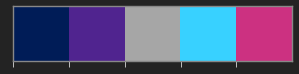

In [2]:
# Set project colors
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff','#cc3181']
sns.palplot(sns.color_palette(colors))

<a id="sec3"></a>
# [3. Functions and Classes](#sec3)
[(INDEX)](#sec1)

<a id="sec3.1"></a>
## [3.1 GENERAL FUNCTIONS](#sec3.1)
[(INDEX)](#sec1)

In [3]:
def missing_vars(data, column, random_proba=True):
    '''Function is called for filling of missing data'''
    # With using probability and random choise

    if random_proba:
        col_name = data[column].value_counts().index.to_list(
        )  # get list of values
        col_distr = data[column].value_counts(
            normalize=True).values  # get l;ist of probs
        missing = data[col].isnull()  # flag of missing val
        # substitute values from the list of names in accordance with the probability of meeting the name
        data.loc[missing, [column]] = np.random.choice(col_name,
                                                    size=len(data[missing]),
                                                    p=col_distr)

    # Using  most common in  column
    data[col] = data[col].fillna(data[col].value_counts().index[0])

In [4]:
def get_variable_distribution(col, title=None):
    '''Function is called to plot feture distribution'''

    title = title if title is not None else f"Distribution for '{col}"
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5),)
    fig = sm.qqplot(col, fit=True, line='45', ax=ax1)
    fig.suptitle(title, fontsize=20)

    sns.distplot(col.values, bins=20, color=colors[1], ax=ax2)
#     sns.violinplot(col.values, color=colors[3], bw=.3, cut=1, linewidth=4)
    sns.boxplot(col.values,color=colors[3])

    ax1.set_title('QQ-plot')
    ax2.set_title('Distribution')
    ax3.set_title('Boxplot')

    plt.show()

In [5]:
def corr_matrix(data, det=True, pltx=10, plty=10):
    '''Funcion is called for making correlation matrix'''

    corr = data.corr()
    if det:

        evals, evec = np.linalg.eig(corr)
        ev_product = np.prod(evals)

        print(f'Rank of Matrix: {np.linalg.matrix_rank(corr)}')
        print(f'Determinant of matrix: {np.round(ev_product,4)}')
        print(f'Shape of matrix: {np.shape(corr)}')

    plt.figure(figsize=(pltx, plty))
    sns.heatmap(corr[(corr >= .2) | (corr <= -.2)],
                cmap='viridis',
                vmin=-1.0,
                linewidths=0.1,
                annot=True,
                annot_kws={"size": 10},
                square=True)
    #     sns.heatmap(X,vmin=0,vmax=.9,annot=True,square=True)
    plt.show()

In [6]:
def cleanTxt(text):
    '''Function is called for cleaning text from trash
    INPUT: dirty string
    OUTPUT: More or less clean string'''

    text = re.sub(r'@[А-Яа-я0-9]+', '', text)  # Remove @
    text = re.sub(r'#', '', text)  # remove #
    text = re.sub(r'{', '', text)
    text = re.sub(r'}', '', text)
    text = re.sub('^а-яА-Я', ' ', text)
    text = re.sub(r'https?:\/\/\S+', '', text)  # remove hyperlink
    text = re.sub(r'\n', '', text)
    text = re.sub(r'✅', '', text)
    text = re.sub(r'👍🏻', '', text)
    text = re.sub(r'✨', '', text)
    
    
    # there are much more emoji. I don't know how to identify them so far

    text = text.strip()
    text = text.lower()
    #text = text.split()
    return text

In [7]:
def to_log(df, cols_to_log):
    'smart log'
    for col in cols_to_log:
        a = df[col].min()
        if a <= 0:                        
            df[col] = np.log(df[col] + (int(abs(df[col].min()))+2))
        
        df[col] = np.log(df[col])
    return df

In [8]:
# Defining MAPE function since it was removed from sklearn
def mape(y_true, y_pred):
    'Function to calculate MAPE metric'
#     y_true, y_pred = np.expm1(y_true), np.expm1(y_pred)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)

In [9]:
def get_regression_metrics(report_df,y_true, y_pred, name):
    '''Create and add metrics into a pandas DF after experiment'''
    y_true, y_pred = np.expm1(y_true), np.expm1(y_pred)

    report = pd.DataFrame(columns={'MAPE'}, data=[0])
    try:
        report['MAPE'] = mape(y_true, y_pred)
    except:
        report['MAPE'] = 'failed'
    report['MAE'] = mean_absolute_error(y_true, y_pred)
    report['MSE'] = mean_squared_error(y_true, y_pred)
    report['RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))

    report.index = [name]
    report_df = report_df.append(report)
    return report_df

<a id="sec3.2"></a>
## [3.2 Classes](#sec3.2)
[(INDEX)](#sec1)

In [10]:
class Encoder():
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def label_encoder(self, column):
        '''Method is called for label encoding'''
        le = LabelEncoder()
        self.dataframe[column] = le.fit_transform(self.dataframe[column])

    def hot_encoder(self, column):
        '''Method is calling for hot encoding'''
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
        aux_df = pd.DataFrame(ohe.fit_transform(self.dataframe[[column]]))
        aux_df.columns = ohe.get_feature_names([f'hot_{column}'])
        self.dataframe = self.dataframe.drop(col, axis=1)
        self.dataframe = pd.concat([self.dataframe, aux_df], axis=1)
        return self.dataframe

In [11]:
class Outliers_detector():
    def __init__(self, df):
        self.df = df

    def get_IQR_outliers(self, column):
        '''Method is called to detect IQR outliers'''
        outliers = dict()
        q1, q3 = np.percentile(sorted(self.df[column]), [25, 75])

        IQR = q3 - q1

        l_b = q1 - (1.5 * IQR)  # lower bound
        u_b = q3 + (1.5 * IQR)  # upper bound
        outl_count = len(self.df[column][self.df[column] < l_b]) + len(
            self.df[column][self.df[column] > u_b])

        outliers['lower_bound'] = round(l_b, 3)
        outliers['upper_bound'] = round(u_b, 3)
        outliers['outlier_count'] = outl_count

        return outliers

    def get_dbscan_outliers(self, column1, column2, dbscan_eps,
                            dbscan_minsample, cluster_num):
        '''Method is called for detecting outliers for two columns by dbscan'''

        scaler = RobustScaler()
        scale_column1 = scaler.fit_transform(pd.DataFrame(
            self.df[column1])).reshape(1, -1)[0]
        scale_column2 = scaler.fit_transform(pd.DataFrame(
            self.df[column2])).reshape(1, -1)[0]
        df_temp = pd.DataFrame({
            'column1': scale_column1,
            'column2': scale_column2
        })
        clustering = DBSCAN(eps=dbscan_eps,
                            min_samples=dbscan_minsample).fit(df_temp.values)
        df_temp["cluster"] = clustering.labels_
        df_temp.index = self.df.index
        fig = px.scatter(self.df,
                   x=scale_column1,
                   y=scale_column2,
                   color=clustering.labels_,
                   size=column2)
        # Edit the layout
        fig.update_layout(title='Detected Custers\n')
        fig.update_xaxes(title=(f'{column1}'))
        fig.update_yaxes(title=(f'{column2}'))
        fig.update_layout(width = 700)
        fig.update_layout(height = 600)
        
        fig.show()
        #         sns.scatterplot(scale_column1, scale_column2,
        #                         hue=clustering.labels_, alpha=0.5)
        #         plt.title('CLUSTERS\n', fontsize=15)
        #         plt.xlabel(f'{column1}')
        #         plt.ylabel(f'{column2}')
        return df_temp[df_temp["cluster"] == cluster_num].index

<a id="sec3.3"></a>
## [3.3 FUNCTIONS FOR FEATURE ENGINEERING](#sec3.3)
[(INDEX)](#sec1)

In [12]:
def get_tax_category(engine_power):
    '''Function breaks down the number of horse
    power by taxation category in Russia'''

    if engine_power <= 100:
        return int(1)
    elif 100 < engine_power <= 150:
        return int(2)
    elif 150 < engine_power <= 200:
        return int(3)
    elif 200 < engine_power <= 250:
        return int(4)
    elif engine_power > 250:
        return int(5)


def get_low_registr(word):
    '''Get lowercase for string'''
    try:
        return word.lower()
    except:
        return None
    
def get_i3_displacement(engine_displacement, fuel_type, model_name):
    '''fill mising values for  BMW i3'''
    
    if model_name == 'i3':
        if fuel_type == 'hybrid':
            return 0.7
        else:
            return 0
    else:
        return engine_displacement

def get_electro_displacement(engine_displacement, fuel_type):
    '''Filling mising vars for electrocars'''
    
    if fuel_type == 'electro':
        return 0
    else:
        return engine_displacement
    
def get_acceleration(string):
    '''Function extracting acceleration'''
    
    try:
        return float(re.split(',', re.split('acceleration\W+', str(string))[1])[0])
    except:
        return None
    
def get_fuel_rate(string):
    '''Extrating fuel rate'''
    try:
        return float(re.split(',', re.split('fuel_rate\W+', str(string))[1])[0])

    except:
        return None

<a id="sec4"></a>
# [4.Load and Chek the Dataset](#sec4)
[(INDEX)](#sec1)

In [13]:
# import data pre-processed data set
df = df_combined.copy()
df.sample(2)

body_type       brand   color complectation_dict  \
99223     седан        Audi   синий        {'id': '0'}   
48141     седан  Volkswagen  чёрный        {'id': '0'}   

                                             description  engine_displacement  \
99223               На ходу. Днище целое. Сел да поехал.                 1.80   
48141  Машина на ходу, мотор и коробка без нареканий ...                 1.80   

       engine_power                              equipment_dict fuel_type  \
99223         90.00                                          {}    бензин   
48141        125.00  {'climate-control-1': True, 'xenon': True}    бензин   

                                                   image  mileage  model_date  \
99223  //avatars.mds.yandex.net/get-autoru-vos/403231...   300916        1986   
48141  //avatars.mds.yandex.net/get-autoru-vos/439558...   416211        1996   

                                              model_info model_name  \
99223  {'code': '80', 'name': '80', 'ru_name': '80', ...         80   
48141  {'code': 'PASSAT', 'name': 'Passat', 'ru_name'...     PASSAT   

                    name  doors_count price_currency  production_date  \
99223   1.8 MT (90 л.с.)            4            RUB             1988   
48141  1.8 MT (125 л.с.)            4            RUB             1998   

          sell_id                                          super_gen  \
99223  1103413697  {'id': '21267097', 'displacement': 1781, 'engi...   
48141  1101837395  {'id': '5140510', 'displacement': 1781, 'engin...   

      vehicle_configuration vehicle_transmission    vendor owner_count  \
99223           useless_col           MECHANICAL  EUROPEAN           2   
48141           useless_col           MECHANICAL  EUROPEAN           3   

      owning_period car_passport wheel_drive wheel_location condition custom  \
99223           NaN     ORIGINAL    передний           LEFT      True   True   
48141           NaN    DUPLICATE    передний           LEFT      True   True   

          price  sample  
99223  67000.00       1  
48141 179999.00       1

<a id="sec5"></a>
# [5. Feature Engeneering](#sec5)
[(INDEX)](#sec1)

Get lowercase for all unpreceed columns

In [14]:
# take cols with objects
object_columns = df.dtypes[df.dtypes.values == object].index.to_list()

for col in object_columns:
    df[col] = df[col].apply(lambda string: get_low_registr(string))

<a id="sec5.1"></a>
## [Target](#sec5.1)
[(INDEX)](#sec1)

As our dataset includes combined train & test stes, and test set contains 

Nan values in price column, let's extract only train part for a minute and process it 

In [15]:
# Defining features and target
X_train = df[df['sample'] == 1]

X_test = df[df['sample'] == 0]

In [16]:
# idx_to_drop = list(X_train[X_train['price'] >= 30000000].index)
# X_train=X_train.drop(idx_to_drop)

NOTE: Dropping outliers has bad impact on MAPE. Comment above cell

Scraped data has missing values in price column. Drop these rows:

In [17]:
X_train['price'].isna().sum()

624

In [18]:
indexes_to_drop = X_train[(df['price'].isna())].index
X_train = X_train.drop(indexes_to_drop)

With a reference to EDA, we remember that target is not normally distributed.

Let's apply logarithm to it and see what will happen

In [19]:
X_train['price']= np.log(X_train['price'])

Text(0.5, 0, 'Price')

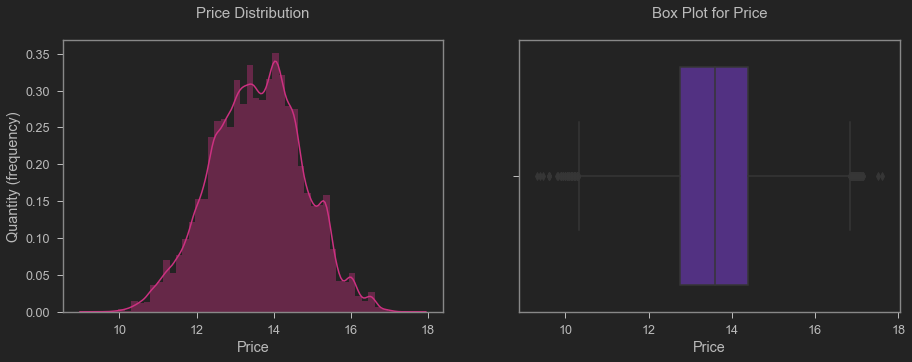

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(X_train.price.values, bins=50, color=colors[4])
plt.title('Price Distribution\n', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Quantity (frequency)')

plt.subplot(122)
sns.boxplot(X_train.price.values, color=colors[1])
plt.title('Box Plot for Price\n', fontsize=15)
plt.xlabel('Price')

Looks better.
Let's again combine datasets for further engineering

In [21]:
# combine sets
df = X_train.append(X_test, sort=False).reset_index(drop=True)

<a id="sec5.2"></a>
## [5.2 body_type & Model_name](#sec5.2)
[(INDEX)](#sec1)

As we have quite a lot of brands in data set, and especially lot's of models,

let's generate new feature for each of mentioned model and brand by taking mean price of each model/brand

In [22]:
cols_to_process = ['model_name', 'brand', 'body_type']
for col in cols_to_process:
    col_mean_dict = df.groupby([col])['price'].mean().to_dict()
    df[f'priced_{col}'] = df[col].apply(lambda x: col_mean_dict[x])

We remember (EDA) that models number mismatch in train and test set.

So our new feature definately will have missing vars. Let's fix it by filling it with median

In [23]:
df['priced_model_name'].isna().sum()

17

In [24]:
df['priced_model_name'] = df['priced_model_name'].fillna(df['priced_model_name'].median())

Reduce quantity of body_types

In [25]:
pattern = re.compile('[а-я]*')
new_column = []
for string in df['body_type']:
    new_column.append(pattern.match(str(string))[0])
df['body_type'] = new_column

In [26]:
# Create list with top body types
top_colors = df['body_type'].value_counts()[df['body_type'].value_counts(
) > np.percentile((df['body_type'].value_counts().values), 70)].index.tolist()

#take all bodies from df to a list
all_colors = df['body_type'].value_counts().index

# Identify, what to delete
colors_to_drop = set(all_colors) - set(top_colors)

# Make replacemewnt
df.loc[df['body_type'].isin(colors_to_drop), 'body_type'] = 'other'

In [27]:
df['body_type'].value_counts()

седан          66649
внедорожник    63984
хэтчбек        16791
other          14990
лифтбек         9291
универсал       7030
Name: body_type, dtype: int64

Translate it to english. (for some reason, LightGBM doesn't work with russian column names)

In [28]:
body_type_dict = dict({
    'седан':'sedan',
    'внедорожник':'4wd',
    'хэтчбек':'hachtback',
    'other':'other',
    'лифтбек':'liftback',
    'универсал':'universal'
})
df['body_type'] = df['body_type'].map(body_type_dict)

In [29]:
df.body_type.unique()

array(['sedan', 'universal', 'other', '4wd', 'hachtback', 'liftback'],
      dtype=object)

Fine, we reduced number of body_types and translated it in to English

<a id="sec5.2"></a>
## [5.3 Color](#sec5.2)
[(INDEX)](#sec1)

NOTE: After some experiments, it was decided to do not include this column in to a model. Bad impact on MAPE

With a reference to EDA section we generate new feature to show whether the color is popular.

Meanwhile we re-orgasnize colors in original column by taking only most common colors

In [30]:
# # List of top3 colors (see EDA)
# # Has no impact
# popular_color = ['чёрный', 'белый', 'серый']
# df['popular_color'] = df['color'].apply(
#     lambda color: 1 if color in popular_color else 0)

In [31]:
# # Create list with top colors
# # Has no impact
# top_colors = df['color'].value_counts()[df['color'].value_counts(
# ) > np.percentile((df['color'].value_counts().values), 80)].index.tolist()

# #take all colors from df to a list
# all_colors = df['color'].value_counts().index

# # Identify, what to delete
# colors_to_drop = set(all_colors) - set(top_colors)

# # Make replacemewnt
# df.loc[df['color'].isin(colors_to_drop), 'color'] = 'other'

In [32]:
# df['color'].unique()

In [33]:
# color_dict = dict({
#     #'синий':'blue',
#     'чёрный':'black',
#     'серый':'gray',
#     'other':'other',
#     'белый':'white',
#     #'серебристый':'silver'
# })
# df['color'] = df['color'].map(color_dict)

<a id="sec5.4"></a>
## [5.4 Model_name](#sec5.4)
[(INDEX)](#sec1)

NOTE: Already proceed above

<a id="sec5.5"></a>
## [5.5 Description](#sec5.5)
[(INDEX)](#sec1)

Let's generate new features:
- Sensitivity and polarity of each description in a column;
- Extract keywords from description

In [34]:
df['description'] = df['description'].fillna('none')
df['description'] = df['description'].apply(cleanTxt)
df['description'] = df['description'].apply(lambda x : x.lower())

In [35]:
# Create a function to get the subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


# Create a function to get the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [36]:
# Create new cols and call the func

df['subjectivity'] = df['description'].apply(get_subjectivity)

df['polarity'] = df['description'].apply(get_polarity)

In [37]:
%%script false
# Note: useless insight. Do not include in the final set
# Create a function to compute the negative, neutral and positive analysis
def get_analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

Couldn't find program: 'false'


In [38]:
%%script false
# Has no impact
df['analysis'] = df['polarity'].apply(get_analysis)

Couldn't find program: 'false'


With a reference to EDA (Sentiment section), let's check plot of worldcloud and generate new features. 

If description has specified keyword, the we add 1 to new column

In [39]:
df['airbags'] = df['description'].apply(
    lambda x: 1 if 'подушки безопасности' in x else 0)
df['cruise'] = df['description'].apply(
    lambda x: 1 if 'круиз' in x else 0)
df['steering'] = df['description'].apply(
    lambda x: 1 if 'усилитель руля' in x else 0)
df['loan'] = df['description'].apply(
    lambda x: 1 if 'кредит' in x else 0)
df['anti_block'] = df['description'].apply(
    lambda x: 1 if 'антиблокировочная' in x else 0)
df['lock'] = df['description'].apply(
    lambda x: 1 if 'центральный замок' in x else 0)
df['climat'] = df['description'].apply(
    lambda x: 1 if 'климат контроль' in x else 0)
df['rain_sens'] = df['description'].apply(
    lambda x: 1 if 'датчик дождя' in x else 0)

In [40]:
# show data
df.sample(4)

body_type    brand        color complectation_dict  \
130502       4wd  hyundai  серебристый        {'id': '0'}   
102092     sedan    lexus  серебристый        {'id': '0'}   
174388     sedan     audi      красный               None   
111412       4wd     ford      красный        {'id': '0'}   

                                              description  \
130502  куплен в салоне в декабре 2020 года, машина новая   
102092  продам lexus is 2.2 дизель 2010г.в.рестайлинг!...   
174388  год выпуска: 1989. пробег: 303 523 км. кузов: ...   
111412  комплектация limited. модель 2020 года. выпуск...   

        engine_displacement  engine_power  \
130502                 2.00        149.00   
102092                 2.20        177.00   
174388                 1.80         75.00   
111412                 2.30        300.00   

                                           equipment_dict fuel_type  \
130502                                                 {}    бензин   
102092  {'cruise-control': true, 'asr': true, 'esp': t...    дизель   
174388                                               None    бензин   
111412  {'e-adjustment-wheel': true, 'multi-wheel': tr...    бензин   

                                                    image  mileage  \
130502  //avatars.mds.yandex.net/get-autoru-vos/445910...     3000   
102092  //avatars.mds.yandex.net/get-autoru-vos/206942...   230000   
174388  https://avatars.mds.yandex.net/get-autoru-vos/...   303523   
111412  //avatars.mds.yandex.net/get-autoru-vos/403418...    18000   

        model_date                                         model_info  \
130502        2020  {'code': 'creta', 'name': 'creta', 'ru_name': ...   
102092        2008  {'code': 'is', 'name': 'is', 'ru_name': 'is', ...   
174388        1986  {"code":"80","name":"80","ru_name":"80","morph...   
111412        2019  {'code': 'explorer', 'name': 'explorer', 'ru_n...   

       model_name                     name  doors_count price_currency  \
130502      creta    2.0 at (149 л.с.) 4wd            5            rub   
102092         is  220d 2.2d mt (177 л.с.)            4            rub   
174388         80         1.8 mt (75 л.с.)            4            rub   
111412   explorer    2.3 at (300 л.с.) 4wd            5            rub   

        production_date     sell_id  \
130502             2020  1103650081   
102092             2010  1102774855   
174388             1989  1101312276   
111412             2020  1102824584   

                                                super_gen  \
130502  {'id': '21831490', 'displacement': 1999, 'engi...   
102092  {'id': '21207212', 'name': '220d', 'nameplate'...   
174388  {"id":"21267104","displacement":1781,"engine_t...   
111412  {'id': '21545687', 'displacement': 2261, 'engi...   

       vehicle_configuration vehicle_transmission    vendor owner_count  \
130502           useless_col            automatic    korean           1   
102092           useless_col           mechanical  japanese           3   
174388  sedan mechanical 1.8           mechanical  european           3   
111412           useless_col            automatic  american           1   

                     owning_period car_passport wheel_drive wheel_location  \
130502                        None     original      полный           left   
102092  {'year': 2020, 'month': 9}     original      задний           left   
174388                        None     original    передний           left   
111412  {'year': 2020, 'month': 6}     original      полный           left   

                 condition      custom  price  sample  priced_model_name  \
130502                None        None  14.32       1              14.11   
102092                None        None  13.65       1              13.77   
174388  не требует ремонта  растаможен    nan       0              11.36   
111412                None        None  14.89       1              13.75   

        priced_brand  priced_body_type  subjectivity  polarity  airbags  \


<a id="sec5.6"></a>
## [5.6 Equipment Dict](#sec5.6)
[(INDEX)](#sec1)

Let's exctrat the number of equipments listed in the subjected column

In [41]:
df['equipment_dict'].isna().sum()

9996

First of all, fill up missing values in the column

In [42]:
def fill_empty_equipment(model, dict_):
    if dict_=={}:
        return tipical_equipment_dict[model]
    return dict_

In [43]:
def fill_na_equip_lenght(model_name,value):
    if value==0:
        return int(mean_equip_lenhgt_dict[model_name])
    return value

In [44]:
df['equipment_dict'] = df['equipment_dict'].str.replace('\"', '\'').str.replace(
    ' ', '').str.replace(':t', ':T')  #  General view
df['equipment_dict'] = df['equipment_dict'].apply(lambda string: {} if pd.isna(
    string) else ast.literal_eval(string))  # transform string to dicts

In [45]:
# The idea is to create a dictionary: the most complete set of
# cars, then fill in the gaps with this dictionary
model_names = df['model_name'].unique()
tipical_equipment_dict = dict.fromkeys(model_names)
for model in model_names[:]:
    max_len = 0
    for dict_ in df[df['model_name'] ==
                    model]['equipment_dict'].value_counts().index:
        tipical_equipment_dict.update({model: dict_})
        if len(dict_) > max_len:
            tipical_equipment_dict.update({model: dict_})

In [46]:
df['equipment_dict'] = df[['model_name', 'equipment_dict']].apply(
    lambda x: fill_empty_equipment(*x), axis=1)

In [47]:
df['equipment_length'] = df['equipment_dict'].apply(lambda dict_: len(dict_))

mean_equip_lenhgt_dict = df.groupby('model_name')['equipment_length'].mean(
).round().to_dict()  # Словарь с среднимим значениями длин словарей экипировки

df['equipment_length'] = df[['model_name', 'equipment_length'
                             ]].apply(lambda x: fill_na_equip_lenght(*x),
                                      axis=1)  # filling

In [48]:
# Check if dictionaries contain False 
count_false=0
for dict_ in df['equipment_dict']:
    for i in dict_:
        if dict_[i]==False:
            count_false+=1
count_false

0

The length of the equipment_dict characterizes the number of functions in the auto 

In [49]:
# df[df['equipment_dict']=={}]['model_name'].unique()

In [50]:
# # Создадим множество всех атрибутов в авто
# attributes = set()
# for dict_ in df['equipment_dict']:    
#     attributes.update(dict_.keys())

In [51]:
# dv = DictVectorizer()
# equipment_features = dv.fit_transform(
#     df.query('sample==1')['equipment_dict']).toarray()
# equipment_df = pd.DataFrame(equipment_features, columns=dv.get_feature_names())
# equipment_attributes = equipment_df.columns.values

In [52]:
# f_scores, p_values = f_regression(equipment_df, df.query('sample==1')['price'])

In [53]:
# # Visualizing 50 best equipment features
# plt.figure(figsize=(20, 10))
# f_scores = pd.Series(f_scores, equipment_attributes).sort_values(ascending=False)
# best_attributes = f_scores[:50].index
# f_scores[:50].plot(kind='barh', color='green')
# plt.xlabel('F-Score')
# plt.title('50 best equipment features', size=16);

In [54]:
# 25% самых важных атрибутов в авто
# f_scores[f_scores.values > f_scores.values.max()*0.75]

In [55]:
# most_important_attributes = set(f_scores[f_scores.values > f_scores.values.max(
# )*0.75].index)  # Множество самых важных атрибутов

In [56]:
# def has_important_equipment(dict_):
#     # Проверка на принадлежность важнейших атрибутов атрибутам авто
#     if most_important_attributes.issubset(set(dict_.keys())):
#         return 1
#     return 0

In [57]:
# df['has_important_attrs'] = df['equipment_dict'].apply(
#     lambda x: has_important_equipment(x))

In [58]:
# df['has_important_attrs'].value_counts()

<a id="sec5.7"></a>
## [5.7 Fuel Type](#sec5.7)
[(INDEX)](#sec1)

In [59]:
# lets strip fuel type
df['fuel_type'] = df.fuel_type.apply(lambda fuel: str(fuel).strip())

In [60]:
fuel_type_dict = dict({
    'бензин':'benzin',
    'дизель':'dizel',
    'гибрид':'hybrid',
    'электро':'electro',
    'газ':'gas'
})

df['fuel_type'] = df['fuel_type'].map(fuel_type_dict)

<a id="sec5.8"></a>
## [5.8 Mileage](#sec5.8)
[(INDEX)](#sec1)

With  a reference to EDA section (plot numerical distribution), outcomes, we remember, that some cars has milage = 0 which is incorrect or unlogical. Fix it here

Save information where mileage was equal to zero 

NOTE: Has no impact on MAPE

In [61]:
#df['mileage_zero'] = df['mileage'].apply(lambda x: 1 if x == 0 else 0)

<a id="sec5.9"></a>
## [5.9 Engine Displacement](#sec5.9)
[(INDEX)](#sec1)

We know, that there is no engine displacement for the electical cars. We also know there is missing values in this colums.

Let's fix it. If car is electric - diplacement shall be 0.

In [62]:
df['engine_displacement'] = df[['engine_displacement','fuel_type']].apply(
    lambda x: get_electro_displacement(*x), axis=1)

It was observed that BMW model i3 has missing values in engine displacement. 

Let's say if it is a hybrid - then eng_displ - 0.7. If not - then 0

In [63]:
df['engine_displacement'] = df[[
    'engine_displacement', 'fuel_type', 'model_name'
]].apply(lambda x: get_i3_displacement(*x), axis=1)

<a id="sec5.10"></a>
## [5.10 Engine Power](#sec5.10)
[(INDEX)](#sec1)

There is a special low in Russian Federation that devide cars by tax categories. 

More power in engine, higer grade of tax. It may impact on a prediction. Let's break our cars down by such categories

In [64]:
# No impact on MAPE
# df['tax_rate'] = df['engine_power'].apply(
#     lambda engine_power: get_tax_category(engine_power)).astype('category')

In [65]:
# Fill up for 3 missing cars (civic)
df['engine_power'] = df['engine_power'].fillna(100) # CIVIC

In [66]:
# Break engine power by intervals
bins = [10, 35, 100, 125, 150, 175, 200, 225, 250, 801]
# Ctreate tax categories
numbers = ['5000', '12', '25', '35', '45', '50', '65', '75', '150']

In [67]:
# Make a column where refer each car depended by power to a tax cat
df['tax_base'] = pd.cut(df['engine_power'], bins, labels=numbers)
df['tax_base'] = df['tax_base'].values.astype('int64')

In [68]:
# generate tax fee col
df['tax'] = df['engine_power'] * df['tax_base']

<a id="sec5.11"></a>
## [5.11 Super Gen](#sec5.11)
[(INDEX)](#sec1)

Let's extract some information like an acceleration from supergen column.

Generate new feature Acceleration

In [69]:
# Before we do, fill up empty dictionaries with 'Nan'
df['super_gen'] = df['super_gen'].fillna('NaN')
df['super_gen'] = df['super_gen'].apply(cleanTxt)
# Extract fuel rate,acceleration and generate new feature
df['acceleration'] = df['super_gen'].apply(lambda string:get_acceleration(string))
df['fuel_rate'] = df['super_gen'].apply(lambda string:get_fuel_rate(string))

In [70]:
# missing vars in a new feature
df['acceleration'].isna().sum()

11243

In [71]:
df['fuel_rate'].isna().sum()

21408

Let's fill missing values by randomly choosen value from most common in particular colums.

For a company, add car pasport here and owner count

In [72]:
cols_to_fill = ['acceleration', 'fuel_rate', 'car_passport','owner_count']
for col in cols_to_fill:
    missing_vars(df,col)

<a id="sec5.12"></a>
## [5.12 Wheel Drive](#sec5.12)
[(INDEX)](#sec1)

In [73]:
# lets strip fuel type
df['wheel_drive'] = df.wheel_drive.apply(lambda drive: str(drive).strip())

In [74]:
drive_type_dict = dict({
    'передний': 'front',
    'полный': 'full',
    'задний': 'rear',
})

df['wheel_drive'] = df['wheel_drive'].map(drive_type_dict)

In [75]:
df[df['wheel_drive'].isna()]

body_type   brand        color       complectation_dict  \
56730     other  toyota  серебристый  {'id': '0', 'name': ''}   
93719     other   honda  серебристый  {'id': '0', 'name': ''}   
94094     other   honda    пурпурный  {'id': '0', 'name': ''}   

                                             description  engine_displacement  \
56730  авто в хорошем тех. состоянии..гаражное хранен...                  nan   
93719  продаю honda civic suttle 1989 г. выпуска, неу...                  nan   
94094                        в хорошем состоянии на ходу                  nan   

       engine_power                                     equipment_dict  \
56730        100.00  {'engine-proof': True, 'cruise-control': True,...   
93719        100.00  {'engine-proof': True, 'cruise-control': True,...   
94094        100.00  {'engine-proof': True, 'cruise-control': True,...   

      fuel_type                                              image  mileage  \
56730       NaN  //avatars.mds.yandex.net/get-autoru-vos/202337...   180000   
93719       NaN  //avatars.mds.yandex.net/get-autoru-vos/216179...   400000   
94094       NaN  //avatars.mds.yandex.net/get-autoru-vos/215360...   220000   

       model_date                                         model_info  \
56730        2017  {'code': 'noah', 'name': 'noah', 'ru_name': 'н...   
93719        2009  {'code': 'civic', 'name': 'civic', 'ru_name': ...   
94094        2008  {'code': 'civic', 'name': 'civic', 'ru_name': ...   

      model_name  name  doors_count price_currency  production_date  \
56730       noah  None            4            rub             2008   
93719      civic  None            5            rub             1989   
94094      civic  None            5            rub             1989   

          sell_id super_gen vehicle_configuration vehicle_transmission  \
56730  1092703248       nan           useless_col                 None   
93719  1097454742       nan           useless_col                 None   
94094  1096777604       nan           useless_col                 None   

         vendor owner_count owning_period car_passport wheel_drive  \
56730  japanese           3          None     original         NaN   
93719  japanese           3          None     original         NaN   
94094  japanese           3          None     original         NaN   

      wheel_location condition custom  price  sample  priced_model_name  \
56730          right      None   None  13.44       1              13.35   
93719           left      None   None  11.70       1              12.71   
94094           left      None   None  11.61       1              12.71   

       priced_brand  priced_body_type  subjectivity  polarity  airbags  \
56730         13.47             12.25          0.00      0.00        0   
93719         13.00             12.25          0.00      0.00        0   
94094         13.00             12.25          0.00      0.00        0   

       cruise  steering  loan  anti_block  lock  climat  rain_sens  \
56730       0         0     0           0     0       0          0   
93719       0         0     0           0     0       0          0   
94094       0         0     0           0     0       0          0   

       equipment_length  tax_base     tax  acceleration  fuel_rate  
56730                38        12 1200.00          9.90       6.20  
93719                43        12 1200.00         17.80       6.90  
94094                43        12 1200.00         12.60       9.80

Civic. Fill With front

In [76]:
df['wheel_drive'] = df['wheel_drive'].fillna('front')

<a id="sec5.13"></a>
## [5.13 Price Drop Index](#sec5.13)
[(INDEX)](#sec1)

With a reference to EDA, we know, that some brands loose their price more faster than others. 

Let's generate such feature

In [77]:
def get_change_index(model):
    if model == 'ford':
        return int(1)
    if model == 'volvo' or model == 'mercedes':
        return int(2)
    if model == 'honda' or model == 'audi':
        return int(2)
    return int(0)

In [78]:
df['prc_chg_idx'] = df['brand'].apply(
    lambda brand: get_change_index(brand)).astype('category')

<a id="sec5.14"></a>
## [5.14 Dropping cols without content](#sec5.14)
[(INDEX)](#sec1)

In [79]:
df['engine_displacement'].isna().sum()

3

In [80]:
df = df.dropna(axis=0, subset=['engine_displacement'])

<a id="sec5.15"></a>
## [5.15 Vendor](#sec5.15)
[(INDEX)](#sec1)

During scraping of a dataset we gathered more vendors than were in a test data set. Let's replace those who are not in test dataset by 'Other'

Note: It was decided to not include this to a model

In [81]:
df['vendor'] = df['vendor'].apply(
    lambda x: x if x == 'european' else(x if x == 'japanese' else 'other'))

<a id="sec5.16"></a>
## [5.16 Handling multocorrelation out](#sec5.16)
[(INDEX)](#sec1)

In [82]:
# extract trhee columns from dataset, which are correlated
data = df[['mileage', 'model_date', 'production_date']].values
# create Scaler instance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# We have 3 vectors. Reduce to two, taking most important info.
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
df['pca_1'], df['pca_2'] = pca_data[:, 0], pca_data[:, 1]

<a id="sec5.17"></a>
## [5.17 Clustering](#sec5.17)
[(INDEX)](#sec1)

Note: I have failed to use clustering... :(

In [83]:
df_clus1 = df.copy()

In [84]:
# cluster = Outliers_detector(df_clus1)

In [85]:
# indeces = cluster.get_dbscan_outliers('production_date', 'engine_displacement', dbscan_eps=.4,
#                                      dbscan_minsample=12,
#                                      cluster_num=-1)
# print(f"Strange guys {len(indeces)}")

In [86]:
# Defining features and target
# X = df[df['sample'] == 1]

# X_test = df[df['sample'] == 0]

# print(f'X size: {X.shape}, X_testn size: {X_test.shape}')

In [87]:
# cluster = Outliers_detector(X)

In [88]:
# indeces = cluster.get_dbscan_outliers('model_date', 'price', dbscan_eps=.5,
#                                      dbscan_minsample=12,
#                                      cluster_num=-1)
# print(f"Strange guys {len(indeces)}")

In [89]:
# X=X.drop(indeces)
# X.reset_index(drop=True, inplace=True)

In [90]:
# df = X_test.append(X, sort=False).reset_index(drop=True)  # combine sets

<a id="sec5.18"></a>
## [5.18 Log Func](#sec5.18)
[(INDEX)](#sec1)

Try to make distribution normal for the propper fitting of the model 

In [91]:
cols_to_log = [
    'engine_displacement', 'mileage', 'model_date', 'production_date',
    'equipment_length', 'tax', 'acceleration', 'fuel_rate', 'pca_1', 'pca_2'
]

df = to_log(df, cols_to_log)

<a id="sec5.19"></a>
## [5.19 Encoding](#sec5.19)
[(INDEX)](#sec1)

After all manipulations with dataset, we have to reset indexes

In [92]:
# Re-set indexes
df.reset_index(drop=True, inplace=True)

In [93]:
encoder = Encoder(df)

In [94]:
to_hot = [
    #'body_type', # No impact
    #'brand', # No impact
    #'color', # No impact
    #'fuel_type',   # No impact
    #'doors_count', # No impact
    #'vehicle_transmission', # No impact
    'vendor',
    'wheel_drive',
    'owner_count',
]

to_label = [
    'car_passport', 'wheel_location', 'prc_chg_idx', 'vehicle_transmission'
]

In [95]:
# hot it out
for col in to_hot:
    df = encoder.hot_encoder(col)

In [96]:
# label it
for col in to_label:
    encoder.label_encoder(col)

<a id="sec5.20"></a>
## [5.20 Dropping columns out](#sec5.20)
[(INDEX)](#sec1)

In [97]:
cols_to_drop = [
    'complectation_dict',
    'description',
    'equipment_dict',
    'image',
    'model_info',
    'name',
    'price_currency',
    'vehicle_configuration',
    'custom',
    'condition',
    'owning_period',
    'super_gen',
    'sell_id',
    'model_name',
    'engine_power',
    'mileage',  # have PCA instead
    'model_date',  # have PCA instead 
    'body_type',
    'brand',
    'color',
    'tax_base',
    #'mileage_zero',  # No impact
    'fuel_type',  # No impact
    'doors_count'  # No impact
]
df = df.drop(cols_to_drop, axis=1)

Let's check what do we have now

engine_displacement - 0.0%
production_date - 0.0%
vehicle_transmission - 0.0%
car_passport - 0.0%
wheel_location - 0.0%
price - 19.407%
sample - 0.0%
priced_model_name - 0.0%
priced_brand - 0.0%
priced_body_type - 0.0%
subjectivity - 0.0%
polarity - 0.0%
airbags - 0.0%
cruise - 0.0%
steering - 0.0%
loan - 0.0%
anti_block - 0.0%
lock - 0.0%
climat - 0.0%
rain_sens - 0.0%
equipment_length - 0.0%
tax - 0.0%
acceleration - 0.0%
fuel_rate - 0.0%
prc_chg_idx - 0.0%
pca_1 - 0.0%
pca_2 - 0.0%
hot_vendor_european - 0.0%
hot_vendor_japanese - 0.0%
hot_vendor_other - 0.0%
hot_wheel_drive_front - 0.0%
hot_wheel_drive_full - 0.0%
hot_wheel_drive_rear - 0.0%
hot_owner_count_1 - 0.0%
hot_owner_count_2 - 0.0%
hot_owner_count_3 - 0.0%


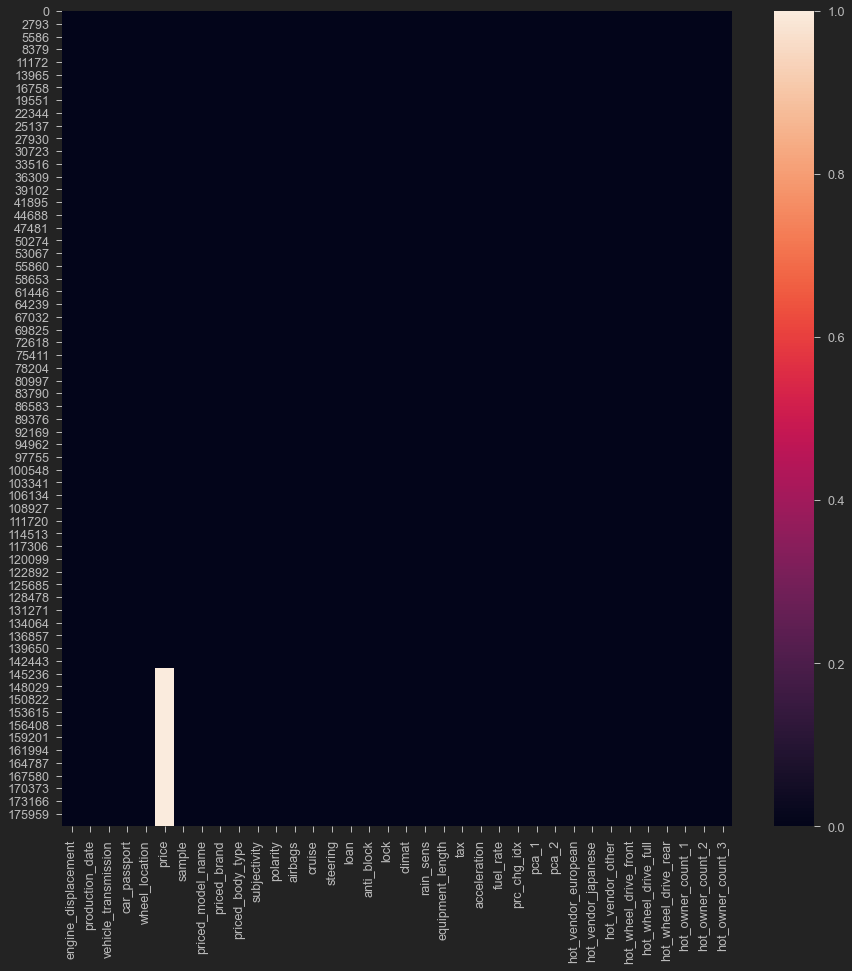

In [98]:
# Plot missing values
cols = df.columns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df[cols].isnull()) 

# Show in percents
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100,3)}%')

The data set is ready.

<a id="sec6"></a>
# [6. Prepare the data for models](#sec6)
[(INDEX)](#sec2)

In [99]:
# Defining features and target
X = df[df['sample'] == 1].drop(['price','sample'], axis=1)
y = df[df['sample'] == 1]['price']

X_test = df[df['sample'] == 0].drop(['price','sample'], axis=1)
y_test = df[df['sample'] == 0]['price']

In [100]:
cols_to_scal = [
    'engine_displacement', 'subjectivity', 
    'polarity', 'acceleration',
    'fuel_rate', 'pca_1','pca_2','equipment_length',
    'priced_model_name','priced_brand','priced_body_type','tax'
]

In [101]:
scaler = RobustScaler()
X[cols_to_scal] = scaler.fit_transform(X[cols_to_scal])
X_test[cols_to_scal] = scaler.transform(X_test[cols_to_scal])

In [102]:
# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=42)

print(
    f'Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}'
)

Train size: (115236, 34), Validation size: (28810, 34), Test size: (34686, 34)


<a id="sec7"></a>
# [7. MODELS](#sec7)
[(INDEX)](#sec1)

There are plenty of algorithms could be applied but which one is best, which one is works faster?

Let's try to new instrument, to compare most common algorithms and then select the best.

We will use LazyPredict for such purpose

In [103]:
lazy = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)
models,predictions = lazy.fit(X_train, X_val, y_train, y_val)
models

  2%|█▉                                                                                 | 1/42 [00:19<13:29, 19.73s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8388531076049388, 'Adjusted R-Squared': 0.8386626994610141, 'RMSE': 0.4728616715628956, 'Time taken': 19.707536935806274}


  5%|███▉                                                                               | 2/42 [00:30<09:37, 14.45s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.95104328282732, 'Adjusted R-Squared': 0.9509854364890447, 'RMSE': 0.26063293207017296, 'Time taken': 10.743285894393921}


  7%|█████▉                                                                             | 3/42 [00:31<05:17,  8.15s/it]

{'Model': 'BayesianRidge', 'R-Squared': 0.9013623771990719, 'Adjusted R-Squared': 0.9012458288350326, 'RMSE': 0.3699512032854128, 'Time taken': 0.6482675075531006}


 10%|███████▉                                                                           | 4/42 [00:33<03:37,  5.72s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9134669662477954, 'Adjusted R-Squared': 0.9133647204390178, 'RMSE': 0.3465086740262736, 'Time taken': 1.9906792640686035}


 12%|█████████▉                                                                         | 5/42 [00:33<02:19,  3.76s/it]

{'Model': 'DummyRegressor', 'R-Squared': -4.197612033962628e-06, 'Adjusted R-Squared': -0.0011857838055635561, 'RMSE': 1.1779424073392812, 'Time taken': 0.2961719036102295}


 14%|███████████▊                                                                       | 6/42 [00:33<01:34,  2.62s/it]

{'Model': 'ElasticNet', 'R-Squared': 0.5404148757175049, 'Adjusted R-Squared': 0.5398718385593604, 'RMSE': 0.7985573792843568, 'Time taken': 0.40996313095092773}


 17%|█████████████▊                                                                     | 7/42 [00:35<01:25,  2.43s/it]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9013980889225094, 'Adjusted R-Squared': 0.9012815827547723, 'RMSE': 0.3698842268584066, 'Time taken': 2.0285775661468506}


 19%|███████████████▊                                                                   | 8/42 [00:37<01:09,  2.04s/it]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9076761649894691, 'Adjusted R-Squared': 0.9075670768785966, 'RMSE': 0.3579151351595017, 'Time taken': 1.2157871723175049}


 21%|█████████████████▊                                                                 | 9/42 [02:07<16:16, 29.59s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9526298097813322, 'Adjusted R-Squared': 0.9525738380535325, 'RMSE': 0.2563750216348166, 'Time taken': 90.15185761451721}


 24%|███████████████████▌                                                              | 10/42 [02:08<11:06, 20.82s/it]

{'Model': 'GammaRegressor', 'R-Squared': 0.8515358222024433, 'Adjusted R-Squared': 0.8513603997160795, 'RMSE': 0.4538726198312886, 'Time taken': 1.1989281177520752}


 26%|█████████████████████▍                                                            | 11/42 [02:08<07:31, 14.56s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 98.9 GiB for an array with shape (115236, 115236) and data type float64


 29%|███████████████████████▍                                                          | 12/42 [02:09<05:08, 10.27s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8510268337608962, 'Adjusted R-Squared': 0.8508508098633417, 'RMSE': 0.4546499731908168, 'Time taken': 0.4677731990814209}


 31%|█████████████████████████▍                                                        | 13/42 [02:40<08:05, 16.74s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9411413247969039, 'Adjusted R-Squared': 0.9410717784908429, 'RMSE': 0.2857777331900848, 'Time taken': 31.602038860321045}


 33%|███████████████████████████▎                                                      | 14/42 [02:44<06:01, 12.90s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9523914263471017, 'Adjusted R-Squared': 0.9523351729499098, 'RMSE': 0.257019296673057, 'Time taken': 4.025336265563965}


 36%|█████████████████████████████▎                                                    | 15/42 [02:47<04:26,  9.87s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8970379774924161, 'Adjusted R-Squared': 0.8969163194988363, 'RMSE': 0.37797378368325313, 'Time taken': 2.841904640197754}


 38%|███████████████████████████████▏                                                  | 16/42 [05:16<22:25, 51.77s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9159130343854471, 'Adjusted R-Squared': 0.9158136788048774, 'RMSE': 0.3415761082093509, 'Time taken': 149.0327663421631}


 40%|█████████████████████████████████▏                                                | 17/42 [05:17<15:07, 36.31s/it]

KernelRidge model failed to execute
Unable to allocate 98.9 GiB for an array with shape (115236, 115236) and data type float64


 43%|███████████████████████████████████▏                                              | 18/42 [05:17<10:12, 25.52s/it]

{'Model': 'Lars', 'R-Squared': 0.8984883385219171, 'Adjusted R-Squared': 0.8983683942477119, 'RMSE': 0.37530220302661305, 'Time taken': 0.3939030170440674}


 45%|█████████████████████████████████████                                             | 19/42 [05:19<07:03, 18.41s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8997886741430996, 'Adjusted R-Squared': 0.8996702663210618, 'RMSE': 0.37289069802040026, 'Time taken': 1.8522250652313232}


 48%|███████████████████████████████████████                                           | 20/42 [05:19<04:46, 13.00s/it]

{'Model': 'Lasso', 'R-Squared': -4.197612033962628e-06, 'Adjusted R-Squared': -0.0011857838055635561, 'RMSE': 1.1779424073392812, 'Time taken': 0.4017643928527832}


 50%|█████████████████████████████████████████                                         | 21/42 [05:22<03:25,  9.79s/it]

{'Model': 'LassoCV', 'R-Squared': 0.901383805895098, 'Adjusted R-Squared': 0.9012672828508038, 'RMSE': 0.36991101576739965, 'Time taken': 2.2968850135803223}


 52%|██████████████████████████████████████████▉                                       | 22/42 [05:22<02:19,  6.95s/it]

{'Model': 'LassoLars', 'R-Squared': -4.197612033962628e-06, 'Adjusted R-Squared': -0.0011857838055635561, 'RMSE': 1.1779424073392812, 'Time taken': 0.3419687747955322}


 55%|████████████████████████████████████████████▉                                     | 23/42 [05:24<01:42,  5.42s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9013608625130166, 'Adjusted R-Squared': 0.9012443123592526, 'RMSE': 0.36995404377244817, 'Time taken': 1.8347349166870117}


 57%|██████████████████████████████████████████████▊                                   | 24/42 [05:24<01:11,  3.95s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 0.9013608625130166, 'Adjusted R-Squared': 0.9012443123592526, 'RMSE': 0.36995404377244817, 'Time taken': 0.5379488468170166}


 60%|████████████████████████████████████████████████▊                                 | 25/42 [05:25<00:49,  2.90s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.9013704328810453, 'Adjusted R-Squared': 0.9012538940354486, 'RMSE': 0.36993609611836414, 'Time taken': 0.4584522247314453}


 62%|██████████████████████████████████████████████████▊                               | 26/42 [06:01<03:27, 12.99s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8964547415119092, 'Adjusted R-Squared': 0.89633239437764, 'RMSE': 0.3790428021435838, 'Time taken': 36.50353002548218}


 64%|████████████████████████████████████████████████████▋                             | 27/42 [07:50<10:25, 41.69s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9430467780830178, 'Adjusted R-Squared': 0.9429794832248014, 'RMSE': 0.2811138833086059, 'Time taken': 108.66495609283447}


 67%|██████████████████████████████████████████████████                         | 28/42 [2:50:04<11:28:13, 2949.55s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9509534139418945, 'Adjusted R-Squared': 0.9508954614162307, 'RMSE': 0.26087204176877604, 'Time taken': 9734.097941875458}


 69%|████████████████████████████████████████████████████▍                       | 29/42 [2:50:04<7:27:22, 2064.78s/it]

{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8604958427083057, 'Adjusted R-Squared': 0.8603310072140253, 'RMSE': 0.43996357333715586, 'Time taken': 0.4100151062011719}


 71%|██████████████████████████████████████████████████████▎                     | 30/42 [2:50:06<4:49:09, 1445.75s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8731600315796545, 'Adjusted R-Squared': 0.8730101598532847, 'RMSE': 0.41951858802092623, 'Time taken': 1.3875904083251953}


 74%|████████████████████████████████████████████████████████                    | 31/42 [2:50:06<3:05:34, 1012.19s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8374533358744155, 'Adjusted R-Squared': 0.8372612737864826, 'RMSE': 0.4749109423739971, 'Time taken': 0.5663299560546875}


 76%|██████████████████████████████████████████████████████████▋                  | 32/42 [2:50:07<1:58:07, 708.72s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.902357084830959, 'Adjusted R-Squared': 0.9022417117947905, 'RMSE': 0.3680810966449029, 'Time taken': 0.6535131931304932}


 79%|████████████████████████████████████████████████████████████▌                | 33/42 [2:50:09<1:14:29, 496.57s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.8944159581819889, 'Adjusted R-Squared': 0.8942912020595976, 'RMSE': 0.38275624665880936, 'Time taken': 1.5383942127227783}


 81%|███████████████████████████████████████████████████████████████▉               | 34/42 [2:52:04<50:58, 382.32s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9544826003264761, 'Adjusted R-Squared': 0.9544288178212146, 'RMSE': 0.25131121365868947, 'Time taken': 115.71883225440979}


 83%|█████████████████████████████████████████████████████████████████▊             | 35/42 [2:52:05<31:14, 267.77s/it]

{'Model': 'Ridge', 'R-Squared': 0.9013610215042535, 'Adjusted R-Squared': 0.9012444715383505, 'RMSE': 0.3699537456175971, 'Time taken': 0.47444891929626465}


 86%|███████████████████████████████████████████████████████████████████▋           | 36/42 [2:52:06<18:46, 187.67s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9013624470768807, 'Adjusted R-Squared': 0.9012458987954077, 'RMSE': 0.3699510722432033, 'Time taken': 0.7761125564575195}


 88%|█████████████████████████████████████████████████████████████████████▌         | 37/42 [2:52:06<10:57, 131.57s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.900643540443929, 'Adjusted R-Squared': 0.9005261427158697, 'RMSE': 0.37129679416057665, 'Time taken': 0.662097692489624}


 90%|████████████████████████████████████████████████████████████████████▊       | 38/42 [5:17:43<3:00:52, 2713.18s/it]

{'Model': 'SVR', 'R-Squared': 0.9508880603140982, 'Adjusted R-Squared': 0.9508300305678142, 'RMSE': 0.2610457873862265, 'Time taken': 8736.920795917511}


 93%|██████████████████████████████████████████████████████████████████████▌     | 39/42 [5:17:44<1:34:58, 1899.38s/it]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9013704328810453, 'Adjusted R-Squared': 0.9012538940354486, 'RMSE': 0.36993609611836414, 'Time taken': 0.5046741962432861}


 95%|██████████████████████████████████████████████████████████████████████████▎   | 40/42 [5:17:44<44:19, 1329.68s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.8510268337608962, 'Adjusted R-Squared': 0.8508508098633417, 'RMSE': 0.4546499731908168, 'Time taken': 0.3791337013244629}


 98%|█████████████████████████████████████████████████████████████████████████████  | 41/42 [5:17:53<15:33, 933.33s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9539447510281774, 'Adjusted R-Squared': 0.9538903330102785, 'RMSE': 0.2527916431877358, 'Time taken': 8.513405084609985}


100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [5:17:54<00:00, 454.16s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9527503192121242, 'Adjusted R-Squared': 0.9526944898760065, 'RMSE': 0.2560487058403256, 'Time taken': 1.7955515384674072}


Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.95       0.95  0.25      115.72
XGBRegressor                                 0.95       0.95  0.25        8.51
LGBMRegressor                                0.95       0.95  0.26        1.80
ExtraTreesRegressor                          0.95       0.95  0.26       90.15
HistGradientBoostingRegressor                0.95       0.95  0.26        4.03
BaggingRegressor                             0.95       0.95  0.26       10.74
NuSVR                                        0.95       0.95  0.26     9734.10
SVR                                          0.95       0.95  0.26     8736.92
MLPRegressor                                 0.94       0.94  0.28      108.66
GradientBoostingRegressor                    0.94       0.94  0.29       31.60
KNeighborsRegressor                          0.92       0.92  0.34      149.03
DecisionTreeRegressor                        0.91       0.91  0.35        1.99
ExtraTreeRegressor                           0.91       0.91  0.36        1.22
PoissonRegressor                             0.90       0.90  0.37        0.65
ElasticNetCV                                 0.90       0.90  0.37        2.03
LassoCV                                      0.90       0.90  0.37        2.30
TransformedTargetRegressor                   0.90       0.90  0.37        0.50
LinearRegression                             0.90       0.90  0.37        0.46
RidgeCV                                      0.90       0.90  0.37        0.78
BayesianRidge                                0.90       0.90  0.37        0.65
Ridge                                        0.90       0.90  0.37        0.47
LassoLarsCV                                  0.90       0.90  0.37        1.83
LassoLarsIC                                  0.90       0.90  0.37        0.54
SGDRegressor                                 0.90       0.90  0.37        0.66
LarsCV                                       0.90       0.90  0.37        1.85
Lars                                         0.90       0.90  0.38        0.39
HuberRegressor                               0.90       0.90  0.38        2.84
LinearSVR                                    0.90       0.90  0.38       36.50
RANSACRegressor                              0.89       0.89  0.38        1.54
OrthogonalMatchingPursuitCV                  0.87       0.87  0.42        1.39
OrthogonalMatchingPursuit                    0.86       0.86  0.44        0.41
GammaRegressor                               0.85       0.85  0.45        1.20
GeneralizedLinearRegressor                   0.85       0.85  0.45        0.47
TweedieRegressor                             0.85       0.85  0.45        0.38
AdaBoostRegressor                            0.84       0.84  0.47       19.71
PassiveAggressiveRegressor                   0.84       0.84  0.47        0.57
ElasticNet                                   0.54       0.54  0.80        0.41
Lasso                                       -0.00      -0.00  1.18        0.40
LassoLars                                   -0.00      -0.00  1.18        0.34
DummyRegressor                              -0.00      -0.00  1.18        0.30

We will take the RMSE metric as a starting point.

It is noted, that RandomForest regressor takes first place by giving lowest RMSE value.

Then two booster come: 
    -XGB
    -LGBM
We can see, that the time of computing significantly lower than in RandomForest.
Extra Tree regressor works faster than Random Forest but gives worse RMSE.

We will try to implement some of those algorithms for our dataset.

<a id="sec7.1"></a>
## [7.1 Random Forest](#sec7.1)
[(INDEX)](#sec1)

We will start with random forest.

Apply the gridsearch for best parameters search

In [103]:
rf_reg = RandomForestRegressor(random_state=42)
param = {
    'bootstrap': [True],
    'max_depth': [10, 30],
    'n_estimators': [100, 200, 300]
}
reg_rf_gs = GridSearchCV(rf_reg, param, scoring='neg_mean_absolute_error',
                      refit=True, cv=5, verbose=0, n_jobs=-1)

In [104]:
reg_rf_gs.fit(X_train, y_train)
print('Best MAE: {:.4}, with best C: {}'.format(reg_rf_gs.best_score_,
                                                reg_rf_gs.best_params_))

Best MAE: -0.1468, with best C: {'bootstrap': True, 'max_depth': 30, 'n_estimators': 300}


In [105]:
y_pred_rf = reg_rf_gs.predict(X_val)

In [106]:
df_report = pd.DataFrame(data=None)

In [107]:
df_report = get_regression_metrics(df_report,y_val,y_pred_rf, 'RandomForest')
df_report

MAPE       MAE            MSE      RMSE
RandomForest 15.55 119093.37 93611997994.11 305960.78

For the first attempt it is not so bad. MAPE is 15.6%

The best score has been obtained with n_estimators = 100.

Let's check another algorithm

<a id="sec7.2"></a>
## [7.2 EXTRA-TREE](#sec7.2)
[(INDEX)](#sec1)

Apply GridSearch for this model as well. For best parameters search

In [108]:
etr_reg = ExtraTreesRegressor(random_state=42)
param = {
    'bootstrap': [True],
    'max_depth': [10, 30],
    'n_estimators': [100, 200, 300,400]
}
etr_reg_gs = GridSearchCV(etr_reg, param, scoring='neg_mean_absolute_error',
                      refit=True, cv=5, verbose=0, n_jobs=-1,)

In [109]:
etr_reg_gs.fit(X_train, y_train)
print('Best MAE: {:.4}, with best C: {}'.format(etr_reg_gs.best_score_,
                                                etr_reg_gs.best_params_))

Best MAE: -0.1449, with best C: {'bootstrap': True, 'max_depth': 30, 'n_estimators': 400}


In [110]:
y_pred_etr_gs = etr_reg_gs.predict(X_val)

In [111]:
df_report = get_regression_metrics(
    df_report, y_val, y_pred_etr_gs, 'ExtraTree_GS')
df_report

MAPE       MAE            MSE      RMSE
RandomForest 15.55 119093.37 93611997994.11 305960.78
ExtraTree_GS 15.24 117090.84 93107715302.92 305135.57

Hm, Don't trust it. Try manualy set parameters.

In [112]:
# Training and evaluating Extra Tree
etr = ExtraTreesRegressor(n_estimators=300, random_state=42, n_jobs=-1,
                         bootstrap=True, verbose=0)
etr.fit(X_train, y_train)
y_pred_etr = etr.predict(X_val)

In [113]:
df_report = get_regression_metrics(df_report,y_val,y_pred_etr, 'ExtraTree_WO_GS')
df_report

MAPE       MAE            MSE      RMSE
RandomForest    15.55 119093.37 93611997994.11 305960.78
ExtraTree_GS    15.24 117090.84 93107715302.92 305135.57
ExtraTree_WO_GS 15.29 117273.33 93615412908.43 305966.36

That's a little strange. We specified to minimize MAE in gridsearch for Etxta Tree Regressor, but looking at the output presented in df_report, we see, that if we slelect more estimators than GridSearch suggested, then better score can be obtained. Seems GridSearch minimizer RMSE instead of MAE.

Anyway, Extra Tree Regressor shows better results than Random forest what is contradicts with Lazy Predictor.

<a id="sec7.3"></a>
## [7.3 CAT_boost](#sec7.3)
[(INDEX)](#sec1)

Well, we tried conventional tree's algorithms. Let's try booster. It works a little bit faster. Let's compare how accurate are they?

In [118]:
# Training the model
cbr = CatBoostRegressor()

# Grid search for catboost model
param_grid = {'iterations': [500],
              'learning_rate': [0.01, 0.1, 0.25, 0.5],
              'l2_leaf_reg': [1, 3, 5, 10],
              'depth': np.arange(10, 14),
              'thread_count': [4]}

cbr.grid_search(param_grid=param_grid,
                X=X,
                y=y,
                cv=5,
                partition_random_seed=42,
                calc_cv_statistics=True,
                search_by_train_test_split=True,
                refit=True,
                shuffle=True,
                stratified=None,
                train_size=0.8,
                verbose=False,
                plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 13.4873168	test: 13.4901395	best: 13.4901395 (0)	total: 157ms	remaining: 1m 18s
1:	learn: 13.3528231	test: 13.3557166	best: 13.3557166 (1)	total: 184ms	remaining: 45.8s
2:	learn: 13.2198587	test: 13.2227593	best: 13.2227593 (2)	total: 210ms	remaining: 34.8s
3:	learn: 13.0883593	test: 13.0913739	best: 13.0913739 (3)	total: 236ms	remaining: 29.2s
4:	learn: 12.9579722	test: 12.9610617	best: 12.9610617 (4)	total: 262ms	remaining: 25.9s
5:	learn: 12.8288200	test: 12.8318765	best: 12.8318765 (5)	total: 287ms	remaining: 23.7s
6:	learn: 12.7009479	test: 12.7040380	best: 12.7040380 (6)	total: 312ms	remaining: 22s
7:	learn: 12.5744870	test: 12.5776136	best: 12.5776136 (7)	total: 337ms	remaining: 20.8s
8:	learn: 12.4492797	test: 12.4524478	best: 12.4524478 (8)	total: 363ms	remaining: 19.8s
9:	learn: 12.3252341	test: 12.3284601	best: 12.3284601 (9)	total: 388ms	remaining: 19s
10:	learn: 12.2024941	test: 12.2058311	best: 12.2058311 (10)	total: 412ms	remaining: 18.3s
11:	learn: 12.0813213	

98:	learn: 5.0673463	test: 5.0729716	best: 5.0729716 (98)	total: 2.48s	remaining: 10.1s
99:	learn: 5.0171167	test: 5.0227675	best: 5.0227675 (99)	total: 2.51s	remaining: 10s
100:	learn: 4.9673059	test: 4.9729664	best: 4.9729664 (100)	total: 2.53s	remaining: 10s
101:	learn: 4.9180702	test: 4.9237636	best: 4.9237636 (101)	total: 2.56s	remaining: 9.98s
102:	learn: 4.8692652	test: 4.8749747	best: 4.8749747 (102)	total: 2.58s	remaining: 9.95s
103:	learn: 4.8210178	test: 4.8267493	best: 4.8267493 (103)	total: 2.6s	remaining: 9.92s
104:	learn: 4.7732289	test: 4.7789571	best: 4.7789571 (104)	total: 2.63s	remaining: 9.89s
105:	learn: 4.7260020	test: 4.7317590	best: 4.7317590 (105)	total: 2.65s	remaining: 9.86s
106:	learn: 4.6792350	test: 4.6849960	best: 4.6849960 (106)	total: 2.68s	remaining: 9.84s
107:	learn: 4.6328338	test: 4.6385915	best: 4.6385915 (107)	total: 2.7s	remaining: 9.81s
108:	learn: 4.5868739	test: 4.5926468	best: 4.5926468 (108)	total: 2.73s	remaining: 9.78s
109:	learn: 4.541515

193:	learn: 1.9838812	test: 1.9908175	best: 1.9908175 (193)	total: 4.8s	remaining: 7.57s
194:	learn: 1.9646434	test: 1.9716061	best: 1.9716061 (194)	total: 4.83s	remaining: 7.56s
195:	learn: 1.9456665	test: 1.9526522	best: 1.9526522 (195)	total: 4.87s	remaining: 7.55s
196:	learn: 1.9268832	test: 1.9338962	best: 1.9338962 (196)	total: 4.89s	remaining: 7.53s
197:	learn: 1.9083513	test: 1.9153879	best: 1.9153879 (197)	total: 4.92s	remaining: 7.5s
198:	learn: 1.8899545	test: 1.8970022	best: 1.8970022 (198)	total: 4.95s	remaining: 7.48s
199:	learn: 1.8717589	test: 1.8788088	best: 1.8788088 (199)	total: 4.97s	remaining: 7.46s
200:	learn: 1.8537621	test: 1.8608086	best: 1.8608086 (200)	total: 4.99s	remaining: 7.42s
201:	learn: 1.8359734	test: 1.8430192	best: 1.8430192 (201)	total: 5.01s	remaining: 7.39s
202:	learn: 1.8183146	test: 1.8253773	best: 1.8253773 (202)	total: 5.04s	remaining: 7.37s
203:	learn: 1.8008236	test: 1.8078981	best: 1.8078981 (203)	total: 5.06s	remaining: 7.34s
204:	learn: 

287:	learn: 0.8303680	test: 0.8383759	best: 0.8383759 (287)	total: 7.13s	remaining: 5.25s
288:	learn: 0.8232915	test: 0.8313101	best: 0.8313101 (288)	total: 7.16s	remaining: 5.23s
289:	learn: 0.8163249	test: 0.8243715	best: 0.8243715 (289)	total: 7.18s	remaining: 5.2s
290:	learn: 0.8094024	test: 0.8174455	best: 0.8174455 (290)	total: 7.21s	remaining: 5.18s
291:	learn: 0.8025772	test: 0.8106339	best: 0.8106339 (291)	total: 7.24s	remaining: 5.15s
292:	learn: 0.7958370	test: 0.8038894	best: 0.8038894 (292)	total: 7.26s	remaining: 5.13s
293:	learn: 0.7891783	test: 0.7972472	best: 0.7972472 (293)	total: 7.28s	remaining: 5.1s
294:	learn: 0.7825331	test: 0.7905949	best: 0.7905949 (294)	total: 7.31s	remaining: 5.08s
295:	learn: 0.7759766	test: 0.7840456	best: 0.7840456 (295)	total: 7.33s	remaining: 5.05s
296:	learn: 0.7695381	test: 0.7776209	best: 0.7776209 (296)	total: 7.36s	remaining: 5.03s
297:	learn: 0.7631561	test: 0.7712495	best: 0.7712495 (297)	total: 7.38s	remaining: 5s
298:	learn: 0.7

386:	learn: 0.4172154	test: 0.4254698	best: 0.4254698 (386)	total: 9.66s	remaining: 2.82s
387:	learn: 0.4150695	test: 0.4233193	best: 0.4233193 (387)	total: 9.7s	remaining: 2.8s
388:	learn: 0.4130127	test: 0.4212634	best: 0.4212634 (388)	total: 9.73s	remaining: 2.78s
389:	learn: 0.4110169	test: 0.4192482	best: 0.4192482 (389)	total: 9.76s	remaining: 2.75s
390:	learn: 0.4090745	test: 0.4172916	best: 0.4172916 (390)	total: 9.79s	remaining: 2.73s
391:	learn: 0.4071380	test: 0.4153615	best: 0.4153615 (391)	total: 9.82s	remaining: 2.71s
392:	learn: 0.4052021	test: 0.4134080	best: 0.4134080 (392)	total: 9.85s	remaining: 2.68s
393:	learn: 0.4032910	test: 0.4114793	best: 0.4114793 (393)	total: 9.87s	remaining: 2.65s
394:	learn: 0.4013970	test: 0.4095710	best: 0.4095710 (394)	total: 9.9s	remaining: 2.63s
395:	learn: 0.3995690	test: 0.4077243	best: 0.4077243 (395)	total: 9.92s	remaining: 2.6s
396:	learn: 0.3977938	test: 0.4059404	best: 0.4059404 (396)	total: 9.95s	remaining: 2.58s
397:	learn: 0.

478:	learn: 0.3105692	test: 0.3179806	best: 0.3179806 (478)	total: 12s	remaining: 526ms
479:	learn: 0.3100492	test: 0.3174434	best: 0.3174434 (479)	total: 12s	remaining: 501ms
480:	learn: 0.3095133	test: 0.3168932	best: 0.3168932 (480)	total: 12.1s	remaining: 476ms
481:	learn: 0.3089861	test: 0.3163470	best: 0.3163470 (481)	total: 12.1s	remaining: 451ms
482:	learn: 0.3084196	test: 0.3157724	best: 0.3157724 (482)	total: 12.1s	remaining: 426ms
483:	learn: 0.3078801	test: 0.3152324	best: 0.3152324 (483)	total: 12.1s	remaining: 401ms
484:	learn: 0.3073459	test: 0.3146950	best: 0.3146950 (484)	total: 12.2s	remaining: 376ms
485:	learn: 0.3068486	test: 0.3141761	best: 0.3141761 (485)	total: 12.2s	remaining: 352ms
486:	learn: 0.3062874	test: 0.3136021	best: 0.3136021 (486)	total: 12.2s	remaining: 327ms
487:	learn: 0.3057844	test: 0.3130919	best: 0.3130919 (487)	total: 12.3s	remaining: 302ms
488:	learn: 0.3052882	test: 0.3125946	best: 0.3125946 (488)	total: 12.3s	remaining: 276ms
489:	learn: 0.

76:	learn: 0.2661354	test: 0.2773760	best: 0.2773760 (76)	total: 1.91s	remaining: 10.5s
77:	learn: 0.2652845	test: 0.2768239	best: 0.2768239 (77)	total: 1.94s	remaining: 10.5s
78:	learn: 0.2649151	test: 0.2763972	best: 0.2763972 (78)	total: 1.96s	remaining: 10.5s
79:	learn: 0.2642879	test: 0.2757287	best: 0.2757287 (79)	total: 1.99s	remaining: 10.4s
80:	learn: 0.2639404	test: 0.2753617	best: 0.2753617 (80)	total: 2.02s	remaining: 10.5s
81:	learn: 0.2634568	test: 0.2748925	best: 0.2748925 (81)	total: 2.06s	remaining: 10.5s
82:	learn: 0.2629579	test: 0.2745739	best: 0.2745739 (82)	total: 2.09s	remaining: 10.5s
83:	learn: 0.2623319	test: 0.2742195	best: 0.2742195 (83)	total: 2.12s	remaining: 10.5s
84:	learn: 0.2619933	test: 0.2739320	best: 0.2739320 (84)	total: 2.15s	remaining: 10.5s
85:	learn: 0.2616523	test: 0.2736379	best: 0.2736379 (85)	total: 2.17s	remaining: 10.5s
86:	learn: 0.2612664	test: 0.2732613	best: 0.2732613 (86)	total: 2.2s	remaining: 10.4s
87:	learn: 0.2606530	test: 0.2727

173:	learn: 0.2330632	test: 0.2557497	best: 0.2557488 (172)	total: 4.41s	remaining: 8.26s
174:	learn: 0.2327645	test: 0.2555527	best: 0.2555527 (174)	total: 4.43s	remaining: 8.24s
175:	learn: 0.2326454	test: 0.2555327	best: 0.2555327 (175)	total: 4.46s	remaining: 8.21s
176:	learn: 0.2324368	test: 0.2554725	best: 0.2554725 (176)	total: 4.48s	remaining: 8.18s
177:	learn: 0.2322126	test: 0.2554200	best: 0.2554200 (177)	total: 4.51s	remaining: 8.15s
178:	learn: 0.2319641	test: 0.2553278	best: 0.2553278 (178)	total: 4.53s	remaining: 8.13s
179:	learn: 0.2317744	test: 0.2553174	best: 0.2553174 (179)	total: 4.56s	remaining: 8.1s
180:	learn: 0.2314999	test: 0.2550888	best: 0.2550888 (180)	total: 4.58s	remaining: 8.07s
181:	learn: 0.2313088	test: 0.2550411	best: 0.2550411 (181)	total: 4.61s	remaining: 8.05s
182:	learn: 0.2312219	test: 0.2549724	best: 0.2549724 (182)	total: 4.63s	remaining: 8.02s
183:	learn: 0.2310421	test: 0.2548551	best: 0.2548551 (183)	total: 4.65s	remaining: 7.99s
184:	learn:

265:	learn: 0.2188598	test: 0.2502984	best: 0.2502984 (265)	total: 6.73s	remaining: 5.92s
266:	learn: 0.2187448	test: 0.2502635	best: 0.2502635 (266)	total: 6.75s	remaining: 5.89s
267:	learn: 0.2185665	test: 0.2501883	best: 0.2501883 (267)	total: 6.78s	remaining: 5.87s
268:	learn: 0.2183261	test: 0.2501192	best: 0.2501192 (268)	total: 6.8s	remaining: 5.84s
269:	learn: 0.2182426	test: 0.2500841	best: 0.2500841 (269)	total: 6.83s	remaining: 5.82s
270:	learn: 0.2180101	test: 0.2500709	best: 0.2500709 (270)	total: 6.85s	remaining: 5.79s
271:	learn: 0.2178827	test: 0.2500505	best: 0.2500505 (271)	total: 6.88s	remaining: 5.76s
272:	learn: 0.2177875	test: 0.2500103	best: 0.2500103 (272)	total: 6.9s	remaining: 5.74s
273:	learn: 0.2176572	test: 0.2499804	best: 0.2499804 (273)	total: 6.92s	remaining: 5.71s
274:	learn: 0.2175281	test: 0.2499138	best: 0.2499138 (274)	total: 6.95s	remaining: 5.68s
275:	learn: 0.2174688	test: 0.2498715	best: 0.2498715 (275)	total: 6.97s	remaining: 5.66s
276:	learn: 

357:	learn: 0.2081160	test: 0.2479540	best: 0.2479540 (357)	total: 9.05s	remaining: 3.59s
358:	learn: 0.2080073	test: 0.2479280	best: 0.2479280 (358)	total: 9.08s	remaining: 3.56s
359:	learn: 0.2079083	test: 0.2478957	best: 0.2478957 (359)	total: 9.1s	remaining: 3.54s
360:	learn: 0.2078058	test: 0.2478659	best: 0.2478659 (360)	total: 9.14s	remaining: 3.52s
361:	learn: 0.2076631	test: 0.2478756	best: 0.2478659 (360)	total: 9.17s	remaining: 3.5s
362:	learn: 0.2076077	test: 0.2478698	best: 0.2478659 (360)	total: 9.2s	remaining: 3.47s
363:	learn: 0.2074785	test: 0.2478544	best: 0.2478544 (363)	total: 9.23s	remaining: 3.45s
364:	learn: 0.2074019	test: 0.2478602	best: 0.2478544 (363)	total: 9.26s	remaining: 3.42s
365:	learn: 0.2073139	test: 0.2478395	best: 0.2478395 (365)	total: 9.28s	remaining: 3.4s
366:	learn: 0.2072633	test: 0.2477863	best: 0.2477863 (366)	total: 9.31s	remaining: 3.37s
367:	learn: 0.2072039	test: 0.2477562	best: 0.2477562 (367)	total: 9.33s	remaining: 3.35s
368:	learn: 0.

455:	learn: 0.1992190	test: 0.2468368	best: 0.2468251 (450)	total: 11.5s	remaining: 1.11s
456:	learn: 0.1991788	test: 0.2468268	best: 0.2468251 (450)	total: 11.6s	remaining: 1.09s
457:	learn: 0.1991177	test: 0.2468350	best: 0.2468251 (450)	total: 11.6s	remaining: 1.06s
458:	learn: 0.1990542	test: 0.2468486	best: 0.2468251 (450)	total: 11.6s	remaining: 1.04s
459:	learn: 0.1989217	test: 0.2468242	best: 0.2468242 (459)	total: 11.6s	remaining: 1.01s
460:	learn: 0.1988153	test: 0.2468227	best: 0.2468227 (460)	total: 11.7s	remaining: 987ms
461:	learn: 0.1987371	test: 0.2468159	best: 0.2468159 (461)	total: 11.7s	remaining: 962ms
462:	learn: 0.1986383	test: 0.2468101	best: 0.2468101 (462)	total: 11.7s	remaining: 936ms
463:	learn: 0.1985975	test: 0.2467930	best: 0.2467930 (463)	total: 11.7s	remaining: 911ms
464:	learn: 0.1985444	test: 0.2467879	best: 0.2467879 (464)	total: 11.8s	remaining: 886ms
465:	learn: 0.1984840	test: 0.2467955	best: 0.2467879 (464)	total: 11.8s	remaining: 860ms
466:	learn

48:	learn: 0.2533480	test: 0.2768094	best: 0.2768094 (48)	total: 1.22s	remaining: 11.3s
49:	learn: 0.2525344	test: 0.2761628	best: 0.2761628 (49)	total: 1.25s	remaining: 11.2s
50:	learn: 0.2517546	test: 0.2755055	best: 0.2755055 (50)	total: 1.27s	remaining: 11.2s
51:	learn: 0.2508184	test: 0.2751715	best: 0.2751715 (51)	total: 1.3s	remaining: 11.2s
52:	learn: 0.2501057	test: 0.2748125	best: 0.2748125 (52)	total: 1.32s	remaining: 11.2s
53:	learn: 0.2494112	test: 0.2741712	best: 0.2741712 (53)	total: 1.35s	remaining: 11.2s
54:	learn: 0.2483267	test: 0.2739482	best: 0.2739482 (54)	total: 1.39s	remaining: 11.2s
55:	learn: 0.2472693	test: 0.2732631	best: 0.2732631 (55)	total: 1.42s	remaining: 11.3s
56:	learn: 0.2464258	test: 0.2729623	best: 0.2729623 (56)	total: 1.45s	remaining: 11.3s
57:	learn: 0.2455618	test: 0.2729689	best: 0.2729623 (56)	total: 1.49s	remaining: 11.3s
58:	learn: 0.2450015	test: 0.2724413	best: 0.2724413 (58)	total: 1.51s	remaining: 11.3s
59:	learn: 0.2448280	test: 0.2723

144:	learn: 0.2112129	test: 0.2599592	best: 0.2599592 (144)	total: 3.71s	remaining: 9.08s
145:	learn: 0.2110057	test: 0.2599612	best: 0.2599592 (144)	total: 3.73s	remaining: 9.05s
146:	learn: 0.2107439	test: 0.2599480	best: 0.2599480 (146)	total: 3.76s	remaining: 9.02s
147:	learn: 0.2105934	test: 0.2598885	best: 0.2598885 (147)	total: 3.78s	remaining: 8.99s
148:	learn: 0.2104036	test: 0.2598985	best: 0.2598885 (147)	total: 3.81s	remaining: 8.97s
149:	learn: 0.2102302	test: 0.2597917	best: 0.2597917 (149)	total: 3.83s	remaining: 8.94s
150:	learn: 0.2098810	test: 0.2598155	best: 0.2597917 (149)	total: 3.85s	remaining: 8.91s
151:	learn: 0.2096354	test: 0.2597114	best: 0.2597114 (151)	total: 3.88s	remaining: 8.88s
152:	learn: 0.2092835	test: 0.2596051	best: 0.2596051 (152)	total: 3.9s	remaining: 8.86s
153:	learn: 0.2089654	test: 0.2595932	best: 0.2595932 (153)	total: 3.93s	remaining: 8.83s
154:	learn: 0.2088829	test: 0.2594972	best: 0.2594972 (154)	total: 3.95s	remaining: 8.8s
155:	learn: 

243:	learn: 0.1894413	test: 0.2575808	best: 0.2574642 (239)	total: 6.22s	remaining: 6.52s
244:	learn: 0.1892836	test: 0.2575578	best: 0.2574642 (239)	total: 6.25s	remaining: 6.5s
245:	learn: 0.1891523	test: 0.2574962	best: 0.2574642 (239)	total: 6.28s	remaining: 6.48s
246:	learn: 0.1890009	test: 0.2574902	best: 0.2574642 (239)	total: 6.31s	remaining: 6.46s
247:	learn: 0.1887272	test: 0.2575405	best: 0.2574642 (239)	total: 6.34s	remaining: 6.45s
248:	learn: 0.1883862	test: 0.2576423	best: 0.2574642 (239)	total: 6.38s	remaining: 6.43s
249:	learn: 0.1882371	test: 0.2575983	best: 0.2574642 (239)	total: 6.4s	remaining: 6.4s
250:	learn: 0.1879864	test: 0.2575949	best: 0.2574642 (239)	total: 6.43s	remaining: 6.38s
251:	learn: 0.1877972	test: 0.2576361	best: 0.2574642 (239)	total: 6.45s	remaining: 6.35s
252:	learn: 0.1876598	test: 0.2576024	best: 0.2574642 (239)	total: 6.47s	remaining: 6.32s
253:	learn: 0.1874071	test: 0.2576296	best: 0.2574642 (239)	total: 6.5s	remaining: 6.29s
254:	learn: 0.

342:	learn: 0.1740788	test: 0.2580075	best: 0.2573483 (274)	total: 8.73s	remaining: 4s
343:	learn: 0.1740152	test: 0.2580145	best: 0.2573483 (274)	total: 8.76s	remaining: 3.97s
344:	learn: 0.1739543	test: 0.2580219	best: 0.2573483 (274)	total: 8.78s	remaining: 3.94s
345:	learn: 0.1737808	test: 0.2580292	best: 0.2573483 (274)	total: 8.81s	remaining: 3.92s
346:	learn: 0.1736758	test: 0.2580047	best: 0.2573483 (274)	total: 8.83s	remaining: 3.89s
347:	learn: 0.1735685	test: 0.2579646	best: 0.2573483 (274)	total: 8.86s	remaining: 3.87s
348:	learn: 0.1734451	test: 0.2579969	best: 0.2573483 (274)	total: 8.88s	remaining: 3.84s
349:	learn: 0.1732731	test: 0.2580352	best: 0.2573483 (274)	total: 8.9s	remaining: 3.82s
350:	learn: 0.1730786	test: 0.2580621	best: 0.2573483 (274)	total: 8.93s	remaining: 3.79s
351:	learn: 0.1730092	test: 0.2580633	best: 0.2573483 (274)	total: 8.95s	remaining: 3.76s
352:	learn: 0.1728239	test: 0.2581097	best: 0.2573483 (274)	total: 8.98s	remaining: 3.74s
353:	learn: 0.

440:	learn: 0.1627781	test: 0.2583409	best: 0.2573483 (274)	total: 11.2s	remaining: 1.5s
441:	learn: 0.1627047	test: 0.2583971	best: 0.2573483 (274)	total: 11.3s	remaining: 1.48s
442:	learn: 0.1624729	test: 0.2584051	best: 0.2573483 (274)	total: 11.3s	remaining: 1.45s
443:	learn: 0.1623358	test: 0.2584208	best: 0.2573483 (274)	total: 11.3s	remaining: 1.43s
444:	learn: 0.1622379	test: 0.2584206	best: 0.2573483 (274)	total: 11.4s	remaining: 1.4s
445:	learn: 0.1621156	test: 0.2584461	best: 0.2573483 (274)	total: 11.4s	remaining: 1.38s
446:	learn: 0.1619606	test: 0.2584880	best: 0.2573483 (274)	total: 11.4s	remaining: 1.35s
447:	learn: 0.1618994	test: 0.2584905	best: 0.2573483 (274)	total: 11.4s	remaining: 1.33s
448:	learn: 0.1618089	test: 0.2585033	best: 0.2573483 (274)	total: 11.5s	remaining: 1.3s
449:	learn: 0.1616850	test: 0.2585291	best: 0.2573483 (274)	total: 11.5s	remaining: 1.28s
450:	learn: 0.1615257	test: 0.2585916	best: 0.2573483 (274)	total: 11.5s	remaining: 1.25s
451:	learn: 0

32:	learn: 0.2451677	test: 0.2708990	best: 0.2708990 (32)	total: 822ms	remaining: 11.6s
33:	learn: 0.2444743	test: 0.2705708	best: 0.2705708 (33)	total: 846ms	remaining: 11.6s
34:	learn: 0.2429029	test: 0.2703214	best: 0.2703214 (34)	total: 870ms	remaining: 11.6s
35:	learn: 0.2421920	test: 0.2697290	best: 0.2697290 (35)	total: 895ms	remaining: 11.5s
36:	learn: 0.2413572	test: 0.2693633	best: 0.2693633 (36)	total: 920ms	remaining: 11.5s
37:	learn: 0.2399449	test: 0.2686604	best: 0.2686604 (37)	total: 944ms	remaining: 11.5s
38:	learn: 0.2392115	test: 0.2683140	best: 0.2683140 (38)	total: 969ms	remaining: 11.4s
39:	learn: 0.2384892	test: 0.2680341	best: 0.2680341 (39)	total: 993ms	remaining: 11.4s
40:	learn: 0.2375686	test: 0.2680499	best: 0.2680341 (39)	total: 1.02s	remaining: 11.4s
41:	learn: 0.2368251	test: 0.2674215	best: 0.2674215 (41)	total: 1.04s	remaining: 11.4s
42:	learn: 0.2351353	test: 0.2675195	best: 0.2674215 (41)	total: 1.07s	remaining: 11.3s
43:	learn: 0.2344211	test: 0.267

131:	learn: 0.1896322	test: 0.2637568	best: 0.2631253 (109)	total: 3.35s	remaining: 9.35s
132:	learn: 0.1890959	test: 0.2637162	best: 0.2631253 (109)	total: 3.38s	remaining: 9.33s
133:	learn: 0.1888709	test: 0.2636691	best: 0.2631253 (109)	total: 3.4s	remaining: 9.3s
134:	learn: 0.1884097	test: 0.2636467	best: 0.2631253 (109)	total: 3.43s	remaining: 9.27s
135:	learn: 0.1880017	test: 0.2637340	best: 0.2631253 (109)	total: 3.45s	remaining: 9.24s
136:	learn: 0.1876447	test: 0.2637150	best: 0.2631253 (109)	total: 3.48s	remaining: 9.21s
137:	learn: 0.1871429	test: 0.2638814	best: 0.2631253 (109)	total: 3.5s	remaining: 9.19s
138:	learn: 0.1867779	test: 0.2639805	best: 0.2631253 (109)	total: 3.53s	remaining: 9.16s
139:	learn: 0.1863062	test: 0.2639324	best: 0.2631253 (109)	total: 3.55s	remaining: 9.13s
140:	learn: 0.1857601	test: 0.2638903	best: 0.2631253 (109)	total: 3.58s	remaining: 9.11s
141:	learn: 0.1855301	test: 0.2638727	best: 0.2631253 (109)	total: 3.6s	remaining: 9.08s
142:	learn: 0.

224:	learn: 0.1655473	test: 0.2647846	best: 0.2631253 (109)	total: 5.7s	remaining: 6.96s
225:	learn: 0.1653801	test: 0.2648259	best: 0.2631253 (109)	total: 5.72s	remaining: 6.94s
226:	learn: 0.1651739	test: 0.2648333	best: 0.2631253 (109)	total: 5.75s	remaining: 6.91s
227:	learn: 0.1648911	test: 0.2649379	best: 0.2631253 (109)	total: 5.77s	remaining: 6.88s
228:	learn: 0.1646300	test: 0.2651024	best: 0.2631253 (109)	total: 5.79s	remaining: 6.86s
229:	learn: 0.1642848	test: 0.2650461	best: 0.2631253 (109)	total: 5.82s	remaining: 6.83s
230:	learn: 0.1641001	test: 0.2650459	best: 0.2631253 (109)	total: 5.84s	remaining: 6.8s
231:	learn: 0.1640103	test: 0.2650151	best: 0.2631253 (109)	total: 5.87s	remaining: 6.78s
232:	learn: 0.1639321	test: 0.2649958	best: 0.2631253 (109)	total: 5.89s	remaining: 6.75s
233:	learn: 0.1636957	test: 0.2651534	best: 0.2631253 (109)	total: 5.92s	remaining: 6.72s
234:	learn: 0.1635289	test: 0.2652284	best: 0.2631253 (109)	total: 5.94s	remaining: 6.7s
235:	learn: 0

322:	learn: 0.1468882	test: 0.2671882	best: 0.2631253 (109)	total: 8.18s	remaining: 4.48s
323:	learn: 0.1468001	test: 0.2672123	best: 0.2631253 (109)	total: 8.2s	remaining: 4.46s
324:	learn: 0.1467155	test: 0.2671960	best: 0.2631253 (109)	total: 8.23s	remaining: 4.43s
325:	learn: 0.1466061	test: 0.2672255	best: 0.2631253 (109)	total: 8.25s	remaining: 4.4s
326:	learn: 0.1465547	test: 0.2672324	best: 0.2631253 (109)	total: 8.28s	remaining: 4.38s
327:	learn: 0.1462695	test: 0.2672576	best: 0.2631253 (109)	total: 8.32s	remaining: 4.36s
328:	learn: 0.1461195	test: 0.2672375	best: 0.2631253 (109)	total: 8.35s	remaining: 4.34s
329:	learn: 0.1459818	test: 0.2672573	best: 0.2631253 (109)	total: 8.38s	remaining: 4.32s
330:	learn: 0.1458255	test: 0.2672467	best: 0.2631253 (109)	total: 8.41s	remaining: 4.29s
331:	learn: 0.1454712	test: 0.2672852	best: 0.2631253 (109)	total: 8.44s	remaining: 4.27s
332:	learn: 0.1453503	test: 0.2673152	best: 0.2631253 (109)	total: 8.46s	remaining: 4.24s
333:	learn: 

420:	learn: 0.1335095	test: 0.2687588	best: 0.2631253 (109)	total: 10.7s	remaining: 2.01s
421:	learn: 0.1334264	test: 0.2687619	best: 0.2631253 (109)	total: 10.7s	remaining: 1.98s
422:	learn: 0.1333671	test: 0.2688208	best: 0.2631253 (109)	total: 10.7s	remaining: 1.96s
423:	learn: 0.1333395	test: 0.2688252	best: 0.2631253 (109)	total: 10.8s	remaining: 1.93s
424:	learn: 0.1332555	test: 0.2688488	best: 0.2631253 (109)	total: 10.8s	remaining: 1.9s
425:	learn: 0.1331378	test: 0.2688298	best: 0.2631253 (109)	total: 10.8s	remaining: 1.88s
426:	learn: 0.1329503	test: 0.2688292	best: 0.2631253 (109)	total: 10.8s	remaining: 1.85s
427:	learn: 0.1327913	test: 0.2688559	best: 0.2631253 (109)	total: 10.9s	remaining: 1.83s
428:	learn: 0.1327263	test: 0.2688414	best: 0.2631253 (109)	total: 10.9s	remaining: 1.8s
429:	learn: 0.1326610	test: 0.2688316	best: 0.2631253 (109)	total: 10.9s	remaining: 1.78s
430:	learn: 0.1325852	test: 0.2688373	best: 0.2631253 (109)	total: 10.9s	remaining: 1.75s
431:	learn: 

12:	learn: 11.9650847	test: 11.9684487	best: 11.9684487 (12)	total: 295ms	remaining: 11s
13:	learn: 11.8462398	test: 11.8496948	best: 11.8496948 (13)	total: 319ms	remaining: 11.1s
14:	learn: 11.7286200	test: 11.7321082	best: 11.7321082 (14)	total: 343ms	remaining: 11.1s
15:	learn: 11.6120280	test: 11.6155646	best: 11.6155646 (15)	total: 367ms	remaining: 11.1s
16:	learn: 11.4965203	test: 11.5000458	best: 11.5000458 (16)	total: 391ms	remaining: 11.1s
17:	learn: 11.3822524	test: 11.3858421	best: 11.3858421 (17)	total: 415ms	remaining: 11.1s
18:	learn: 11.2696285	test: 11.2733117	best: 11.2733117 (18)	total: 439ms	remaining: 11.1s
19:	learn: 11.1578058	test: 11.1615353	best: 11.1615353 (19)	total: 463ms	remaining: 11.1s
20:	learn: 11.0469827	test: 11.0507658	best: 11.0507658 (20)	total: 488ms	remaining: 11.1s
21:	learn: 10.9372127	test: 10.9409937	best: 10.9409937 (21)	total: 519ms	remaining: 11.3s
22:	learn: 10.8286006	test: 10.8324143	best: 10.8324143 (22)	total: 552ms	remaining: 11.4s
2

110:	learn: 4.5097858	test: 4.5157911	best: 4.5157911 (110)	total: 2.65s	remaining: 9.3s
111:	learn: 4.4651652	test: 4.4711860	best: 4.4711860 (111)	total: 2.68s	remaining: 9.29s
112:	learn: 4.4211670	test: 4.4271824	best: 4.4271824 (112)	total: 2.71s	remaining: 9.27s
113:	learn: 4.3775057	test: 4.3835466	best: 4.3835466 (113)	total: 2.73s	remaining: 9.25s
114:	learn: 4.3344082	test: 4.3404675	best: 4.3404675 (114)	total: 2.75s	remaining: 9.22s
115:	learn: 4.2917500	test: 4.2978141	best: 4.2978141 (115)	total: 2.78s	remaining: 9.21s
116:	learn: 4.2495390	test: 4.2556394	best: 4.2556394 (116)	total: 2.81s	remaining: 9.19s
117:	learn: 4.2075584	test: 4.2136842	best: 4.2136842 (117)	total: 2.83s	remaining: 9.16s
118:	learn: 4.1660619	test: 4.1721937	best: 4.1721937 (118)	total: 2.86s	remaining: 9.14s
119:	learn: 4.1250073	test: 4.1311547	best: 4.1311547 (119)	total: 2.88s	remaining: 9.12s
120:	learn: 4.0843800	test: 4.0905395	best: 4.0905395 (120)	total: 2.9s	remaining: 9.1s
121:	learn: 4

204:	learn: 1.7949347	test: 1.8023812	best: 1.8023812 (204)	total: 4.94s	remaining: 7.11s
205:	learn: 1.7777791	test: 1.7852352	best: 1.7852352 (205)	total: 4.97s	remaining: 7.09s
206:	learn: 1.7607701	test: 1.7682294	best: 1.7682294 (206)	total: 4.99s	remaining: 7.07s
207:	learn: 1.7440080	test: 1.7514664	best: 1.7514664 (207)	total: 5.02s	remaining: 7.04s
208:	learn: 1.7273492	test: 1.7348092	best: 1.7348092 (208)	total: 5.04s	remaining: 7.02s
209:	learn: 1.7108305	test: 1.7183080	best: 1.7183080 (209)	total: 5.06s	remaining: 6.99s
210:	learn: 1.6945364	test: 1.7020301	best: 1.7020301 (210)	total: 5.09s	remaining: 6.97s
211:	learn: 1.6783782	test: 1.6858909	best: 1.6858909 (211)	total: 5.11s	remaining: 6.95s
212:	learn: 1.6624066	test: 1.6699361	best: 1.6699361 (212)	total: 5.14s	remaining: 6.92s
213:	learn: 1.6466042	test: 1.6541478	best: 1.6541478 (213)	total: 5.16s	remaining: 6.9s
214:	learn: 1.6310014	test: 1.6385711	best: 1.6385711 (214)	total: 5.19s	remaining: 6.88s
215:	learn:

298:	learn: 0.7656106	test: 0.7744324	best: 0.7744324 (298)	total: 7.22s	remaining: 4.85s
299:	learn: 0.7593180	test: 0.7681519	best: 0.7681519 (299)	total: 7.24s	remaining: 4.83s
300:	learn: 0.7531825	test: 0.7620297	best: 0.7620297 (300)	total: 7.27s	remaining: 4.81s
301:	learn: 0.7470545	test: 0.7559108	best: 0.7559108 (301)	total: 7.29s	remaining: 4.78s
302:	learn: 0.7410324	test: 0.7498985	best: 0.7498985 (302)	total: 7.32s	remaining: 4.76s
303:	learn: 0.7350824	test: 0.7439731	best: 0.7439731 (303)	total: 7.34s	remaining: 4.73s
304:	learn: 0.7292116	test: 0.7381195	best: 0.7381195 (304)	total: 7.37s	remaining: 4.71s
305:	learn: 0.7234163	test: 0.7323422	best: 0.7323422 (305)	total: 7.39s	remaining: 4.69s
306:	learn: 0.7176380	test: 0.7265723	best: 0.7265723 (306)	total: 7.42s	remaining: 4.66s
307:	learn: 0.7119087	test: 0.7208414	best: 0.7208414 (307)	total: 7.45s	remaining: 4.64s
308:	learn: 0.7062555	test: 0.7152034	best: 0.7152034 (308)	total: 7.48s	remaining: 4.63s
309:	learn

396:	learn: 0.4057577	test: 0.4148617	best: 0.4148617 (396)	total: 9.72s	remaining: 2.52s
397:	learn: 0.4039659	test: 0.4130602	best: 0.4130602 (397)	total: 9.74s	remaining: 2.5s
398:	learn: 0.4021483	test: 0.4112110	best: 0.4112110 (398)	total: 9.77s	remaining: 2.47s
399:	learn: 0.4004029	test: 0.4094487	best: 0.4094487 (399)	total: 9.79s	remaining: 2.45s
400:	learn: 0.3986714	test: 0.4076967	best: 0.4076967 (400)	total: 9.82s	remaining: 2.42s
401:	learn: 0.3969513	test: 0.4059804	best: 0.4059804 (401)	total: 9.84s	remaining: 2.4s
402:	learn: 0.3951958	test: 0.4042257	best: 0.4042257 (402)	total: 9.87s	remaining: 2.38s
403:	learn: 0.3934815	test: 0.4025194	best: 0.4025194 (403)	total: 9.89s	remaining: 2.35s
404:	learn: 0.3918176	test: 0.4008573	best: 0.4008573 (404)	total: 9.92s	remaining: 2.33s
405:	learn: 0.3901880	test: 0.3992096	best: 0.3992096 (405)	total: 9.94s	remaining: 2.3s
406:	learn: 0.3886238	test: 0.3976255	best: 0.3976255 (406)	total: 9.96s	remaining: 2.28s
407:	learn: 0

488:	learn: 0.3126538	test: 0.3205266	best: 0.3205266 (488)	total: 12s	remaining: 271ms
489:	learn: 0.3121011	test: 0.3199669	best: 0.3199669 (489)	total: 12.1s	remaining: 246ms
490:	learn: 0.3116300	test: 0.3194786	best: 0.3194786 (490)	total: 12.1s	remaining: 222ms
491:	learn: 0.3111752	test: 0.3190312	best: 0.3190312 (491)	total: 12.1s	remaining: 197ms
492:	learn: 0.3106782	test: 0.3185339	best: 0.3185339 (492)	total: 12.1s	remaining: 172ms
493:	learn: 0.3102541	test: 0.3180870	best: 0.3180870 (493)	total: 12.2s	remaining: 148ms
494:	learn: 0.3098168	test: 0.3176214	best: 0.3176214 (494)	total: 12.2s	remaining: 123ms
495:	learn: 0.3093541	test: 0.3171509	best: 0.3171509 (495)	total: 12.2s	remaining: 98.5ms
496:	learn: 0.3089468	test: 0.3167185	best: 0.3167185 (496)	total: 12.2s	remaining: 73.9ms
497:	learn: 0.3085009	test: 0.3162500	best: 0.3162500 (497)	total: 12.3s	remaining: 49.3ms
498:	learn: 0.3080751	test: 0.3158110	best: 0.3158110 (498)	total: 12.3s	remaining: 24.6ms
499:	lea

83:	learn: 0.2725728	test: 0.2836210	best: 0.2836210 (83)	total: 2.08s	remaining: 10.3s
84:	learn: 0.2720473	test: 0.2831940	best: 0.2831940 (84)	total: 2.11s	remaining: 10.3s
85:	learn: 0.2715620	test: 0.2827260	best: 0.2827260 (85)	total: 2.14s	remaining: 10.3s
86:	learn: 0.2710810	test: 0.2822325	best: 0.2822325 (86)	total: 2.17s	remaining: 10.3s
87:	learn: 0.2706825	test: 0.2820271	best: 0.2820271 (87)	total: 2.2s	remaining: 10.3s
88:	learn: 0.2702991	test: 0.2816500	best: 0.2816500 (88)	total: 2.23s	remaining: 10.3s
89:	learn: 0.2698494	test: 0.2812662	best: 0.2812662 (89)	total: 2.26s	remaining: 10.3s
90:	learn: 0.2693502	test: 0.2808691	best: 0.2808691 (90)	total: 2.29s	remaining: 10.3s
91:	learn: 0.2689494	test: 0.2805081	best: 0.2805081 (91)	total: 2.32s	remaining: 10.3s
92:	learn: 0.2685530	test: 0.2801729	best: 0.2801729 (92)	total: 2.34s	remaining: 10.3s
93:	learn: 0.2679599	test: 0.2797014	best: 0.2797014 (93)	total: 2.37s	remaining: 10.2s
94:	learn: 0.2676414	test: 0.2793

182:	learn: 0.2420290	test: 0.2612687	best: 0.2612687 (182)	total: 4.62s	remaining: 7.99s
183:	learn: 0.2418338	test: 0.2612302	best: 0.2612302 (183)	total: 4.64s	remaining: 7.97s
184:	learn: 0.2417026	test: 0.2611641	best: 0.2611641 (184)	total: 4.66s	remaining: 7.94s
185:	learn: 0.2415716	test: 0.2611370	best: 0.2611370 (185)	total: 4.69s	remaining: 7.91s
186:	learn: 0.2413090	test: 0.2610283	best: 0.2610283 (186)	total: 4.71s	remaining: 7.89s
187:	learn: 0.2411254	test: 0.2609179	best: 0.2609179 (187)	total: 4.74s	remaining: 7.86s
188:	learn: 0.2409195	test: 0.2608532	best: 0.2608532 (188)	total: 4.76s	remaining: 7.83s
189:	learn: 0.2406962	test: 0.2606709	best: 0.2606709 (189)	total: 4.79s	remaining: 7.81s
190:	learn: 0.2404175	test: 0.2605824	best: 0.2605824 (190)	total: 4.81s	remaining: 7.78s
191:	learn: 0.2402187	test: 0.2604231	best: 0.2604231 (191)	total: 4.84s	remaining: 7.76s
192:	learn: 0.2399858	test: 0.2602958	best: 0.2602958 (192)	total: 4.86s	remaining: 7.73s
193:	learn

276:	learn: 0.2284977	test: 0.2553319	best: 0.2553319 (276)	total: 6.93s	remaining: 5.58s
277:	learn: 0.2282422	test: 0.2552669	best: 0.2552669 (277)	total: 6.95s	remaining: 5.55s
278:	learn: 0.2280944	test: 0.2551575	best: 0.2551575 (278)	total: 6.99s	remaining: 5.54s
279:	learn: 0.2280469	test: 0.2551635	best: 0.2551575 (278)	total: 7.02s	remaining: 5.52s
280:	learn: 0.2279921	test: 0.2551587	best: 0.2551575 (278)	total: 7.05s	remaining: 5.5s
281:	learn: 0.2279040	test: 0.2551242	best: 0.2551242 (281)	total: 7.08s	remaining: 5.48s
282:	learn: 0.2277591	test: 0.2550746	best: 0.2550746 (282)	total: 7.11s	remaining: 5.45s
283:	learn: 0.2276792	test: 0.2550358	best: 0.2550358 (283)	total: 7.14s	remaining: 5.43s
284:	learn: 0.2275636	test: 0.2549943	best: 0.2549943 (284)	total: 7.17s	remaining: 5.41s
285:	learn: 0.2275172	test: 0.2549706	best: 0.2549706 (285)	total: 7.19s	remaining: 5.38s
286:	learn: 0.2273181	test: 0.2548844	best: 0.2548844 (286)	total: 7.21s	remaining: 5.35s
287:	learn:

368:	learn: 0.2180593	test: 0.2520679	best: 0.2520679 (368)	total: 9.26s	remaining: 3.29s
369:	learn: 0.2179845	test: 0.2520377	best: 0.2520377 (369)	total: 9.29s	remaining: 3.26s
370:	learn: 0.2178034	test: 0.2520467	best: 0.2520377 (369)	total: 9.31s	remaining: 3.24s
371:	learn: 0.2176622	test: 0.2520713	best: 0.2520377 (369)	total: 9.33s	remaining: 3.21s
372:	learn: 0.2176094	test: 0.2520193	best: 0.2520193 (372)	total: 9.36s	remaining: 3.19s
373:	learn: 0.2174632	test: 0.2519860	best: 0.2519860 (373)	total: 9.38s	remaining: 3.16s
374:	learn: 0.2174129	test: 0.2519486	best: 0.2519486 (374)	total: 9.41s	remaining: 3.13s
375:	learn: 0.2173067	test: 0.2519405	best: 0.2519405 (375)	total: 9.43s	remaining: 3.11s
376:	learn: 0.2172180	test: 0.2518992	best: 0.2518992 (376)	total: 9.46s	remaining: 3.08s
377:	learn: 0.2171237	test: 0.2518964	best: 0.2518964 (377)	total: 9.48s	remaining: 3.06s
378:	learn: 0.2170917	test: 0.2518751	best: 0.2518751 (378)	total: 9.51s	remaining: 3.03s
379:	learn

465:	learn: 0.2091671	test: 0.2504338	best: 0.2504338 (465)	total: 11.7s	remaining: 857ms
466:	learn: 0.2091468	test: 0.2504328	best: 0.2504328 (466)	total: 11.8s	remaining: 831ms
467:	learn: 0.2090439	test: 0.2503655	best: 0.2503655 (467)	total: 11.8s	remaining: 806ms
468:	learn: 0.2089278	test: 0.2503887	best: 0.2503655 (467)	total: 11.8s	remaining: 781ms
469:	learn: 0.2088587	test: 0.2503564	best: 0.2503564 (469)	total: 11.8s	remaining: 756ms
470:	learn: 0.2087237	test: 0.2503257	best: 0.2503257 (470)	total: 11.9s	remaining: 730ms
471:	learn: 0.2086338	test: 0.2503215	best: 0.2503215 (471)	total: 11.9s	remaining: 705ms
472:	learn: 0.2086004	test: 0.2502893	best: 0.2502893 (472)	total: 11.9s	remaining: 680ms
473:	learn: 0.2084622	test: 0.2502877	best: 0.2502877 (473)	total: 11.9s	remaining: 655ms
474:	learn: 0.2084067	test: 0.2502485	best: 0.2502485 (474)	total: 12s	remaining: 630ms
475:	learn: 0.2082524	test: 0.2502747	best: 0.2502485 (474)	total: 12s	remaining: 605ms
476:	learn: 0.

64:	learn: 0.2521176	test: 0.2755281	best: 0.2755281 (64)	total: 1.65s	remaining: 11.1s
65:	learn: 0.2515593	test: 0.2752599	best: 0.2752599 (65)	total: 1.68s	remaining: 11s
66:	learn: 0.2508927	test: 0.2746356	best: 0.2746356 (66)	total: 1.7s	remaining: 11s
67:	learn: 0.2504111	test: 0.2742635	best: 0.2742635 (67)	total: 1.73s	remaining: 11s
68:	learn: 0.2500217	test: 0.2740159	best: 0.2740159 (68)	total: 1.75s	remaining: 10.9s
69:	learn: 0.2496271	test: 0.2738020	best: 0.2738020 (69)	total: 1.78s	remaining: 10.9s
70:	learn: 0.2489928	test: 0.2735964	best: 0.2735964 (70)	total: 1.8s	remaining: 10.9s
71:	learn: 0.2485359	test: 0.2733505	best: 0.2733505 (71)	total: 1.82s	remaining: 10.8s
72:	learn: 0.2481786	test: 0.2729281	best: 0.2729281 (72)	total: 1.85s	remaining: 10.8s
73:	learn: 0.2475257	test: 0.2726738	best: 0.2726738 (73)	total: 1.87s	remaining: 10.8s
74:	learn: 0.2470973	test: 0.2723777	best: 0.2723777 (74)	total: 1.9s	remaining: 10.8s
75:	learn: 0.2465205	test: 0.2722867	best

162:	learn: 0.2183624	test: 0.2619215	best: 0.2619215 (162)	total: 4.13s	remaining: 8.53s
163:	learn: 0.2183082	test: 0.2619375	best: 0.2619215 (162)	total: 4.15s	remaining: 8.5s
164:	learn: 0.2178008	test: 0.2619205	best: 0.2619205 (164)	total: 4.17s	remaining: 8.48s
165:	learn: 0.2176181	test: 0.2618416	best: 0.2618416 (165)	total: 4.2s	remaining: 8.45s
166:	learn: 0.2172988	test: 0.2617427	best: 0.2617427 (166)	total: 4.22s	remaining: 8.42s
167:	learn: 0.2170663	test: 0.2616943	best: 0.2616943 (167)	total: 4.25s	remaining: 8.39s
168:	learn: 0.2168322	test: 0.2615662	best: 0.2615662 (168)	total: 4.28s	remaining: 8.38s
169:	learn: 0.2165602	test: 0.2615515	best: 0.2615515 (169)	total: 4.31s	remaining: 8.37s
170:	learn: 0.2165277	test: 0.2615408	best: 0.2615408 (170)	total: 4.34s	remaining: 8.36s
171:	learn: 0.2162745	test: 0.2615553	best: 0.2615408 (170)	total: 4.38s	remaining: 8.35s
172:	learn: 0.2160934	test: 0.2615482	best: 0.2615408 (170)	total: 4.4s	remaining: 8.32s
173:	learn: 0

254:	learn: 0.1997983	test: 0.2588235	best: 0.2588235 (254)	total: 6.47s	remaining: 6.22s
255:	learn: 0.1996005	test: 0.2588835	best: 0.2588235 (254)	total: 6.5s	remaining: 6.19s
256:	learn: 0.1993359	test: 0.2589121	best: 0.2588235 (254)	total: 6.52s	remaining: 6.17s
257:	learn: 0.1990844	test: 0.2589607	best: 0.2588235 (254)	total: 6.55s	remaining: 6.14s
258:	learn: 0.1989006	test: 0.2589833	best: 0.2588235 (254)	total: 6.57s	remaining: 6.12s
259:	learn: 0.1987835	test: 0.2589897	best: 0.2588235 (254)	total: 6.6s	remaining: 6.09s
260:	learn: 0.1986781	test: 0.2590123	best: 0.2588235 (254)	total: 6.62s	remaining: 6.06s
261:	learn: 0.1986087	test: 0.2590346	best: 0.2588235 (254)	total: 6.64s	remaining: 6.04s
262:	learn: 0.1985201	test: 0.2590146	best: 0.2588235 (254)	total: 6.67s	remaining: 6.01s
263:	learn: 0.1983794	test: 0.2590010	best: 0.2588235 (254)	total: 6.69s	remaining: 5.98s
264:	learn: 0.1982131	test: 0.2589968	best: 0.2588235 (254)	total: 6.72s	remaining: 5.96s
265:	learn: 

353:	learn: 0.1851058	test: 0.2587872	best: 0.2584687 (322)	total: 8.98s	remaining: 3.7s
354:	learn: 0.1849106	test: 0.2587798	best: 0.2584687 (322)	total: 9.01s	remaining: 3.68s
355:	learn: 0.1848591	test: 0.2587432	best: 0.2584687 (322)	total: 9.03s	remaining: 3.65s
356:	learn: 0.1847304	test: 0.2587463	best: 0.2584687 (322)	total: 9.05s	remaining: 3.63s
357:	learn: 0.1845858	test: 0.2587805	best: 0.2584687 (322)	total: 9.08s	remaining: 3.6s
358:	learn: 0.1844073	test: 0.2587921	best: 0.2584687 (322)	total: 9.1s	remaining: 3.57s
359:	learn: 0.1842162	test: 0.2588703	best: 0.2584687 (322)	total: 9.13s	remaining: 3.55s
360:	learn: 0.1841348	test: 0.2589152	best: 0.2584687 (322)	total: 9.15s	remaining: 3.52s
361:	learn: 0.1839309	test: 0.2589676	best: 0.2584687 (322)	total: 9.18s	remaining: 3.5s
362:	learn: 0.1837811	test: 0.2589962	best: 0.2584687 (322)	total: 9.2s	remaining: 3.47s
363:	learn: 0.1835811	test: 0.2590341	best: 0.2584687 (322)	total: 9.23s	remaining: 3.45s
364:	learn: 0.1

446:	learn: 0.1742389	test: 0.2589301	best: 0.2584687 (322)	total: 11.3s	remaining: 1.34s
447:	learn: 0.1741826	test: 0.2589171	best: 0.2584687 (322)	total: 11.4s	remaining: 1.32s
448:	learn: 0.1740892	test: 0.2589104	best: 0.2584687 (322)	total: 11.4s	remaining: 1.29s
449:	learn: 0.1740164	test: 0.2588769	best: 0.2584687 (322)	total: 11.4s	remaining: 1.27s
450:	learn: 0.1739023	test: 0.2589042	best: 0.2584687 (322)	total: 11.4s	remaining: 1.24s
451:	learn: 0.1737890	test: 0.2589049	best: 0.2584687 (322)	total: 11.5s	remaining: 1.22s
452:	learn: 0.1736430	test: 0.2588812	best: 0.2584687 (322)	total: 11.5s	remaining: 1.19s
453:	learn: 0.1736119	test: 0.2588679	best: 0.2584687 (322)	total: 11.5s	remaining: 1.17s
454:	learn: 0.1735310	test: 0.2588816	best: 0.2584687 (322)	total: 11.5s	remaining: 1.14s
455:	learn: 0.1733479	test: 0.2588924	best: 0.2584687 (322)	total: 11.6s	remaining: 1.12s
456:	learn: 0.1733149	test: 0.2588858	best: 0.2584687 (322)	total: 11.6s	remaining: 1.09s
457:	learn

44:	learn: 0.2423158	test: 0.2707431	best: 0.2707431 (44)	total: 1.13s	remaining: 11.5s
45:	learn: 0.2415370	test: 0.2700470	best: 0.2700470 (45)	total: 1.16s	remaining: 11.4s
46:	learn: 0.2406769	test: 0.2697390	best: 0.2697390 (46)	total: 1.18s	remaining: 11.4s
47:	learn: 0.2398107	test: 0.2690439	best: 0.2690439 (47)	total: 1.21s	remaining: 11.4s
48:	learn: 0.2391409	test: 0.2688018	best: 0.2688018 (48)	total: 1.23s	remaining: 11.3s
49:	learn: 0.2385454	test: 0.2687283	best: 0.2687283 (49)	total: 1.26s	remaining: 11.3s
50:	learn: 0.2379025	test: 0.2686488	best: 0.2686488 (50)	total: 1.28s	remaining: 11.3s
51:	learn: 0.2372125	test: 0.2682781	best: 0.2682781 (51)	total: 1.3s	remaining: 11.2s
52:	learn: 0.2368376	test: 0.2680096	best: 0.2680096 (52)	total: 1.33s	remaining: 11.2s
53:	learn: 0.2361888	test: 0.2676922	best: 0.2676922 (53)	total: 1.35s	remaining: 11.2s
54:	learn: 0.2356467	test: 0.2678060	best: 0.2676922 (53)	total: 1.38s	remaining: 11.1s
55:	learn: 0.2351287	test: 0.2677

141:	learn: 0.1986198	test: 0.2624981	best: 0.2619314 (127)	total: 3.62s	remaining: 9.13s
142:	learn: 0.1983364	test: 0.2623911	best: 0.2619314 (127)	total: 3.65s	remaining: 9.11s
143:	learn: 0.1979542	test: 0.2625286	best: 0.2619314 (127)	total: 3.67s	remaining: 9.08s
144:	learn: 0.1976314	test: 0.2625635	best: 0.2619314 (127)	total: 3.7s	remaining: 9.05s
145:	learn: 0.1972931	test: 0.2626401	best: 0.2619314 (127)	total: 3.72s	remaining: 9.03s
146:	learn: 0.1969381	test: 0.2627223	best: 0.2619314 (127)	total: 3.75s	remaining: 8.99s
147:	learn: 0.1962179	test: 0.2628027	best: 0.2619314 (127)	total: 3.77s	remaining: 8.97s
148:	learn: 0.1959784	test: 0.2628072	best: 0.2619314 (127)	total: 3.79s	remaining: 8.94s
149:	learn: 0.1956561	test: 0.2625628	best: 0.2619314 (127)	total: 3.82s	remaining: 8.91s
150:	learn: 0.1954462	test: 0.2626346	best: 0.2619314 (127)	total: 3.85s	remaining: 8.89s
151:	learn: 0.1951928	test: 0.2626337	best: 0.2619314 (127)	total: 3.87s	remaining: 8.86s
152:	learn:

233:	learn: 0.1753700	test: 0.2640047	best: 0.2619314 (127)	total: 5.93s	remaining: 6.75s
234:	learn: 0.1751473	test: 0.2640600	best: 0.2619314 (127)	total: 5.96s	remaining: 6.72s
235:	learn: 0.1749219	test: 0.2640109	best: 0.2619314 (127)	total: 5.98s	remaining: 6.69s
236:	learn: 0.1747903	test: 0.2639999	best: 0.2619314 (127)	total: 6.01s	remaining: 6.67s
237:	learn: 0.1745680	test: 0.2639806	best: 0.2619314 (127)	total: 6.03s	remaining: 6.64s
238:	learn: 0.1742970	test: 0.2641014	best: 0.2619314 (127)	total: 6.05s	remaining: 6.61s
239:	learn: 0.1740306	test: 0.2641411	best: 0.2619314 (127)	total: 6.08s	remaining: 6.59s
240:	learn: 0.1739041	test: 0.2641688	best: 0.2619314 (127)	total: 6.1s	remaining: 6.56s
241:	learn: 0.1737713	test: 0.2641242	best: 0.2619314 (127)	total: 6.13s	remaining: 6.53s
242:	learn: 0.1735070	test: 0.2639259	best: 0.2619314 (127)	total: 6.16s	remaining: 6.51s
243:	learn: 0.1733032	test: 0.2638587	best: 0.2619314 (127)	total: 6.19s	remaining: 6.49s
244:	learn:

330:	learn: 0.1579480	test: 0.2653459	best: 0.2619314 (127)	total: 8.43s	remaining: 4.3s
331:	learn: 0.1577519	test: 0.2653433	best: 0.2619314 (127)	total: 8.46s	remaining: 4.28s
332:	learn: 0.1576062	test: 0.2653534	best: 0.2619314 (127)	total: 8.48s	remaining: 4.25s
333:	learn: 0.1573870	test: 0.2654123	best: 0.2619314 (127)	total: 8.5s	remaining: 4.23s
334:	learn: 0.1573125	test: 0.2653721	best: 0.2619314 (127)	total: 8.53s	remaining: 4.2s
335:	learn: 0.1572134	test: 0.2653745	best: 0.2619314 (127)	total: 8.55s	remaining: 4.17s
336:	learn: 0.1571043	test: 0.2653796	best: 0.2619314 (127)	total: 8.58s	remaining: 4.15s
337:	learn: 0.1569487	test: 0.2654548	best: 0.2619314 (127)	total: 8.6s	remaining: 4.12s
338:	learn: 0.1568155	test: 0.2655203	best: 0.2619314 (127)	total: 8.62s	remaining: 4.1s
339:	learn: 0.1567749	test: 0.2655108	best: 0.2619314 (127)	total: 8.65s	remaining: 4.07s
340:	learn: 0.1566126	test: 0.2655059	best: 0.2619314 (127)	total: 8.67s	remaining: 4.04s
341:	learn: 0.1

422:	learn: 0.1452901	test: 0.2664727	best: 0.2619314 (127)	total: 10.8s	remaining: 1.96s
423:	learn: 0.1452270	test: 0.2664807	best: 0.2619314 (127)	total: 10.8s	remaining: 1.93s
424:	learn: 0.1451851	test: 0.2664655	best: 0.2619314 (127)	total: 10.8s	remaining: 1.91s
425:	learn: 0.1451083	test: 0.2664756	best: 0.2619314 (127)	total: 10.8s	remaining: 1.88s
426:	learn: 0.1450042	test: 0.2664795	best: 0.2619314 (127)	total: 10.9s	remaining: 1.86s
427:	learn: 0.1447762	test: 0.2665712	best: 0.2619314 (127)	total: 10.9s	remaining: 1.83s
428:	learn: 0.1446899	test: 0.2665497	best: 0.2619314 (127)	total: 10.9s	remaining: 1.8s
429:	learn: 0.1446134	test: 0.2665672	best: 0.2619314 (127)	total: 10.9s	remaining: 1.78s
430:	learn: 0.1444746	test: 0.2665925	best: 0.2619314 (127)	total: 11s	remaining: 1.75s
431:	learn: 0.1444165	test: 0.2665967	best: 0.2619314 (127)	total: 11s	remaining: 1.73s
432:	learn: 0.1442980	test: 0.2666016	best: 0.2619314 (127)	total: 11s	remaining: 1.7s
433:	learn: 0.1442

15:	learn: 11.6161224	test: 11.6196441	best: 11.6196441 (15)	total: 356ms	remaining: 10.8s
16:	learn: 11.5007272	test: 11.5042428	best: 11.5042428 (16)	total: 380ms	remaining: 10.8s
17:	learn: 11.3866249	test: 11.3902015	best: 11.3902015 (17)	total: 404ms	remaining: 10.8s
18:	learn: 11.2741834	test: 11.2778386	best: 11.2778386 (18)	total: 429ms	remaining: 10.8s
19:	learn: 11.1625731	test: 11.1662740	best: 11.1662740 (19)	total: 452ms	remaining: 10.9s
20:	learn: 11.0519527	test: 11.0557015	best: 11.0557015 (20)	total: 476ms	remaining: 10.9s
21:	learn: 10.9423467	test: 10.9460936	best: 10.9460936 (21)	total: 501ms	remaining: 10.9s
22:	learn: 10.8339489	test: 10.8377294	best: 10.8377294 (22)	total: 525ms	remaining: 10.9s
23:	learn: 10.7263229	test: 10.7300999	best: 10.7300999 (23)	total: 532ms	remaining: 10.6s
24:	learn: 10.6199159	test: 10.6236722	best: 10.6236722 (24)	total: 557ms	remaining: 10.6s
25:	learn: 10.5145972	test: 10.5183834	best: 10.5183834 (25)	total: 581ms	remaining: 10.6s

108:	learn: 4.6123830	test: 4.6182016	best: 4.6182016 (108)	total: 2.52s	remaining: 9.03s
109:	learn: 4.5668255	test: 4.5726564	best: 4.5726564 (109)	total: 2.55s	remaining: 9.03s
110:	learn: 4.5220552	test: 4.5279054	best: 4.5279054 (110)	total: 2.57s	remaining: 9.02s
111:	learn: 4.4774839	test: 4.4833692	best: 4.4833692 (111)	total: 2.6s	remaining: 9.02s
112:	learn: 4.4332753	test: 4.4391780	best: 4.4391780 (112)	total: 2.63s	remaining: 9.02s
113:	learn: 4.3897664	test: 4.3956556	best: 4.3956556 (113)	total: 2.67s	remaining: 9.04s
114:	learn: 4.3464852	test: 4.3523988	best: 4.3523988 (114)	total: 2.7s	remaining: 9.04s
115:	learn: 4.3037925	test: 4.3097228	best: 4.3097228 (115)	total: 2.73s	remaining: 9.03s
116:	learn: 4.2615592	test: 4.2674917	best: 4.2674917 (116)	total: 2.75s	remaining: 9.01s
117:	learn: 4.2197977	test: 4.2257933	best: 4.2257933 (117)	total: 2.78s	remaining: 9s
118:	learn: 4.1782211	test: 4.1842480	best: 4.1842480 (118)	total: 2.8s	remaining: 8.98s
119:	learn: 4.13

204:	learn: 1.8050409	test: 1.8125301	best: 1.8125301 (204)	total: 4.85s	remaining: 6.98s
205:	learn: 1.7880000	test: 1.7955122	best: 1.7955122 (205)	total: 4.88s	remaining: 6.96s
206:	learn: 1.7710085	test: 1.7785521	best: 1.7785521 (206)	total: 4.9s	remaining: 6.93s
207:	learn: 1.7540900	test: 1.7616392	best: 1.7616392 (207)	total: 4.92s	remaining: 6.91s
208:	learn: 1.7373476	test: 1.7449112	best: 1.7449112 (208)	total: 4.95s	remaining: 6.89s
209:	learn: 1.7209125	test: 1.7284801	best: 1.7284801 (209)	total: 4.97s	remaining: 6.87s
210:	learn: 1.7045329	test: 1.7121124	best: 1.7121124 (210)	total: 5s	remaining: 6.84s
211:	learn: 1.6883016	test: 1.6958977	best: 1.6958977 (211)	total: 5.02s	remaining: 6.82s
212:	learn: 1.6722219	test: 1.6798342	best: 1.6798342 (212)	total: 5.04s	remaining: 6.79s
213:	learn: 1.6564138	test: 1.6640480	best: 1.6640480 (213)	total: 5.07s	remaining: 6.77s
214:	learn: 1.6408306	test: 1.6484768	best: 1.6484768 (214)	total: 5.09s	remaining: 6.75s
215:	learn: 1.

300:	learn: 0.7617623	test: 0.7708732	best: 0.7708732 (300)	total: 7.2s	remaining: 4.76s
301:	learn: 0.7556623	test: 0.7647914	best: 0.7647914 (301)	total: 7.22s	remaining: 4.74s
302:	learn: 0.7495707	test: 0.7587033	best: 0.7587033 (302)	total: 7.25s	remaining: 4.71s
303:	learn: 0.7435709	test: 0.7527148	best: 0.7527148 (303)	total: 7.27s	remaining: 4.69s
304:	learn: 0.7376592	test: 0.7468207	best: 0.7468207 (304)	total: 7.3s	remaining: 4.66s
305:	learn: 0.7318157	test: 0.7409944	best: 0.7409944 (305)	total: 7.32s	remaining: 4.64s
306:	learn: 0.7260755	test: 0.7352775	best: 0.7352775 (306)	total: 7.34s	remaining: 4.62s
307:	learn: 0.7203506	test: 0.7295716	best: 0.7295716 (307)	total: 7.37s	remaining: 4.59s
308:	learn: 0.7147179	test: 0.7239475	best: 0.7239475 (308)	total: 7.39s	remaining: 4.57s
309:	learn: 0.7091051	test: 0.7183453	best: 0.7183453 (309)	total: 7.42s	remaining: 4.55s
310:	learn: 0.7035101	test: 0.7127677	best: 0.7127677 (310)	total: 7.44s	remaining: 4.52s
311:	learn: 

393:	learn: 0.4184363	test: 0.4280537	best: 0.4280537 (393)	total: 9.58s	remaining: 2.58s
394:	learn: 0.4165173	test: 0.4261486	best: 0.4261486 (394)	total: 9.6s	remaining: 2.55s
395:	learn: 0.4146391	test: 0.4242646	best: 0.4242646 (395)	total: 9.63s	remaining: 2.53s
396:	learn: 0.4128201	test: 0.4224262	best: 0.4224262 (396)	total: 9.65s	remaining: 2.5s
397:	learn: 0.4109847	test: 0.4205920	best: 0.4205920 (397)	total: 9.68s	remaining: 2.48s
398:	learn: 0.4092345	test: 0.4188264	best: 0.4188264 (398)	total: 9.7s	remaining: 2.46s
399:	learn: 0.4073773	test: 0.4169658	best: 0.4169658 (399)	total: 9.72s	remaining: 2.43s
400:	learn: 0.4056040	test: 0.4151807	best: 0.4151807 (400)	total: 9.75s	remaining: 2.41s
401:	learn: 0.4039340	test: 0.4135027	best: 0.4135027 (401)	total: 9.77s	remaining: 2.38s
402:	learn: 0.4022281	test: 0.4117876	best: 0.4117876 (402)	total: 9.8s	remaining: 2.36s
403:	learn: 0.4005882	test: 0.4101435	best: 0.4101435 (403)	total: 9.82s	remaining: 2.33s
404:	learn: 0.

492:	learn: 0.3166577	test: 0.3251329	best: 0.3251329 (492)	total: 12.1s	remaining: 172ms
493:	learn: 0.3161507	test: 0.3246257	best: 0.3246257 (493)	total: 12.1s	remaining: 147ms
494:	learn: 0.3157048	test: 0.3241713	best: 0.3241713 (494)	total: 12.1s	remaining: 123ms
495:	learn: 0.3152369	test: 0.3236931	best: 0.3236931 (495)	total: 12.2s	remaining: 98ms
496:	learn: 0.3148133	test: 0.3232333	best: 0.3232333 (496)	total: 12.2s	remaining: 73.5ms
497:	learn: 0.3143943	test: 0.3227938	best: 0.3227938 (497)	total: 12.2s	remaining: 49ms
498:	learn: 0.3139690	test: 0.3223584	best: 0.3223584 (498)	total: 12.2s	remaining: 24.5ms
499:	learn: 0.3135750	test: 0.3219428	best: 0.3219428 (499)	total: 12.3s	remaining: 0us

bestTest = 0.3219427725
bestIteration = 499

0:	learn: 12.2711378	test: 12.2738959	best: 12.2738959 (0)	total: 5.26ms	remaining: 2.63s
1:	learn: 11.0571990	test: 11.0608624	best: 11.0608624 (1)	total: 30.4ms	remaining: 7.58s
2:	learn: 9.9642513	test: 9.9679408	best: 9.9679408 (2)	

87:	learn: 0.2786177	test: 0.2886825	best: 0.2886825 (87)	total: 2.15s	remaining: 10.1s
88:	learn: 0.2777136	test: 0.2879358	best: 0.2879358 (88)	total: 2.17s	remaining: 10s
89:	learn: 0.2771247	test: 0.2873920	best: 0.2873920 (89)	total: 2.2s	remaining: 10s
90:	learn: 0.2766289	test: 0.2868946	best: 0.2868946 (90)	total: 2.23s	remaining: 10s
91:	learn: 0.2762050	test: 0.2864896	best: 0.2864896 (91)	total: 2.25s	remaining: 9.98s
92:	learn: 0.2756396	test: 0.2860532	best: 0.2860532 (92)	total: 2.27s	remaining: 9.95s
93:	learn: 0.2751851	test: 0.2856190	best: 0.2856190 (93)	total: 2.3s	remaining: 9.93s
94:	learn: 0.2748167	test: 0.2852392	best: 0.2852392 (94)	total: 2.32s	remaining: 9.9s
95:	learn: 0.2742492	test: 0.2847593	best: 0.2847593 (95)	total: 2.35s	remaining: 9.88s
96:	learn: 0.2738773	test: 0.2844029	best: 0.2844029 (96)	total: 2.37s	remaining: 9.85s
97:	learn: 0.2734041	test: 0.2839394	best: 0.2839394 (97)	total: 2.4s	remaining: 9.83s
98:	learn: 0.2729355	test: 0.2834618	best:

183:	learn: 0.2481544	test: 0.2650090	best: 0.2650090 (183)	total: 4.61s	remaining: 7.92s
184:	learn: 0.2481434	test: 0.2649984	best: 0.2649984 (184)	total: 4.62s	remaining: 7.87s
185:	learn: 0.2480356	test: 0.2649236	best: 0.2649236 (185)	total: 4.64s	remaining: 7.84s
186:	learn: 0.2479120	test: 0.2648968	best: 0.2648968 (186)	total: 4.67s	remaining: 7.82s
187:	learn: 0.2477837	test: 0.2647958	best: 0.2647958 (187)	total: 4.69s	remaining: 7.79s
188:	learn: 0.2476522	test: 0.2647094	best: 0.2647094 (188)	total: 4.72s	remaining: 7.76s
189:	learn: 0.2473852	test: 0.2644885	best: 0.2644885 (189)	total: 4.74s	remaining: 7.74s
190:	learn: 0.2472460	test: 0.2643855	best: 0.2643855 (190)	total: 4.76s	remaining: 7.71s
191:	learn: 0.2470390	test: 0.2642749	best: 0.2642749 (191)	total: 4.79s	remaining: 7.68s
192:	learn: 0.2469202	test: 0.2641473	best: 0.2641473 (192)	total: 4.81s	remaining: 7.66s
193:	learn: 0.2467668	test: 0.2640599	best: 0.2640599 (193)	total: 4.84s	remaining: 7.63s
194:	learn

276:	learn: 0.2362872	test: 0.2586447	best: 0.2586447 (276)	total: 6.95s	remaining: 5.59s
277:	learn: 0.2360276	test: 0.2586075	best: 0.2586075 (277)	total: 6.97s	remaining: 5.57s
278:	learn: 0.2359074	test: 0.2585606	best: 0.2585606 (278)	total: 7s	remaining: 5.54s
279:	learn: 0.2357822	test: 0.2584562	best: 0.2584562 (279)	total: 7.02s	remaining: 5.52s
280:	learn: 0.2356940	test: 0.2584214	best: 0.2584214 (280)	total: 7.04s	remaining: 5.49s
281:	learn: 0.2354725	test: 0.2583015	best: 0.2583015 (281)	total: 7.07s	remaining: 5.46s
282:	learn: 0.2353196	test: 0.2583326	best: 0.2583015 (281)	total: 7.09s	remaining: 5.44s
283:	learn: 0.2352424	test: 0.2582894	best: 0.2582894 (283)	total: 7.12s	remaining: 5.41s
284:	learn: 0.2351247	test: 0.2582189	best: 0.2582189 (284)	total: 7.14s	remaining: 5.39s
285:	learn: 0.2349861	test: 0.2581465	best: 0.2581465 (285)	total: 7.17s	remaining: 5.37s
286:	learn: 0.2348775	test: 0.2581238	best: 0.2581238 (286)	total: 7.2s	remaining: 5.35s
287:	learn: 0.

369:	learn: 0.2252803	test: 0.2546397	best: 0.2546372 (368)	total: 9.28s	remaining: 3.26s
370:	learn: 0.2252085	test: 0.2546047	best: 0.2546047 (370)	total: 9.31s	remaining: 3.24s
371:	learn: 0.2250737	test: 0.2545822	best: 0.2545822 (371)	total: 9.33s	remaining: 3.21s
372:	learn: 0.2249966	test: 0.2545103	best: 0.2545103 (372)	total: 9.36s	remaining: 3.19s
373:	learn: 0.2248848	test: 0.2544699	best: 0.2544699 (373)	total: 9.38s	remaining: 3.16s
374:	learn: 0.2248032	test: 0.2544465	best: 0.2544465 (374)	total: 9.4s	remaining: 3.13s
375:	learn: 0.2246880	test: 0.2543929	best: 0.2543929 (375)	total: 9.43s	remaining: 3.11s
376:	learn: 0.2245243	test: 0.2543530	best: 0.2543530 (376)	total: 9.45s	remaining: 3.08s
377:	learn: 0.2244050	test: 0.2542576	best: 0.2542576 (377)	total: 9.48s	remaining: 3.06s
378:	learn: 0.2243090	test: 0.2542448	best: 0.2542448 (378)	total: 9.5s	remaining: 3.03s
379:	learn: 0.2242233	test: 0.2542314	best: 0.2542314 (379)	total: 9.53s	remaining: 3.01s
380:	learn: 

461:	learn: 0.2167517	test: 0.2523603	best: 0.2523603 (461)	total: 11.6s	remaining: 956ms
462:	learn: 0.2166438	test: 0.2523222	best: 0.2523222 (462)	total: 11.6s	remaining: 931ms
463:	learn: 0.2165602	test: 0.2522748	best: 0.2522748 (463)	total: 11.7s	remaining: 905ms
464:	learn: 0.2164216	test: 0.2522988	best: 0.2522748 (463)	total: 11.7s	remaining: 880ms
465:	learn: 0.2163943	test: 0.2523143	best: 0.2522748 (463)	total: 11.7s	remaining: 855ms
466:	learn: 0.2163522	test: 0.2522903	best: 0.2522748 (463)	total: 11.7s	remaining: 830ms
467:	learn: 0.2162395	test: 0.2522587	best: 0.2522587 (467)	total: 11.8s	remaining: 805ms
468:	learn: 0.2162078	test: 0.2522334	best: 0.2522334 (468)	total: 11.8s	remaining: 779ms
469:	learn: 0.2161426	test: 0.2522491	best: 0.2522334 (468)	total: 11.8s	remaining: 754ms
470:	learn: 0.2160709	test: 0.2522147	best: 0.2522147 (470)	total: 11.8s	remaining: 729ms
471:	learn: 0.2159629	test: 0.2521999	best: 0.2521999 (471)	total: 11.9s	remaining: 704ms
472:	learn

61:	learn: 0.2602821	test: 0.2803926	best: 0.2803926 (61)	total: 1.57s	remaining: 11.1s
62:	learn: 0.2595119	test: 0.2797788	best: 0.2797788 (62)	total: 1.59s	remaining: 11.1s
63:	learn: 0.2590390	test: 0.2794763	best: 0.2794763 (63)	total: 1.62s	remaining: 11s
64:	learn: 0.2585333	test: 0.2789491	best: 0.2789491 (64)	total: 1.64s	remaining: 11s
65:	learn: 0.2578809	test: 0.2783313	best: 0.2783313 (65)	total: 1.67s	remaining: 11s
66:	learn: 0.2574101	test: 0.2781049	best: 0.2781049 (66)	total: 1.69s	remaining: 10.9s
67:	learn: 0.2563208	test: 0.2777549	best: 0.2777549 (67)	total: 1.71s	remaining: 10.9s
68:	learn: 0.2556259	test: 0.2772757	best: 0.2772757 (68)	total: 1.74s	remaining: 10.9s
69:	learn: 0.2550530	test: 0.2769145	best: 0.2769145 (69)	total: 1.76s	remaining: 10.8s
70:	learn: 0.2545737	test: 0.2764913	best: 0.2764913 (70)	total: 1.79s	remaining: 10.8s
71:	learn: 0.2542330	test: 0.2761305	best: 0.2761305 (71)	total: 1.82s	remaining: 10.8s
72:	learn: 0.2537993	test: 0.2758528	b

154:	learn: 0.2268916	test: 0.2626206	best: 0.2626206 (154)	total: 3.9s	remaining: 8.69s
155:	learn: 0.2266759	test: 0.2625428	best: 0.2625428 (155)	total: 3.94s	remaining: 8.68s
156:	learn: 0.2264211	test: 0.2623396	best: 0.2623396 (156)	total: 3.97s	remaining: 8.66s
157:	learn: 0.2261408	test: 0.2622499	best: 0.2622499 (157)	total: 4s	remaining: 8.65s
158:	learn: 0.2258731	test: 0.2620085	best: 0.2620085 (158)	total: 4.03s	remaining: 8.64s
159:	learn: 0.2255820	test: 0.2619898	best: 0.2619898 (159)	total: 4.06s	remaining: 8.62s
160:	learn: 0.2252828	test: 0.2618330	best: 0.2618330 (160)	total: 4.08s	remaining: 8.6s
161:	learn: 0.2249564	test: 0.2618610	best: 0.2618330 (160)	total: 4.11s	remaining: 8.57s
162:	learn: 0.2247750	test: 0.2617993	best: 0.2617993 (162)	total: 4.13s	remaining: 8.54s
163:	learn: 0.2243989	test: 0.2618352	best: 0.2617993 (162)	total: 4.16s	remaining: 8.52s
164:	learn: 0.2242074	test: 0.2616998	best: 0.2616998 (164)	total: 4.18s	remaining: 8.49s
165:	learn: 0.2

252:	learn: 0.2075792	test: 0.2581074	best: 0.2581074 (252)	total: 6.4s	remaining: 6.24s
253:	learn: 0.2073214	test: 0.2581005	best: 0.2581005 (253)	total: 6.42s	remaining: 6.22s
254:	learn: 0.2071615	test: 0.2581075	best: 0.2581005 (253)	total: 6.45s	remaining: 6.2s
255:	learn: 0.2069562	test: 0.2580649	best: 0.2580649 (255)	total: 6.48s	remaining: 6.17s
256:	learn: 0.2066364	test: 0.2580496	best: 0.2580496 (256)	total: 6.51s	remaining: 6.16s
257:	learn: 0.2065512	test: 0.2579887	best: 0.2579887 (257)	total: 6.55s	remaining: 6.14s
258:	learn: 0.2064339	test: 0.2579967	best: 0.2579887 (257)	total: 6.57s	remaining: 6.12s
259:	learn: 0.2062514	test: 0.2580076	best: 0.2579887 (257)	total: 6.6s	remaining: 6.09s
260:	learn: 0.2060082	test: 0.2579890	best: 0.2579887 (257)	total: 6.63s	remaining: 6.07s
261:	learn: 0.2058823	test: 0.2579934	best: 0.2579887 (257)	total: 6.65s	remaining: 6.04s
262:	learn: 0.2056843	test: 0.2579412	best: 0.2579412 (262)	total: 6.67s	remaining: 6.01s
263:	learn: 0

344:	learn: 0.1944979	test: 0.2570152	best: 0.2567690 (332)	total: 8.74s	remaining: 3.93s
345:	learn: 0.1943386	test: 0.2569622	best: 0.2567690 (332)	total: 8.76s	remaining: 3.9s
346:	learn: 0.1941722	test: 0.2569676	best: 0.2567690 (332)	total: 8.79s	remaining: 3.88s
347:	learn: 0.1940057	test: 0.2569756	best: 0.2567690 (332)	total: 8.81s	remaining: 3.85s
348:	learn: 0.1939254	test: 0.2569838	best: 0.2567690 (332)	total: 8.84s	remaining: 3.82s
349:	learn: 0.1938336	test: 0.2569698	best: 0.2567690 (332)	total: 8.86s	remaining: 3.8s
350:	learn: 0.1937438	test: 0.2569905	best: 0.2567690 (332)	total: 8.88s	remaining: 3.77s
351:	learn: 0.1936667	test: 0.2569923	best: 0.2567690 (332)	total: 8.91s	remaining: 3.75s
352:	learn: 0.1935663	test: 0.2569945	best: 0.2567690 (332)	total: 8.93s	remaining: 3.72s
353:	learn: 0.1933737	test: 0.2570141	best: 0.2567690 (332)	total: 8.96s	remaining: 3.69s
354:	learn: 0.1932529	test: 0.2570503	best: 0.2567690 (332)	total: 8.98s	remaining: 3.67s
355:	learn: 

442:	learn: 0.1832600	test: 0.2567320	best: 0.2567216 (418)	total: 11.2s	remaining: 1.44s
443:	learn: 0.1831333	test: 0.2567450	best: 0.2567216 (418)	total: 11.3s	remaining: 1.42s
444:	learn: 0.1829793	test: 0.2568016	best: 0.2567216 (418)	total: 11.3s	remaining: 1.39s
445:	learn: 0.1828621	test: 0.2567779	best: 0.2567216 (418)	total: 11.3s	remaining: 1.37s
446:	learn: 0.1827457	test: 0.2567979	best: 0.2567216 (418)	total: 11.3s	remaining: 1.34s
447:	learn: 0.1827006	test: 0.2567744	best: 0.2567216 (418)	total: 11.4s	remaining: 1.32s
448:	learn: 0.1825397	test: 0.2567548	best: 0.2567216 (418)	total: 11.4s	remaining: 1.29s
449:	learn: 0.1824378	test: 0.2567982	best: 0.2567216 (418)	total: 11.4s	remaining: 1.27s
450:	learn: 0.1823752	test: 0.2568127	best: 0.2567216 (418)	total: 11.4s	remaining: 1.24s
451:	learn: 0.1822906	test: 0.2568459	best: 0.2567216 (418)	total: 11.5s	remaining: 1.22s
452:	learn: 0.1821525	test: 0.2568496	best: 0.2567216 (418)	total: 11.5s	remaining: 1.19s
453:	learn

34:	learn: 0.2541421	test: 0.2744498	best: 0.2744498 (34)	total: 883ms	remaining: 11.7s
35:	learn: 0.2531991	test: 0.2739043	best: 0.2739043 (35)	total: 907ms	remaining: 11.7s
36:	learn: 0.2522343	test: 0.2736143	best: 0.2736143 (36)	total: 933ms	remaining: 11.7s
37:	learn: 0.2515400	test: 0.2730646	best: 0.2730646 (37)	total: 958ms	remaining: 11.6s
38:	learn: 0.2499921	test: 0.2711800	best: 0.2711800 (38)	total: 984ms	remaining: 11.6s
39:	learn: 0.2493328	test: 0.2706922	best: 0.2706922 (39)	total: 1.01s	remaining: 11.6s
40:	learn: 0.2487051	test: 0.2703427	best: 0.2703427 (40)	total: 1.03s	remaining: 11.6s
41:	learn: 0.2472939	test: 0.2700242	best: 0.2700242 (41)	total: 1.06s	remaining: 11.6s
42:	learn: 0.2461922	test: 0.2696793	best: 0.2696793 (42)	total: 1.09s	remaining: 11.5s
43:	learn: 0.2454285	test: 0.2688933	best: 0.2688933 (43)	total: 1.11s	remaining: 11.5s
44:	learn: 0.2450180	test: 0.2689511	best: 0.2688933 (43)	total: 1.13s	remaining: 11.5s
45:	learn: 0.2442267	test: 0.268

134:	learn: 0.2037573	test: 0.2602045	best: 0.2601693 (132)	total: 3.42s	remaining: 9.24s
135:	learn: 0.2036191	test: 0.2601785	best: 0.2601693 (132)	total: 3.44s	remaining: 9.21s
136:	learn: 0.2031670	test: 0.2600325	best: 0.2600325 (136)	total: 3.46s	remaining: 9.18s
137:	learn: 0.2027349	test: 0.2602347	best: 0.2600325 (136)	total: 3.49s	remaining: 9.15s
138:	learn: 0.2023387	test: 0.2601364	best: 0.2600325 (136)	total: 3.51s	remaining: 9.12s
139:	learn: 0.2017934	test: 0.2599858	best: 0.2599858 (139)	total: 3.54s	remaining: 9.1s
140:	learn: 0.2015953	test: 0.2599149	best: 0.2599149 (140)	total: 3.56s	remaining: 9.07s
141:	learn: 0.2014557	test: 0.2599020	best: 0.2599020 (141)	total: 3.59s	remaining: 9.04s
142:	learn: 0.2011960	test: 0.2598351	best: 0.2598351 (142)	total: 3.61s	remaining: 9.02s
143:	learn: 0.2010112	test: 0.2596890	best: 0.2596890 (143)	total: 3.64s	remaining: 8.99s
144:	learn: 0.2008711	test: 0.2596648	best: 0.2596648 (144)	total: 3.66s	remaining: 8.97s
145:	learn:

226:	learn: 0.1825175	test: 0.2599579	best: 0.2596305 (147)	total: 5.75s	remaining: 6.91s
227:	learn: 0.1823285	test: 0.2599685	best: 0.2596305 (147)	total: 5.77s	remaining: 6.89s
228:	learn: 0.1821671	test: 0.2600683	best: 0.2596305 (147)	total: 5.8s	remaining: 6.86s
229:	learn: 0.1819795	test: 0.2600534	best: 0.2596305 (147)	total: 5.82s	remaining: 6.83s
230:	learn: 0.1816327	test: 0.2600130	best: 0.2596305 (147)	total: 5.85s	remaining: 6.81s
231:	learn: 0.1813419	test: 0.2601073	best: 0.2596305 (147)	total: 5.87s	remaining: 6.78s
232:	learn: 0.1810981	test: 0.2602055	best: 0.2596305 (147)	total: 5.9s	remaining: 6.76s
233:	learn: 0.1810134	test: 0.2602113	best: 0.2596305 (147)	total: 5.92s	remaining: 6.73s
234:	learn: 0.1808479	test: 0.2602696	best: 0.2596305 (147)	total: 5.94s	remaining: 6.7s
235:	learn: 0.1806623	test: 0.2601659	best: 0.2596305 (147)	total: 5.97s	remaining: 6.68s
236:	learn: 0.1804128	test: 0.2601858	best: 0.2596305 (147)	total: 5.99s	remaining: 6.65s
237:	learn: 0

323:	learn: 0.1649076	test: 0.2614133	best: 0.2596305 (147)	total: 8.23s	remaining: 4.47s
324:	learn: 0.1647630	test: 0.2614188	best: 0.2596305 (147)	total: 8.26s	remaining: 4.45s
325:	learn: 0.1645909	test: 0.2614032	best: 0.2596305 (147)	total: 8.28s	remaining: 4.42s
326:	learn: 0.1645568	test: 0.2613932	best: 0.2596305 (147)	total: 8.31s	remaining: 4.39s
327:	learn: 0.1643100	test: 0.2614764	best: 0.2596305 (147)	total: 8.33s	remaining: 4.37s
328:	learn: 0.1642253	test: 0.2615068	best: 0.2596305 (147)	total: 8.36s	remaining: 4.34s
329:	learn: 0.1642024	test: 0.2614876	best: 0.2596305 (147)	total: 8.38s	remaining: 4.32s
330:	learn: 0.1639914	test: 0.2615192	best: 0.2596305 (147)	total: 8.4s	remaining: 4.29s
331:	learn: 0.1638677	test: 0.2615195	best: 0.2596305 (147)	total: 8.43s	remaining: 4.26s
332:	learn: 0.1637526	test: 0.2614976	best: 0.2596305 (147)	total: 8.45s	remaining: 4.24s
333:	learn: 0.1634147	test: 0.2615940	best: 0.2596305 (147)	total: 8.48s	remaining: 4.21s
334:	learn:

415:	learn: 0.1526321	test: 0.2633191	best: 0.2596305 (147)	total: 10.6s	remaining: 2.13s
416:	learn: 0.1525245	test: 0.2633020	best: 0.2596305 (147)	total: 10.6s	remaining: 2.11s
417:	learn: 0.1523311	test: 0.2632477	best: 0.2596305 (147)	total: 10.6s	remaining: 2.08s
418:	learn: 0.1522254	test: 0.2631956	best: 0.2596305 (147)	total: 10.7s	remaining: 2.06s
419:	learn: 0.1521331	test: 0.2631886	best: 0.2596305 (147)	total: 10.7s	remaining: 2.04s
420:	learn: 0.1520218	test: 0.2631719	best: 0.2596305 (147)	total: 10.7s	remaining: 2.01s
421:	learn: 0.1519100	test: 0.2631985	best: 0.2596305 (147)	total: 10.7s	remaining: 1.99s
422:	learn: 0.1517842	test: 0.2631567	best: 0.2596305 (147)	total: 10.8s	remaining: 1.96s
423:	learn: 0.1515600	test: 0.2632189	best: 0.2596305 (147)	total: 10.8s	remaining: 1.94s
424:	learn: 0.1514691	test: 0.2632436	best: 0.2596305 (147)	total: 10.8s	remaining: 1.91s
425:	learn: 0.1514368	test: 0.2632310	best: 0.2596305 (147)	total: 10.8s	remaining: 1.88s
426:	learn

12:	learn: 11.9751806	test: 11.9784987	best: 11.9784987 (12)	total: 329ms	remaining: 12.3s
13:	learn: 11.8573062	test: 11.8607143	best: 11.8607143 (13)	total: 354ms	remaining: 12.3s
14:	learn: 11.7404075	test: 11.7438361	best: 11.7438361 (14)	total: 378ms	remaining: 12.2s
15:	learn: 11.6241315	test: 11.6275998	best: 11.6275998 (15)	total: 402ms	remaining: 12.1s
16:	learn: 11.5090021	test: 11.5124718	best: 11.5124718 (16)	total: 426ms	remaining: 12.1s
17:	learn: 11.3952776	test: 11.3987978	best: 11.3987978 (17)	total: 449ms	remaining: 12s
18:	learn: 11.2836594	test: 11.2872563	best: 11.2872563 (18)	total: 475ms	remaining: 12s
19:	learn: 11.1725171	test: 11.1761580	best: 11.1761580 (19)	total: 499ms	remaining: 12s
20:	learn: 11.0621304	test: 11.0657938	best: 11.0657938 (20)	total: 523ms	remaining: 11.9s
21:	learn: 10.9528857	test: 10.9565483	best: 10.9565483 (21)	total: 548ms	remaining: 11.9s
22:	learn: 10.8449979	test: 10.8486969	best: 10.8486969 (22)	total: 573ms	remaining: 11.9s
23:	l

110:	learn: 4.5462291	test: 4.5518977	best: 4.5518977 (110)	total: 2.62s	remaining: 9.19s
111:	learn: 4.5016191	test: 4.5073303	best: 4.5073303 (111)	total: 2.65s	remaining: 9.17s
112:	learn: 4.4573702	test: 4.4631016	best: 4.4631016 (112)	total: 2.67s	remaining: 9.15s
113:	learn: 4.4139902	test: 4.4196945	best: 4.4196945 (113)	total: 2.7s	remaining: 9.13s
114:	learn: 4.3705738	test: 4.3763113	best: 4.3763113 (114)	total: 2.72s	remaining: 9.11s
115:	learn: 4.3278597	test: 4.3336132	best: 4.3336132 (115)	total: 2.74s	remaining: 9.08s
116:	learn: 4.2856507	test: 4.2913996	best: 4.2913996 (116)	total: 2.77s	remaining: 9.06s
117:	learn: 4.2440471	test: 4.2498665	best: 4.2498665 (117)	total: 2.79s	remaining: 9.05s
118:	learn: 4.2024666	test: 4.2083276	best: 4.2083276 (118)	total: 2.83s	remaining: 9.06s
119:	learn: 4.1613884	test: 4.1672689	best: 4.1672689 (119)	total: 2.85s	remaining: 9.04s
120:	learn: 4.1207379	test: 4.1266228	best: 4.1266228 (120)	total: 2.88s	remaining: 9.02s
121:	learn:

206:	learn: 1.7920564	test: 1.7994959	best: 1.7994959 (206)	total: 4.89s	remaining: 6.92s
207:	learn: 1.7751692	test: 1.7826113	best: 1.7826113 (207)	total: 4.9s	remaining: 6.88s
208:	learn: 1.7583921	test: 1.7658591	best: 1.7658591 (208)	total: 4.93s	remaining: 6.86s
209:	learn: 1.7417787	test: 1.7492657	best: 1.7492657 (209)	total: 4.95s	remaining: 6.84s
210:	learn: 1.7253504	test: 1.7328368	best: 1.7328368 (210)	total: 4.97s	remaining: 6.82s
211:	learn: 1.7090747	test: 1.7165753	best: 1.7165753 (211)	total: 5s	remaining: 6.79s
212:	learn: 1.6931139	test: 1.7006334	best: 1.7006334 (212)	total: 5.02s	remaining: 6.77s
213:	learn: 1.6772232	test: 1.6847830	best: 1.6847830 (213)	total: 5.05s	remaining: 6.75s
214:	learn: 1.6615403	test: 1.6691200	best: 1.6691200 (214)	total: 5.09s	remaining: 6.74s
215:	learn: 1.6460901	test: 1.6537040	best: 1.6537040 (215)	total: 5.12s	remaining: 6.73s
216:	learn: 1.6306624	test: 1.6382879	best: 1.6382879 (216)	total: 5.15s	remaining: 6.72s
217:	learn: 1.

298:	learn: 0.7919090	test: 0.8011763	best: 0.8011763 (298)	total: 7.17s	remaining: 4.82s
299:	learn: 0.7856657	test: 0.7949605	best: 0.7949605 (299)	total: 7.2s	remaining: 4.8s
300:	learn: 0.7793709	test: 0.7886739	best: 0.7886739 (300)	total: 7.22s	remaining: 4.78s
301:	learn: 0.7732334	test: 0.7825590	best: 0.7825590 (301)	total: 7.25s	remaining: 4.75s
302:	learn: 0.7671708	test: 0.7765227	best: 0.7765227 (302)	total: 7.27s	remaining: 4.73s
303:	learn: 0.7611779	test: 0.7705325	best: 0.7705325 (303)	total: 7.3s	remaining: 4.7s
304:	learn: 0.7552448	test: 0.7646135	best: 0.7646135 (304)	total: 7.32s	remaining: 4.68s
305:	learn: 0.7493244	test: 0.7587104	best: 0.7587104 (305)	total: 7.34s	remaining: 4.66s
306:	learn: 0.7435488	test: 0.7529484	best: 0.7529484 (306)	total: 7.37s	remaining: 4.63s
307:	learn: 0.7378195	test: 0.7472230	best: 0.7472230 (307)	total: 7.39s	remaining: 4.61s
308:	learn: 0.7321495	test: 0.7415795	best: 0.7415795 (308)	total: 7.42s	remaining: 4.58s
309:	learn: 0.

391:	learn: 0.4382731	test: 0.4485209	best: 0.4485209 (391)	total: 9.53s	remaining: 2.63s
392:	learn: 0.4364039	test: 0.4466388	best: 0.4466388 (392)	total: 9.54s	remaining: 2.6s
393:	learn: 0.4344163	test: 0.4446539	best: 0.4446539 (393)	total: 9.57s	remaining: 2.57s
394:	learn: 0.4325456	test: 0.4427843	best: 0.4427843 (394)	total: 9.59s	remaining: 2.55s
395:	learn: 0.4306790	test: 0.4409140	best: 0.4409140 (395)	total: 9.62s	remaining: 2.52s
396:	learn: 0.4288290	test: 0.4390638	best: 0.4390638 (396)	total: 9.64s	remaining: 2.5s
397:	learn: 0.4269561	test: 0.4371668	best: 0.4371668 (397)	total: 9.67s	remaining: 2.48s
398:	learn: 0.4252143	test: 0.4354168	best: 0.4354168 (398)	total: 9.69s	remaining: 2.45s
399:	learn: 0.4233260	test: 0.4335213	best: 0.4335213 (399)	total: 9.72s	remaining: 2.43s
400:	learn: 0.4215501	test: 0.4317281	best: 0.4317281 (400)	total: 9.74s	remaining: 2.4s
401:	learn: 0.4198388	test: 0.4300267	best: 0.4300267 (401)	total: 9.77s	remaining: 2.38s
402:	learn: 0

483:	learn: 0.3364983	test: 0.3459031	best: 0.3459031 (483)	total: 11.9s	remaining: 392ms
484:	learn: 0.3359704	test: 0.3453490	best: 0.3453490 (484)	total: 11.9s	remaining: 368ms
485:	learn: 0.3354455	test: 0.3448025	best: 0.3448025 (485)	total: 11.9s	remaining: 343ms
486:	learn: 0.3349327	test: 0.3442787	best: 0.3442787 (486)	total: 11.9s	remaining: 318ms
487:	learn: 0.3344340	test: 0.3437723	best: 0.3437723 (487)	total: 12s	remaining: 294ms
488:	learn: 0.3338870	test: 0.3432121	best: 0.3432121 (488)	total: 12s	remaining: 269ms
489:	learn: 0.3333974	test: 0.3427032	best: 0.3427032 (489)	total: 12s	remaining: 245ms
490:	learn: 0.3329420	test: 0.3422327	best: 0.3422327 (490)	total: 12s	remaining: 220ms
491:	learn: 0.3324099	test: 0.3416909	best: 0.3416909 (491)	total: 12.1s	remaining: 196ms
492:	learn: 0.3319520	test: 0.3412186	best: 0.3412186 (492)	total: 12.1s	remaining: 171ms
493:	learn: 0.3315217	test: 0.3407679	best: 0.3407679 (493)	total: 12.1s	remaining: 147ms
494:	learn: 0.3310

83:	learn: 0.2962690	test: 0.3067694	best: 0.3067694 (83)	total: 2.08s	remaining: 10.3s
84:	learn: 0.2956185	test: 0.3061051	best: 0.3061051 (84)	total: 2.11s	remaining: 10.3s
85:	learn: 0.2947348	test: 0.3051985	best: 0.3051985 (85)	total: 2.13s	remaining: 10.3s
86:	learn: 0.2939713	test: 0.3044092	best: 0.3044092 (86)	total: 2.16s	remaining: 10.2s
87:	learn: 0.2935910	test: 0.3040483	best: 0.3040483 (87)	total: 2.18s	remaining: 10.2s
88:	learn: 0.2930172	test: 0.3034943	best: 0.3034943 (88)	total: 2.21s	remaining: 10.2s
89:	learn: 0.2921837	test: 0.3027289	best: 0.3027289 (89)	total: 2.23s	remaining: 10.2s
90:	learn: 0.2916965	test: 0.3023164	best: 0.3023164 (90)	total: 2.25s	remaining: 10.1s
91:	learn: 0.2912039	test: 0.3017900	best: 0.3017900 (91)	total: 2.28s	remaining: 10.1s
92:	learn: 0.2903515	test: 0.3010258	best: 0.3010258 (92)	total: 2.3s	remaining: 10.1s
93:	learn: 0.2897347	test: 0.3005127	best: 0.3005127 (93)	total: 2.33s	remaining: 10.1s
94:	learn: 0.2891461	test: 0.2999

176:	learn: 0.2613707	test: 0.2762089	best: 0.2762089 (176)	total: 4.43s	remaining: 8.08s
177:	learn: 0.2611705	test: 0.2760430	best: 0.2760430 (177)	total: 4.45s	remaining: 8.05s
178:	learn: 0.2608899	test: 0.2758027	best: 0.2758027 (178)	total: 4.48s	remaining: 8.03s
179:	learn: 0.2607195	test: 0.2756395	best: 0.2756395 (179)	total: 4.5s	remaining: 8s
180:	learn: 0.2604721	test: 0.2754642	best: 0.2754642 (180)	total: 4.52s	remaining: 7.97s
181:	learn: 0.2602473	test: 0.2753379	best: 0.2753379 (181)	total: 4.55s	remaining: 7.95s
182:	learn: 0.2600748	test: 0.2751652	best: 0.2751652 (182)	total: 4.57s	remaining: 7.92s
183:	learn: 0.2597832	test: 0.2749864	best: 0.2749864 (183)	total: 4.6s	remaining: 7.91s
184:	learn: 0.2595972	test: 0.2748515	best: 0.2748515 (184)	total: 4.63s	remaining: 7.89s
185:	learn: 0.2594030	test: 0.2746555	best: 0.2746555 (185)	total: 4.67s	remaining: 7.88s
186:	learn: 0.2592519	test: 0.2745484	best: 0.2745484 (186)	total: 4.7s	remaining: 7.86s
187:	learn: 0.25

274:	learn: 0.2451935	test: 0.2654803	best: 0.2654803 (274)	total: 6.93s	remaining: 5.67s
275:	learn: 0.2451153	test: 0.2654612	best: 0.2654612 (275)	total: 6.95s	remaining: 5.64s
276:	learn: 0.2450575	test: 0.2654467	best: 0.2654467 (276)	total: 6.97s	remaining: 5.62s
277:	learn: 0.2449282	test: 0.2654188	best: 0.2654188 (277)	total: 7s	remaining: 5.59s
278:	learn: 0.2447367	test: 0.2652528	best: 0.2652528 (278)	total: 7.03s	remaining: 5.57s
279:	learn: 0.2446004	test: 0.2651662	best: 0.2651662 (279)	total: 7.05s	remaining: 5.54s
280:	learn: 0.2445200	test: 0.2651272	best: 0.2651272 (280)	total: 7.07s	remaining: 5.51s
281:	learn: 0.2444197	test: 0.2650585	best: 0.2650585 (281)	total: 7.1s	remaining: 5.49s
282:	learn: 0.2443501	test: 0.2650405	best: 0.2650405 (282)	total: 7.12s	remaining: 5.46s
283:	learn: 0.2442512	test: 0.2649861	best: 0.2649861 (283)	total: 7.15s	remaining: 5.43s
284:	learn: 0.2440958	test: 0.2648698	best: 0.2648698 (284)	total: 7.17s	remaining: 5.41s
285:	learn: 0.

367:	learn: 0.2350425	test: 0.2608810	best: 0.2608810 (367)	total: 9.27s	remaining: 3.32s
368:	learn: 0.2350342	test: 0.2608773	best: 0.2608773 (368)	total: 9.29s	remaining: 3.3s
369:	learn: 0.2349479	test: 0.2608686	best: 0.2608686 (369)	total: 9.31s	remaining: 3.27s
370:	learn: 0.2348141	test: 0.2607688	best: 0.2607688 (370)	total: 9.34s	remaining: 3.25s
371:	learn: 0.2347658	test: 0.2607544	best: 0.2607544 (371)	total: 9.38s	remaining: 3.23s
372:	learn: 0.2346412	test: 0.2607296	best: 0.2607296 (372)	total: 9.41s	remaining: 3.2s
373:	learn: 0.2344748	test: 0.2606553	best: 0.2606553 (373)	total: 9.44s	remaining: 3.18s
374:	learn: 0.2343610	test: 0.2606043	best: 0.2606043 (374)	total: 9.47s	remaining: 3.16s
375:	learn: 0.2342998	test: 0.2605478	best: 0.2605478 (375)	total: 9.49s	remaining: 3.13s
376:	learn: 0.2341962	test: 0.2605296	best: 0.2605296 (376)	total: 9.52s	remaining: 3.1s
377:	learn: 0.2341945	test: 0.2605294	best: 0.2605294 (377)	total: 9.54s	remaining: 3.08s
378:	learn: 0

460:	learn: 0.2275653	test: 0.2581855	best: 0.2581855 (460)	total: 11.6s	remaining: 981ms
461:	learn: 0.2274458	test: 0.2581433	best: 0.2581433 (461)	total: 11.6s	remaining: 956ms
462:	learn: 0.2273627	test: 0.2581235	best: 0.2581235 (462)	total: 11.7s	remaining: 931ms
463:	learn: 0.2273031	test: 0.2581042	best: 0.2581042 (463)	total: 11.7s	remaining: 906ms
464:	learn: 0.2271903	test: 0.2580374	best: 0.2580374 (464)	total: 11.7s	remaining: 881ms
465:	learn: 0.2271525	test: 0.2580241	best: 0.2580241 (465)	total: 11.7s	remaining: 857ms
466:	learn: 0.2270624	test: 0.2579880	best: 0.2579880 (466)	total: 11.8s	remaining: 832ms
467:	learn: 0.2270012	test: 0.2579510	best: 0.2579510 (467)	total: 11.8s	remaining: 807ms
468:	learn: 0.2268926	test: 0.2579535	best: 0.2579510 (467)	total: 11.8s	remaining: 782ms
469:	learn: 0.2268312	test: 0.2579382	best: 0.2579382 (469)	total: 11.9s	remaining: 757ms
470:	learn: 0.2267402	test: 0.2578827	best: 0.2578827 (470)	total: 11.9s	remaining: 732ms
471:	learn

53:	learn: 0.2785648	test: 0.2957670	best: 0.2957670 (53)	total: 1.33s	remaining: 11s
54:	learn: 0.2776420	test: 0.2948227	best: 0.2948227 (54)	total: 1.35s	remaining: 11s
55:	learn: 0.2770896	test: 0.2942235	best: 0.2942235 (55)	total: 1.38s	remaining: 10.9s
56:	learn: 0.2765855	test: 0.2937703	best: 0.2937703 (56)	total: 1.4s	remaining: 10.9s
57:	learn: 0.2757641	test: 0.2930419	best: 0.2930419 (57)	total: 1.43s	remaining: 10.9s
58:	learn: 0.2744970	test: 0.2920057	best: 0.2920057 (58)	total: 1.45s	remaining: 10.8s
59:	learn: 0.2737069	test: 0.2914690	best: 0.2914690 (59)	total: 1.47s	remaining: 10.8s
60:	learn: 0.2728869	test: 0.2908304	best: 0.2908304 (60)	total: 1.5s	remaining: 10.8s
61:	learn: 0.2722293	test: 0.2905926	best: 0.2905926 (61)	total: 1.52s	remaining: 10.8s
62:	learn: 0.2719751	test: 0.2902549	best: 0.2902549 (62)	total: 1.55s	remaining: 10.7s
63:	learn: 0.2719022	test: 0.2902073	best: 0.2902073 (63)	total: 1.57s	remaining: 10.7s
64:	learn: 0.2712638	test: 0.2897324	b

147:	learn: 0.2404685	test: 0.2690086	best: 0.2690086 (147)	total: 3.7s	remaining: 8.8s
148:	learn: 0.2400118	test: 0.2688359	best: 0.2688359 (148)	total: 3.73s	remaining: 8.79s
149:	learn: 0.2395593	test: 0.2684997	best: 0.2684997 (149)	total: 3.76s	remaining: 8.77s
150:	learn: 0.2392716	test: 0.2684811	best: 0.2684811 (150)	total: 3.79s	remaining: 8.75s
151:	learn: 0.2387384	test: 0.2684396	best: 0.2684396 (151)	total: 3.81s	remaining: 8.73s
152:	learn: 0.2385486	test: 0.2684026	best: 0.2684026 (152)	total: 3.84s	remaining: 8.71s
153:	learn: 0.2383386	test: 0.2682174	best: 0.2682174 (153)	total: 3.87s	remaining: 8.69s
154:	learn: 0.2381436	test: 0.2681157	best: 0.2681157 (154)	total: 3.89s	remaining: 8.66s
155:	learn: 0.2376974	test: 0.2676930	best: 0.2676930 (155)	total: 3.92s	remaining: 8.63s
156:	learn: 0.2375550	test: 0.2676164	best: 0.2676164 (156)	total: 3.94s	remaining: 8.6s
157:	learn: 0.2372883	test: 0.2674183	best: 0.2674183 (157)	total: 3.96s	remaining: 8.58s
158:	learn: 0

245:	learn: 0.2195437	test: 0.2619876	best: 0.2619876 (245)	total: 6.18s	remaining: 6.38s
246:	learn: 0.2193856	test: 0.2619379	best: 0.2619379 (246)	total: 6.21s	remaining: 6.36s
247:	learn: 0.2190936	test: 0.2619795	best: 0.2619379 (246)	total: 6.23s	remaining: 6.33s
248:	learn: 0.2190323	test: 0.2618980	best: 0.2618980 (248)	total: 6.25s	remaining: 6.3s
249:	learn: 0.2189714	test: 0.2619126	best: 0.2618980 (248)	total: 6.28s	remaining: 6.28s
250:	learn: 0.2187903	test: 0.2619019	best: 0.2618980 (248)	total: 6.3s	remaining: 6.25s
251:	learn: 0.2186340	test: 0.2618446	best: 0.2618446 (251)	total: 6.33s	remaining: 6.22s
252:	learn: 0.2185294	test: 0.2618245	best: 0.2618245 (252)	total: 6.35s	remaining: 6.2s
253:	learn: 0.2183354	test: 0.2618581	best: 0.2618245 (252)	total: 6.37s	remaining: 6.17s
254:	learn: 0.2181908	test: 0.2618223	best: 0.2618223 (254)	total: 6.4s	remaining: 6.15s
255:	learn: 0.2180443	test: 0.2618143	best: 0.2618143 (255)	total: 6.42s	remaining: 6.12s
256:	learn: 0.

343:	learn: 0.2058300	test: 0.2594098	best: 0.2594098 (343)	total: 8.64s	remaining: 3.92s
344:	learn: 0.2057184	test: 0.2593738	best: 0.2593738 (344)	total: 8.68s	remaining: 3.9s
345:	learn: 0.2056123	test: 0.2593171	best: 0.2593171 (345)	total: 8.71s	remaining: 3.88s
346:	learn: 0.2054672	test: 0.2592592	best: 0.2592592 (346)	total: 8.75s	remaining: 3.86s
347:	learn: 0.2053446	test: 0.2592657	best: 0.2592592 (346)	total: 8.77s	remaining: 3.83s
348:	learn: 0.2051647	test: 0.2593193	best: 0.2592592 (346)	total: 8.8s	remaining: 3.81s
349:	learn: 0.2050455	test: 0.2593297	best: 0.2592592 (346)	total: 8.82s	remaining: 3.78s
350:	learn: 0.2048214	test: 0.2593279	best: 0.2592592 (346)	total: 8.85s	remaining: 3.75s
351:	learn: 0.2047055	test: 0.2593116	best: 0.2592592 (346)	total: 8.87s	remaining: 3.73s
352:	learn: 0.2044680	test: 0.2592751	best: 0.2592592 (346)	total: 8.89s	remaining: 3.7s
353:	learn: 0.2043103	test: 0.2592537	best: 0.2592537 (353)	total: 8.92s	remaining: 3.68s
354:	learn: 0

442:	learn: 0.1951729	test: 0.2579852	best: 0.2579759 (440)	total: 11.2s	remaining: 1.44s
443:	learn: 0.1950874	test: 0.2580048	best: 0.2579759 (440)	total: 11.2s	remaining: 1.41s
444:	learn: 0.1949566	test: 0.2580340	best: 0.2579759 (440)	total: 11.2s	remaining: 1.39s
445:	learn: 0.1948671	test: 0.2580545	best: 0.2579759 (440)	total: 11.2s	remaining: 1.36s
446:	learn: 0.1948242	test: 0.2580235	best: 0.2579759 (440)	total: 11.3s	remaining: 1.34s
447:	learn: 0.1947034	test: 0.2579956	best: 0.2579759 (440)	total: 11.3s	remaining: 1.31s
448:	learn: 0.1945861	test: 0.2580218	best: 0.2579759 (440)	total: 11.3s	remaining: 1.28s
449:	learn: 0.1944399	test: 0.2580522	best: 0.2579759 (440)	total: 11.3s	remaining: 1.26s
450:	learn: 0.1942790	test: 0.2580769	best: 0.2579759 (440)	total: 11.4s	remaining: 1.24s
451:	learn: 0.1942426	test: 0.2580858	best: 0.2579759 (440)	total: 11.4s	remaining: 1.21s
452:	learn: 0.1942155	test: 0.2580765	best: 0.2579759 (440)	total: 11.4s	remaining: 1.18s
453:	learn

36:	learn: 0.2606078	test: 0.2787860	best: 0.2787860 (36)	total: 934ms	remaining: 11.7s
37:	learn: 0.2595345	test: 0.2783811	best: 0.2783811 (37)	total: 964ms	remaining: 11.7s
38:	learn: 0.2587738	test: 0.2780265	best: 0.2780265 (38)	total: 994ms	remaining: 11.8s
39:	learn: 0.2576448	test: 0.2776115	best: 0.2776115 (39)	total: 1.02s	remaining: 11.7s
40:	learn: 0.2564964	test: 0.2769138	best: 0.2769138 (40)	total: 1.05s	remaining: 11.7s
41:	learn: 0.2559877	test: 0.2764156	best: 0.2764156 (41)	total: 1.07s	remaining: 11.7s
42:	learn: 0.2543933	test: 0.2749229	best: 0.2749229 (42)	total: 1.09s	remaining: 11.6s
43:	learn: 0.2534724	test: 0.2745632	best: 0.2745632 (43)	total: 1.12s	remaining: 11.6s
44:	learn: 0.2532044	test: 0.2742945	best: 0.2742945 (44)	total: 1.14s	remaining: 11.6s
45:	learn: 0.2523996	test: 0.2737912	best: 0.2737912 (45)	total: 1.17s	remaining: 11.5s
46:	learn: 0.2516183	test: 0.2731539	best: 0.2731539 (46)	total: 1.2s	remaining: 11.5s
47:	learn: 0.2509039	test: 0.2728

135:	learn: 0.2150616	test: 0.2614857	best: 0.2614797 (134)	total: 3.43s	remaining: 9.18s
136:	learn: 0.2148333	test: 0.2615451	best: 0.2614797 (134)	total: 3.46s	remaining: 9.16s
137:	learn: 0.2145068	test: 0.2615684	best: 0.2614797 (134)	total: 3.48s	remaining: 9.13s
138:	learn: 0.2143133	test: 0.2616147	best: 0.2614797 (134)	total: 3.5s	remaining: 9.1s
139:	learn: 0.2141064	test: 0.2616249	best: 0.2614797 (134)	total: 3.53s	remaining: 9.07s
140:	learn: 0.2138512	test: 0.2615846	best: 0.2614797 (134)	total: 3.55s	remaining: 9.04s
141:	learn: 0.2137018	test: 0.2615359	best: 0.2614797 (134)	total: 3.58s	remaining: 9.02s
142:	learn: 0.2135675	test: 0.2615032	best: 0.2614797 (134)	total: 3.6s	remaining: 8.99s
143:	learn: 0.2132772	test: 0.2614090	best: 0.2614090 (143)	total: 3.62s	remaining: 8.96s
144:	learn: 0.2132061	test: 0.2614062	best: 0.2614062 (144)	total: 3.65s	remaining: 8.93s
145:	learn: 0.2130465	test: 0.2612960	best: 0.2612960 (145)	total: 3.67s	remaining: 8.91s
146:	learn: 0

227:	learn: 0.1929716	test: 0.2603729	best: 0.2600791 (210)	total: 5.78s	remaining: 6.89s
228:	learn: 0.1927107	test: 0.2603271	best: 0.2600791 (210)	total: 5.8s	remaining: 6.86s
229:	learn: 0.1925532	test: 0.2604156	best: 0.2600791 (210)	total: 5.82s	remaining: 6.84s
230:	learn: 0.1924126	test: 0.2604492	best: 0.2600791 (210)	total: 5.85s	remaining: 6.81s
231:	learn: 0.1922432	test: 0.2603501	best: 0.2600791 (210)	total: 5.88s	remaining: 6.79s
232:	learn: 0.1920235	test: 0.2604159	best: 0.2600791 (210)	total: 5.9s	remaining: 6.76s
233:	learn: 0.1918666	test: 0.2602927	best: 0.2600791 (210)	total: 5.92s	remaining: 6.74s
234:	learn: 0.1917157	test: 0.2602715	best: 0.2600791 (210)	total: 5.95s	remaining: 6.71s
235:	learn: 0.1914778	test: 0.2603911	best: 0.2600791 (210)	total: 5.97s	remaining: 6.68s
236:	learn: 0.1912997	test: 0.2603132	best: 0.2600791 (210)	total: 6s	remaining: 6.66s
237:	learn: 0.1911546	test: 0.2603198	best: 0.2600791 (210)	total: 6.02s	remaining: 6.63s
238:	learn: 0.1

324:	learn: 0.1770594	test: 0.2608416	best: 0.2600791 (210)	total: 8.25s	remaining: 4.44s
325:	learn: 0.1769131	test: 0.2608256	best: 0.2600791 (210)	total: 8.27s	remaining: 4.42s
326:	learn: 0.1766302	test: 0.2608596	best: 0.2600791 (210)	total: 8.3s	remaining: 4.39s
327:	learn: 0.1764434	test: 0.2607963	best: 0.2600791 (210)	total: 8.32s	remaining: 4.36s
328:	learn: 0.1763025	test: 0.2608071	best: 0.2600791 (210)	total: 8.35s	remaining: 4.34s
329:	learn: 0.1760590	test: 0.2608281	best: 0.2600791 (210)	total: 8.37s	remaining: 4.31s
330:	learn: 0.1759885	test: 0.2607715	best: 0.2600791 (210)	total: 8.39s	remaining: 4.29s
331:	learn: 0.1758011	test: 0.2607642	best: 0.2600791 (210)	total: 8.42s	remaining: 4.26s
332:	learn: 0.1756554	test: 0.2608269	best: 0.2600791 (210)	total: 8.45s	remaining: 4.24s
333:	learn: 0.1755166	test: 0.2608167	best: 0.2600791 (210)	total: 8.47s	remaining: 4.21s
334:	learn: 0.1753547	test: 0.2608621	best: 0.2600791 (210)	total: 8.49s	remaining: 4.18s
335:	learn:

418:	learn: 0.1662361	test: 0.2615001	best: 0.2600791 (210)	total: 10.6s	remaining: 2.04s
419:	learn: 0.1661417	test: 0.2615749	best: 0.2600791 (210)	total: 10.6s	remaining: 2.02s
420:	learn: 0.1661066	test: 0.2616136	best: 0.2600791 (210)	total: 10.6s	remaining: 1.99s
421:	learn: 0.1659965	test: 0.2616108	best: 0.2600791 (210)	total: 10.6s	remaining: 1.97s
422:	learn: 0.1659245	test: 0.2615500	best: 0.2600791 (210)	total: 10.7s	remaining: 1.94s
423:	learn: 0.1658754	test: 0.2615158	best: 0.2600791 (210)	total: 10.7s	remaining: 1.92s
424:	learn: 0.1657247	test: 0.2615553	best: 0.2600791 (210)	total: 10.7s	remaining: 1.89s
425:	learn: 0.1656000	test: 0.2615759	best: 0.2600791 (210)	total: 10.7s	remaining: 1.87s
426:	learn: 0.1654609	test: 0.2616061	best: 0.2600791 (210)	total: 10.8s	remaining: 1.84s
427:	learn: 0.1653313	test: 0.2616282	best: 0.2600791 (210)	total: 10.8s	remaining: 1.82s
428:	learn: 0.1651797	test: 0.2616245	best: 0.2600791 (210)	total: 10.8s	remaining: 1.79s
429:	learn

10:	learn: 12.2029472	test: 12.2062750	best: 12.2062750 (10)	total: 405ms	remaining: 18s
11:	learn: 12.0814939	test: 12.0848871	best: 12.0848871 (11)	total: 446ms	remaining: 18.1s
12:	learn: 11.9613355	test: 11.9647658	best: 11.9647658 (12)	total: 485ms	remaining: 18.2s
13:	learn: 11.8420854	test: 11.8455551	best: 11.8455551 (13)	total: 525ms	remaining: 18.2s
14:	learn: 11.7243174	test: 11.7278775	best: 11.7278775 (14)	total: 563ms	remaining: 18.2s
15:	learn: 11.6075070	test: 11.6111323	best: 11.6111323 (15)	total: 602ms	remaining: 18.2s
16:	learn: 11.4919755	test: 11.4956322	best: 11.4956322 (16)	total: 641ms	remaining: 18.2s
17:	learn: 11.3776113	test: 11.3813042	best: 11.3813042 (17)	total: 680ms	remaining: 18.2s
18:	learn: 11.2642871	test: 11.2680063	best: 11.2680063 (18)	total: 719ms	remaining: 18.2s
19:	learn: 11.1520622	test: 11.1558395	best: 11.1558395 (19)	total: 759ms	remaining: 18.2s
20:	learn: 11.0412017	test: 11.0450078	best: 11.0450078 (20)	total: 797ms	remaining: 18.2s
2

108:	learn: 4.5885122	test: 4.5950990	best: 4.5950990 (108)	total: 4.09s	remaining: 14.7s
109:	learn: 4.5432008	test: 4.5497991	best: 4.5497991 (109)	total: 4.14s	remaining: 14.7s
110:	learn: 4.4981768	test: 4.5047934	best: 4.5047934 (110)	total: 4.18s	remaining: 14.7s
111:	learn: 4.4536929	test: 4.4603157	best: 4.4603157 (111)	total: 4.22s	remaining: 14.6s
112:	learn: 4.4095613	test: 4.4161859	best: 4.4161859 (112)	total: 4.25s	remaining: 14.5s
113:	learn: 4.3659275	test: 4.3725738	best: 4.3725738 (113)	total: 4.29s	remaining: 14.5s
114:	learn: 4.3226886	test: 4.3293418	best: 4.3293418 (114)	total: 4.34s	remaining: 14.5s
115:	learn: 4.2798796	test: 4.2865868	best: 4.2865868 (115)	total: 4.4s	remaining: 14.6s
116:	learn: 4.2375069	test: 4.2442133	best: 4.2442133 (116)	total: 4.45s	remaining: 14.6s
117:	learn: 4.1954722	test: 4.2021993	best: 4.2021993 (117)	total: 4.49s	remaining: 14.5s
118:	learn: 4.1540565	test: 4.1607870	best: 4.1607870 (118)	total: 4.53s	remaining: 14.5s
119:	learn:

202:	learn: 1.8187265	test: 1.8273562	best: 1.8273562 (202)	total: 7.6s	remaining: 11.1s
203:	learn: 1.8012461	test: 1.8098883	best: 1.8098883 (203)	total: 7.64s	remaining: 11.1s
204:	learn: 1.7840197	test: 1.7926760	best: 1.7926760 (204)	total: 7.67s	remaining: 11s
205:	learn: 1.7668532	test: 1.7755346	best: 1.7755346 (205)	total: 7.71s	remaining: 11s
206:	learn: 1.7499176	test: 1.7586225	best: 1.7586225 (206)	total: 7.75s	remaining: 11s
207:	learn: 1.7330879	test: 1.7418029	best: 1.7418029 (207)	total: 7.78s	remaining: 10.9s
208:	learn: 1.7165463	test: 1.7252786	best: 1.7252786 (208)	total: 7.82s	remaining: 10.9s
209:	learn: 1.7001132	test: 1.7088655	best: 1.7088655 (209)	total: 7.86s	remaining: 10.9s
210:	learn: 1.6838215	test: 1.6926029	best: 1.6926029 (210)	total: 7.9s	remaining: 10.8s
211:	learn: 1.6676932	test: 1.6764838	best: 1.6764838 (211)	total: 7.92s	remaining: 10.8s
212:	learn: 1.6517311	test: 1.6605526	best: 1.6605526 (212)	total: 7.95s	remaining: 10.7s
213:	learn: 1.6359

297:	learn: 0.7616573	test: 0.7723750	best: 0.7723750 (297)	total: 11.4s	remaining: 7.72s
298:	learn: 0.7553788	test: 0.7661194	best: 0.7661194 (298)	total: 11.4s	remaining: 7.68s
299:	learn: 0.7491032	test: 0.7598539	best: 0.7598539 (299)	total: 11.5s	remaining: 7.65s
300:	learn: 0.7428972	test: 0.7536506	best: 0.7536506 (300)	total: 11.5s	remaining: 7.61s
301:	learn: 0.7367525	test: 0.7475263	best: 0.7475263 (301)	total: 11.6s	remaining: 7.57s
302:	learn: 0.7307305	test: 0.7415216	best: 0.7415216 (302)	total: 11.6s	remaining: 7.54s
303:	learn: 0.7247534	test: 0.7355650	best: 0.7355650 (303)	total: 11.6s	remaining: 7.5s
304:	learn: 0.7189189	test: 0.7297545	best: 0.7297545 (304)	total: 11.6s	remaining: 7.45s
305:	learn: 0.7130366	test: 0.7238967	best: 0.7238967 (305)	total: 11.7s	remaining: 7.41s
306:	learn: 0.7072985	test: 0.7181778	best: 0.7181778 (306)	total: 11.7s	remaining: 7.37s
307:	learn: 0.7015722	test: 0.7124774	best: 0.7124774 (307)	total: 11.8s	remaining: 7.33s
308:	learn:

389:	learn: 0.4072541	test: 0.4193057	best: 0.4193057 (389)	total: 15.1s	remaining: 4.26s
390:	learn: 0.4053053	test: 0.4173446	best: 0.4173446 (390)	total: 15.2s	remaining: 4.23s
391:	learn: 0.4032971	test: 0.4153529	best: 0.4153529 (391)	total: 15.2s	remaining: 4.19s
392:	learn: 0.4013696	test: 0.4134247	best: 0.4134247 (392)	total: 15.2s	remaining: 4.15s
393:	learn: 0.3994626	test: 0.4115195	best: 0.4115195 (393)	total: 15.3s	remaining: 4.11s
394:	learn: 0.3974951	test: 0.4095558	best: 0.4095558 (394)	total: 15.3s	remaining: 4.07s
395:	learn: 0.3956695	test: 0.4077325	best: 0.4077325 (395)	total: 15.4s	remaining: 4.03s
396:	learn: 0.3938745	test: 0.4059351	best: 0.4059351 (396)	total: 15.4s	remaining: 4s
397:	learn: 0.3922000	test: 0.4042573	best: 0.4042573 (397)	total: 15.4s	remaining: 3.95s
398:	learn: 0.3904482	test: 0.4024995	best: 0.4024995 (398)	total: 15.4s	remaining: 3.91s
399:	learn: 0.3886292	test: 0.4006895	best: 0.4006895 (399)	total: 15.5s	remaining: 3.87s
400:	learn: 0

484:	learn: 0.3014504	test: 0.3132243	best: 0.3132243 (484)	total: 19.1s	remaining: 590ms
485:	learn: 0.3009559	test: 0.3127092	best: 0.3127092 (485)	total: 19.1s	remaining: 550ms
486:	learn: 0.3004439	test: 0.3121859	best: 0.3121859 (486)	total: 19.1s	remaining: 511ms
487:	learn: 0.2999875	test: 0.3117130	best: 0.3117130 (487)	total: 19.2s	remaining: 472ms
488:	learn: 0.2994778	test: 0.3111914	best: 0.3111914 (488)	total: 19.2s	remaining: 432ms
489:	learn: 0.2990494	test: 0.3107405	best: 0.3107405 (489)	total: 19.3s	remaining: 393ms
490:	learn: 0.2985679	test: 0.3102583	best: 0.3102583 (490)	total: 19.3s	remaining: 354ms
491:	learn: 0.2981164	test: 0.3098008	best: 0.3098008 (491)	total: 19.3s	remaining: 314ms
492:	learn: 0.2976801	test: 0.3093524	best: 0.3093524 (492)	total: 19.4s	remaining: 275ms
493:	learn: 0.2971592	test: 0.3088337	best: 0.3088337 (493)	total: 19.4s	remaining: 236ms
494:	learn: 0.2967417	test: 0.3084037	best: 0.3084037 (494)	total: 19.5s	remaining: 197ms
495:	learn

77:	learn: 0.2586214	test: 0.2770391	best: 0.2770391 (77)	total: 3.18s	remaining: 17.2s
78:	learn: 0.2582179	test: 0.2766634	best: 0.2766634 (78)	total: 3.23s	remaining: 17.2s
79:	learn: 0.2577406	test: 0.2761682	best: 0.2761682 (79)	total: 3.27s	remaining: 17.2s
80:	learn: 0.2571120	test: 0.2759577	best: 0.2759577 (80)	total: 3.32s	remaining: 17.2s
81:	learn: 0.2564616	test: 0.2755198	best: 0.2755198 (81)	total: 3.36s	remaining: 17.1s
82:	learn: 0.2559010	test: 0.2750809	best: 0.2750809 (82)	total: 3.4s	remaining: 17.1s
83:	learn: 0.2553694	test: 0.2747394	best: 0.2747394 (83)	total: 3.44s	remaining: 17s
84:	learn: 0.2548651	test: 0.2743701	best: 0.2743701 (84)	total: 3.48s	remaining: 17s
85:	learn: 0.2543848	test: 0.2740686	best: 0.2740686 (85)	total: 3.52s	remaining: 16.9s
86:	learn: 0.2536756	test: 0.2734878	best: 0.2734878 (86)	total: 3.56s	remaining: 16.9s
87:	learn: 0.2530240	test: 0.2729110	best: 0.2729110 (87)	total: 3.6s	remaining: 16.8s
88:	learn: 0.2527457	test: 0.2726633	b

172:	learn: 0.2261949	test: 0.2591868	best: 0.2591868 (172)	total: 7.14s	remaining: 13.5s
173:	learn: 0.2259630	test: 0.2590574	best: 0.2590574 (173)	total: 7.2s	remaining: 13.5s
174:	learn: 0.2256061	test: 0.2589999	best: 0.2589999 (174)	total: 7.24s	remaining: 13.4s
175:	learn: 0.2254588	test: 0.2588790	best: 0.2588790 (175)	total: 7.28s	remaining: 13.4s
176:	learn: 0.2252726	test: 0.2588644	best: 0.2588644 (176)	total: 7.32s	remaining: 13.4s
177:	learn: 0.2250041	test: 0.2587983	best: 0.2587983 (177)	total: 7.36s	remaining: 13.3s
178:	learn: 0.2248642	test: 0.2587108	best: 0.2587108 (178)	total: 7.4s	remaining: 13.3s
179:	learn: 0.2246145	test: 0.2586639	best: 0.2586639 (179)	total: 7.44s	remaining: 13.2s
180:	learn: 0.2244008	test: 0.2586135	best: 0.2586135 (180)	total: 7.48s	remaining: 13.2s
181:	learn: 0.2242377	test: 0.2585419	best: 0.2585419 (181)	total: 7.52s	remaining: 13.1s
182:	learn: 0.2240514	test: 0.2584591	best: 0.2584591 (182)	total: 7.56s	remaining: 13.1s
183:	learn: 

267:	learn: 0.2092080	test: 0.2546151	best: 0.2546151 (267)	total: 11s	remaining: 9.56s
268:	learn: 0.2091567	test: 0.2545999	best: 0.2545999 (268)	total: 11.1s	remaining: 9.53s
269:	learn: 0.2088526	test: 0.2546230	best: 0.2545999 (268)	total: 11.1s	remaining: 9.49s
270:	learn: 0.2087739	test: 0.2545732	best: 0.2545732 (270)	total: 11.2s	remaining: 9.45s
271:	learn: 0.2087127	test: 0.2545560	best: 0.2545560 (271)	total: 11.2s	remaining: 9.41s
272:	learn: 0.2086068	test: 0.2545072	best: 0.2545072 (272)	total: 11.3s	remaining: 9.37s
273:	learn: 0.2083116	test: 0.2544838	best: 0.2544838 (273)	total: 11.3s	remaining: 9.33s
274:	learn: 0.2079989	test: 0.2544408	best: 0.2544408 (274)	total: 11.4s	remaining: 9.29s
275:	learn: 0.2078949	test: 0.2544447	best: 0.2544408 (274)	total: 11.4s	remaining: 9.25s
276:	learn: 0.2078130	test: 0.2544055	best: 0.2544055 (276)	total: 11.4s	remaining: 9.21s
277:	learn: 0.2077391	test: 0.2543651	best: 0.2543651 (277)	total: 11.5s	remaining: 9.16s
278:	learn: 

363:	learn: 0.1962435	test: 0.2532790	best: 0.2532176 (361)	total: 15s	remaining: 5.62s
364:	learn: 0.1959936	test: 0.2533019	best: 0.2532176 (361)	total: 15.1s	remaining: 5.58s
365:	learn: 0.1958270	test: 0.2533288	best: 0.2532176 (361)	total: 15.1s	remaining: 5.54s
366:	learn: 0.1957038	test: 0.2532726	best: 0.2532176 (361)	total: 15.2s	remaining: 5.5s
367:	learn: 0.1955750	test: 0.2532898	best: 0.2532176 (361)	total: 15.2s	remaining: 5.46s
368:	learn: 0.1954943	test: 0.2532926	best: 0.2532176 (361)	total: 15.3s	remaining: 5.43s
369:	learn: 0.1954152	test: 0.2532633	best: 0.2532176 (361)	total: 15.3s	remaining: 5.39s
370:	learn: 0.1952366	test: 0.2532648	best: 0.2532176 (361)	total: 15.4s	remaining: 5.34s
371:	learn: 0.1950952	test: 0.2532456	best: 0.2532176 (361)	total: 15.4s	remaining: 5.3s
372:	learn: 0.1949802	test: 0.2532663	best: 0.2532176 (361)	total: 15.4s	remaining: 5.26s
373:	learn: 0.1948871	test: 0.2532741	best: 0.2532176 (361)	total: 15.5s	remaining: 5.22s
374:	learn: 0.

459:	learn: 0.1860103	test: 0.2524647	best: 0.2523979 (451)	total: 19.1s	remaining: 1.66s
460:	learn: 0.1858935	test: 0.2524817	best: 0.2523979 (451)	total: 19.1s	remaining: 1.62s
461:	learn: 0.1857937	test: 0.2524982	best: 0.2523979 (451)	total: 19.2s	remaining: 1.58s
462:	learn: 0.1857509	test: 0.2524791	best: 0.2523979 (451)	total: 19.2s	remaining: 1.54s
463:	learn: 0.1856008	test: 0.2524845	best: 0.2523979 (451)	total: 19.3s	remaining: 1.49s
464:	learn: 0.1855519	test: 0.2524578	best: 0.2523979 (451)	total: 19.3s	remaining: 1.45s
465:	learn: 0.1855011	test: 0.2524917	best: 0.2523979 (451)	total: 19.3s	remaining: 1.41s
466:	learn: 0.1854236	test: 0.2524976	best: 0.2523979 (451)	total: 19.4s	remaining: 1.37s
467:	learn: 0.1853331	test: 0.2524599	best: 0.2523979 (451)	total: 19.4s	remaining: 1.33s
468:	learn: 0.1852062	test: 0.2524410	best: 0.2523979 (451)	total: 19.5s	remaining: 1.29s
469:	learn: 0.1850908	test: 0.2524440	best: 0.2523979 (451)	total: 19.5s	remaining: 1.24s
470:	learn

54:	learn: 0.2376817	test: 0.2773322	best: 0.2773322 (54)	total: 2.27s	remaining: 18.4s
55:	learn: 0.2369337	test: 0.2771233	best: 0.2771233 (55)	total: 2.31s	remaining: 18.3s
56:	learn: 0.2359050	test: 0.2770262	best: 0.2770262 (56)	total: 2.35s	remaining: 18.3s
57:	learn: 0.2353436	test: 0.2766290	best: 0.2766290 (57)	total: 2.39s	remaining: 18.2s
58:	learn: 0.2342610	test: 0.2760595	best: 0.2760595 (58)	total: 2.44s	remaining: 18.2s
59:	learn: 0.2335916	test: 0.2758265	best: 0.2758265 (59)	total: 2.48s	remaining: 18.2s
60:	learn: 0.2330904	test: 0.2754862	best: 0.2754862 (60)	total: 2.52s	remaining: 18.1s
61:	learn: 0.2325677	test: 0.2749722	best: 0.2749722 (61)	total: 2.55s	remaining: 18s
62:	learn: 0.2320274	test: 0.2747915	best: 0.2747915 (62)	total: 2.59s	remaining: 18s
63:	learn: 0.2313596	test: 0.2747726	best: 0.2747726 (63)	total: 2.63s	remaining: 17.9s
64:	learn: 0.2307504	test: 0.2744833	best: 0.2744833 (64)	total: 2.67s	remaining: 17.9s
65:	learn: 0.2303993	test: 0.2741746

150:	learn: 0.1966750	test: 0.2668948	best: 0.2668948 (150)	total: 6.28s	remaining: 14.5s
151:	learn: 0.1961492	test: 0.2669298	best: 0.2668948 (150)	total: 6.32s	remaining: 14.5s
152:	learn: 0.1959137	test: 0.2669012	best: 0.2668948 (150)	total: 6.36s	remaining: 14.4s
153:	learn: 0.1957995	test: 0.2668887	best: 0.2668887 (153)	total: 6.4s	remaining: 14.4s
154:	learn: 0.1956298	test: 0.2668148	best: 0.2668148 (154)	total: 6.44s	remaining: 14.3s
155:	learn: 0.1955098	test: 0.2667603	best: 0.2667603 (155)	total: 6.48s	remaining: 14.3s
156:	learn: 0.1951905	test: 0.2667986	best: 0.2667603 (155)	total: 6.52s	remaining: 14.2s
157:	learn: 0.1949610	test: 0.2668193	best: 0.2667603 (155)	total: 6.56s	remaining: 14.2s
158:	learn: 0.1946209	test: 0.2667569	best: 0.2667569 (158)	total: 6.6s	remaining: 14.2s
159:	learn: 0.1941925	test: 0.2667628	best: 0.2667569 (158)	total: 6.64s	remaining: 14.1s
160:	learn: 0.1940589	test: 0.2667516	best: 0.2667516 (160)	total: 6.68s	remaining: 14.1s
161:	learn: 

242:	learn: 0.1747107	test: 0.2662532	best: 0.2660872 (197)	total: 10.1s	remaining: 10.7s
243:	learn: 0.1744011	test: 0.2663425	best: 0.2660872 (197)	total: 10.1s	remaining: 10.6s
244:	learn: 0.1743047	test: 0.2663576	best: 0.2660872 (197)	total: 10.2s	remaining: 10.6s
245:	learn: 0.1742133	test: 0.2663614	best: 0.2660872 (197)	total: 10.2s	remaining: 10.6s
246:	learn: 0.1740779	test: 0.2663610	best: 0.2660872 (197)	total: 10.3s	remaining: 10.5s
247:	learn: 0.1739467	test: 0.2663529	best: 0.2660872 (197)	total: 10.3s	remaining: 10.5s
248:	learn: 0.1738187	test: 0.2663326	best: 0.2660872 (197)	total: 10.4s	remaining: 10.4s
249:	learn: 0.1735483	test: 0.2663218	best: 0.2660872 (197)	total: 10.4s	remaining: 10.4s
250:	learn: 0.1734076	test: 0.2662905	best: 0.2660872 (197)	total: 10.4s	remaining: 10.4s
251:	learn: 0.1731347	test: 0.2662953	best: 0.2660872 (197)	total: 10.5s	remaining: 10.3s
252:	learn: 0.1727415	test: 0.2663163	best: 0.2660872 (197)	total: 10.5s	remaining: 10.3s
253:	learn

337:	learn: 0.1591746	test: 0.2672916	best: 0.2660872 (197)	total: 14.1s	remaining: 6.74s
338:	learn: 0.1591053	test: 0.2672804	best: 0.2660872 (197)	total: 14.1s	remaining: 6.69s
339:	learn: 0.1588178	test: 0.2673301	best: 0.2660872 (197)	total: 14.1s	remaining: 6.65s
340:	learn: 0.1586189	test: 0.2673765	best: 0.2660872 (197)	total: 14.2s	remaining: 6.61s
341:	learn: 0.1584768	test: 0.2673616	best: 0.2660872 (197)	total: 14.2s	remaining: 6.56s
342:	learn: 0.1583414	test: 0.2673694	best: 0.2660872 (197)	total: 14.3s	remaining: 6.52s
343:	learn: 0.1581719	test: 0.2673645	best: 0.2660872 (197)	total: 14.3s	remaining: 6.48s
344:	learn: 0.1580146	test: 0.2673795	best: 0.2660872 (197)	total: 14.3s	remaining: 6.44s
345:	learn: 0.1579066	test: 0.2673921	best: 0.2660872 (197)	total: 14.4s	remaining: 6.4s
346:	learn: 0.1577894	test: 0.2673625	best: 0.2660872 (197)	total: 14.4s	remaining: 6.37s
347:	learn: 0.1576064	test: 0.2674152	best: 0.2660872 (197)	total: 14.5s	remaining: 6.33s
348:	learn:

432:	learn: 0.1466616	test: 0.2677946	best: 0.2660872 (197)	total: 18s	remaining: 2.79s
433:	learn: 0.1464452	test: 0.2678128	best: 0.2660872 (197)	total: 18.1s	remaining: 2.75s
434:	learn: 0.1462066	test: 0.2678238	best: 0.2660872 (197)	total: 18.1s	remaining: 2.71s
435:	learn: 0.1461542	test: 0.2678458	best: 0.2660872 (197)	total: 18.2s	remaining: 2.66s
436:	learn: 0.1460632	test: 0.2678222	best: 0.2660872 (197)	total: 18.2s	remaining: 2.62s
437:	learn: 0.1459014	test: 0.2677857	best: 0.2660872 (197)	total: 18.2s	remaining: 2.58s
438:	learn: 0.1457356	test: 0.2678115	best: 0.2660872 (197)	total: 18.3s	remaining: 2.54s
439:	learn: 0.1456692	test: 0.2678198	best: 0.2660872 (197)	total: 18.3s	remaining: 2.5s
440:	learn: 0.1455806	test: 0.2678187	best: 0.2660872 (197)	total: 18.4s	remaining: 2.46s
441:	learn: 0.1454302	test: 0.2678279	best: 0.2660872 (197)	total: 18.4s	remaining: 2.42s
442:	learn: 0.1451933	test: 0.2678449	best: 0.2660872 (197)	total: 18.5s	remaining: 2.38s
443:	learn: 0

24:	learn: 0.2481979	test: 0.2820630	best: 0.2820630 (24)	total: 980ms	remaining: 18.6s
25:	learn: 0.2472068	test: 0.2812587	best: 0.2812587 (25)	total: 1.02s	remaining: 18.6s
26:	learn: 0.2456819	test: 0.2800309	best: 0.2800309 (26)	total: 1.06s	remaining: 18.5s
27:	learn: 0.2435248	test: 0.2794345	best: 0.2794345 (27)	total: 1.1s	remaining: 18.5s
28:	learn: 0.2426444	test: 0.2785121	best: 0.2785121 (28)	total: 1.14s	remaining: 18.5s
29:	learn: 0.2406069	test: 0.2776546	best: 0.2776546 (29)	total: 1.18s	remaining: 18.4s
30:	learn: 0.2390916	test: 0.2776201	best: 0.2776201 (30)	total: 1.22s	remaining: 18.4s
31:	learn: 0.2377944	test: 0.2765111	best: 0.2765111 (31)	total: 1.26s	remaining: 18.4s
32:	learn: 0.2364551	test: 0.2765043	best: 0.2765043 (32)	total: 1.31s	remaining: 18.5s
33:	learn: 0.2346205	test: 0.2768328	best: 0.2765043 (32)	total: 1.36s	remaining: 18.6s
34:	learn: 0.2335925	test: 0.2762053	best: 0.2762053 (34)	total: 1.4s	remaining: 18.6s
35:	learn: 0.2326938	test: 0.27561

120:	learn: 0.1776236	test: 0.2725155	best: 0.2713386 (90)	total: 5.04s	remaining: 15.8s
121:	learn: 0.1772420	test: 0.2725616	best: 0.2713386 (90)	total: 5.09s	remaining: 15.8s
122:	learn: 0.1769577	test: 0.2725870	best: 0.2713386 (90)	total: 5.14s	remaining: 15.8s
123:	learn: 0.1765357	test: 0.2726011	best: 0.2713386 (90)	total: 5.18s	remaining: 15.7s
124:	learn: 0.1762212	test: 0.2725824	best: 0.2713386 (90)	total: 5.22s	remaining: 15.7s
125:	learn: 0.1756789	test: 0.2725495	best: 0.2713386 (90)	total: 5.26s	remaining: 15.6s
126:	learn: 0.1753616	test: 0.2725122	best: 0.2713386 (90)	total: 5.3s	remaining: 15.6s
127:	learn: 0.1750667	test: 0.2724592	best: 0.2713386 (90)	total: 5.34s	remaining: 15.5s
128:	learn: 0.1744613	test: 0.2724652	best: 0.2713386 (90)	total: 5.38s	remaining: 15.5s
129:	learn: 0.1740568	test: 0.2724314	best: 0.2713386 (90)	total: 5.42s	remaining: 15.4s
130:	learn: 0.1735883	test: 0.2724700	best: 0.2713386 (90)	total: 5.48s	remaining: 15.4s
131:	learn: 0.1733833	

216:	learn: 0.1473779	test: 0.2752151	best: 0.2713386 (90)	total: 9.05s	remaining: 11.8s
217:	learn: 0.1470657	test: 0.2752663	best: 0.2713386 (90)	total: 9.09s	remaining: 11.8s
218:	learn: 0.1466539	test: 0.2752855	best: 0.2713386 (90)	total: 9.13s	remaining: 11.7s
219:	learn: 0.1464575	test: 0.2752456	best: 0.2713386 (90)	total: 9.18s	remaining: 11.7s
220:	learn: 0.1463415	test: 0.2752082	best: 0.2713386 (90)	total: 9.23s	remaining: 11.7s
221:	learn: 0.1461789	test: 0.2752239	best: 0.2713386 (90)	total: 9.28s	remaining: 11.6s
222:	learn: 0.1459672	test: 0.2753002	best: 0.2713386 (90)	total: 9.31s	remaining: 11.6s
223:	learn: 0.1458543	test: 0.2753022	best: 0.2713386 (90)	total: 9.35s	remaining: 11.5s
224:	learn: 0.1455090	test: 0.2753084	best: 0.2713386 (90)	total: 9.39s	remaining: 11.5s
225:	learn: 0.1453714	test: 0.2753144	best: 0.2713386 (90)	total: 9.45s	remaining: 11.5s
226:	learn: 0.1451070	test: 0.2753146	best: 0.2713386 (90)	total: 9.49s	remaining: 11.4s
227:	learn: 0.1448284

311:	learn: 0.1279617	test: 0.2773202	best: 0.2713386 (90)	total: 13.1s	remaining: 7.87s
312:	learn: 0.1277957	test: 0.2773052	best: 0.2713386 (90)	total: 13.1s	remaining: 7.83s
313:	learn: 0.1276976	test: 0.2772871	best: 0.2713386 (90)	total: 13.2s	remaining: 7.8s
314:	learn: 0.1276814	test: 0.2772863	best: 0.2713386 (90)	total: 13.2s	remaining: 7.75s
315:	learn: 0.1275065	test: 0.2773299	best: 0.2713386 (90)	total: 13.2s	remaining: 7.71s
316:	learn: 0.1273342	test: 0.2773060	best: 0.2713386 (90)	total: 13.3s	remaining: 7.67s
317:	learn: 0.1272181	test: 0.2773145	best: 0.2713386 (90)	total: 13.3s	remaining: 7.62s
318:	learn: 0.1269862	test: 0.2774878	best: 0.2713386 (90)	total: 13.4s	remaining: 7.58s
319:	learn: 0.1268332	test: 0.2775268	best: 0.2713386 (90)	total: 13.4s	remaining: 7.54s
320:	learn: 0.1266081	test: 0.2775486	best: 0.2713386 (90)	total: 13.4s	remaining: 7.49s
321:	learn: 0.1265717	test: 0.2775398	best: 0.2713386 (90)	total: 13.5s	remaining: 7.45s
322:	learn: 0.1265047	

408:	learn: 0.1145921	test: 0.2789581	best: 0.2713386 (90)	total: 17.1s	remaining: 3.8s
409:	learn: 0.1145226	test: 0.2789665	best: 0.2713386 (90)	total: 17.1s	remaining: 3.76s
410:	learn: 0.1144519	test: 0.2789695	best: 0.2713386 (90)	total: 17.2s	remaining: 3.72s
411:	learn: 0.1143767	test: 0.2789870	best: 0.2713386 (90)	total: 17.2s	remaining: 3.68s
412:	learn: 0.1142657	test: 0.2789999	best: 0.2713386 (90)	total: 17.3s	remaining: 3.64s
413:	learn: 0.1141439	test: 0.2790178	best: 0.2713386 (90)	total: 17.3s	remaining: 3.6s
414:	learn: 0.1140389	test: 0.2790241	best: 0.2713386 (90)	total: 17.4s	remaining: 3.56s
415:	learn: 0.1138911	test: 0.2790788	best: 0.2713386 (90)	total: 17.4s	remaining: 3.51s
416:	learn: 0.1137502	test: 0.2790653	best: 0.2713386 (90)	total: 17.4s	remaining: 3.47s
417:	learn: 0.1136647	test: 0.2790710	best: 0.2713386 (90)	total: 17.5s	remaining: 3.43s
418:	learn: 0.1135513	test: 0.2790801	best: 0.2713386 (90)	total: 17.5s	remaining: 3.39s
419:	learn: 0.1133447	t

6:	learn: 12.7032628	test: 12.7064029	best: 12.7064029 (6)	total: 217ms	remaining: 15.3s
7:	learn: 12.5770726	test: 12.5802598	best: 12.5802598 (7)	total: 255ms	remaining: 15.7s
8:	learn: 12.4525940	test: 12.4558937	best: 12.4558937 (8)	total: 301ms	remaining: 16.4s
9:	learn: 12.3287080	test: 12.3320240	best: 12.3320240 (9)	total: 316ms	remaining: 15.5s
10:	learn: 12.2069564	test: 12.2103183	best: 12.2103183 (10)	total: 365ms	remaining: 16.2s
11:	learn: 12.0860107	test: 12.0894438	best: 12.0894438 (11)	total: 420ms	remaining: 17.1s
12:	learn: 11.9661202	test: 11.9695764	best: 11.9695764 (12)	total: 469ms	remaining: 17.6s
13:	learn: 11.8471170	test: 11.8506239	best: 11.8506239 (13)	total: 513ms	remaining: 17.8s
14:	learn: 11.7296372	test: 11.7332594	best: 11.7332594 (14)	total: 553ms	remaining: 17.9s
15:	learn: 11.6131701	test: 11.6168478	best: 11.6168478 (15)	total: 593ms	remaining: 17.9s
16:	learn: 11.4980364	test: 11.5017353	best: 11.5017353 (16)	total: 632ms	remaining: 18s
17:	learn

101:	learn: 4.9359626	test: 4.9423784	best: 4.9423784 (101)	total: 3.81s	remaining: 14.9s
102:	learn: 4.8872057	test: 4.8936288	best: 4.8936288 (102)	total: 3.82s	remaining: 14.7s
103:	learn: 4.8389622	test: 4.8454024	best: 4.8454024 (103)	total: 3.85s	remaining: 14.7s
104:	learn: 4.7912247	test: 4.7977094	best: 4.7977094 (104)	total: 3.89s	remaining: 14.6s
105:	learn: 4.7437763	test: 4.7502484	best: 4.7502484 (105)	total: 3.9s	remaining: 14.5s
106:	learn: 4.6969387	test: 4.7034294	best: 4.7034294 (106)	total: 3.94s	remaining: 14.5s
107:	learn: 4.6504938	test: 4.6569747	best: 4.6569747 (107)	total: 3.95s	remaining: 14.3s
108:	learn: 4.6046760	test: 4.6111685	best: 4.6111685 (108)	total: 3.99s	remaining: 14.3s
109:	learn: 4.5592358	test: 4.5657386	best: 4.5657386 (109)	total: 4.03s	remaining: 14.3s
110:	learn: 4.5142494	test: 4.5207710	best: 4.5207710 (110)	total: 4.05s	remaining: 14.2s
111:	learn: 4.4698401	test: 4.4763796	best: 4.4763796 (111)	total: 4.09s	remaining: 14.2s
112:	learn:

196:	learn: 1.9426064	test: 1.9510232	best: 1.9510232 (196)	total: 7.28s	remaining: 11.2s
197:	learn: 1.9239630	test: 1.9324014	best: 1.9324014 (197)	total: 7.33s	remaining: 11.2s
198:	learn: 1.9054500	test: 1.9139143	best: 1.9139143 (198)	total: 7.34s	remaining: 11.1s
199:	learn: 1.8871856	test: 1.8956659	best: 1.8956659 (199)	total: 7.38s	remaining: 11.1s
200:	learn: 1.8691225	test: 1.8776365	best: 1.8776365 (200)	total: 7.42s	remaining: 11s
201:	learn: 1.8511955	test: 1.8597325	best: 1.8597325 (201)	total: 7.46s	remaining: 11s
202:	learn: 1.8334349	test: 1.8420107	best: 1.8420107 (202)	total: 7.5s	remaining: 11s
203:	learn: 1.8159954	test: 1.8245807	best: 1.8245807 (203)	total: 7.51s	remaining: 10.9s
204:	learn: 1.7986272	test: 1.8072200	best: 1.8072200 (204)	total: 7.52s	remaining: 10.8s
205:	learn: 1.7814008	test: 1.7900175	best: 1.7900175 (205)	total: 7.56s	remaining: 10.8s
206:	learn: 1.7643587	test: 1.7730049	best: 1.7730049 (206)	total: 7.59s	remaining: 10.7s
207:	learn: 1.747

290:	learn: 0.8203462	test: 0.8312569	best: 0.8312569 (290)	total: 10.9s	remaining: 7.83s
291:	learn: 0.8135438	test: 0.8244920	best: 0.8244920 (291)	total: 10.9s	remaining: 7.79s
292:	learn: 0.8067742	test: 0.8177628	best: 0.8177628 (292)	total: 11s	remaining: 7.76s
293:	learn: 0.8000741	test: 0.8110707	best: 0.8110707 (293)	total: 11s	remaining: 7.72s
294:	learn: 0.7934197	test: 0.8044300	best: 0.8044300 (294)	total: 11.1s	remaining: 7.68s
295:	learn: 0.7868195	test: 0.7978565	best: 0.7978565 (295)	total: 11.1s	remaining: 7.65s
296:	learn: 0.7803677	test: 0.7914220	best: 0.7914220 (296)	total: 11.2s	remaining: 7.62s
297:	learn: 0.7739421	test: 0.7850305	best: 0.7850305 (297)	total: 11.2s	remaining: 7.59s
298:	learn: 0.7675617	test: 0.7786726	best: 0.7786726 (298)	total: 11.2s	remaining: 7.56s
299:	learn: 0.7612077	test: 0.7723561	best: 0.7723561 (299)	total: 11.3s	remaining: 7.53s
300:	learn: 0.7550237	test: 0.7662019	best: 0.7662019 (300)	total: 11.3s	remaining: 7.49s
301:	learn: 0.

386:	learn: 0.4250132	test: 0.4378552	best: 0.4378552 (386)	total: 14.8s	remaining: 4.33s
387:	learn: 0.4228375	test: 0.4356948	best: 0.4356948 (387)	total: 14.9s	remaining: 4.29s
388:	learn: 0.4207762	test: 0.4336297	best: 0.4336297 (388)	total: 14.9s	remaining: 4.25s
389:	learn: 0.4187526	test: 0.4316132	best: 0.4316132 (389)	total: 14.9s	remaining: 4.22s
390:	learn: 0.4167069	test: 0.4295708	best: 0.4295708 (390)	total: 15s	remaining: 4.18s
391:	learn: 0.4147502	test: 0.4276322	best: 0.4276322 (391)	total: 15s	remaining: 4.14s
392:	learn: 0.4127441	test: 0.4256486	best: 0.4256486 (392)	total: 15.1s	remaining: 4.1s
393:	learn: 0.4107836	test: 0.4236835	best: 0.4236835 (393)	total: 15.1s	remaining: 4.07s
394:	learn: 0.4088549	test: 0.4217694	best: 0.4217694 (394)	total: 15.2s	remaining: 4.03s
395:	learn: 0.4069922	test: 0.4199111	best: 0.4199111 (395)	total: 15.2s	remaining: 4s
396:	learn: 0.4051525	test: 0.4180741	best: 0.4180741 (396)	total: 15.3s	remaining: 3.96s
397:	learn: 0.4032

480:	learn: 0.3142912	test: 0.3267537	best: 0.3267537 (480)	total: 18.7s	remaining: 740ms
481:	learn: 0.3137257	test: 0.3261905	best: 0.3261905 (481)	total: 18.8s	remaining: 701ms
482:	learn: 0.3131279	test: 0.3255906	best: 0.3255906 (482)	total: 18.8s	remaining: 662ms
483:	learn: 0.3126065	test: 0.3250496	best: 0.3250496 (483)	total: 18.9s	remaining: 623ms
484:	learn: 0.3120616	test: 0.3244924	best: 0.3244924 (484)	total: 18.9s	remaining: 584ms
485:	learn: 0.3115617	test: 0.3239824	best: 0.3239824 (485)	total: 18.9s	remaining: 545ms
486:	learn: 0.3110635	test: 0.3234682	best: 0.3234682 (486)	total: 19s	remaining: 506ms
487:	learn: 0.3105836	test: 0.3229724	best: 0.3229724 (487)	total: 19s	remaining: 468ms
488:	learn: 0.3099979	test: 0.3223981	best: 0.3223981 (488)	total: 19.1s	remaining: 429ms
489:	learn: 0.3095100	test: 0.3219078	best: 0.3219078 (489)	total: 19.1s	remaining: 390ms
490:	learn: 0.3090607	test: 0.3214400	best: 0.3214400 (490)	total: 19.2s	remaining: 351ms
491:	learn: 0.

73:	learn: 0.2722972	test: 0.2895551	best: 0.2895551 (73)	total: 3.02s	remaining: 17.4s
74:	learn: 0.2716116	test: 0.2890049	best: 0.2890049 (74)	total: 3.06s	remaining: 17.3s
75:	learn: 0.2711200	test: 0.2884921	best: 0.2884921 (75)	total: 3.1s	remaining: 17.3s
76:	learn: 0.2706272	test: 0.2880093	best: 0.2880093 (76)	total: 3.13s	remaining: 17.2s
77:	learn: 0.2699501	test: 0.2873221	best: 0.2873221 (77)	total: 3.17s	remaining: 17.2s
78:	learn: 0.2693407	test: 0.2866928	best: 0.2866928 (78)	total: 3.21s	remaining: 17.1s
79:	learn: 0.2688882	test: 0.2862686	best: 0.2862686 (79)	total: 3.25s	remaining: 17.1s
80:	learn: 0.2684562	test: 0.2857080	best: 0.2857080 (80)	total: 3.29s	remaining: 17s
81:	learn: 0.2677171	test: 0.2852812	best: 0.2852812 (81)	total: 3.33s	remaining: 17s
82:	learn: 0.2671000	test: 0.2847623	best: 0.2847623 (82)	total: 3.37s	remaining: 16.9s
83:	learn: 0.2665710	test: 0.2843038	best: 0.2843038 (83)	total: 3.41s	remaining: 16.9s
84:	learn: 0.2662235	test: 0.2839723	

165:	learn: 0.2386629	test: 0.2664484	best: 0.2664484 (165)	total: 6.84s	remaining: 13.8s
166:	learn: 0.2382124	test: 0.2663614	best: 0.2663614 (166)	total: 6.88s	remaining: 13.7s
167:	learn: 0.2378231	test: 0.2660998	best: 0.2660998 (167)	total: 6.93s	remaining: 13.7s
168:	learn: 0.2376418	test: 0.2659493	best: 0.2659493 (168)	total: 6.97s	remaining: 13.6s
169:	learn: 0.2373976	test: 0.2659001	best: 0.2659001 (169)	total: 7.01s	remaining: 13.6s
170:	learn: 0.2370628	test: 0.2658443	best: 0.2658443 (170)	total: 7.04s	remaining: 13.6s
171:	learn: 0.2368751	test: 0.2656948	best: 0.2656948 (171)	total: 7.08s	remaining: 13.5s
172:	learn: 0.2366190	test: 0.2655681	best: 0.2655681 (172)	total: 7.12s	remaining: 13.5s
173:	learn: 0.2364359	test: 0.2654261	best: 0.2654261 (173)	total: 7.16s	remaining: 13.4s
174:	learn: 0.2362428	test: 0.2653214	best: 0.2653214 (174)	total: 7.2s	remaining: 13.4s
175:	learn: 0.2360926	test: 0.2652312	best: 0.2652312 (175)	total: 7.24s	remaining: 13.3s
176:	learn:

260:	learn: 0.2218292	test: 0.2599810	best: 0.2599810 (260)	total: 10.8s	remaining: 9.87s
261:	learn: 0.2215803	test: 0.2599736	best: 0.2599736 (261)	total: 10.8s	remaining: 9.83s
262:	learn: 0.2213831	test: 0.2599883	best: 0.2599736 (261)	total: 10.9s	remaining: 9.79s
263:	learn: 0.2212406	test: 0.2599180	best: 0.2599180 (263)	total: 10.9s	remaining: 9.74s
264:	learn: 0.2211057	test: 0.2598277	best: 0.2598277 (264)	total: 10.9s	remaining: 9.7s
265:	learn: 0.2210435	test: 0.2597759	best: 0.2597759 (265)	total: 11s	remaining: 9.65s
266:	learn: 0.2208230	test: 0.2597702	best: 0.2597702 (266)	total: 11s	remaining: 9.61s
267:	learn: 0.2206773	test: 0.2597017	best: 0.2597017 (267)	total: 11.1s	remaining: 9.57s
268:	learn: 0.2205869	test: 0.2596731	best: 0.2596731 (268)	total: 11.1s	remaining: 9.53s
269:	learn: 0.2204179	test: 0.2596571	best: 0.2596571 (269)	total: 11.1s	remaining: 9.48s
270:	learn: 0.2203156	test: 0.2596377	best: 0.2596377 (270)	total: 11.2s	remaining: 9.44s
271:	learn: 0.2

355:	learn: 0.2095839	test: 0.2572676	best: 0.2572247 (353)	total: 14.7s	remaining: 5.96s
356:	learn: 0.2094532	test: 0.2572336	best: 0.2572247 (353)	total: 14.8s	remaining: 5.92s
357:	learn: 0.2093359	test: 0.2572390	best: 0.2572247 (353)	total: 14.8s	remaining: 5.88s
358:	learn: 0.2092313	test: 0.2572083	best: 0.2572083 (358)	total: 14.9s	remaining: 5.83s
359:	learn: 0.2091827	test: 0.2571849	best: 0.2571849 (359)	total: 14.9s	remaining: 5.79s
360:	learn: 0.2091097	test: 0.2571698	best: 0.2571698 (360)	total: 14.9s	remaining: 5.75s
361:	learn: 0.2088555	test: 0.2571321	best: 0.2571321 (361)	total: 15s	remaining: 5.71s
362:	learn: 0.2087629	test: 0.2571348	best: 0.2571321 (361)	total: 15s	remaining: 5.67s
363:	learn: 0.2086049	test: 0.2571504	best: 0.2571321 (361)	total: 15.1s	remaining: 5.62s
364:	learn: 0.2085601	test: 0.2571138	best: 0.2571138 (364)	total: 15.1s	remaining: 5.58s
365:	learn: 0.2084890	test: 0.2570670	best: 0.2570670 (365)	total: 15.1s	remaining: 5.54s
366:	learn: 0.

450:	learn: 0.1993740	test: 0.2556780	best: 0.2556780 (450)	total: 18.7s	remaining: 2.03s
451:	learn: 0.1993159	test: 0.2556803	best: 0.2556780 (450)	total: 18.7s	remaining: 1.99s
452:	learn: 0.1991570	test: 0.2556699	best: 0.2556699 (452)	total: 18.8s	remaining: 1.95s
453:	learn: 0.1990930	test: 0.2556584	best: 0.2556584 (453)	total: 18.8s	remaining: 1.91s
454:	learn: 0.1990435	test: 0.2556379	best: 0.2556379 (454)	total: 18.9s	remaining: 1.86s
455:	learn: 0.1989070	test: 0.2556225	best: 0.2556225 (455)	total: 18.9s	remaining: 1.82s
456:	learn: 0.1988519	test: 0.2556203	best: 0.2556203 (456)	total: 18.9s	remaining: 1.78s
457:	learn: 0.1987044	test: 0.2555915	best: 0.2555915 (457)	total: 19s	remaining: 1.74s
458:	learn: 0.1985893	test: 0.2555421	best: 0.2555421 (458)	total: 19s	remaining: 1.7s
459:	learn: 0.1984439	test: 0.2555451	best: 0.2555421 (458)	total: 19.1s	remaining: 1.66s
460:	learn: 0.1983374	test: 0.2555325	best: 0.2555325 (460)	total: 19.1s	remaining: 1.61s
461:	learn: 0.1

44:	learn: 0.2621768	test: 0.2878811	best: 0.2878811 (44)	total: 1.78s	remaining: 18s
45:	learn: 0.2607181	test: 0.2870373	best: 0.2870373 (45)	total: 1.84s	remaining: 18.1s
46:	learn: 0.2597102	test: 0.2862391	best: 0.2862391 (46)	total: 1.89s	remaining: 18.3s
47:	learn: 0.2588549	test: 0.2859483	best: 0.2859483 (47)	total: 1.94s	remaining: 18.2s
48:	learn: 0.2580951	test: 0.2852738	best: 0.2852738 (48)	total: 1.99s	remaining: 18.3s
49:	learn: 0.2567892	test: 0.2838974	best: 0.2838974 (49)	total: 2.02s	remaining: 18.2s
50:	learn: 0.2551981	test: 0.2832890	best: 0.2832890 (50)	total: 2.06s	remaining: 18.2s
51:	learn: 0.2541897	test: 0.2825471	best: 0.2825471 (51)	total: 2.1s	remaining: 18.1s
52:	learn: 0.2534303	test: 0.2822517	best: 0.2822517 (52)	total: 2.14s	remaining: 18.1s
53:	learn: 0.2525686	test: 0.2814465	best: 0.2814465 (53)	total: 2.18s	remaining: 18s
54:	learn: 0.2518305	test: 0.2808935	best: 0.2808935 (54)	total: 2.22s	remaining: 18s
55:	learn: 0.2510810	test: 0.2801596	be

138:	learn: 0.2141014	test: 0.2671936	best: 0.2671936 (138)	total: 5.73s	remaining: 14.9s
139:	learn: 0.2139394	test: 0.2670913	best: 0.2670913 (139)	total: 5.77s	remaining: 14.8s
140:	learn: 0.2135553	test: 0.2671301	best: 0.2670913 (139)	total: 5.81s	remaining: 14.8s
141:	learn: 0.2133113	test: 0.2669700	best: 0.2669700 (141)	total: 5.86s	remaining: 14.8s
142:	learn: 0.2130978	test: 0.2668329	best: 0.2668329 (142)	total: 5.91s	remaining: 14.7s
143:	learn: 0.2127576	test: 0.2668273	best: 0.2668273 (143)	total: 5.95s	remaining: 14.7s
144:	learn: 0.2123062	test: 0.2668835	best: 0.2668273 (143)	total: 5.99s	remaining: 14.7s
145:	learn: 0.2120200	test: 0.2669145	best: 0.2668273 (143)	total: 6.02s	remaining: 14.6s
146:	learn: 0.2116851	test: 0.2668822	best: 0.2668273 (143)	total: 6.06s	remaining: 14.6s
147:	learn: 0.2113768	test: 0.2669137	best: 0.2668273 (143)	total: 6.1s	remaining: 14.5s
148:	learn: 0.2111640	test: 0.2668319	best: 0.2668273 (143)	total: 6.14s	remaining: 14.5s
149:	learn:

230:	learn: 0.1928136	test: 0.2647864	best: 0.2647864 (230)	total: 9.53s	remaining: 11.1s
231:	learn: 0.1925635	test: 0.2647016	best: 0.2647016 (231)	total: 9.57s	remaining: 11.1s
232:	learn: 0.1923768	test: 0.2647012	best: 0.2647012 (232)	total: 9.61s	remaining: 11s
233:	learn: 0.1921908	test: 0.2646839	best: 0.2646839 (233)	total: 9.65s	remaining: 11s
234:	learn: 0.1919606	test: 0.2647357	best: 0.2646839 (233)	total: 9.69s	remaining: 10.9s
235:	learn: 0.1918823	test: 0.2646969	best: 0.2646839 (233)	total: 9.74s	remaining: 10.9s
236:	learn: 0.1915547	test: 0.2648092	best: 0.2646839 (233)	total: 9.79s	remaining: 10.9s
237:	learn: 0.1913019	test: 0.2648114	best: 0.2646839 (233)	total: 9.84s	remaining: 10.8s
238:	learn: 0.1909318	test: 0.2647540	best: 0.2646839 (233)	total: 9.9s	remaining: 10.8s
239:	learn: 0.1906731	test: 0.2646923	best: 0.2646839 (233)	total: 9.94s	remaining: 10.8s
240:	learn: 0.1904960	test: 0.2646339	best: 0.2646339 (240)	total: 9.98s	remaining: 10.7s
241:	learn: 0.1

326:	learn: 0.1754916	test: 0.2647350	best: 0.2643598 (281)	total: 13.6s	remaining: 7.17s
327:	learn: 0.1754565	test: 0.2647019	best: 0.2643598 (281)	total: 13.6s	remaining: 7.13s
328:	learn: 0.1752048	test: 0.2647146	best: 0.2643598 (281)	total: 13.6s	remaining: 7.09s
329:	learn: 0.1750004	test: 0.2647080	best: 0.2643598 (281)	total: 13.7s	remaining: 7.05s
330:	learn: 0.1749102	test: 0.2647013	best: 0.2643598 (281)	total: 13.7s	remaining: 7.02s
331:	learn: 0.1748086	test: 0.2646868	best: 0.2643598 (281)	total: 13.8s	remaining: 6.98s
332:	learn: 0.1746200	test: 0.2646506	best: 0.2643598 (281)	total: 13.8s	remaining: 6.93s
333:	learn: 0.1745012	test: 0.2646799	best: 0.2643598 (281)	total: 13.9s	remaining: 6.89s
334:	learn: 0.1743927	test: 0.2647108	best: 0.2643598 (281)	total: 13.9s	remaining: 6.85s
335:	learn: 0.1743282	test: 0.2647248	best: 0.2643598 (281)	total: 13.9s	remaining: 6.8s
336:	learn: 0.1742480	test: 0.2647252	best: 0.2643598 (281)	total: 14s	remaining: 6.76s
337:	learn: 0

418:	learn: 0.1638648	test: 0.2650121	best: 0.2643598 (281)	total: 17.4s	remaining: 3.36s
419:	learn: 0.1637850	test: 0.2650031	best: 0.2643598 (281)	total: 17.4s	remaining: 3.32s
420:	learn: 0.1637023	test: 0.2649333	best: 0.2643598 (281)	total: 17.5s	remaining: 3.28s
421:	learn: 0.1635499	test: 0.2649767	best: 0.2643598 (281)	total: 17.5s	remaining: 3.24s
422:	learn: 0.1632852	test: 0.2650538	best: 0.2643598 (281)	total: 17.6s	remaining: 3.2s
423:	learn: 0.1631434	test: 0.2650900	best: 0.2643598 (281)	total: 17.6s	remaining: 3.16s
424:	learn: 0.1630489	test: 0.2650554	best: 0.2643598 (281)	total: 17.7s	remaining: 3.12s
425:	learn: 0.1629159	test: 0.2650672	best: 0.2643598 (281)	total: 17.7s	remaining: 3.08s
426:	learn: 0.1628175	test: 0.2650883	best: 0.2643598 (281)	total: 17.8s	remaining: 3.04s
427:	learn: 0.1627353	test: 0.2651081	best: 0.2643598 (281)	total: 17.8s	remaining: 3s
428:	learn: 0.1625506	test: 0.2651358	best: 0.2643598 (281)	total: 17.8s	remaining: 2.95s
429:	learn: 0.

15:	learn: 0.2814580	test: 0.3040307	best: 0.3040307 (15)	total: 576ms	remaining: 17.4s
16:	learn: 0.2784742	test: 0.3021859	best: 0.3021859 (16)	total: 616ms	remaining: 17.5s
17:	learn: 0.2756459	test: 0.3003734	best: 0.3003734 (17)	total: 655ms	remaining: 17.6s
18:	learn: 0.2728037	test: 0.2989120	best: 0.2989120 (18)	total: 694ms	remaining: 17.6s
19:	learn: 0.2697735	test: 0.2961394	best: 0.2961394 (19)	total: 733ms	remaining: 17.6s
20:	learn: 0.2668984	test: 0.2937521	best: 0.2937521 (20)	total: 776ms	remaining: 17.7s
21:	learn: 0.2655889	test: 0.2929677	best: 0.2929677 (21)	total: 819ms	remaining: 17.8s
22:	learn: 0.2632807	test: 0.2923333	best: 0.2923333 (22)	total: 878ms	remaining: 18.2s
23:	learn: 0.2615484	test: 0.2908484	best: 0.2908484 (23)	total: 923ms	remaining: 18.3s
24:	learn: 0.2590475	test: 0.2889224	best: 0.2889224 (24)	total: 975ms	remaining: 18.5s
25:	learn: 0.2567045	test: 0.2879716	best: 0.2879716 (25)	total: 1.02s	remaining: 18.7s
26:	learn: 0.2553921	test: 0.286

112:	learn: 0.1932076	test: 0.2703081	best: 0.2697143 (94)	total: 4.64s	remaining: 15.9s
113:	learn: 0.1929976	test: 0.2702374	best: 0.2697143 (94)	total: 4.68s	remaining: 15.8s
114:	learn: 0.1926544	test: 0.2703713	best: 0.2697143 (94)	total: 4.71s	remaining: 15.8s
115:	learn: 0.1924918	test: 0.2704435	best: 0.2697143 (94)	total: 4.75s	remaining: 15.7s
116:	learn: 0.1921770	test: 0.2703966	best: 0.2697143 (94)	total: 4.79s	remaining: 15.7s
117:	learn: 0.1916949	test: 0.2704303	best: 0.2697143 (94)	total: 4.84s	remaining: 15.7s
118:	learn: 0.1912389	test: 0.2704875	best: 0.2697143 (94)	total: 4.88s	remaining: 15.6s
119:	learn: 0.1909013	test: 0.2700549	best: 0.2697143 (94)	total: 4.93s	remaining: 15.6s
120:	learn: 0.1903203	test: 0.2699672	best: 0.2697143 (94)	total: 4.97s	remaining: 15.6s
121:	learn: 0.1901079	test: 0.2699718	best: 0.2697143 (94)	total: 5s	remaining: 15.5s
122:	learn: 0.1896336	test: 0.2701078	best: 0.2697143 (94)	total: 5.05s	remaining: 15.5s
123:	learn: 0.1893290	te

206:	learn: 0.1649838	test: 0.2709485	best: 0.2697143 (94)	total: 8.57s	remaining: 12.1s
207:	learn: 0.1645765	test: 0.2709522	best: 0.2697143 (94)	total: 8.61s	remaining: 12.1s
208:	learn: 0.1643547	test: 0.2710033	best: 0.2697143 (94)	total: 8.65s	remaining: 12s
209:	learn: 0.1640608	test: 0.2710553	best: 0.2697143 (94)	total: 8.7s	remaining: 12s
210:	learn: 0.1639307	test: 0.2709939	best: 0.2697143 (94)	total: 8.74s	remaining: 12s
211:	learn: 0.1636992	test: 0.2710153	best: 0.2697143 (94)	total: 8.8s	remaining: 12s
212:	learn: 0.1636148	test: 0.2710103	best: 0.2697143 (94)	total: 8.86s	remaining: 11.9s
213:	learn: 0.1632942	test: 0.2710739	best: 0.2697143 (94)	total: 8.9s	remaining: 11.9s
214:	learn: 0.1631636	test: 0.2711015	best: 0.2697143 (94)	total: 8.95s	remaining: 11.9s
215:	learn: 0.1628185	test: 0.2710942	best: 0.2697143 (94)	total: 8.99s	remaining: 11.8s
216:	learn: 0.1625781	test: 0.2710351	best: 0.2697143 (94)	total: 9.03s	remaining: 11.8s
217:	learn: 0.1622736	test: 0.27

302:	learn: 0.1448037	test: 0.2727598	best: 0.2697143 (94)	total: 12.6s	remaining: 8.21s
303:	learn: 0.1446478	test: 0.2727531	best: 0.2697143 (94)	total: 12.7s	remaining: 8.17s
304:	learn: 0.1445407	test: 0.2727573	best: 0.2697143 (94)	total: 12.7s	remaining: 8.13s
305:	learn: 0.1444248	test: 0.2727516	best: 0.2697143 (94)	total: 12.8s	remaining: 8.09s
306:	learn: 0.1442631	test: 0.2728211	best: 0.2697143 (94)	total: 12.8s	remaining: 8.05s
307:	learn: 0.1441479	test: 0.2727949	best: 0.2697143 (94)	total: 12.8s	remaining: 8.01s
308:	learn: 0.1439921	test: 0.2728621	best: 0.2697143 (94)	total: 12.9s	remaining: 7.96s
309:	learn: 0.1439069	test: 0.2728394	best: 0.2697143 (94)	total: 12.9s	remaining: 7.92s
310:	learn: 0.1436935	test: 0.2728697	best: 0.2697143 (94)	total: 13s	remaining: 7.88s
311:	learn: 0.1434148	test: 0.2730257	best: 0.2697143 (94)	total: 13s	remaining: 7.83s
312:	learn: 0.1432463	test: 0.2730733	best: 0.2697143 (94)	total: 13s	remaining: 7.79s
313:	learn: 0.1430922	test:

398:	learn: 0.1308836	test: 0.2744075	best: 0.2697143 (94)	total: 16.6s	remaining: 4.21s
399:	learn: 0.1306704	test: 0.2744184	best: 0.2697143 (94)	total: 16.7s	remaining: 4.17s
400:	learn: 0.1306295	test: 0.2744303	best: 0.2697143 (94)	total: 16.7s	remaining: 4.13s
401:	learn: 0.1305479	test: 0.2744113	best: 0.2697143 (94)	total: 16.8s	remaining: 4.09s
402:	learn: 0.1304510	test: 0.2744165	best: 0.2697143 (94)	total: 16.8s	remaining: 4.05s
403:	learn: 0.1303389	test: 0.2743698	best: 0.2697143 (94)	total: 16.9s	remaining: 4.01s
404:	learn: 0.1302471	test: 0.2743518	best: 0.2697143 (94)	total: 16.9s	remaining: 3.97s
405:	learn: 0.1300730	test: 0.2744326	best: 0.2697143 (94)	total: 17s	remaining: 3.92s
406:	learn: 0.1298311	test: 0.2745085	best: 0.2697143 (94)	total: 17s	remaining: 3.88s
407:	learn: 0.1297450	test: 0.2745386	best: 0.2697143 (94)	total: 17s	remaining: 3.84s
408:	learn: 0.1296170	test: 0.2745720	best: 0.2697143 (94)	total: 17.1s	remaining: 3.8s
409:	learn: 0.1295555	test: 

494:	learn: 0.1198836	test: 0.2757817	best: 0.2697143 (94)	total: 20.6s	remaining: 208ms
495:	learn: 0.1196826	test: 0.2758427	best: 0.2697143 (94)	total: 20.7s	remaining: 167ms
496:	learn: 0.1195989	test: 0.2758223	best: 0.2697143 (94)	total: 20.7s	remaining: 125ms
497:	learn: 0.1194586	test: 0.2758006	best: 0.2697143 (94)	total: 20.7s	remaining: 83.3ms
498:	learn: 0.1193426	test: 0.2757891	best: 0.2697143 (94)	total: 20.8s	remaining: 41.7ms
499:	learn: 0.1191240	test: 0.2758418	best: 0.2697143 (94)	total: 20.9s	remaining: 0us

bestTest = 0.2697143295
bestIteration = 94

0:	learn: 13.4873366	test: 13.4901593	best: 13.4901593 (0)	total: 6.37ms	remaining: 3.18s
1:	learn: 13.3536482	test: 13.3565637	best: 13.3565637 (1)	total: 47.5ms	remaining: 11.8s
2:	learn: 13.2209200	test: 13.2239264	best: 13.2239264 (2)	total: 95ms	remaining: 15.7s
3:	learn: 13.0900519	test: 13.0931372	best: 13.0931372 (3)	total: 134ms	remaining: 16.7s
4:	learn: 12.9600779	test: 12.9631596	best: 12.9631596 (4)	total

88:	learn: 5.6287695	test: 5.6347648	best: 5.6347648 (88)	total: 3.3s	remaining: 15.2s
89:	learn: 5.5735563	test: 5.5796108	best: 5.5796108 (89)	total: 3.34s	remaining: 15.2s
90:	learn: 5.5192055	test: 5.5252762	best: 5.5252762 (90)	total: 3.38s	remaining: 15.2s
91:	learn: 5.4650762	test: 5.4712207	best: 5.4712207 (91)	total: 3.42s	remaining: 15.2s
92:	learn: 5.4114285	test: 5.4176107	best: 5.4176107 (92)	total: 3.46s	remaining: 15.1s
93:	learn: 5.3581598	test: 5.3643780	best: 5.3643780 (93)	total: 3.5s	remaining: 15.1s
94:	learn: 5.3055159	test: 5.3117784	best: 5.3117784 (94)	total: 3.54s	remaining: 15.1s
95:	learn: 5.2533859	test: 5.2596840	best: 5.2596840 (95)	total: 3.57s	remaining: 15s
96:	learn: 5.2013714	test: 5.2076965	best: 5.2076965 (96)	total: 3.6s	remaining: 14.9s
97:	learn: 5.1499142	test: 5.1562426	best: 5.1562426 (97)	total: 3.6s	remaining: 14.8s
98:	learn: 5.0991492	test: 5.1054673	best: 5.1054673 (98)	total: 3.64s	remaining: 14.8s
99:	learn: 5.0487489	test: 5.0550702	b

183:	learn: 2.2150212	test: 2.2230774	best: 2.2230774 (183)	total: 6.68s	remaining: 11.5s
184:	learn: 2.1936790	test: 2.2017578	best: 2.2017578 (184)	total: 6.72s	remaining: 11.4s
185:	learn: 2.1726371	test: 2.1807545	best: 2.1807545 (185)	total: 6.78s	remaining: 11.4s
186:	learn: 2.1517045	test: 2.1598379	best: 2.1598379 (186)	total: 6.83s	remaining: 11.4s
187:	learn: 2.1309979	test: 2.1391715	best: 2.1391715 (187)	total: 6.87s	remaining: 11.4s
188:	learn: 2.1104966	test: 2.1186887	best: 2.1186887 (188)	total: 6.91s	remaining: 11.4s
189:	learn: 2.0901339	test: 2.0983376	best: 2.0983376 (189)	total: 6.95s	remaining: 11.3s
190:	learn: 2.0702806	test: 2.0785457	best: 2.0785457 (190)	total: 6.99s	remaining: 11.3s
191:	learn: 2.0503562	test: 2.0586394	best: 2.0586394 (191)	total: 7.02s	remaining: 11.3s
192:	learn: 2.0306567	test: 2.0389583	best: 2.0389583 (192)	total: 7.07s	remaining: 11.2s
193:	learn: 2.0111326	test: 2.0194707	best: 2.0194707 (193)	total: 7.1s	remaining: 11.2s
194:	learn:

279:	learn: 0.9114660	test: 0.9220327	best: 0.9220327 (279)	total: 10.4s	remaining: 8.18s
280:	learn: 0.9036470	test: 0.9142481	best: 0.9142481 (280)	total: 10.5s	remaining: 8.15s
281:	learn: 0.8959210	test: 0.9065418	best: 0.9065418 (281)	total: 10.5s	remaining: 8.11s
282:	learn: 0.8882839	test: 0.8989409	best: 0.8989409 (282)	total: 10.5s	remaining: 8.06s
283:	learn: 0.8807307	test: 0.8914321	best: 0.8914321 (283)	total: 10.6s	remaining: 8.03s
284:	learn: 0.8733347	test: 0.8840676	best: 0.8840676 (284)	total: 10.6s	remaining: 7.99s
285:	learn: 0.8659839	test: 0.8767481	best: 0.8767481 (285)	total: 10.6s	remaining: 7.96s
286:	learn: 0.8587040	test: 0.8694861	best: 0.8694861 (286)	total: 10.7s	remaining: 7.93s
287:	learn: 0.8514845	test: 0.8623011	best: 0.8623011 (287)	total: 10.7s	remaining: 7.9s
288:	learn: 0.8443735	test: 0.8552234	best: 0.8552234 (288)	total: 10.8s	remaining: 7.87s
289:	learn: 0.8373363	test: 0.8482110	best: 0.8482110 (289)	total: 10.8s	remaining: 7.84s
290:	learn:

372:	learn: 0.4667964	test: 0.4797486	best: 0.4797486 (372)	total: 14.4s	remaining: 4.91s
373:	learn: 0.4642491	test: 0.4772119	best: 0.4772119 (373)	total: 14.5s	remaining: 4.87s
374:	learn: 0.4616665	test: 0.4746313	best: 0.4746313 (374)	total: 14.5s	remaining: 4.83s
375:	learn: 0.4592373	test: 0.4722149	best: 0.4722149 (375)	total: 14.5s	remaining: 4.79s
376:	learn: 0.4567995	test: 0.4697950	best: 0.4697950 (376)	total: 14.6s	remaining: 4.76s
377:	learn: 0.4544026	test: 0.4674136	best: 0.4674136 (377)	total: 14.6s	remaining: 4.72s
378:	learn: 0.4520727	test: 0.4650835	best: 0.4650835 (378)	total: 14.7s	remaining: 4.69s
379:	learn: 0.4497414	test: 0.4627751	best: 0.4627751 (379)	total: 14.7s	remaining: 4.65s
380:	learn: 0.4474719	test: 0.4605204	best: 0.4605204 (380)	total: 14.8s	remaining: 4.61s
381:	learn: 0.4451137	test: 0.4581776	best: 0.4581776 (381)	total: 14.8s	remaining: 4.58s
382:	learn: 0.4428417	test: 0.4559230	best: 0.4559230 (382)	total: 14.9s	remaining: 4.54s
383:	learn

466:	learn: 0.3319773	test: 0.3448939	best: 0.3448939 (466)	total: 18.5s	remaining: 1.31s
467:	learn: 0.3313206	test: 0.3442294	best: 0.3442294 (467)	total: 18.6s	remaining: 1.27s
468:	learn: 0.3306832	test: 0.3435699	best: 0.3435699 (468)	total: 18.6s	remaining: 1.23s
469:	learn: 0.3300191	test: 0.3428921	best: 0.3428921 (469)	total: 18.7s	remaining: 1.19s
470:	learn: 0.3293405	test: 0.3422070	best: 0.3422070 (470)	total: 18.7s	remaining: 1.15s
471:	learn: 0.3286291	test: 0.3414768	best: 0.3414768 (471)	total: 18.8s	remaining: 1.11s
472:	learn: 0.3279874	test: 0.3408220	best: 0.3408220 (472)	total: 18.8s	remaining: 1.07s
473:	learn: 0.3273356	test: 0.3401749	best: 0.3401749 (473)	total: 18.9s	remaining: 1.03s
474:	learn: 0.3267393	test: 0.3395635	best: 0.3395635 (474)	total: 18.9s	remaining: 996ms
475:	learn: 0.3261046	test: 0.3389194	best: 0.3389194 (475)	total: 19s	remaining: 957ms
476:	learn: 0.3255591	test: 0.3383731	best: 0.3383731 (476)	total: 19s	remaining: 917ms
477:	learn: 0.

63:	learn: 0.2907527	test: 0.3076073	best: 0.3076073 (63)	total: 2.73s	remaining: 18.6s
64:	learn: 0.2900056	test: 0.3069430	best: 0.3069430 (64)	total: 2.77s	remaining: 18.6s
65:	learn: 0.2890073	test: 0.3059300	best: 0.3059300 (65)	total: 2.81s	remaining: 18.5s
66:	learn: 0.2880558	test: 0.3050477	best: 0.3050477 (66)	total: 2.85s	remaining: 18.4s
67:	learn: 0.2871288	test: 0.3041530	best: 0.3041530 (67)	total: 2.89s	remaining: 18.4s
68:	learn: 0.2864090	test: 0.3033582	best: 0.3033582 (68)	total: 2.93s	remaining: 18.3s
69:	learn: 0.2853528	test: 0.3024241	best: 0.3024241 (69)	total: 2.97s	remaining: 18.3s
70:	learn: 0.2844290	test: 0.3015618	best: 0.3015618 (70)	total: 3.01s	remaining: 18.2s
71:	learn: 0.2837673	test: 0.3008944	best: 0.3008944 (71)	total: 3.05s	remaining: 18.1s
72:	learn: 0.2831208	test: 0.3002131	best: 0.3002131 (72)	total: 3.09s	remaining: 18.1s
73:	learn: 0.2823973	test: 0.2995077	best: 0.2995077 (73)	total: 3.13s	remaining: 18s
74:	learn: 0.2817816	test: 0.29900

159:	learn: 0.2489066	test: 0.2729352	best: 0.2729352 (159)	total: 6.93s	remaining: 14.7s
160:	learn: 0.2486309	test: 0.2728049	best: 0.2728049 (160)	total: 6.97s	remaining: 14.7s
161:	learn: 0.2483835	test: 0.2726110	best: 0.2726110 (161)	total: 7.02s	remaining: 14.6s
162:	learn: 0.2481453	test: 0.2724456	best: 0.2724456 (162)	total: 7.06s	remaining: 14.6s
163:	learn: 0.2478806	test: 0.2723358	best: 0.2723358 (163)	total: 7.1s	remaining: 14.5s
164:	learn: 0.2476766	test: 0.2722134	best: 0.2722134 (164)	total: 7.14s	remaining: 14.5s
165:	learn: 0.2475035	test: 0.2720728	best: 0.2720728 (165)	total: 7.18s	remaining: 14.4s
166:	learn: 0.2471317	test: 0.2719109	best: 0.2719109 (166)	total: 7.22s	remaining: 14.4s
167:	learn: 0.2468604	test: 0.2718856	best: 0.2718856 (167)	total: 7.26s	remaining: 14.3s
168:	learn: 0.2466788	test: 0.2717933	best: 0.2717933 (168)	total: 7.3s	remaining: 14.3s
169:	learn: 0.2464026	test: 0.2715740	best: 0.2715740 (169)	total: 7.34s	remaining: 14.3s
170:	learn: 

254:	learn: 0.2311404	test: 0.2640576	best: 0.2640576 (254)	total: 11.1s	remaining: 10.6s
255:	learn: 0.2309632	test: 0.2639666	best: 0.2639666 (255)	total: 11.1s	remaining: 10.6s
256:	learn: 0.2307899	test: 0.2638649	best: 0.2638649 (256)	total: 11.2s	remaining: 10.5s
257:	learn: 0.2306962	test: 0.2637910	best: 0.2637910 (257)	total: 11.2s	remaining: 10.5s
258:	learn: 0.2306180	test: 0.2637396	best: 0.2637396 (258)	total: 11.2s	remaining: 10.4s
259:	learn: 0.2304886	test: 0.2636678	best: 0.2636678 (259)	total: 11.3s	remaining: 10.4s
260:	learn: 0.2303414	test: 0.2636249	best: 0.2636249 (260)	total: 11.3s	remaining: 10.4s
261:	learn: 0.2302527	test: 0.2636040	best: 0.2636040 (261)	total: 11.4s	remaining: 10.3s
262:	learn: 0.2301264	test: 0.2634821	best: 0.2634821 (262)	total: 11.4s	remaining: 10.3s
263:	learn: 0.2299530	test: 0.2633556	best: 0.2633556 (263)	total: 11.4s	remaining: 10.2s
264:	learn: 0.2297922	test: 0.2633239	best: 0.2633239 (264)	total: 11.5s	remaining: 10.2s
265:	learn

348:	learn: 0.2195832	test: 0.2600931	best: 0.2600917 (347)	total: 15.1s	remaining: 6.54s
349:	learn: 0.2194448	test: 0.2600631	best: 0.2600631 (349)	total: 15.2s	remaining: 6.5s
350:	learn: 0.2193976	test: 0.2600324	best: 0.2600324 (350)	total: 15.2s	remaining: 6.46s
351:	learn: 0.2192549	test: 0.2599675	best: 0.2599675 (351)	total: 15.3s	remaining: 6.42s
352:	learn: 0.2191196	test: 0.2599477	best: 0.2599477 (352)	total: 15.3s	remaining: 6.37s
353:	learn: 0.2189831	test: 0.2598788	best: 0.2598788 (353)	total: 15.3s	remaining: 6.33s
354:	learn: 0.2188756	test: 0.2598476	best: 0.2598476 (354)	total: 15.4s	remaining: 6.29s
355:	learn: 0.2187749	test: 0.2598487	best: 0.2598476 (354)	total: 15.4s	remaining: 6.24s
356:	learn: 0.2186495	test: 0.2597996	best: 0.2597996 (356)	total: 15.5s	remaining: 6.2s
357:	learn: 0.2185058	test: 0.2598124	best: 0.2597996 (356)	total: 15.5s	remaining: 6.16s
358:	learn: 0.2184036	test: 0.2597895	best: 0.2597895 (358)	total: 15.6s	remaining: 6.12s
359:	learn: 

441:	learn: 0.2100656	test: 0.2576824	best: 0.2576824 (441)	total: 19.1s	remaining: 2.51s
442:	learn: 0.2100144	test: 0.2576595	best: 0.2576595 (442)	total: 19.2s	remaining: 2.46s
443:	learn: 0.2099561	test: 0.2576580	best: 0.2576580 (443)	total: 19.2s	remaining: 2.42s
444:	learn: 0.2098073	test: 0.2576554	best: 0.2576554 (444)	total: 19.2s	remaining: 2.38s
445:	learn: 0.2097085	test: 0.2576689	best: 0.2576554 (444)	total: 19.3s	remaining: 2.33s
446:	learn: 0.2096578	test: 0.2576724	best: 0.2576554 (444)	total: 19.3s	remaining: 2.29s
447:	learn: 0.2095588	test: 0.2576482	best: 0.2576482 (447)	total: 19.4s	remaining: 2.25s
448:	learn: 0.2095300	test: 0.2576436	best: 0.2576436 (448)	total: 19.4s	remaining: 2.21s
449:	learn: 0.2094825	test: 0.2576183	best: 0.2576183 (449)	total: 19.5s	remaining: 2.17s
450:	learn: 0.2092934	test: 0.2575664	best: 0.2575664 (450)	total: 19.5s	remaining: 2.12s
451:	learn: 0.2091765	test: 0.2575109	best: 0.2575109 (451)	total: 19.6s	remaining: 2.08s
452:	learn

36:	learn: 0.2822942	test: 0.3046719	best: 0.3046719 (36)	total: 1.49s	remaining: 18.7s
37:	learn: 0.2806994	test: 0.3034407	best: 0.3034407 (37)	total: 1.53s	remaining: 18.7s
38:	learn: 0.2795143	test: 0.3022725	best: 0.3022725 (38)	total: 1.57s	remaining: 18.6s
39:	learn: 0.2775899	test: 0.3003922	best: 0.3003922 (39)	total: 1.61s	remaining: 18.6s
40:	learn: 0.2764856	test: 0.2995628	best: 0.2995628 (40)	total: 1.66s	remaining: 18.5s
41:	learn: 0.2749907	test: 0.2983173	best: 0.2983173 (41)	total: 1.7s	remaining: 18.5s
42:	learn: 0.2741319	test: 0.2974793	best: 0.2974793 (42)	total: 1.74s	remaining: 18.5s
43:	learn: 0.2730263	test: 0.2967256	best: 0.2967256 (43)	total: 1.78s	remaining: 18.5s
44:	learn: 0.2716828	test: 0.2956996	best: 0.2956996 (44)	total: 1.83s	remaining: 18.5s
45:	learn: 0.2704827	test: 0.2946592	best: 0.2946592 (45)	total: 1.88s	remaining: 18.5s
46:	learn: 0.2697648	test: 0.2936782	best: 0.2936782 (46)	total: 1.93s	remaining: 18.6s
47:	learn: 0.2684460	test: 0.2931

130:	learn: 0.2278636	test: 0.2710053	best: 0.2710053 (130)	total: 5.75s	remaining: 16.2s
131:	learn: 0.2278540	test: 0.2710074	best: 0.2710053 (130)	total: 5.81s	remaining: 16.2s
132:	learn: 0.2273442	test: 0.2709987	best: 0.2709987 (132)	total: 5.85s	remaining: 16.1s
133:	learn: 0.2269351	test: 0.2707668	best: 0.2707668 (133)	total: 5.89s	remaining: 16.1s
134:	learn: 0.2265291	test: 0.2706290	best: 0.2706290 (134)	total: 5.93s	remaining: 16s
135:	learn: 0.2261707	test: 0.2705414	best: 0.2705414 (135)	total: 5.97s	remaining: 16s
136:	learn: 0.2256570	test: 0.2705562	best: 0.2705414 (135)	total: 6.01s	remaining: 15.9s
137:	learn: 0.2252173	test: 0.2704297	best: 0.2704297 (137)	total: 6.06s	remaining: 15.9s
138:	learn: 0.2249800	test: 0.2703472	best: 0.2703472 (138)	total: 6.1s	remaining: 15.8s
139:	learn: 0.2249706	test: 0.2703450	best: 0.2703450 (139)	total: 6.14s	remaining: 15.8s
140:	learn: 0.2247326	test: 0.2701905	best: 0.2701905 (140)	total: 6.18s	remaining: 15.7s
141:	learn: 0.2

222:	learn: 0.2051477	test: 0.2660106	best: 0.2660106 (222)	total: 9.79s	remaining: 12.2s
223:	learn: 0.2049489	test: 0.2660310	best: 0.2660106 (222)	total: 9.85s	remaining: 12.1s
224:	learn: 0.2047937	test: 0.2660696	best: 0.2660106 (222)	total: 9.89s	remaining: 12.1s
225:	learn: 0.2044275	test: 0.2660592	best: 0.2660106 (222)	total: 9.93s	remaining: 12s
226:	learn: 0.2042423	test: 0.2660348	best: 0.2660106 (222)	total: 9.98s	remaining: 12s
227:	learn: 0.2039899	test: 0.2660599	best: 0.2660106 (222)	total: 10s	remaining: 12s
228:	learn: 0.2038713	test: 0.2660100	best: 0.2660100 (228)	total: 10.1s	remaining: 11.9s
229:	learn: 0.2037469	test: 0.2659554	best: 0.2659554 (229)	total: 10.1s	remaining: 11.9s
230:	learn: 0.2036136	test: 0.2659788	best: 0.2659554 (229)	total: 10.2s	remaining: 11.8s
231:	learn: 0.2032163	test: 0.2660743	best: 0.2659554 (229)	total: 10.2s	remaining: 11.8s
232:	learn: 0.2030852	test: 0.2659926	best: 0.2659554 (229)	total: 10.2s	remaining: 11.7s
233:	learn: 0.2027

316:	learn: 0.1866914	test: 0.2646414	best: 0.2644120 (304)	total: 13.9s	remaining: 8.01s
317:	learn: 0.1865391	test: 0.2646885	best: 0.2644120 (304)	total: 13.9s	remaining: 7.97s
318:	learn: 0.1863076	test: 0.2646310	best: 0.2644120 (304)	total: 14s	remaining: 7.93s
319:	learn: 0.1862097	test: 0.2646632	best: 0.2644120 (304)	total: 14s	remaining: 7.9s
320:	learn: 0.1861325	test: 0.2646454	best: 0.2644120 (304)	total: 14.1s	remaining: 7.85s
321:	learn: 0.1859163	test: 0.2646385	best: 0.2644120 (304)	total: 14.1s	remaining: 7.81s
322:	learn: 0.1858386	test: 0.2646393	best: 0.2644120 (304)	total: 14.2s	remaining: 7.76s
323:	learn: 0.1856746	test: 0.2646567	best: 0.2644120 (304)	total: 14.2s	remaining: 7.71s
324:	learn: 0.1854358	test: 0.2646810	best: 0.2644120 (304)	total: 14.2s	remaining: 7.67s
325:	learn: 0.1853432	test: 0.2645664	best: 0.2644120 (304)	total: 14.3s	remaining: 7.62s
326:	learn: 0.1851874	test: 0.2645847	best: 0.2644120 (304)	total: 14.3s	remaining: 7.58s
327:	learn: 0.1

408:	learn: 0.1736673	test: 0.2645256	best: 0.2642128 (376)	total: 18s	remaining: 4s
409:	learn: 0.1734902	test: 0.2645556	best: 0.2642128 (376)	total: 18s	remaining: 3.95s
410:	learn: 0.1734296	test: 0.2645287	best: 0.2642128 (376)	total: 18s	remaining: 3.91s
411:	learn: 0.1733678	test: 0.2645428	best: 0.2642128 (376)	total: 18.1s	remaining: 3.86s
412:	learn: 0.1732556	test: 0.2645650	best: 0.2642128 (376)	total: 18.1s	remaining: 3.82s
413:	learn: 0.1731420	test: 0.2646151	best: 0.2642128 (376)	total: 18.2s	remaining: 3.77s
414:	learn: 0.1730805	test: 0.2646254	best: 0.2642128 (376)	total: 18.2s	remaining: 3.73s
415:	learn: 0.1730291	test: 0.2646120	best: 0.2642128 (376)	total: 18.2s	remaining: 3.68s
416:	learn: 0.1728621	test: 0.2646994	best: 0.2642128 (376)	total: 18.3s	remaining: 3.64s
417:	learn: 0.1728038	test: 0.2646879	best: 0.2642128 (376)	total: 18.3s	remaining: 3.59s
418:	learn: 0.1727689	test: 0.2646882	best: 0.2642128 (376)	total: 18.4s	remaining: 3.55s
419:	learn: 0.17269

2:	learn: 1.8055951	test: 1.8160514	best: 1.8160514 (2)	total: 89.1ms	remaining: 14.8s
3:	learn: 0.9841835	test: 0.9985973	best: 0.9985973 (3)	total: 130ms	remaining: 16.1s
4:	learn: 0.6004305	test: 0.6186833	best: 0.6186833 (4)	total: 142ms	remaining: 14.1s
5:	learn: 0.4365716	test: 0.4579755	best: 0.4579755 (5)	total: 182ms	remaining: 14.9s
6:	learn: 0.3662873	test: 0.3865551	best: 0.3865551 (6)	total: 221ms	remaining: 15.6s
7:	learn: 0.3424525	test: 0.3625993	best: 0.3625993 (7)	total: 260ms	remaining: 16s
8:	learn: 0.3309379	test: 0.3502814	best: 0.3502814 (8)	total: 302ms	remaining: 16.5s
9:	learn: 0.3204326	test: 0.3390571	best: 0.3390571 (9)	total: 343ms	remaining: 16.8s
10:	learn: 0.3107796	test: 0.3295520	best: 0.3295520 (10)	total: 383ms	remaining: 17s
11:	learn: 0.3060049	test: 0.3247709	best: 0.3247709 (11)	total: 424ms	remaining: 17.2s
12:	learn: 0.3005461	test: 0.3190011	best: 0.3190011 (12)	total: 464ms	remaining: 17.4s
13:	learn: 0.2974381	test: 0.3158327	best: 0.315832

100:	learn: 0.2063261	test: 0.2694020	best: 0.2690119 (87)	total: 4.3s	remaining: 17s
101:	learn: 0.2057266	test: 0.2695573	best: 0.2690119 (87)	total: 4.35s	remaining: 17s
102:	learn: 0.2055316	test: 0.2695061	best: 0.2690119 (87)	total: 4.39s	remaining: 16.9s
103:	learn: 0.2049748	test: 0.2694866	best: 0.2690119 (87)	total: 4.42s	remaining: 16.9s
104:	learn: 0.2044880	test: 0.2691608	best: 0.2690119 (87)	total: 4.46s	remaining: 16.8s
105:	learn: 0.2043241	test: 0.2691833	best: 0.2690119 (87)	total: 4.5s	remaining: 16.7s
106:	learn: 0.2037300	test: 0.2690996	best: 0.2690119 (87)	total: 4.55s	remaining: 16.7s
107:	learn: 0.2031976	test: 0.2690317	best: 0.2690119 (87)	total: 4.59s	remaining: 16.7s
108:	learn: 0.2029237	test: 0.2688555	best: 0.2688555 (108)	total: 4.63s	remaining: 16.6s
109:	learn: 0.2024788	test: 0.2690195	best: 0.2688555 (108)	total: 4.67s	remaining: 16.6s
110:	learn: 0.2020390	test: 0.2690942	best: 0.2688555 (108)	total: 4.72s	remaining: 16.5s
111:	learn: 0.2016794	te

193:	learn: 0.1753426	test: 0.2684703	best: 0.2678302 (140)	total: 8.37s	remaining: 13.2s
194:	learn: 0.1750191	test: 0.2685380	best: 0.2678302 (140)	total: 8.41s	remaining: 13.2s
195:	learn: 0.1748603	test: 0.2684765	best: 0.2678302 (140)	total: 8.45s	remaining: 13.1s
196:	learn: 0.1746535	test: 0.2684262	best: 0.2678302 (140)	total: 8.49s	remaining: 13.1s
197:	learn: 0.1743662	test: 0.2683553	best: 0.2678302 (140)	total: 8.53s	remaining: 13s
198:	learn: 0.1740863	test: 0.2683588	best: 0.2678302 (140)	total: 8.58s	remaining: 13s
199:	learn: 0.1738759	test: 0.2684529	best: 0.2678302 (140)	total: 8.62s	remaining: 12.9s
200:	learn: 0.1737133	test: 0.2684808	best: 0.2678302 (140)	total: 8.66s	remaining: 12.9s
201:	learn: 0.1734784	test: 0.2684913	best: 0.2678302 (140)	total: 8.71s	remaining: 12.8s
202:	learn: 0.1734351	test: 0.2685431	best: 0.2678302 (140)	total: 8.76s	remaining: 12.8s
203:	learn: 0.1732327	test: 0.2685697	best: 0.2678302 (140)	total: 8.8s	remaining: 12.8s
204:	learn: 0.1

288:	learn: 0.1549992	test: 0.2702566	best: 0.2678302 (140)	total: 12.6s	remaining: 9.2s
289:	learn: 0.1546434	test: 0.2702765	best: 0.2678302 (140)	total: 12.7s	remaining: 9.16s
290:	learn: 0.1543931	test: 0.2703185	best: 0.2678302 (140)	total: 12.7s	remaining: 9.12s
291:	learn: 0.1542728	test: 0.2703707	best: 0.2678302 (140)	total: 12.7s	remaining: 9.08s
292:	learn: 0.1542618	test: 0.2703645	best: 0.2678302 (140)	total: 12.8s	remaining: 9.03s
293:	learn: 0.1538445	test: 0.2704153	best: 0.2678302 (140)	total: 12.8s	remaining: 8.99s
294:	learn: 0.1536411	test: 0.2704903	best: 0.2678302 (140)	total: 12.9s	remaining: 8.95s
295:	learn: 0.1535554	test: 0.2704491	best: 0.2678302 (140)	total: 12.9s	remaining: 8.91s
296:	learn: 0.1532887	test: 0.2704560	best: 0.2678302 (140)	total: 13s	remaining: 8.87s
297:	learn: 0.1531465	test: 0.2704985	best: 0.2678302 (140)	total: 13s	remaining: 8.83s
298:	learn: 0.1529865	test: 0.2705207	best: 0.2678302 (140)	total: 13.1s	remaining: 8.78s
299:	learn: 0.1

384:	learn: 0.1399088	test: 0.2718471	best: 0.2678302 (140)	total: 16.9s	remaining: 5.04s
385:	learn: 0.1397761	test: 0.2718967	best: 0.2678302 (140)	total: 16.9s	remaining: 4.99s
386:	learn: 0.1397186	test: 0.2719077	best: 0.2678302 (140)	total: 16.9s	remaining: 4.95s
387:	learn: 0.1395557	test: 0.2719202	best: 0.2678302 (140)	total: 17s	remaining: 4.9s
388:	learn: 0.1393424	test: 0.2718998	best: 0.2678302 (140)	total: 17s	remaining: 4.86s
389:	learn: 0.1392205	test: 0.2718764	best: 0.2678302 (140)	total: 17.1s	remaining: 4.82s
390:	learn: 0.1391320	test: 0.2718909	best: 0.2678302 (140)	total: 17.1s	remaining: 4.77s
391:	learn: 0.1390166	test: 0.2719022	best: 0.2678302 (140)	total: 17.2s	remaining: 4.73s
392:	learn: 0.1389826	test: 0.2719119	best: 0.2678302 (140)	total: 17.2s	remaining: 4.68s
393:	learn: 0.1388253	test: 0.2718977	best: 0.2678302 (140)	total: 17.2s	remaining: 4.64s
394:	learn: 0.1387567	test: 0.2719058	best: 0.2678302 (140)	total: 17.3s	remaining: 4.59s
395:	learn: 0.1

479:	learn: 0.1286083	test: 0.2735639	best: 0.2678302 (140)	total: 21s	remaining: 877ms
480:	learn: 0.1284686	test: 0.2735952	best: 0.2678302 (140)	total: 21.1s	remaining: 833ms
481:	learn: 0.1283463	test: 0.2736012	best: 0.2678302 (140)	total: 21.1s	remaining: 789ms
482:	learn: 0.1282686	test: 0.2736073	best: 0.2678302 (140)	total: 21.2s	remaining: 745ms
483:	learn: 0.1281746	test: 0.2736186	best: 0.2678302 (140)	total: 21.2s	remaining: 701ms
484:	learn: 0.1280391	test: 0.2736309	best: 0.2678302 (140)	total: 21.2s	remaining: 657ms
485:	learn: 0.1279929	test: 0.2736312	best: 0.2678302 (140)	total: 21.3s	remaining: 613ms
486:	learn: 0.1279896	test: 0.2736322	best: 0.2678302 (140)	total: 21.3s	remaining: 569ms
487:	learn: 0.1278744	test: 0.2736607	best: 0.2678302 (140)	total: 21.4s	remaining: 525ms
488:	learn: 0.1277801	test: 0.2736384	best: 0.2678302 (140)	total: 21.4s	remaining: 481ms
489:	learn: 0.1276446	test: 0.2736440	best: 0.2678302 (140)	total: 21.4s	remaining: 438ms
490:	learn: 

72:	learn: 6.6208786	test: 6.6261733	best: 6.6261733 (72)	total: 2.73s	remaining: 16s
73:	learn: 6.5554416	test: 6.5607600	best: 6.5607600 (73)	total: 2.77s	remaining: 16s
74:	learn: 6.4911755	test: 6.4965316	best: 6.4965316 (74)	total: 2.82s	remaining: 16s
75:	learn: 6.4272655	test: 6.4326086	best: 6.4326086 (75)	total: 2.86s	remaining: 16s
76:	learn: 6.3643150	test: 6.3697004	best: 6.3697004 (76)	total: 2.9s	remaining: 16s
77:	learn: 6.3019992	test: 6.3074161	best: 6.3074161 (77)	total: 2.94s	remaining: 15.9s
78:	learn: 6.2406704	test: 6.2461261	best: 6.2461261 (78)	total: 2.99s	remaining: 15.9s
79:	learn: 6.1799437	test: 6.1855022	best: 6.1855022 (79)	total: 3.03s	remaining: 15.9s
80:	learn: 6.1197307	test: 6.1253425	best: 6.1253425 (80)	total: 3.07s	remaining: 15.9s
81:	learn: 6.0597516	test: 6.0653829	best: 6.0653829 (81)	total: 3.11s	remaining: 15.8s
82:	learn: 6.0007134	test: 6.0063981	best: 6.0063981 (82)	total: 3.15s	remaining: 15.8s
83:	learn: 5.9418219	test: 5.9475426	best: 

166:	learn: 2.6386060	test: 2.6464314	best: 2.6464314 (166)	total: 6.5s	remaining: 13s
167:	learn: 2.6129038	test: 2.6207505	best: 2.6207505 (167)	total: 6.51s	remaining: 12.9s
168:	learn: 2.5877167	test: 2.5956108	best: 2.5956108 (168)	total: 6.56s	remaining: 12.9s
169:	learn: 2.5629813	test: 2.5709054	best: 2.5709054 (169)	total: 6.63s	remaining: 12.9s
170:	learn: 2.5383874	test: 2.5463276	best: 2.5463276 (170)	total: 6.68s	remaining: 12.9s
171:	learn: 2.5141197	test: 2.5221003	best: 2.5221003 (171)	total: 6.73s	remaining: 12.8s
172:	learn: 2.4899781	test: 2.4979867	best: 2.4979867 (172)	total: 6.79s	remaining: 12.8s
173:	learn: 2.4658853	test: 2.4739120	best: 2.4739120 (173)	total: 6.83s	remaining: 12.8s
174:	learn: 2.4421006	test: 2.4501577	best: 2.4501577 (174)	total: 6.88s	remaining: 12.8s
175:	learn: 2.4186768	test: 2.4267396	best: 2.4267396 (175)	total: 6.9s	remaining: 12.7s
176:	learn: 2.3955846	test: 2.4036710	best: 2.4036710 (176)	total: 6.95s	remaining: 12.7s
177:	learn: 2.

261:	learn: 1.0893608	test: 1.1000658	best: 1.1000658 (261)	total: 10.4s	remaining: 9.44s
262:	learn: 1.0797827	test: 1.0905179	best: 1.0905179 (262)	total: 10.4s	remaining: 9.4s
263:	learn: 1.0703615	test: 1.0811443	best: 1.0811443 (263)	total: 10.5s	remaining: 9.36s
264:	learn: 1.0610830	test: 1.0718885	best: 1.0718885 (264)	total: 10.5s	remaining: 9.33s
265:	learn: 1.0518702	test: 1.0626852	best: 1.0626852 (265)	total: 10.6s	remaining: 9.29s
266:	learn: 1.0427526	test: 1.0535932	best: 1.0535932 (266)	total: 10.6s	remaining: 9.26s
267:	learn: 1.0337832	test: 1.0446745	best: 1.0446745 (267)	total: 10.7s	remaining: 9.23s
268:	learn: 1.0247913	test: 1.0357229	best: 1.0357229 (268)	total: 10.7s	remaining: 9.17s
269:	learn: 1.0161070	test: 1.0270586	best: 1.0270586 (269)	total: 10.7s	remaining: 9.13s
270:	learn: 1.0073829	test: 1.0183656	best: 1.0183656 (270)	total: 10.8s	remaining: 9.09s
271:	learn: 0.9987492	test: 1.0097653	best: 1.0097653 (271)	total: 10.8s	remaining: 9.06s
272:	learn:

357:	learn: 0.5292064	test: 0.5429843	best: 0.5429843 (357)	total: 14.4s	remaining: 5.71s
358:	learn: 0.5261165	test: 0.5399223	best: 0.5399223 (358)	total: 14.4s	remaining: 5.67s
359:	learn: 0.5230131	test: 0.5368428	best: 0.5368428 (359)	total: 14.5s	remaining: 5.63s
360:	learn: 0.5200442	test: 0.5338856	best: 0.5338856 (360)	total: 14.5s	remaining: 5.59s
361:	learn: 0.5170759	test: 0.5309341	best: 0.5309341 (361)	total: 14.6s	remaining: 5.55s
362:	learn: 0.5141641	test: 0.5280477	best: 0.5280477 (362)	total: 14.6s	remaining: 5.52s
363:	learn: 0.5112674	test: 0.5251844	best: 0.5251844 (363)	total: 14.7s	remaining: 5.49s
364:	learn: 0.5084078	test: 0.5223507	best: 0.5223507 (364)	total: 14.7s	remaining: 5.45s
365:	learn: 0.5055710	test: 0.5195479	best: 0.5195479 (365)	total: 14.8s	remaining: 5.41s
366:	learn: 0.5028013	test: 0.5167910	best: 0.5167910 (366)	total: 14.8s	remaining: 5.37s
367:	learn: 0.4999985	test: 0.5140251	best: 0.5140251 (367)	total: 14.9s	remaining: 5.34s
368:	learn

452:	learn: 0.3614588	test: 0.3759875	best: 0.3759875 (452)	total: 18.6s	remaining: 1.93s
453:	learn: 0.3605472	test: 0.3750654	best: 0.3750654 (453)	total: 18.6s	remaining: 1.89s
454:	learn: 0.3597467	test: 0.3742561	best: 0.3742561 (454)	total: 18.7s	remaining: 1.85s
455:	learn: 0.3589039	test: 0.3734046	best: 0.3734046 (455)	total: 18.7s	remaining: 1.81s
456:	learn: 0.3581080	test: 0.3725949	best: 0.3725949 (456)	total: 18.8s	remaining: 1.77s
457:	learn: 0.3572898	test: 0.3717736	best: 0.3717736 (457)	total: 18.8s	remaining: 1.73s
458:	learn: 0.3565166	test: 0.3710081	best: 0.3710081 (458)	total: 18.9s	remaining: 1.69s
459:	learn: 0.3557180	test: 0.3702001	best: 0.3702001 (459)	total: 18.9s	remaining: 1.65s
460:	learn: 0.3550046	test: 0.3694600	best: 0.3694600 (460)	total: 18.9s	remaining: 1.6s
461:	learn: 0.3542202	test: 0.3686580	best: 0.3686580 (461)	total: 19s	remaining: 1.56s
462:	learn: 0.3534325	test: 0.3678727	best: 0.3678727 (462)	total: 19s	remaining: 1.52s
463:	learn: 0.3

47:	learn: 0.3477708	test: 0.3650261	best: 0.3650261 (47)	total: 1.98s	remaining: 18.7s
48:	learn: 0.3434999	test: 0.3606958	best: 0.3606958 (48)	total: 2.04s	remaining: 18.8s
49:	learn: 0.3399748	test: 0.3570401	best: 0.3570401 (49)	total: 2.09s	remaining: 18.8s
50:	learn: 0.3366863	test: 0.3536485	best: 0.3536485 (50)	total: 2.13s	remaining: 18.8s
51:	learn: 0.3339167	test: 0.3507706	best: 0.3507706 (51)	total: 2.18s	remaining: 18.8s
52:	learn: 0.3313853	test: 0.3482435	best: 0.3482435 (52)	total: 2.22s	remaining: 18.7s
53:	learn: 0.3288504	test: 0.3455279	best: 0.3455279 (53)	total: 2.26s	remaining: 18.7s
54:	learn: 0.3262860	test: 0.3429851	best: 0.3429851 (54)	total: 2.3s	remaining: 18.6s
55:	learn: 0.3245070	test: 0.3411515	best: 0.3411515 (55)	total: 2.35s	remaining: 18.6s
56:	learn: 0.3227857	test: 0.3393488	best: 0.3393488 (56)	total: 2.39s	remaining: 18.6s
57:	learn: 0.3213506	test: 0.3379408	best: 0.3379408 (57)	total: 2.43s	remaining: 18.5s
58:	learn: 0.3194852	test: 0.3359

143:	learn: 0.2667671	test: 0.2861727	best: 0.2861727 (143)	total: 6.55s	remaining: 16.2s
144:	learn: 0.2664236	test: 0.2859061	best: 0.2859061 (144)	total: 6.6s	remaining: 16.2s
145:	learn: 0.2661538	test: 0.2856695	best: 0.2856695 (145)	total: 6.66s	remaining: 16.1s
146:	learn: 0.2658911	test: 0.2853960	best: 0.2853960 (146)	total: 6.71s	remaining: 16.1s
147:	learn: 0.2655822	test: 0.2851276	best: 0.2851276 (147)	total: 6.76s	remaining: 16.1s
148:	learn: 0.2652652	test: 0.2848732	best: 0.2848732 (148)	total: 6.81s	remaining: 16s
149:	learn: 0.2649765	test: 0.2846786	best: 0.2846786 (149)	total: 6.86s	remaining: 16s
150:	learn: 0.2646847	test: 0.2845614	best: 0.2845614 (150)	total: 6.9s	remaining: 15.9s
151:	learn: 0.2643802	test: 0.2842608	best: 0.2842608 (151)	total: 6.94s	remaining: 15.9s
152:	learn: 0.2640602	test: 0.2841894	best: 0.2841894 (152)	total: 6.99s	remaining: 15.8s
153:	learn: 0.2637538	test: 0.2839338	best: 0.2839338 (153)	total: 7.03s	remaining: 15.8s
154:	learn: 0.26

239:	learn: 0.2484071	test: 0.2733807	best: 0.2733807 (239)	total: 11s	remaining: 11.9s
240:	learn: 0.2482999	test: 0.2732974	best: 0.2732974 (240)	total: 11s	remaining: 11.8s
241:	learn: 0.2480883	test: 0.2731526	best: 0.2731526 (241)	total: 11s	remaining: 11.8s
242:	learn: 0.2478992	test: 0.2731000	best: 0.2731000 (242)	total: 11.1s	remaining: 11.7s
243:	learn: 0.2476984	test: 0.2729995	best: 0.2729995 (243)	total: 11.2s	remaining: 11.7s
244:	learn: 0.2474911	test: 0.2728393	best: 0.2728393 (244)	total: 11.2s	remaining: 11.7s
245:	learn: 0.2473959	test: 0.2727765	best: 0.2727765 (245)	total: 11.2s	remaining: 11.6s
246:	learn: 0.2471508	test: 0.2727341	best: 0.2727341 (246)	total: 11.3s	remaining: 11.6s
247:	learn: 0.2470729	test: 0.2726909	best: 0.2726909 (247)	total: 11.3s	remaining: 11.5s
248:	learn: 0.2468285	test: 0.2726385	best: 0.2726385 (248)	total: 11.4s	remaining: 11.5s
249:	learn: 0.2466595	test: 0.2724990	best: 0.2724990 (249)	total: 11.4s	remaining: 11.4s
250:	learn: 0.24

332:	learn: 0.2360941	test: 0.2675028	best: 0.2675028 (332)	total: 15.5s	remaining: 7.79s
333:	learn: 0.2359432	test: 0.2674505	best: 0.2674505 (333)	total: 15.6s	remaining: 7.75s
334:	learn: 0.2357984	test: 0.2674228	best: 0.2674228 (334)	total: 15.6s	remaining: 7.7s
335:	learn: 0.2357032	test: 0.2673397	best: 0.2673397 (335)	total: 15.7s	remaining: 7.65s
336:	learn: 0.2355629	test: 0.2672398	best: 0.2672398 (336)	total: 15.7s	remaining: 7.6s
337:	learn: 0.2354370	test: 0.2672046	best: 0.2672046 (337)	total: 15.8s	remaining: 7.56s
338:	learn: 0.2353173	test: 0.2671366	best: 0.2671366 (338)	total: 15.8s	remaining: 7.51s
339:	learn: 0.2351794	test: 0.2670987	best: 0.2670987 (339)	total: 15.9s	remaining: 7.46s
340:	learn: 0.2350188	test: 0.2670720	best: 0.2670720 (340)	total: 15.9s	remaining: 7.42s
341:	learn: 0.2349104	test: 0.2670068	best: 0.2670068 (341)	total: 15.9s	remaining: 7.37s
342:	learn: 0.2348310	test: 0.2669899	best: 0.2669899 (342)	total: 16s	remaining: 7.32s
343:	learn: 0.

428:	learn: 0.2251016	test: 0.2637563	best: 0.2637563 (428)	total: 19.8s	remaining: 3.28s
429:	learn: 0.2250459	test: 0.2637140	best: 0.2637140 (429)	total: 19.9s	remaining: 3.24s
430:	learn: 0.2249453	test: 0.2637245	best: 0.2637140 (429)	total: 19.9s	remaining: 3.19s
431:	learn: 0.2248444	test: 0.2637105	best: 0.2637105 (431)	total: 20s	remaining: 3.14s
432:	learn: 0.2247571	test: 0.2637262	best: 0.2637105 (431)	total: 20s	remaining: 3.1s
433:	learn: 0.2246671	test: 0.2636715	best: 0.2636715 (433)	total: 20s	remaining: 3.05s
434:	learn: 0.2245053	test: 0.2636727	best: 0.2636715 (433)	total: 20.1s	remaining: 3s
435:	learn: 0.2243789	test: 0.2636335	best: 0.2636335 (435)	total: 20.1s	remaining: 2.96s
436:	learn: 0.2243373	test: 0.2636139	best: 0.2636139 (436)	total: 20.2s	remaining: 2.91s
437:	learn: 0.2241894	test: 0.2636438	best: 0.2636139 (436)	total: 20.2s	remaining: 2.86s
438:	learn: 0.2241549	test: 0.2636316	best: 0.2636139 (436)	total: 20.3s	remaining: 2.82s
439:	learn: 0.223962

20:	learn: 0.3450632	test: 0.3671390	best: 0.3671390 (20)	total: 849ms	remaining: 19.4s
21:	learn: 0.3396624	test: 0.3615826	best: 0.3615826 (21)	total: 891ms	remaining: 19.3s
22:	learn: 0.3357095	test: 0.3573532	best: 0.3573532 (22)	total: 934ms	remaining: 19.4s
23:	learn: 0.3306787	test: 0.3523782	best: 0.3523782 (23)	total: 977ms	remaining: 19.4s
24:	learn: 0.3276238	test: 0.3491804	best: 0.3491804 (24)	total: 1.02s	remaining: 19.4s
25:	learn: 0.3245547	test: 0.3457426	best: 0.3457426 (25)	total: 1.07s	remaining: 19.4s
26:	learn: 0.3220526	test: 0.3430598	best: 0.3430598 (26)	total: 1.11s	remaining: 19.4s
27:	learn: 0.3188330	test: 0.3396654	best: 0.3396654 (27)	total: 1.15s	remaining: 19.4s
28:	learn: 0.3159456	test: 0.3370419	best: 0.3370419 (28)	total: 1.19s	remaining: 19.4s
29:	learn: 0.3124605	test: 0.3331017	best: 0.3331017 (29)	total: 1.24s	remaining: 19.4s
30:	learn: 0.3107338	test: 0.3314710	best: 0.3314710 (30)	total: 1.28s	remaining: 19.4s
31:	learn: 0.3089076	test: 0.329

115:	learn: 0.2431738	test: 0.2770119	best: 0.2770119 (115)	total: 5.26s	remaining: 17.4s
116:	learn: 0.2428636	test: 0.2768993	best: 0.2768993 (116)	total: 5.32s	remaining: 17.4s
117:	learn: 0.2426500	test: 0.2767281	best: 0.2767281 (117)	total: 5.37s	remaining: 17.4s
118:	learn: 0.2423402	test: 0.2765206	best: 0.2765206 (118)	total: 5.43s	remaining: 17.4s
119:	learn: 0.2420693	test: 0.2763565	best: 0.2763565 (119)	total: 5.48s	remaining: 17.3s
120:	learn: 0.2417254	test: 0.2762924	best: 0.2762924 (120)	total: 5.52s	remaining: 17.3s
121:	learn: 0.2414825	test: 0.2760794	best: 0.2760794 (121)	total: 5.57s	remaining: 17.2s
122:	learn: 0.2412480	test: 0.2760710	best: 0.2760710 (122)	total: 5.61s	remaining: 17.2s
123:	learn: 0.2410346	test: 0.2760775	best: 0.2760710 (122)	total: 5.65s	remaining: 17.1s
124:	learn: 0.2407152	test: 0.2758351	best: 0.2758351 (124)	total: 5.7s	remaining: 17.1s
125:	learn: 0.2404010	test: 0.2755849	best: 0.2755849 (125)	total: 5.74s	remaining: 17s
126:	learn: 0

208:	learn: 0.2197340	test: 0.2690820	best: 0.2690799 (205)	total: 9.42s	remaining: 13.1s
209:	learn: 0.2194869	test: 0.2689225	best: 0.2689225 (209)	total: 9.47s	remaining: 13.1s
210:	learn: 0.2194818	test: 0.2689196	best: 0.2689196 (210)	total: 9.51s	remaining: 13s
211:	learn: 0.2194543	test: 0.2689395	best: 0.2689196 (210)	total: 9.56s	remaining: 13s
212:	learn: 0.2192622	test: 0.2689814	best: 0.2689196 (210)	total: 9.6s	remaining: 12.9s
213:	learn: 0.2190206	test: 0.2689995	best: 0.2689196 (210)	total: 9.65s	remaining: 12.9s
214:	learn: 0.2190125	test: 0.2689883	best: 0.2689196 (210)	total: 9.69s	remaining: 12.8s
215:	learn: 0.2187936	test: 0.2689995	best: 0.2689196 (210)	total: 9.74s	remaining: 12.8s
216:	learn: 0.2183990	test: 0.2690260	best: 0.2689196 (210)	total: 9.78s	remaining: 12.8s
217:	learn: 0.2179929	test: 0.2690408	best: 0.2689196 (210)	total: 9.83s	remaining: 12.7s
218:	learn: 0.2177383	test: 0.2689809	best: 0.2689196 (210)	total: 9.88s	remaining: 12.7s
219:	learn: 0.2

300:	learn: 0.2039042	test: 0.2664190	best: 0.2663879 (299)	total: 13.5s	remaining: 8.91s
301:	learn: 0.2037425	test: 0.2663696	best: 0.2663696 (301)	total: 13.5s	remaining: 8.87s
302:	learn: 0.2035700	test: 0.2663013	best: 0.2663013 (302)	total: 13.6s	remaining: 8.82s
303:	learn: 0.2033387	test: 0.2660318	best: 0.2660318 (303)	total: 13.6s	remaining: 8.78s
304:	learn: 0.2028797	test: 0.2660216	best: 0.2660216 (304)	total: 13.7s	remaining: 8.74s
305:	learn: 0.2025683	test: 0.2661040	best: 0.2660216 (304)	total: 13.7s	remaining: 8.69s
306:	learn: 0.2024603	test: 0.2660289	best: 0.2660216 (304)	total: 13.8s	remaining: 8.65s
307:	learn: 0.2023782	test: 0.2660027	best: 0.2660027 (307)	total: 13.8s	remaining: 8.6s
308:	learn: 0.2022732	test: 0.2659465	best: 0.2659465 (308)	total: 13.8s	remaining: 8.56s
309:	learn: 0.2021330	test: 0.2659460	best: 0.2659460 (309)	total: 13.9s	remaining: 8.51s
310:	learn: 0.2020169	test: 0.2659343	best: 0.2659343 (310)	total: 13.9s	remaining: 8.47s
311:	learn:

392:	learn: 0.1911800	test: 0.2655190	best: 0.2654834 (389)	total: 17.6s	remaining: 4.79s
393:	learn: 0.1910844	test: 0.2655210	best: 0.2654834 (389)	total: 17.6s	remaining: 4.74s
394:	learn: 0.1909413	test: 0.2655055	best: 0.2654834 (389)	total: 17.7s	remaining: 4.7s
395:	learn: 0.1908616	test: 0.2654788	best: 0.2654788 (395)	total: 17.7s	remaining: 4.65s
396:	learn: 0.1907674	test: 0.2654712	best: 0.2654712 (396)	total: 17.8s	remaining: 4.61s
397:	learn: 0.1906417	test: 0.2654885	best: 0.2654712 (396)	total: 17.8s	remaining: 4.57s
398:	learn: 0.1904921	test: 0.2654778	best: 0.2654712 (396)	total: 17.9s	remaining: 4.52s
399:	learn: 0.1904022	test: 0.2655029	best: 0.2654712 (396)	total: 17.9s	remaining: 4.48s
400:	learn: 0.1902275	test: 0.2654348	best: 0.2654348 (400)	total: 18s	remaining: 4.43s
401:	learn: 0.1901644	test: 0.2654190	best: 0.2654190 (401)	total: 18s	remaining: 4.39s
402:	learn: 0.1900654	test: 0.2654114	best: 0.2654114 (402)	total: 18s	remaining: 4.34s
403:	learn: 0.190

487:	learn: 0.1807816	test: 0.2651731	best: 0.2650198 (445)	total: 22.1s	remaining: 545ms
488:	learn: 0.1807079	test: 0.2651881	best: 0.2650198 (445)	total: 22.2s	remaining: 499ms
489:	learn: 0.1805865	test: 0.2651871	best: 0.2650198 (445)	total: 22.2s	remaining: 454ms
490:	learn: 0.1803660	test: 0.2651720	best: 0.2650198 (445)	total: 22.3s	remaining: 408ms
491:	learn: 0.1802528	test: 0.2651708	best: 0.2650198 (445)	total: 22.3s	remaining: 363ms
492:	learn: 0.1801513	test: 0.2651459	best: 0.2650198 (445)	total: 22.4s	remaining: 318ms
493:	learn: 0.1800538	test: 0.2651844	best: 0.2650198 (445)	total: 22.4s	remaining: 272ms
494:	learn: 0.1799187	test: 0.2652066	best: 0.2650198 (445)	total: 22.5s	remaining: 227ms
495:	learn: 0.1797649	test: 0.2651784	best: 0.2650198 (445)	total: 22.5s	remaining: 182ms
496:	learn: 0.1795675	test: 0.2651743	best: 0.2650198 (445)	total: 22.6s	remaining: 136ms
497:	learn: 0.1794680	test: 0.2651724	best: 0.2650198 (445)	total: 22.6s	remaining: 90.8ms
498:	lear

83:	learn: 0.2263919	test: 0.2712454	best: 0.2712454 (83)	total: 3.76s	remaining: 18.6s
84:	learn: 0.2263706	test: 0.2711983	best: 0.2711983 (84)	total: 3.81s	remaining: 18.6s
85:	learn: 0.2254582	test: 0.2701673	best: 0.2701673 (85)	total: 3.85s	remaining: 18.5s
86:	learn: 0.2247897	test: 0.2699786	best: 0.2699786 (86)	total: 3.89s	remaining: 18.5s
87:	learn: 0.2240448	test: 0.2698402	best: 0.2698402 (87)	total: 3.94s	remaining: 18.4s
88:	learn: 0.2236795	test: 0.2698529	best: 0.2698402 (87)	total: 3.98s	remaining: 18.4s
89:	learn: 0.2231861	test: 0.2698483	best: 0.2698402 (87)	total: 4.02s	remaining: 18.3s
90:	learn: 0.2226590	test: 0.2695128	best: 0.2695128 (90)	total: 4.07s	remaining: 18.3s
91:	learn: 0.2219274	test: 0.2684323	best: 0.2684323 (91)	total: 4.11s	remaining: 18.2s
92:	learn: 0.2215200	test: 0.2681039	best: 0.2681039 (92)	total: 4.15s	remaining: 18.2s
93:	learn: 0.2212686	test: 0.2679482	best: 0.2679482 (93)	total: 4.19s	remaining: 18.1s
94:	learn: 0.2210104	test: 0.267

178:	learn: 0.1920589	test: 0.2651010	best: 0.2643655 (143)	total: 8.01s	remaining: 14.4s
179:	learn: 0.1917038	test: 0.2650796	best: 0.2643655 (143)	total: 8.05s	remaining: 14.3s
180:	learn: 0.1915655	test: 0.2650691	best: 0.2643655 (143)	total: 8.09s	remaining: 14.3s
181:	learn: 0.1915596	test: 0.2650700	best: 0.2643655 (143)	total: 8.13s	remaining: 14.2s
182:	learn: 0.1913671	test: 0.2650938	best: 0.2643655 (143)	total: 8.18s	remaining: 14.2s
183:	learn: 0.1907732	test: 0.2652204	best: 0.2643655 (143)	total: 8.22s	remaining: 14.1s
184:	learn: 0.1903557	test: 0.2652264	best: 0.2643655 (143)	total: 8.26s	remaining: 14.1s
185:	learn: 0.1901243	test: 0.2653355	best: 0.2643655 (143)	total: 8.3s	remaining: 14s
186:	learn: 0.1897640	test: 0.2653912	best: 0.2643655 (143)	total: 8.35s	remaining: 14s
187:	learn: 0.1896456	test: 0.2654587	best: 0.2643655 (143)	total: 8.39s	remaining: 13.9s
188:	learn: 0.1893844	test: 0.2654697	best: 0.2643655 (143)	total: 8.44s	remaining: 13.9s
189:	learn: 0.1

270:	learn: 0.1713082	test: 0.2661709	best: 0.2643655 (143)	total: 12.2s	remaining: 10.3s
271:	learn: 0.1713038	test: 0.2661667	best: 0.2643655 (143)	total: 12.3s	remaining: 10.3s
272:	learn: 0.1710234	test: 0.2662267	best: 0.2643655 (143)	total: 12.3s	remaining: 10.3s
273:	learn: 0.1707152	test: 0.2662711	best: 0.2643655 (143)	total: 12.4s	remaining: 10.2s
274:	learn: 0.1706257	test: 0.2662447	best: 0.2643655 (143)	total: 12.5s	remaining: 10.2s
275:	learn: 0.1704430	test: 0.2663260	best: 0.2643655 (143)	total: 12.5s	remaining: 10.2s
276:	learn: 0.1702982	test: 0.2663220	best: 0.2643655 (143)	total: 12.6s	remaining: 10.1s
277:	learn: 0.1701630	test: 0.2662180	best: 0.2643655 (143)	total: 12.7s	remaining: 10.1s
278:	learn: 0.1699643	test: 0.2662358	best: 0.2643655 (143)	total: 12.7s	remaining: 10.1s
279:	learn: 0.1697112	test: 0.2662737	best: 0.2643655 (143)	total: 12.8s	remaining: 10s
280:	learn: 0.1695240	test: 0.2662401	best: 0.2643655 (143)	total: 12.8s	remaining: 9.99s
281:	learn: 

362:	learn: 0.1564273	test: 0.2667880	best: 0.2643655 (143)	total: 16.5s	remaining: 6.23s
363:	learn: 0.1563357	test: 0.2668063	best: 0.2643655 (143)	total: 16.5s	remaining: 6.18s
364:	learn: 0.1561883	test: 0.2667864	best: 0.2643655 (143)	total: 16.6s	remaining: 6.14s
365:	learn: 0.1560411	test: 0.2667601	best: 0.2643655 (143)	total: 16.6s	remaining: 6.09s
366:	learn: 0.1558915	test: 0.2667958	best: 0.2643655 (143)	total: 16.7s	remaining: 6.04s
367:	learn: 0.1557263	test: 0.2667808	best: 0.2643655 (143)	total: 16.7s	remaining: 6s
368:	learn: 0.1556195	test: 0.2667338	best: 0.2643655 (143)	total: 16.8s	remaining: 5.96s
369:	learn: 0.1555820	test: 0.2667220	best: 0.2643655 (143)	total: 16.8s	remaining: 5.91s
370:	learn: 0.1555331	test: 0.2667147	best: 0.2643655 (143)	total: 16.9s	remaining: 5.87s
371:	learn: 0.1554549	test: 0.2667004	best: 0.2643655 (143)	total: 16.9s	remaining: 5.82s
372:	learn: 0.1553046	test: 0.2666733	best: 0.2643655 (143)	total: 17s	remaining: 5.78s
373:	learn: 0.1

454:	learn: 0.1454705	test: 0.2676428	best: 0.2643655 (143)	total: 20.7s	remaining: 2.04s
455:	learn: 0.1454274	test: 0.2676256	best: 0.2643655 (143)	total: 20.7s	remaining: 2s
456:	learn: 0.1454048	test: 0.2676081	best: 0.2643655 (143)	total: 20.8s	remaining: 1.95s
457:	learn: 0.1452218	test: 0.2676405	best: 0.2643655 (143)	total: 20.8s	remaining: 1.91s
458:	learn: 0.1449663	test: 0.2676408	best: 0.2643655 (143)	total: 20.9s	remaining: 1.86s
459:	learn: 0.1448086	test: 0.2676951	best: 0.2643655 (143)	total: 20.9s	remaining: 1.82s
460:	learn: 0.1447039	test: 0.2677209	best: 0.2643655 (143)	total: 20.9s	remaining: 1.77s
461:	learn: 0.1445949	test: 0.2677752	best: 0.2643655 (143)	total: 21s	remaining: 1.73s
462:	learn: 0.1445450	test: 0.2677558	best: 0.2643655 (143)	total: 21s	remaining: 1.68s
463:	learn: 0.1444661	test: 0.2677177	best: 0.2643655 (143)	total: 21.1s	remaining: 1.63s
464:	learn: 0.1443902	test: 0.2677103	best: 0.2643655 (143)	total: 21.1s	remaining: 1.59s
465:	learn: 0.144

48:	learn: 8.3480056	test: 8.3538167	best: 8.3538167 (48)	total: 3.39s	remaining: 31.2s
49:	learn: 8.2653640	test: 8.2713482	best: 8.2713482 (49)	total: 3.46s	remaining: 31.1s
50:	learn: 8.1831422	test: 8.1891504	best: 8.1891504 (50)	total: 3.53s	remaining: 31.1s
51:	learn: 8.1019135	test: 8.1079672	best: 8.1079672 (51)	total: 3.61s	remaining: 31.1s
52:	learn: 8.0213451	test: 8.0274259	best: 8.0274259 (52)	total: 3.63s	remaining: 30.6s
53:	learn: 7.9414569	test: 7.9475489	best: 7.9475489 (53)	total: 3.65s	remaining: 30.2s
54:	learn: 7.8626004	test: 7.8687578	best: 7.8687578 (54)	total: 3.73s	remaining: 30.2s
55:	learn: 7.7843269	test: 7.7904922	best: 7.7904922 (55)	total: 3.76s	remaining: 29.8s
56:	learn: 7.7069285	test: 7.7131101	best: 7.7131101 (56)	total: 3.77s	remaining: 29.3s
57:	learn: 7.6305660	test: 7.6368434	best: 7.6368434 (57)	total: 3.88s	remaining: 29.6s
58:	learn: 7.5547382	test: 7.5610461	best: 7.5610461 (58)	total: 3.96s	remaining: 29.6s
59:	learn: 7.4795821	test: 7.485

143:	learn: 3.2451538	test: 3.2546334	best: 3.2546334 (143)	total: 9.77s	remaining: 24.2s
144:	learn: 3.2131836	test: 3.2226953	best: 3.2226953 (144)	total: 9.87s	remaining: 24.2s
145:	learn: 3.1816848	test: 3.1912720	best: 3.1912720 (145)	total: 9.95s	remaining: 24.1s
146:	learn: 3.1504065	test: 3.1600162	best: 3.1600162 (146)	total: 10s	remaining: 24.1s
147:	learn: 3.1194137	test: 3.1290811	best: 3.1290811 (147)	total: 10.1s	remaining: 24s
148:	learn: 3.0888784	test: 3.0985981	best: 3.0985981 (148)	total: 10.2s	remaining: 24s
149:	learn: 3.0585401	test: 3.0682725	best: 3.0682725 (149)	total: 10.2s	remaining: 23.8s
150:	learn: 3.0285353	test: 3.0382948	best: 3.0382948 (150)	total: 10.3s	remaining: 23.8s
151:	learn: 2.9987694	test: 3.0085388	best: 3.0085388 (151)	total: 10.4s	remaining: 23.7s
152:	learn: 2.9693282	test: 2.9791241	best: 2.9791241 (152)	total: 10.4s	remaining: 23.7s
153:	learn: 2.9402538	test: 2.9500763	best: 2.9500763 (153)	total: 10.5s	remaining: 23.7s
154:	learn: 2.91

236:	learn: 1.3162576	test: 1.3287894	best: 1.3287894 (236)	total: 16.7s	remaining: 18.5s
237:	learn: 1.3039349	test: 1.3165018	best: 1.3165018 (237)	total: 16.8s	remaining: 18.5s
238:	learn: 1.2917363	test: 1.3043400	best: 1.3043400 (238)	total: 16.9s	remaining: 18.4s
239:	learn: 1.2797759	test: 1.2924189	best: 1.2924189 (239)	total: 16.9s	remaining: 18.3s
240:	learn: 1.2678661	test: 1.2805283	best: 1.2805283 (240)	total: 17s	remaining: 18.2s
241:	learn: 1.2560672	test: 1.2687683	best: 1.2687683 (241)	total: 17s	remaining: 18.2s
242:	learn: 1.2443512	test: 1.2570739	best: 1.2570739 (242)	total: 17.1s	remaining: 18.1s
243:	learn: 1.2327831	test: 1.2455465	best: 1.2455465 (243)	total: 17.2s	remaining: 18s
244:	learn: 1.2213873	test: 1.2342050	best: 1.2342050 (244)	total: 17.3s	remaining: 18s
245:	learn: 1.2100880	test: 1.2229365	best: 1.2229365 (245)	total: 17.3s	remaining: 17.8s
246:	learn: 1.1988780	test: 1.2117481	best: 1.2117481 (246)	total: 17.3s	remaining: 17.7s
247:	learn: 1.1878

330:	learn: 0.5868420	test: 0.6026603	best: 0.6026603 (330)	total: 24.1s	remaining: 12.3s
331:	learn: 0.5825366	test: 0.5983916	best: 0.5983916 (331)	total: 24.2s	remaining: 12.2s
332:	learn: 0.5782783	test: 0.5941782	best: 0.5941782 (332)	total: 24.2s	remaining: 12.2s
333:	learn: 0.5740591	test: 0.5899869	best: 0.5899869 (333)	total: 24.3s	remaining: 12.1s
334:	learn: 0.5699074	test: 0.5858599	best: 0.5858599 (334)	total: 24.4s	remaining: 12s
335:	learn: 0.5658046	test: 0.5818062	best: 0.5818062 (335)	total: 24.5s	remaining: 11.9s
336:	learn: 0.5617483	test: 0.5777984	best: 0.5777984 (336)	total: 24.6s	remaining: 11.9s
337:	learn: 0.5577396	test: 0.5738118	best: 0.5738118 (337)	total: 24.6s	remaining: 11.8s
338:	learn: 0.5537549	test: 0.5698791	best: 0.5698791 (338)	total: 24.7s	remaining: 11.7s
339:	learn: 0.5498874	test: 0.5660388	best: 0.5660388 (339)	total: 24.7s	remaining: 11.6s
340:	learn: 0.5459249	test: 0.5621183	best: 0.5621183 (340)	total: 24.8s	remaining: 11.6s
341:	learn: 

424:	learn: 0.3483227	test: 0.3662549	best: 0.3662549 (424)	total: 31.4s	remaining: 5.55s
425:	learn: 0.3470457	test: 0.3650121	best: 0.3650121 (425)	total: 31.5s	remaining: 5.47s
426:	learn: 0.3458323	test: 0.3637967	best: 0.3637967 (426)	total: 31.6s	remaining: 5.4s
427:	learn: 0.3446566	test: 0.3626064	best: 0.3626064 (427)	total: 31.7s	remaining: 5.33s
428:	learn: 0.3435055	test: 0.3614601	best: 0.3614601 (428)	total: 31.8s	remaining: 5.26s
429:	learn: 0.3422708	test: 0.3602413	best: 0.3602413 (429)	total: 31.9s	remaining: 5.19s
430:	learn: 0.3411061	test: 0.3590728	best: 0.3590728 (430)	total: 31.9s	remaining: 5.11s
431:	learn: 0.3399740	test: 0.3579503	best: 0.3579503 (431)	total: 32s	remaining: 5.04s
432:	learn: 0.3388301	test: 0.3568104	best: 0.3568104 (432)	total: 32.1s	remaining: 4.96s
433:	learn: 0.3377355	test: 0.3557065	best: 0.3557065 (433)	total: 32.2s	remaining: 4.89s
434:	learn: 0.3366048	test: 0.3545954	best: 0.3545954 (434)	total: 32.2s	remaining: 4.82s
435:	learn: 0

16:	learn: 2.3181476	test: 2.3288487	best: 2.3288487 (16)	total: 1.16s	remaining: 32.9s
17:	learn: 2.0929377	test: 2.1038610	best: 2.1038610 (17)	total: 1.24s	remaining: 33.3s
18:	learn: 1.8901104	test: 1.9015699	best: 1.9015699 (18)	total: 1.32s	remaining: 33.4s
19:	learn: 1.7081209	test: 1.7198943	best: 1.7198943 (19)	total: 1.36s	remaining: 32.7s
20:	learn: 1.5447787	test: 1.5570597	best: 1.5570597 (20)	total: 1.43s	remaining: 32.7s
21:	learn: 1.3989125	test: 1.4117067	best: 1.4117067 (21)	total: 1.51s	remaining: 32.9s
22:	learn: 1.2678704	test: 1.2812946	best: 1.2812946 (22)	total: 1.59s	remaining: 33s
23:	learn: 1.1506160	test: 1.1643357	best: 1.1643357 (23)	total: 1.63s	remaining: 32.3s
24:	learn: 1.0459498	test: 1.0602055	best: 1.0602055 (24)	total: 1.67s	remaining: 31.8s
25:	learn: 0.9525251	test: 0.9673325	best: 0.9673325 (25)	total: 1.75s	remaining: 31.9s
26:	learn: 0.8691813	test: 0.8845014	best: 0.8845014 (26)	total: 1.83s	remaining: 32.1s
27:	learn: 0.7958363	test: 0.81163

112:	learn: 0.2363329	test: 0.2705893	best: 0.2705893 (112)	total: 8.64s	remaining: 29.6s
113:	learn: 0.2360854	test: 0.2703533	best: 0.2703533 (113)	total: 8.73s	remaining: 29.6s
114:	learn: 0.2355313	test: 0.2699572	best: 0.2699572 (114)	total: 8.82s	remaining: 29.5s
115:	learn: 0.2350865	test: 0.2696453	best: 0.2696453 (115)	total: 8.9s	remaining: 29.5s
116:	learn: 0.2346246	test: 0.2694595	best: 0.2694595 (116)	total: 9s	remaining: 29.4s
117:	learn: 0.2342706	test: 0.2691597	best: 0.2691597 (117)	total: 9.07s	remaining: 29.4s
118:	learn: 0.2339047	test: 0.2689990	best: 0.2689990 (118)	total: 9.16s	remaining: 29.3s
119:	learn: 0.2335165	test: 0.2690326	best: 0.2689990 (118)	total: 9.23s	remaining: 29.2s
120:	learn: 0.2332771	test: 0.2688906	best: 0.2688906 (120)	total: 9.31s	remaining: 29.1s
121:	learn: 0.2326947	test: 0.2687377	best: 0.2687377 (121)	total: 9.38s	remaining: 29.1s
122:	learn: 0.2323351	test: 0.2686350	best: 0.2686350 (122)	total: 9.46s	remaining: 29s
123:	learn: 0.23

205:	learn: 0.2088153	test: 0.2616727	best: 0.2616727 (205)	total: 16.3s	remaining: 23.3s
206:	learn: 0.2086280	test: 0.2616001	best: 0.2616001 (206)	total: 16.4s	remaining: 23.2s
207:	learn: 0.2084797	test: 0.2614973	best: 0.2614973 (207)	total: 16.5s	remaining: 23.1s
208:	learn: 0.2083551	test: 0.2614390	best: 0.2614390 (208)	total: 16.5s	remaining: 23s
209:	learn: 0.2081543	test: 0.2614464	best: 0.2614390 (208)	total: 16.6s	remaining: 22.9s
210:	learn: 0.2080179	test: 0.2614049	best: 0.2614049 (210)	total: 16.7s	remaining: 22.8s
211:	learn: 0.2077957	test: 0.2613892	best: 0.2613892 (211)	total: 16.7s	remaining: 22.7s
212:	learn: 0.2077120	test: 0.2613539	best: 0.2613539 (212)	total: 16.8s	remaining: 22.7s
213:	learn: 0.2073574	test: 0.2613373	best: 0.2613373 (213)	total: 16.9s	remaining: 22.6s
214:	learn: 0.2072387	test: 0.2613129	best: 0.2613129 (214)	total: 17s	remaining: 22.6s
215:	learn: 0.2070939	test: 0.2613053	best: 0.2613053 (215)	total: 17.1s	remaining: 22.5s
216:	learn: 0.

298:	learn: 0.1921339	test: 0.2596030	best: 0.2596030 (298)	total: 23.5s	remaining: 15.8s
299:	learn: 0.1920960	test: 0.2595825	best: 0.2595825 (299)	total: 23.6s	remaining: 15.7s
300:	learn: 0.1919897	test: 0.2595392	best: 0.2595392 (300)	total: 23.7s	remaining: 15.7s
301:	learn: 0.1916687	test: 0.2595341	best: 0.2595341 (301)	total: 23.8s	remaining: 15.6s
302:	learn: 0.1914492	test: 0.2595307	best: 0.2595307 (302)	total: 23.9s	remaining: 15.5s
303:	learn: 0.1912916	test: 0.2594913	best: 0.2594913 (303)	total: 23.9s	remaining: 15.4s
304:	learn: 0.1912355	test: 0.2594708	best: 0.2594708 (304)	total: 24s	remaining: 15.4s
305:	learn: 0.1910095	test: 0.2595013	best: 0.2594708 (304)	total: 24.1s	remaining: 15.3s
306:	learn: 0.1908523	test: 0.2594973	best: 0.2594708 (304)	total: 24.2s	remaining: 15.2s
307:	learn: 0.1905183	test: 0.2594522	best: 0.2594522 (307)	total: 24.3s	remaining: 15.1s
308:	learn: 0.1903737	test: 0.2594209	best: 0.2594209 (308)	total: 24.3s	remaining: 15s
309:	learn: 0.

391:	learn: 0.1791124	test: 0.2588321	best: 0.2587316 (358)	total: 30.9s	remaining: 8.52s
392:	learn: 0.1790448	test: 0.2588042	best: 0.2587316 (358)	total: 31s	remaining: 8.44s
393:	learn: 0.1787921	test: 0.2588492	best: 0.2587316 (358)	total: 31.1s	remaining: 8.36s
394:	learn: 0.1786579	test: 0.2588407	best: 0.2587316 (358)	total: 31.2s	remaining: 8.28s
395:	learn: 0.1785762	test: 0.2588440	best: 0.2587316 (358)	total: 31.2s	remaining: 8.21s
396:	learn: 0.1784433	test: 0.2588425	best: 0.2587316 (358)	total: 31.3s	remaining: 8.13s
397:	learn: 0.1784047	test: 0.2588267	best: 0.2587316 (358)	total: 31.4s	remaining: 8.05s
398:	learn: 0.1783397	test: 0.2588080	best: 0.2587316 (358)	total: 31.5s	remaining: 7.97s
399:	learn: 0.1782145	test: 0.2587848	best: 0.2587316 (358)	total: 31.6s	remaining: 7.89s
400:	learn: 0.1781360	test: 0.2588195	best: 0.2587316 (358)	total: 31.6s	remaining: 7.81s
401:	learn: 0.1780281	test: 0.2588216	best: 0.2587316 (358)	total: 31.7s	remaining: 7.73s
402:	learn: 

484:	learn: 0.1691153	test: 0.2584396	best: 0.2584396 (484)	total: 38.1s	remaining: 1.18s
485:	learn: 0.1690351	test: 0.2584361	best: 0.2584361 (485)	total: 38.2s	remaining: 1.1s
486:	learn: 0.1689749	test: 0.2584366	best: 0.2584361 (485)	total: 38.3s	remaining: 1.02s
487:	learn: 0.1688843	test: 0.2584471	best: 0.2584361 (485)	total: 38.3s	remaining: 942ms
488:	learn: 0.1688387	test: 0.2584366	best: 0.2584361 (485)	total: 38.4s	remaining: 864ms
489:	learn: 0.1687162	test: 0.2584564	best: 0.2584361 (485)	total: 38.5s	remaining: 785ms
490:	learn: 0.1686526	test: 0.2584452	best: 0.2584361 (485)	total: 38.6s	remaining: 707ms
491:	learn: 0.1684918	test: 0.2584351	best: 0.2584351 (491)	total: 38.7s	remaining: 629ms
492:	learn: 0.1684203	test: 0.2584168	best: 0.2584168 (492)	total: 38.7s	remaining: 550ms
493:	learn: 0.1683830	test: 0.2584122	best: 0.2584122 (493)	total: 38.8s	remaining: 471ms
494:	learn: 0.1682797	test: 0.2584102	best: 0.2584102 (494)	total: 38.9s	remaining: 393ms
495:	learn:

77:	learn: 0.2171375	test: 0.2730919	best: 0.2730919 (77)	total: 6.02s	remaining: 32.6s
78:	learn: 0.2167529	test: 0.2727885	best: 0.2727885 (78)	total: 6.1s	remaining: 32.5s
79:	learn: 0.2163079	test: 0.2725448	best: 0.2725448 (79)	total: 6.18s	remaining: 32.5s
80:	learn: 0.2152281	test: 0.2724838	best: 0.2724838 (80)	total: 6.26s	remaining: 32.4s
81:	learn: 0.2146335	test: 0.2724267	best: 0.2724267 (81)	total: 6.33s	remaining: 32.3s
82:	learn: 0.2140042	test: 0.2723892	best: 0.2723892 (82)	total: 6.4s	remaining: 32.2s
83:	learn: 0.2135680	test: 0.2721508	best: 0.2721508 (83)	total: 6.49s	remaining: 32.1s
84:	learn: 0.2133154	test: 0.2720289	best: 0.2720289 (84)	total: 6.58s	remaining: 32.1s
85:	learn: 0.2123383	test: 0.2718081	best: 0.2718081 (85)	total: 6.68s	remaining: 32.2s
86:	learn: 0.2118556	test: 0.2717236	best: 0.2717236 (86)	total: 6.76s	remaining: 32.1s
87:	learn: 0.2112359	test: 0.2717736	best: 0.2717236 (86)	total: 6.83s	remaining: 32s
88:	learn: 0.2109049	test: 0.2714684

169:	learn: 0.1804470	test: 0.2683077	best: 0.2680906 (162)	total: 13.1s	remaining: 25.4s
170:	learn: 0.1801645	test: 0.2682333	best: 0.2680906 (162)	total: 13.2s	remaining: 25.4s
171:	learn: 0.1798240	test: 0.2682308	best: 0.2680906 (162)	total: 13.3s	remaining: 25.3s
172:	learn: 0.1794469	test: 0.2681824	best: 0.2680906 (162)	total: 13.3s	remaining: 25.2s
173:	learn: 0.1790521	test: 0.2681725	best: 0.2680906 (162)	total: 13.4s	remaining: 25.2s
174:	learn: 0.1789592	test: 0.2681812	best: 0.2680906 (162)	total: 13.5s	remaining: 25.1s
175:	learn: 0.1788059	test: 0.2681186	best: 0.2680906 (162)	total: 13.6s	remaining: 25s
176:	learn: 0.1785799	test: 0.2680605	best: 0.2680605 (176)	total: 13.7s	remaining: 24.9s
177:	learn: 0.1784677	test: 0.2680229	best: 0.2680229 (177)	total: 13.7s	remaining: 24.8s
178:	learn: 0.1781873	test: 0.2679824	best: 0.2679824 (178)	total: 13.8s	remaining: 24.8s
179:	learn: 0.1775539	test: 0.2680706	best: 0.2679824 (178)	total: 13.9s	remaining: 24.7s
180:	learn: 

263:	learn: 0.1562753	test: 0.2690948	best: 0.2679824 (178)	total: 20.6s	remaining: 18.4s
264:	learn: 0.1560416	test: 0.2691065	best: 0.2679824 (178)	total: 20.7s	remaining: 18.4s
265:	learn: 0.1559393	test: 0.2690656	best: 0.2679824 (178)	total: 20.8s	remaining: 18.3s
266:	learn: 0.1558268	test: 0.2690368	best: 0.2679824 (178)	total: 20.9s	remaining: 18.2s
267:	learn: 0.1556519	test: 0.2690776	best: 0.2679824 (178)	total: 20.9s	remaining: 18.1s
268:	learn: 0.1555036	test: 0.2690808	best: 0.2679824 (178)	total: 21s	remaining: 18s
269:	learn: 0.1554407	test: 0.2690827	best: 0.2679824 (178)	total: 21.1s	remaining: 17.9s
270:	learn: 0.1553747	test: 0.2691153	best: 0.2679824 (178)	total: 21.1s	remaining: 17.9s
271:	learn: 0.1551994	test: 0.2691585	best: 0.2679824 (178)	total: 21.2s	remaining: 17.8s
272:	learn: 0.1550638	test: 0.2692035	best: 0.2679824 (178)	total: 21.3s	remaining: 17.7s
273:	learn: 0.1548703	test: 0.2692440	best: 0.2679824 (178)	total: 21.4s	remaining: 17.6s
274:	learn: 0.

356:	learn: 0.1398125	test: 0.2695607	best: 0.2679824 (178)	total: 27.8s	remaining: 11.1s
357:	learn: 0.1397174	test: 0.2695388	best: 0.2679824 (178)	total: 27.9s	remaining: 11.1s
358:	learn: 0.1396511	test: 0.2695398	best: 0.2679824 (178)	total: 28s	remaining: 11s
359:	learn: 0.1395570	test: 0.2695591	best: 0.2679824 (178)	total: 28.1s	remaining: 10.9s
360:	learn: 0.1392067	test: 0.2696152	best: 0.2679824 (178)	total: 28.1s	remaining: 10.8s
361:	learn: 0.1391230	test: 0.2696048	best: 0.2679824 (178)	total: 28.2s	remaining: 10.7s
362:	learn: 0.1389771	test: 0.2696280	best: 0.2679824 (178)	total: 28.3s	remaining: 10.7s
363:	learn: 0.1388252	test: 0.2696314	best: 0.2679824 (178)	total: 28.4s	remaining: 10.6s
364:	learn: 0.1386339	test: 0.2696256	best: 0.2679824 (178)	total: 28.5s	remaining: 10.5s
365:	learn: 0.1385070	test: 0.2696476	best: 0.2679824 (178)	total: 28.5s	remaining: 10.4s
366:	learn: 0.1384352	test: 0.2696366	best: 0.2679824 (178)	total: 28.6s	remaining: 10.4s
367:	learn: 0.

448:	learn: 0.1278100	test: 0.2702626	best: 0.2679824 (178)	total: 35.2s	remaining: 4s
449:	learn: 0.1276515	test: 0.2702667	best: 0.2679824 (178)	total: 35.3s	remaining: 3.92s
450:	learn: 0.1275658	test: 0.2702538	best: 0.2679824 (178)	total: 35.4s	remaining: 3.85s
451:	learn: 0.1273760	test: 0.2702878	best: 0.2679824 (178)	total: 35.5s	remaining: 3.77s
452:	learn: 0.1272393	test: 0.2703068	best: 0.2679824 (178)	total: 35.6s	remaining: 3.69s
453:	learn: 0.1270162	test: 0.2703724	best: 0.2679824 (178)	total: 35.6s	remaining: 3.61s
454:	learn: 0.1267932	test: 0.2703782	best: 0.2679824 (178)	total: 35.7s	remaining: 3.53s
455:	learn: 0.1267166	test: 0.2703747	best: 0.2679824 (178)	total: 35.8s	remaining: 3.45s
456:	learn: 0.1265065	test: 0.2703893	best: 0.2679824 (178)	total: 35.9s	remaining: 3.38s
457:	learn: 0.1263980	test: 0.2703565	best: 0.2679824 (178)	total: 35.9s	remaining: 3.3s
458:	learn: 0.1263093	test: 0.2703368	best: 0.2679824 (178)	total: 36s	remaining: 3.22s
459:	learn: 0.12

41:	learn: 0.2193271	test: 0.2781154	best: 0.2780517 (40)	total: 3.2s	remaining: 34.9s
42:	learn: 0.2179305	test: 0.2776905	best: 0.2776905 (42)	total: 3.27s	remaining: 34.8s
43:	learn: 0.2170958	test: 0.2774116	best: 0.2774116 (43)	total: 3.35s	remaining: 34.7s
44:	learn: 0.2163936	test: 0.2770834	best: 0.2770834 (44)	total: 3.43s	remaining: 34.7s
45:	learn: 0.2153848	test: 0.2771687	best: 0.2770834 (44)	total: 3.51s	remaining: 34.7s
46:	learn: 0.2147113	test: 0.2768982	best: 0.2768982 (46)	total: 3.59s	remaining: 34.6s
47:	learn: 0.2141648	test: 0.2767902	best: 0.2767902 (47)	total: 3.66s	remaining: 34.4s
48:	learn: 0.2125050	test: 0.2771207	best: 0.2767902 (47)	total: 3.73s	remaining: 34.3s
49:	learn: 0.2115827	test: 0.2768421	best: 0.2767902 (47)	total: 3.81s	remaining: 34.3s
50:	learn: 0.2107771	test: 0.2766728	best: 0.2766728 (50)	total: 3.88s	remaining: 34.1s
51:	learn: 0.2102227	test: 0.2763534	best: 0.2763534 (51)	total: 3.95s	remaining: 34s
52:	learn: 0.2084926	test: 0.276288

136:	learn: 0.1557074	test: 0.2780791	best: 0.2753578 (64)	total: 10.8s	remaining: 28.5s
137:	learn: 0.1552208	test: 0.2781861	best: 0.2753578 (64)	total: 10.8s	remaining: 28.4s
138:	learn: 0.1549218	test: 0.2783143	best: 0.2753578 (64)	total: 10.9s	remaining: 28.4s
139:	learn: 0.1545690	test: 0.2783224	best: 0.2753578 (64)	total: 11s	remaining: 28.3s
140:	learn: 0.1539143	test: 0.2784518	best: 0.2753578 (64)	total: 11.1s	remaining: 28.3s
141:	learn: 0.1536646	test: 0.2785264	best: 0.2753578 (64)	total: 11.2s	remaining: 28.2s
142:	learn: 0.1533536	test: 0.2784822	best: 0.2753578 (64)	total: 11.2s	remaining: 28.1s
143:	learn: 0.1528090	test: 0.2785086	best: 0.2753578 (64)	total: 11.3s	remaining: 28s
144:	learn: 0.1523755	test: 0.2785265	best: 0.2753578 (64)	total: 11.4s	remaining: 27.9s
145:	learn: 0.1518091	test: 0.2785558	best: 0.2753578 (64)	total: 11.5s	remaining: 27.8s
146:	learn: 0.1516855	test: 0.2784530	best: 0.2753578 (64)	total: 11.5s	remaining: 27.7s
147:	learn: 0.1509209	tes

230:	learn: 0.1264164	test: 0.2814368	best: 0.2753578 (64)	total: 18.1s	remaining: 21.1s
231:	learn: 0.1261434	test: 0.2814382	best: 0.2753578 (64)	total: 18.2s	remaining: 21s
232:	learn: 0.1259311	test: 0.2814385	best: 0.2753578 (64)	total: 18.3s	remaining: 20.9s
233:	learn: 0.1257868	test: 0.2815049	best: 0.2753578 (64)	total: 18.3s	remaining: 20.8s
234:	learn: 0.1256194	test: 0.2815475	best: 0.2753578 (64)	total: 18.4s	remaining: 20.8s
235:	learn: 0.1255061	test: 0.2815411	best: 0.2753578 (64)	total: 18.5s	remaining: 20.7s
236:	learn: 0.1252194	test: 0.2815788	best: 0.2753578 (64)	total: 18.6s	remaining: 20.6s
237:	learn: 0.1251211	test: 0.2815803	best: 0.2753578 (64)	total: 18.6s	remaining: 20.5s
238:	learn: 0.1249780	test: 0.2815882	best: 0.2753578 (64)	total: 18.7s	remaining: 20.4s
239:	learn: 0.1247087	test: 0.2816127	best: 0.2753578 (64)	total: 18.8s	remaining: 20.3s
240:	learn: 0.1244809	test: 0.2816559	best: 0.2753578 (64)	total: 18.9s	remaining: 20.3s
241:	learn: 0.1242610	t

323:	learn: 0.1087508	test: 0.2835256	best: 0.2753578 (64)	total: 25.5s	remaining: 13.9s
324:	learn: 0.1087339	test: 0.2835267	best: 0.2753578 (64)	total: 25.6s	remaining: 13.8s
325:	learn: 0.1084790	test: 0.2835641	best: 0.2753578 (64)	total: 25.7s	remaining: 13.7s
326:	learn: 0.1083249	test: 0.2835726	best: 0.2753578 (64)	total: 25.7s	remaining: 13.6s
327:	learn: 0.1082576	test: 0.2835509	best: 0.2753578 (64)	total: 25.8s	remaining: 13.5s
328:	learn: 0.1081526	test: 0.2835289	best: 0.2753578 (64)	total: 25.9s	remaining: 13.4s
329:	learn: 0.1079759	test: 0.2834898	best: 0.2753578 (64)	total: 26s	remaining: 13.4s
330:	learn: 0.1078888	test: 0.2835155	best: 0.2753578 (64)	total: 26s	remaining: 13.3s
331:	learn: 0.1077922	test: 0.2834937	best: 0.2753578 (64)	total: 26.1s	remaining: 13.2s
332:	learn: 0.1076753	test: 0.2835056	best: 0.2753578 (64)	total: 26.2s	remaining: 13.1s
333:	learn: 0.1074917	test: 0.2835039	best: 0.2753578 (64)	total: 26.3s	remaining: 13.1s
334:	learn: 0.1073686	tes

416:	learn: 0.0962669	test: 0.2846557	best: 0.2753578 (64)	total: 32.6s	remaining: 6.49s
417:	learn: 0.0961623	test: 0.2846870	best: 0.2753578 (64)	total: 32.7s	remaining: 6.41s
418:	learn: 0.0959768	test: 0.2847359	best: 0.2753578 (64)	total: 32.8s	remaining: 6.34s
419:	learn: 0.0957742	test: 0.2848286	best: 0.2753578 (64)	total: 32.9s	remaining: 6.26s
420:	learn: 0.0956629	test: 0.2848338	best: 0.2753578 (64)	total: 33s	remaining: 6.18s
421:	learn: 0.0955078	test: 0.2848094	best: 0.2753578 (64)	total: 33s	remaining: 6.1s
422:	learn: 0.0954203	test: 0.2848228	best: 0.2753578 (64)	total: 33.1s	remaining: 6.02s
423:	learn: 0.0953472	test: 0.2848242	best: 0.2753578 (64)	total: 33.2s	remaining: 5.95s
424:	learn: 0.0952562	test: 0.2848345	best: 0.2753578 (64)	total: 33.2s	remaining: 5.87s
425:	learn: 0.0951967	test: 0.2848332	best: 0.2753578 (64)	total: 33.3s	remaining: 5.79s
426:	learn: 0.0950070	test: 0.2848735	best: 0.2753578 (64)	total: 33.4s	remaining: 5.71s
427:	learn: 0.0947301	test

10:	learn: 12.2071007	test: 12.2105982	best: 12.2105982 (10)	total: 653ms	remaining: 29s
11:	learn: 12.0860596	test: 12.0896048	best: 12.0896048 (11)	total: 721ms	remaining: 29.3s
12:	learn: 11.9662568	test: 11.9698046	best: 11.9698046 (12)	total: 791ms	remaining: 29.6s
13:	learn: 11.8481103	test: 11.8517130	best: 11.8517130 (13)	total: 863ms	remaining: 29.9s
14:	learn: 11.7308351	test: 11.7344188	best: 11.7344188 (14)	total: 933ms	remaining: 30.2s
15:	learn: 11.6143546	test: 11.6179660	best: 11.6179660 (15)	total: 1.01s	remaining: 30.6s
16:	learn: 11.4994469	test: 11.5031362	best: 11.5031362 (16)	total: 1.1s	remaining: 31.3s
17:	learn: 11.3854932	test: 11.3892036	best: 11.3892036 (17)	total: 1.19s	remaining: 31.8s
18:	learn: 11.2726116	test: 11.2763989	best: 11.2763989 (18)	total: 1.26s	remaining: 32s
19:	learn: 11.1606028	test: 11.1643986	best: 11.1643986 (19)	total: 1.34s	remaining: 32.2s
20:	learn: 11.0504526	test: 11.0543921	best: 11.0543921 (20)	total: 1.41s	remaining: 32.2s
21:	

103:	learn: 4.8466075	test: 4.8544384	best: 4.8544384 (103)	total: 6.6s	remaining: 25.1s
104:	learn: 4.7989175	test: 4.8068023	best: 4.8068023 (104)	total: 6.67s	remaining: 25.1s
105:	learn: 4.7514326	test: 4.7593215	best: 4.7593215 (105)	total: 6.75s	remaining: 25.1s
106:	learn: 4.7047200	test: 4.7126204	best: 4.7126204 (106)	total: 6.82s	remaining: 25s
107:	learn: 4.6583907	test: 4.6663115	best: 4.6663115 (107)	total: 6.86s	remaining: 24.9s
108:	learn: 4.6124090	test: 4.6203310	best: 4.6203310 (108)	total: 6.94s	remaining: 24.9s
109:	learn: 4.5670256	test: 4.5749879	best: 4.5749879 (109)	total: 7.02s	remaining: 24.9s
110:	learn: 4.5219995	test: 4.5299980	best: 4.5299980 (110)	total: 7.11s	remaining: 24.9s
111:	learn: 4.4774767	test: 4.4855024	best: 4.4855024 (111)	total: 7.19s	remaining: 24.9s
112:	learn: 4.4337026	test: 4.4417762	best: 4.4417762 (112)	total: 7.27s	remaining: 24.9s
113:	learn: 4.3900763	test: 4.3981871	best: 4.3981871 (113)	total: 7.34s	remaining: 24.9s
114:	learn: 4

197:	learn: 1.9307652	test: 1.9419661	best: 1.9419661 (197)	total: 13.1s	remaining: 20s
198:	learn: 1.9122907	test: 1.9235272	best: 1.9235272 (198)	total: 13.2s	remaining: 20s
199:	learn: 1.8940467	test: 1.9053412	best: 1.9053412 (199)	total: 13.3s	remaining: 20s
200:	learn: 1.8760846	test: 1.8874341	best: 1.8874341 (200)	total: 13.4s	remaining: 20s
201:	learn: 1.8583286	test: 1.8697177	best: 1.8697177 (201)	total: 13.5s	remaining: 20s
202:	learn: 1.8405162	test: 1.8519326	best: 1.8519326 (202)	total: 13.7s	remaining: 20s
203:	learn: 1.8229646	test: 1.8344247	best: 1.8344247 (203)	total: 13.8s	remaining: 20s
204:	learn: 1.8055550	test: 1.8170498	best: 1.8170498 (204)	total: 13.9s	remaining: 20s
205:	learn: 1.7883576	test: 1.7998902	best: 1.7998902 (205)	total: 14s	remaining: 20s
206:	learn: 1.7713193	test: 1.7828740	best: 1.7828740 (206)	total: 14.1s	remaining: 19.9s
207:	learn: 1.7544385	test: 1.7660273	best: 1.7660273 (207)	total: 14.1s	remaining: 19.9s
208:	learn: 1.7376716	test: 1.

290:	learn: 0.8246481	test: 0.8396522	best: 0.8396522 (290)	total: 20.1s	remaining: 14.5s
291:	learn: 0.8177506	test: 0.8327974	best: 0.8327974 (291)	total: 20.2s	remaining: 14.4s
292:	learn: 0.8109023	test: 0.8259858	best: 0.8259858 (292)	total: 20.3s	remaining: 14.3s
293:	learn: 0.8041863	test: 0.8193247	best: 0.8193247 (293)	total: 20.3s	remaining: 14.2s
294:	learn: 0.7974814	test: 0.8126555	best: 0.8126555 (294)	total: 20.4s	remaining: 14.2s
295:	learn: 0.7908529	test: 0.8060837	best: 0.8060837 (295)	total: 20.5s	remaining: 14.1s
296:	learn: 0.7843116	test: 0.7995920	best: 0.7995920 (296)	total: 20.6s	remaining: 14.1s
297:	learn: 0.7779451	test: 0.7932793	best: 0.7932793 (297)	total: 20.7s	remaining: 14s
298:	learn: 0.7715435	test: 0.7869038	best: 0.7869038 (298)	total: 20.7s	remaining: 13.9s
299:	learn: 0.7652464	test: 0.7806307	best: 0.7806307 (299)	total: 20.8s	remaining: 13.8s
300:	learn: 0.7590015	test: 0.7744311	best: 0.7744311 (300)	total: 20.8s	remaining: 13.8s
301:	learn: 

383:	learn: 0.4328499	test: 0.4513568	best: 0.4513568 (383)	total: 27.2s	remaining: 8.2s
384:	learn: 0.4306707	test: 0.4492032	best: 0.4492032 (384)	total: 27.2s	remaining: 8.13s
385:	learn: 0.4285084	test: 0.4470675	best: 0.4470675 (385)	total: 27.3s	remaining: 8.06s
386:	learn: 0.4263917	test: 0.4449773	best: 0.4449773 (386)	total: 27.4s	remaining: 7.99s
387:	learn: 0.4242611	test: 0.4428905	best: 0.4428905 (387)	total: 27.5s	remaining: 7.92s
388:	learn: 0.4220606	test: 0.4407103	best: 0.4407103 (388)	total: 27.5s	remaining: 7.86s
389:	learn: 0.4200028	test: 0.4386924	best: 0.4386924 (389)	total: 27.6s	remaining: 7.79s
390:	learn: 0.4179168	test: 0.4366274	best: 0.4366274 (390)	total: 27.7s	remaining: 7.72s
391:	learn: 0.4159117	test: 0.4346407	best: 0.4346407 (391)	total: 27.8s	remaining: 7.65s
392:	learn: 0.4139102	test: 0.4326412	best: 0.4326412 (392)	total: 27.9s	remaining: 7.58s
393:	learn: 0.4119608	test: 0.4307010	best: 0.4307010 (393)	total: 27.9s	remaining: 7.52s
394:	learn:

475:	learn: 0.3167685	test: 0.3359704	best: 0.3359704 (475)	total: 34.4s	remaining: 1.73s
476:	learn: 0.3160553	test: 0.3352667	best: 0.3352667 (476)	total: 34.5s	remaining: 1.66s
477:	learn: 0.3153741	test: 0.3345743	best: 0.3345743 (477)	total: 34.6s	remaining: 1.59s
478:	learn: 0.3147482	test: 0.3339464	best: 0.3339464 (478)	total: 34.6s	remaining: 1.52s
479:	learn: 0.3141310	test: 0.3333385	best: 0.3333385 (479)	total: 34.7s	remaining: 1.45s
480:	learn: 0.3135730	test: 0.3327825	best: 0.3327825 (480)	total: 34.8s	remaining: 1.37s
481:	learn: 0.3130111	test: 0.3322149	best: 0.3322149 (481)	total: 34.9s	remaining: 1.3s
482:	learn: 0.3124322	test: 0.3316259	best: 0.3316259 (482)	total: 35s	remaining: 1.23s
483:	learn: 0.3118890	test: 0.3310802	best: 0.3310802 (483)	total: 35s	remaining: 1.16s
484:	learn: 0.3113691	test: 0.3305417	best: 0.3305417 (484)	total: 35.1s	remaining: 1.08s
485:	learn: 0.3108238	test: 0.3299797	best: 0.3299797 (485)	total: 35.2s	remaining: 1.01s
486:	learn: 0.3

69:	learn: 0.2770422	test: 0.2988900	best: 0.2988900 (69)	total: 5.08s	remaining: 31.2s
70:	learn: 0.2763157	test: 0.2981994	best: 0.2981994 (70)	total: 5.16s	remaining: 31.2s
71:	learn: 0.2752534	test: 0.2971621	best: 0.2971621 (71)	total: 5.27s	remaining: 31.3s
72:	learn: 0.2741546	test: 0.2964034	best: 0.2964034 (72)	total: 5.35s	remaining: 31.3s
73:	learn: 0.2734204	test: 0.2958426	best: 0.2958426 (73)	total: 5.42s	remaining: 31.2s
74:	learn: 0.2727462	test: 0.2951073	best: 0.2951073 (74)	total: 5.49s	remaining: 31.1s
75:	learn: 0.2720206	test: 0.2943295	best: 0.2943295 (75)	total: 5.57s	remaining: 31.1s
76:	learn: 0.2714383	test: 0.2937878	best: 0.2937878 (76)	total: 5.66s	remaining: 31.1s
77:	learn: 0.2706729	test: 0.2932615	best: 0.2932615 (77)	total: 5.73s	remaining: 31s
78:	learn: 0.2700447	test: 0.2927364	best: 0.2927364 (78)	total: 5.81s	remaining: 31s
79:	learn: 0.2694915	test: 0.2922817	best: 0.2922817 (79)	total: 5.88s	remaining: 30.9s
80:	learn: 0.2689693	test: 0.2918758

162:	learn: 0.2350788	test: 0.2707222	best: 0.2707222 (162)	total: 12.5s	remaining: 25.9s
163:	learn: 0.2349067	test: 0.2705502	best: 0.2705502 (163)	total: 12.6s	remaining: 25.9s
164:	learn: 0.2346573	test: 0.2703791	best: 0.2703791 (164)	total: 12.7s	remaining: 25.8s
165:	learn: 0.2344363	test: 0.2702044	best: 0.2702044 (165)	total: 12.8s	remaining: 25.7s
166:	learn: 0.2342402	test: 0.2700523	best: 0.2700523 (166)	total: 12.9s	remaining: 25.6s
167:	learn: 0.2336974	test: 0.2700415	best: 0.2700415 (167)	total: 12.9s	remaining: 25.6s
168:	learn: 0.2332630	test: 0.2699554	best: 0.2699554 (168)	total: 13s	remaining: 25.5s
169:	learn: 0.2330026	test: 0.2698116	best: 0.2698116 (169)	total: 13.1s	remaining: 25.4s
170:	learn: 0.2327884	test: 0.2696516	best: 0.2696516 (170)	total: 13.2s	remaining: 25.3s
171:	learn: 0.2326513	test: 0.2695702	best: 0.2695702 (171)	total: 13.3s	remaining: 25.3s
172:	learn: 0.2324563	test: 0.2694194	best: 0.2694194 (172)	total: 13.3s	remaining: 25.2s
173:	learn: 

256:	learn: 0.2170143	test: 0.2643013	best: 0.2643013 (256)	total: 19.8s	remaining: 18.7s
257:	learn: 0.2168921	test: 0.2642615	best: 0.2642615 (257)	total: 19.9s	remaining: 18.7s
258:	learn: 0.2167848	test: 0.2641761	best: 0.2641761 (258)	total: 20s	remaining: 18.6s
259:	learn: 0.2166376	test: 0.2640943	best: 0.2640943 (259)	total: 20s	remaining: 18.5s
260:	learn: 0.2165556	test: 0.2640451	best: 0.2640451 (260)	total: 20.1s	remaining: 18.4s
261:	learn: 0.2164159	test: 0.2640116	best: 0.2640116 (261)	total: 20.2s	remaining: 18.4s
262:	learn: 0.2162923	test: 0.2639332	best: 0.2639332 (262)	total: 20.3s	remaining: 18.3s
263:	learn: 0.2161707	test: 0.2639116	best: 0.2639116 (263)	total: 20.4s	remaining: 18.2s
264:	learn: 0.2160324	test: 0.2638423	best: 0.2638423 (264)	total: 20.4s	remaining: 18.1s
265:	learn: 0.2158138	test: 0.2638356	best: 0.2638356 (265)	total: 20.5s	remaining: 18s
266:	learn: 0.2155929	test: 0.2638137	best: 0.2638137 (266)	total: 20.6s	remaining: 18s
267:	learn: 0.2154

348:	learn: 0.2035470	test: 0.2616475	best: 0.2616475 (348)	total: 27.2s	remaining: 11.7s
349:	learn: 0.2034173	test: 0.2616164	best: 0.2616164 (349)	total: 27.2s	remaining: 11.7s
350:	learn: 0.2031719	test: 0.2616257	best: 0.2616164 (349)	total: 27.3s	remaining: 11.6s
351:	learn: 0.2030507	test: 0.2616199	best: 0.2616164 (349)	total: 27.4s	remaining: 11.5s
352:	learn: 0.2028381	test: 0.2615915	best: 0.2615915 (352)	total: 27.5s	remaining: 11.4s
353:	learn: 0.2026400	test: 0.2615754	best: 0.2615754 (353)	total: 27.5s	remaining: 11.4s
354:	learn: 0.2024969	test: 0.2615735	best: 0.2615735 (354)	total: 27.6s	remaining: 11.3s
355:	learn: 0.2024339	test: 0.2615305	best: 0.2615305 (355)	total: 27.7s	remaining: 11.2s
356:	learn: 0.2022733	test: 0.2615163	best: 0.2615163 (356)	total: 27.8s	remaining: 11.1s
357:	learn: 0.2021933	test: 0.2615304	best: 0.2615163 (356)	total: 27.8s	remaining: 11s
358:	learn: 0.2019848	test: 0.2615156	best: 0.2615156 (358)	total: 27.9s	remaining: 11s
359:	learn: 0.

442:	learn: 0.1926355	test: 0.2602108	best: 0.2602108 (442)	total: 34.4s	remaining: 4.43s
443:	learn: 0.1925611	test: 0.2602052	best: 0.2602052 (443)	total: 34.5s	remaining: 4.35s
444:	learn: 0.1923124	test: 0.2602333	best: 0.2602052 (443)	total: 34.5s	remaining: 4.27s
445:	learn: 0.1921907	test: 0.2602134	best: 0.2602052 (443)	total: 34.6s	remaining: 4.19s
446:	learn: 0.1921284	test: 0.2602035	best: 0.2602035 (446)	total: 34.7s	remaining: 4.11s
447:	learn: 0.1919415	test: 0.2602006	best: 0.2602006 (447)	total: 34.8s	remaining: 4.04s
448:	learn: 0.1917646	test: 0.2601755	best: 0.2601755 (448)	total: 34.8s	remaining: 3.96s
449:	learn: 0.1917024	test: 0.2601492	best: 0.2601492 (449)	total: 34.9s	remaining: 3.88s
450:	learn: 0.1915688	test: 0.2601508	best: 0.2601492 (449)	total: 35s	remaining: 3.8s
451:	learn: 0.1913405	test: 0.2601421	best: 0.2601421 (451)	total: 35.1s	remaining: 3.73s
452:	learn: 0.1911347	test: 0.2601162	best: 0.2601162 (452)	total: 35.2s	remaining: 3.65s
453:	learn: 0

35:	learn: 0.2725776	test: 0.3010250	best: 0.3010250 (35)	total: 2.69s	remaining: 34.7s
36:	learn: 0.2718478	test: 0.3002157	best: 0.3002157 (36)	total: 2.78s	remaining: 34.8s
37:	learn: 0.2702794	test: 0.2988094	best: 0.2988094 (37)	total: 2.86s	remaining: 34.7s
38:	learn: 0.2687636	test: 0.2980607	best: 0.2980607 (38)	total: 2.93s	remaining: 34.6s
39:	learn: 0.2677212	test: 0.2971677	best: 0.2971677 (39)	total: 3s	remaining: 34.5s
40:	learn: 0.2663469	test: 0.2963914	best: 0.2963914 (40)	total: 3.07s	remaining: 34.4s
41:	learn: 0.2654017	test: 0.2956436	best: 0.2956436 (41)	total: 3.14s	remaining: 34.3s
42:	learn: 0.2643395	test: 0.2946913	best: 0.2946913 (42)	total: 3.22s	remaining: 34.3s
43:	learn: 0.2632642	test: 0.2937175	best: 0.2937175 (43)	total: 3.31s	remaining: 34.3s
44:	learn: 0.2622666	test: 0.2929159	best: 0.2929159 (44)	total: 3.4s	remaining: 34.3s
45:	learn: 0.2615349	test: 0.2921863	best: 0.2921863 (45)	total: 3.47s	remaining: 34.3s
46:	learn: 0.2602990	test: 0.2911670

128:	learn: 0.2123220	test: 0.2705552	best: 0.2705552 (128)	total: 9.81s	remaining: 28.2s
129:	learn: 0.2120138	test: 0.2704903	best: 0.2704903 (129)	total: 9.88s	remaining: 28.1s
130:	learn: 0.2116417	test: 0.2704438	best: 0.2704438 (130)	total: 9.95s	remaining: 28s
131:	learn: 0.2114257	test: 0.2702967	best: 0.2702967 (131)	total: 10s	remaining: 28s
132:	learn: 0.2111818	test: 0.2700601	best: 0.2700601 (132)	total: 10.1s	remaining: 27.9s
133:	learn: 0.2109553	test: 0.2700113	best: 0.2700113 (133)	total: 10.2s	remaining: 27.9s
134:	learn: 0.2105791	test: 0.2699031	best: 0.2699031 (134)	total: 10.3s	remaining: 27.8s
135:	learn: 0.2098337	test: 0.2698846	best: 0.2698846 (135)	total: 10.4s	remaining: 27.7s
136:	learn: 0.2092715	test: 0.2697756	best: 0.2697756 (136)	total: 10.4s	remaining: 27.6s
137:	learn: 0.2090287	test: 0.2698324	best: 0.2697756 (136)	total: 10.5s	remaining: 27.5s
138:	learn: 0.2083999	test: 0.2699450	best: 0.2697756 (136)	total: 10.6s	remaining: 27.5s
139:	learn: 0.20

221:	learn: 0.1830554	test: 0.2675094	best: 0.2674217 (216)	total: 17.2s	remaining: 21.5s
222:	learn: 0.1826482	test: 0.2675331	best: 0.2674217 (216)	total: 17.2s	remaining: 21.4s
223:	learn: 0.1824818	test: 0.2675118	best: 0.2674217 (216)	total: 17.3s	remaining: 21.3s
224:	learn: 0.1823606	test: 0.2674741	best: 0.2674217 (216)	total: 17.4s	remaining: 21.3s
225:	learn: 0.1821841	test: 0.2674422	best: 0.2674217 (216)	total: 17.5s	remaining: 21.2s
226:	learn: 0.1820357	test: 0.2673885	best: 0.2673885 (226)	total: 17.5s	remaining: 21.1s
227:	learn: 0.1816928	test: 0.2673460	best: 0.2673460 (227)	total: 17.6s	remaining: 21s
228:	learn: 0.1813874	test: 0.2673513	best: 0.2673460 (227)	total: 17.7s	remaining: 20.9s
229:	learn: 0.1812297	test: 0.2672819	best: 0.2672819 (229)	total: 17.8s	remaining: 20.9s
230:	learn: 0.1810633	test: 0.2672704	best: 0.2672704 (230)	total: 17.8s	remaining: 20.8s
231:	learn: 0.1808291	test: 0.2672953	best: 0.2672704 (230)	total: 17.9s	remaining: 20.7s
232:	learn: 

314:	learn: 0.1637058	test: 0.2673275	best: 0.2669745 (276)	total: 24.3s	remaining: 14.3s
315:	learn: 0.1635822	test: 0.2673144	best: 0.2669745 (276)	total: 24.4s	remaining: 14.2s
316:	learn: 0.1632541	test: 0.2672843	best: 0.2669745 (276)	total: 24.5s	remaining: 14.1s
317:	learn: 0.1630936	test: 0.2673100	best: 0.2669745 (276)	total: 24.6s	remaining: 14.1s
318:	learn: 0.1628734	test: 0.2673161	best: 0.2669745 (276)	total: 24.6s	remaining: 14s
319:	learn: 0.1628357	test: 0.2673041	best: 0.2669745 (276)	total: 24.7s	remaining: 13.9s
320:	learn: 0.1626365	test: 0.2673192	best: 0.2669745 (276)	total: 24.8s	remaining: 13.8s
321:	learn: 0.1622852	test: 0.2673011	best: 0.2669745 (276)	total: 24.9s	remaining: 13.7s
322:	learn: 0.1621986	test: 0.2672709	best: 0.2669745 (276)	total: 24.9s	remaining: 13.7s
323:	learn: 0.1619442	test: 0.2672379	best: 0.2669745 (276)	total: 25s	remaining: 13.6s
324:	learn: 0.1618216	test: 0.2672268	best: 0.2669745 (276)	total: 25.1s	remaining: 13.5s
325:	learn: 0.

407:	learn: 0.1491221	test: 0.2678776	best: 0.2669745 (276)	total: 32.1s	remaining: 7.24s
408:	learn: 0.1489186	test: 0.2679002	best: 0.2669745 (276)	total: 32.2s	remaining: 7.16s
409:	learn: 0.1487347	test: 0.2679274	best: 0.2669745 (276)	total: 32.3s	remaining: 7.08s
410:	learn: 0.1485393	test: 0.2679485	best: 0.2669745 (276)	total: 32.4s	remaining: 7.01s
411:	learn: 0.1484467	test: 0.2679553	best: 0.2669745 (276)	total: 32.4s	remaining: 6.93s
412:	learn: 0.1483818	test: 0.2679447	best: 0.2669745 (276)	total: 32.5s	remaining: 6.85s
413:	learn: 0.1481936	test: 0.2679686	best: 0.2669745 (276)	total: 32.6s	remaining: 6.77s
414:	learn: 0.1481108	test: 0.2679563	best: 0.2669745 (276)	total: 32.7s	remaining: 6.69s
415:	learn: 0.1480581	test: 0.2679598	best: 0.2669745 (276)	total: 32.7s	remaining: 6.61s
416:	learn: 0.1479794	test: 0.2679565	best: 0.2669745 (276)	total: 32.8s	remaining: 6.54s
417:	learn: 0.1477826	test: 0.2679877	best: 0.2669745 (276)	total: 32.9s	remaining: 6.46s
418:	learn

499:	learn: 0.1386419	test: 0.2682779	best: 0.2669745 (276)	total: 39.5s	remaining: 0us

bestTest = 0.2669744524
bestIteration = 276

0:	learn: 6.8870621	test: 6.8894447	best: 6.8894447 (0)	total: 5.19ms	remaining: 2.59s
1:	learn: 3.4966553	test: 3.5038072	best: 3.5038072 (1)	total: 74.5ms	remaining: 18.5s
2:	learn: 1.8035780	test: 1.8147799	best: 1.8147799 (2)	total: 150ms	remaining: 24.8s
3:	learn: 0.9732525	test: 0.9883061	best: 0.9883061 (3)	total: 222ms	remaining: 27.6s
4:	learn: 0.5857184	test: 0.6048601	best: 0.6048601 (4)	total: 308ms	remaining: 30.5s
5:	learn: 0.4204817	test: 0.4413069	best: 0.4413069 (5)	total: 393ms	remaining: 32.4s
6:	learn: 0.3502231	test: 0.3723205	best: 0.3723205 (6)	total: 469ms	remaining: 33.1s
7:	learn: 0.3241877	test: 0.3464391	best: 0.3464391 (7)	total: 541ms	remaining: 33.3s
8:	learn: 0.3131025	test: 0.3347178	best: 0.3347178 (8)	total: 613ms	remaining: 33.5s
9:	learn: 0.3044744	test: 0.3265511	best: 0.3265511 (9)	total: 695ms	remaining: 34s
10:	le

95:	learn: 0.1890174	test: 0.2754894	best: 0.2748129 (81)	total: 7.61s	remaining: 32s
96:	learn: 0.1884382	test: 0.2754239	best: 0.2748129 (81)	total: 7.7s	remaining: 32s
97:	learn: 0.1881564	test: 0.2755112	best: 0.2748129 (81)	total: 7.78s	remaining: 31.9s
98:	learn: 0.1879176	test: 0.2754466	best: 0.2748129 (81)	total: 7.86s	remaining: 31.8s
99:	learn: 0.1874434	test: 0.2754847	best: 0.2748129 (81)	total: 7.93s	remaining: 31.7s
100:	learn: 0.1869607	test: 0.2756154	best: 0.2748129 (81)	total: 8s	remaining: 31.6s
101:	learn: 0.1861815	test: 0.2756772	best: 0.2748129 (81)	total: 8.09s	remaining: 31.6s
102:	learn: 0.1856086	test: 0.2756638	best: 0.2748129 (81)	total: 8.18s	remaining: 31.5s
103:	learn: 0.1854285	test: 0.2754987	best: 0.2748129 (81)	total: 8.25s	remaining: 31.4s
104:	learn: 0.1852262	test: 0.2754590	best: 0.2748129 (81)	total: 8.32s	remaining: 31.3s
105:	learn: 0.1848577	test: 0.2753835	best: 0.2748129 (81)	total: 8.4s	remaining: 31.2s
106:	learn: 0.1841609	test: 0.27540

188:	learn: 0.1517279	test: 0.2766387	best: 0.2748129 (81)	total: 14.9s	remaining: 24.5s
189:	learn: 0.1515214	test: 0.2766743	best: 0.2748129 (81)	total: 15s	remaining: 24.4s
190:	learn: 0.1510801	test: 0.2767767	best: 0.2748129 (81)	total: 15.1s	remaining: 24.3s
191:	learn: 0.1507021	test: 0.2767812	best: 0.2748129 (81)	total: 15.1s	remaining: 24.3s
192:	learn: 0.1500928	test: 0.2769025	best: 0.2748129 (81)	total: 15.2s	remaining: 24.2s
193:	learn: 0.1498694	test: 0.2769072	best: 0.2748129 (81)	total: 15.3s	remaining: 24.1s
194:	learn: 0.1495920	test: 0.2769055	best: 0.2748129 (81)	total: 15.4s	remaining: 24s
195:	learn: 0.1493979	test: 0.2769250	best: 0.2748129 (81)	total: 15.4s	remaining: 23.9s
196:	learn: 0.1492552	test: 0.2769362	best: 0.2748129 (81)	total: 15.5s	remaining: 23.9s
197:	learn: 0.1490661	test: 0.2770042	best: 0.2748129 (81)	total: 15.6s	remaining: 23.8s
198:	learn: 0.1486816	test: 0.2770261	best: 0.2748129 (81)	total: 15.7s	remaining: 23.7s
199:	learn: 0.1485255	tes

281:	learn: 0.1307491	test: 0.2778020	best: 0.2748129 (81)	total: 22.4s	remaining: 17.3s
282:	learn: 0.1305449	test: 0.2778684	best: 0.2748129 (81)	total: 22.4s	remaining: 17.2s
283:	learn: 0.1304026	test: 0.2778804	best: 0.2748129 (81)	total: 22.5s	remaining: 17.1s
284:	learn: 0.1301948	test: 0.2778493	best: 0.2748129 (81)	total: 22.6s	remaining: 17s
285:	learn: 0.1300408	test: 0.2778557	best: 0.2748129 (81)	total: 22.7s	remaining: 17s
286:	learn: 0.1298317	test: 0.2779333	best: 0.2748129 (81)	total: 22.7s	remaining: 16.9s
287:	learn: 0.1295245	test: 0.2780212	best: 0.2748129 (81)	total: 22.8s	remaining: 16.8s
288:	learn: 0.1293399	test: 0.2780432	best: 0.2748129 (81)	total: 22.9s	remaining: 16.7s
289:	learn: 0.1292064	test: 0.2781306	best: 0.2748129 (81)	total: 23s	remaining: 16.6s
290:	learn: 0.1290104	test: 0.2781491	best: 0.2748129 (81)	total: 23s	remaining: 16.6s
291:	learn: 0.1289401	test: 0.2781543	best: 0.2748129 (81)	total: 23.1s	remaining: 16.5s
292:	learn: 0.1287119	test: 0

374:	learn: 0.1158147	test: 0.2791623	best: 0.2748129 (81)	total: 29.6s	remaining: 9.86s
375:	learn: 0.1155754	test: 0.2791513	best: 0.2748129 (81)	total: 29.6s	remaining: 9.78s
376:	learn: 0.1155131	test: 0.2791611	best: 0.2748129 (81)	total: 29.7s	remaining: 9.69s
377:	learn: 0.1153697	test: 0.2791429	best: 0.2748129 (81)	total: 29.8s	remaining: 9.62s
378:	learn: 0.1152963	test: 0.2791465	best: 0.2748129 (81)	total: 29.9s	remaining: 9.54s
379:	learn: 0.1151304	test: 0.2791717	best: 0.2748129 (81)	total: 29.9s	remaining: 9.45s
380:	learn: 0.1149849	test: 0.2791439	best: 0.2748129 (81)	total: 30s	remaining: 9.37s
381:	learn: 0.1148650	test: 0.2791708	best: 0.2748129 (81)	total: 30.1s	remaining: 9.3s
382:	learn: 0.1146567	test: 0.2792507	best: 0.2748129 (81)	total: 30.2s	remaining: 9.22s
383:	learn: 0.1145333	test: 0.2792490	best: 0.2748129 (81)	total: 30.3s	remaining: 9.14s
384:	learn: 0.1144111	test: 0.2793067	best: 0.2748129 (81)	total: 30.3s	remaining: 9.06s
385:	learn: 0.1142933	te

467:	learn: 0.1035805	test: 0.2805374	best: 0.2748129 (81)	total: 37s	remaining: 2.53s
468:	learn: 0.1034657	test: 0.2805131	best: 0.2748129 (81)	total: 37s	remaining: 2.45s
469:	learn: 0.1033295	test: 0.2805670	best: 0.2748129 (81)	total: 37.1s	remaining: 2.37s
470:	learn: 0.1032675	test: 0.2805802	best: 0.2748129 (81)	total: 37.2s	remaining: 2.29s
471:	learn: 0.1031331	test: 0.2806081	best: 0.2748129 (81)	total: 37.3s	remaining: 2.21s
472:	learn: 0.1030210	test: 0.2806104	best: 0.2748129 (81)	total: 37.3s	remaining: 2.13s
473:	learn: 0.1029726	test: 0.2806403	best: 0.2748129 (81)	total: 37.4s	remaining: 2.05s
474:	learn: 0.1028759	test: 0.2806440	best: 0.2748129 (81)	total: 37.5s	remaining: 1.97s
475:	learn: 0.1027583	test: 0.2806265	best: 0.2748129 (81)	total: 37.6s	remaining: 1.89s
476:	learn: 0.1025403	test: 0.2806751	best: 0.2748129 (81)	total: 37.7s	remaining: 1.81s
477:	learn: 0.1024334	test: 0.2806638	best: 0.2748129 (81)	total: 37.7s	remaining: 1.74s
478:	learn: 0.1022899	tes

60:	learn: 7.4336384	test: 7.4390539	best: 7.4390539 (60)	total: 3.83s	remaining: 27.6s
61:	learn: 7.3601119	test: 7.3655428	best: 7.3655428 (61)	total: 3.9s	remaining: 27.6s
62:	learn: 7.2873860	test: 7.2928699	best: 7.2928699 (62)	total: 3.98s	remaining: 27.6s
63:	learn: 7.2161421	test: 7.2217077	best: 7.2217077 (63)	total: 4.07s	remaining: 27.7s
64:	learn: 7.1457116	test: 7.1513544	best: 7.1513544 (64)	total: 4.14s	remaining: 27.7s
65:	learn: 7.0754579	test: 7.0811442	best: 7.0811442 (65)	total: 4.22s	remaining: 27.7s
66:	learn: 7.0057046	test: 7.0114137	best: 7.0114137 (66)	total: 4.29s	remaining: 27.7s
67:	learn: 6.9363615	test: 6.9420885	best: 6.9420885 (67)	total: 4.37s	remaining: 27.7s
68:	learn: 6.8686199	test: 6.8744382	best: 6.8744382 (68)	total: 4.45s	remaining: 27.8s
69:	learn: 6.8008700	test: 6.8067068	best: 6.8067068 (69)	total: 4.52s	remaining: 27.8s
70:	learn: 6.7345196	test: 6.7404036	best: 6.7404036 (70)	total: 4.6s	remaining: 27.8s
71:	learn: 6.6688878	test: 6.67484

153:	learn: 2.9730889	test: 2.9815937	best: 2.9815937 (153)	total: 10.2s	remaining: 23s
154:	learn: 2.9442315	test: 2.9527551	best: 2.9527551 (154)	total: 10.3s	remaining: 23s
155:	learn: 2.9157066	test: 2.9242580	best: 2.9242580 (155)	total: 10.4s	remaining: 23s
156:	learn: 2.8873524	test: 2.8959354	best: 2.8959354 (156)	total: 10.5s	remaining: 22.9s
157:	learn: 2.8594805	test: 2.8681001	best: 2.8681001 (157)	total: 10.6s	remaining: 22.8s
158:	learn: 2.8318749	test: 2.8405386	best: 2.8405386 (158)	total: 10.6s	remaining: 22.8s
159:	learn: 2.8043569	test: 2.8130716	best: 2.8130716 (159)	total: 10.7s	remaining: 22.8s
160:	learn: 2.7772624	test: 2.7860118	best: 2.7860118 (160)	total: 10.8s	remaining: 22.7s
161:	learn: 2.7505598	test: 2.7593593	best: 2.7593593 (161)	total: 10.9s	remaining: 22.7s
162:	learn: 2.7239021	test: 2.7327371	best: 2.7327371 (162)	total: 10.9s	remaining: 22.6s
163:	learn: 2.6973951	test: 2.7062633	best: 2.7062633 (163)	total: 11s	remaining: 22.6s
164:	learn: 2.6712

246:	learn: 1.2286115	test: 1.2407201	best: 1.2407201 (246)	total: 16.8s	remaining: 17.2s
247:	learn: 1.2174091	test: 1.2295441	best: 1.2295441 (247)	total: 16.9s	remaining: 17.1s
248:	learn: 1.2063930	test: 1.2185809	best: 1.2185809 (248)	total: 16.9s	remaining: 17.1s
249:	learn: 1.1955910	test: 1.2078274	best: 1.2078274 (249)	total: 17s	remaining: 17s
250:	learn: 1.1848728	test: 1.1971566	best: 1.1971566 (250)	total: 17.1s	remaining: 16.9s
251:	learn: 1.1742386	test: 1.1865651	best: 1.1865651 (251)	total: 17.2s	remaining: 16.9s
252:	learn: 1.1636897	test: 1.1760600	best: 1.1760600 (252)	total: 17.2s	remaining: 16.8s
253:	learn: 1.1532236	test: 1.1656182	best: 1.1656182 (253)	total: 17.3s	remaining: 16.8s
254:	learn: 1.1429441	test: 1.1553915	best: 1.1553915 (254)	total: 17.4s	remaining: 16.7s
255:	learn: 1.1327228	test: 1.1452156	best: 1.1452156 (255)	total: 17.5s	remaining: 16.6s
256:	learn: 1.1225885	test: 1.1351222	best: 1.1351222 (256)	total: 17.5s	remaining: 16.6s
257:	learn: 1.

338:	learn: 0.5809187	test: 0.5970452	best: 0.5970452 (338)	total: 23.9s	remaining: 11.3s
339:	learn: 0.5769311	test: 0.5930882	best: 0.5930882 (339)	total: 24s	remaining: 11.3s
340:	learn: 0.5730812	test: 0.5892874	best: 0.5892874 (340)	total: 24.1s	remaining: 11.2s
341:	learn: 0.5692350	test: 0.5854773	best: 0.5854773 (341)	total: 24.1s	remaining: 11.2s
342:	learn: 0.5654061	test: 0.5816823	best: 0.5816823 (342)	total: 24.2s	remaining: 11.1s
343:	learn: 0.5616504	test: 0.5779812	best: 0.5779812 (343)	total: 24.3s	remaining: 11s
344:	learn: 0.5578828	test: 0.5742519	best: 0.5742519 (344)	total: 24.4s	remaining: 11s
345:	learn: 0.5541809	test: 0.5705972	best: 0.5705972 (345)	total: 24.4s	remaining: 10.9s
346:	learn: 0.5505813	test: 0.5670351	best: 0.5670351 (346)	total: 24.5s	remaining: 10.8s
347:	learn: 0.5470108	test: 0.5635002	best: 0.5635002 (347)	total: 24.6s	remaining: 10.7s
348:	learn: 0.5434900	test: 0.5600239	best: 0.5600239 (348)	total: 24.6s	remaining: 10.7s
349:	learn: 0.54

431:	learn: 0.3661017	test: 0.3845900	best: 0.3845900 (431)	total: 31s	remaining: 4.88s
432:	learn: 0.3649359	test: 0.3834150	best: 0.3834150 (432)	total: 31.1s	remaining: 4.81s
433:	learn: 0.3638303	test: 0.3822982	best: 0.3822982 (433)	total: 31.2s	remaining: 4.74s
434:	learn: 0.3627352	test: 0.3812167	best: 0.3812167 (434)	total: 31.3s	remaining: 4.67s
435:	learn: 0.3616303	test: 0.3801334	best: 0.3801334 (435)	total: 31.3s	remaining: 4.6s
436:	learn: 0.3605297	test: 0.3790522	best: 0.3790522 (436)	total: 31.4s	remaining: 4.53s
437:	learn: 0.3594813	test: 0.3779788	best: 0.3779788 (437)	total: 31.5s	remaining: 4.46s
438:	learn: 0.3583835	test: 0.3768905	best: 0.3768905 (438)	total: 31.6s	remaining: 4.39s
439:	learn: 0.3573790	test: 0.3758922	best: 0.3758922 (439)	total: 31.7s	remaining: 4.32s
440:	learn: 0.3563699	test: 0.3748680	best: 0.3748680 (440)	total: 31.7s	remaining: 4.25s
441:	learn: 0.3553880	test: 0.3738675	best: 0.3738675 (441)	total: 31.8s	remaining: 4.17s
442:	learn: 0

25:	learn: 0.9846267	test: 0.9991374	best: 0.9991374 (25)	total: 1.76s	remaining: 32.2s
26:	learn: 0.9004067	test: 0.9153747	best: 0.9153747 (26)	total: 1.84s	remaining: 32.2s
27:	learn: 0.8258338	test: 0.8415680	best: 0.8415680 (27)	total: 1.91s	remaining: 32.2s
28:	learn: 0.7600846	test: 0.7764165	best: 0.7764165 (28)	total: 2.03s	remaining: 32.9s
29:	learn: 0.7014361	test: 0.7185691	best: 0.7185691 (29)	total: 2.15s	remaining: 33.8s
30:	learn: 0.6493637	test: 0.6668132	best: 0.6668132 (30)	total: 2.25s	remaining: 34.1s
31:	learn: 0.6032171	test: 0.6213078	best: 0.6213078 (31)	total: 2.35s	remaining: 34.5s
32:	learn: 0.5630259	test: 0.5817044	best: 0.5817044 (32)	total: 2.47s	remaining: 35s
33:	learn: 0.5279128	test: 0.5472014	best: 0.5472014 (33)	total: 2.59s	remaining: 35.5s
34:	learn: 0.4975848	test: 0.5173766	best: 0.5173766 (34)	total: 2.68s	remaining: 35.7s
35:	learn: 0.4707789	test: 0.4911402	best: 0.4911402 (35)	total: 2.76s	remaining: 35.6s
36:	learn: 0.4479327	test: 0.46867

120:	learn: 0.2585897	test: 0.2862130	best: 0.2862130 (120)	total: 9.35s	remaining: 29.3s
121:	learn: 0.2582093	test: 0.2859243	best: 0.2859243 (121)	total: 9.43s	remaining: 29.2s
122:	learn: 0.2579245	test: 0.2857270	best: 0.2857270 (122)	total: 9.5s	remaining: 29.1s
123:	learn: 0.2576594	test: 0.2855073	best: 0.2855073 (123)	total: 9.57s	remaining: 29s
124:	learn: 0.2572209	test: 0.2851567	best: 0.2851567 (124)	total: 9.65s	remaining: 29s
125:	learn: 0.2566786	test: 0.2849195	best: 0.2849195 (125)	total: 9.73s	remaining: 28.9s
126:	learn: 0.2564003	test: 0.2847688	best: 0.2847688 (126)	total: 9.8s	remaining: 28.8s
127:	learn: 0.2559190	test: 0.2844685	best: 0.2844685 (127)	total: 9.88s	remaining: 28.7s
128:	learn: 0.2556068	test: 0.2841960	best: 0.2841960 (128)	total: 9.97s	remaining: 28.7s
129:	learn: 0.2552551	test: 0.2838604	best: 0.2838604 (129)	total: 10s	remaining: 28.6s
130:	learn: 0.2548644	test: 0.2837127	best: 0.2837127 (130)	total: 10.1s	remaining: 28.5s
131:	learn: 0.2546

213:	learn: 0.2331934	test: 0.2722080	best: 0.2722080 (213)	total: 16.5s	remaining: 22s
214:	learn: 0.2328623	test: 0.2721408	best: 0.2721408 (214)	total: 16.6s	remaining: 22s
215:	learn: 0.2326608	test: 0.2719446	best: 0.2719446 (215)	total: 16.6s	remaining: 21.9s
216:	learn: 0.2324717	test: 0.2718930	best: 0.2718930 (216)	total: 16.7s	remaining: 21.8s
217:	learn: 0.2323196	test: 0.2718115	best: 0.2718115 (217)	total: 16.8s	remaining: 21.7s
218:	learn: 0.2321042	test: 0.2716204	best: 0.2716204 (218)	total: 16.9s	remaining: 21.6s
219:	learn: 0.2317446	test: 0.2716044	best: 0.2716044 (219)	total: 17s	remaining: 21.6s
220:	learn: 0.2315371	test: 0.2714595	best: 0.2714595 (220)	total: 17.1s	remaining: 21.6s
221:	learn: 0.2313654	test: 0.2713177	best: 0.2713177 (221)	total: 17.2s	remaining: 21.6s
222:	learn: 0.2311471	test: 0.2712434	best: 0.2712434 (222)	total: 17.3s	remaining: 21.5s
223:	learn: 0.2310195	test: 0.2711364	best: 0.2711364 (223)	total: 17.4s	remaining: 21.5s
224:	learn: 0.23

306:	learn: 0.2183332	test: 0.2669875	best: 0.2669875 (306)	total: 23.9s	remaining: 15s
307:	learn: 0.2181931	test: 0.2669159	best: 0.2669159 (307)	total: 23.9s	remaining: 14.9s
308:	learn: 0.2181486	test: 0.2669055	best: 0.2669055 (308)	total: 24s	remaining: 14.8s
309:	learn: 0.2180590	test: 0.2669103	best: 0.2669055 (308)	total: 24.1s	remaining: 14.8s
310:	learn: 0.2179332	test: 0.2667683	best: 0.2667683 (310)	total: 24.2s	remaining: 14.7s
311:	learn: 0.2178545	test: 0.2667380	best: 0.2667380 (311)	total: 24.2s	remaining: 14.6s
312:	learn: 0.2176873	test: 0.2666852	best: 0.2666852 (312)	total: 24.3s	remaining: 14.5s
313:	learn: 0.2175853	test: 0.2666460	best: 0.2666460 (313)	total: 24.4s	remaining: 14.4s
314:	learn: 0.2174853	test: 0.2665845	best: 0.2665845 (314)	total: 24.5s	remaining: 14.4s
315:	learn: 0.2174014	test: 0.2665489	best: 0.2665489 (315)	total: 24.6s	remaining: 14.3s
316:	learn: 0.2171515	test: 0.2665471	best: 0.2665471 (316)	total: 24.6s	remaining: 14.2s
317:	learn: 0.

398:	learn: 0.2072073	test: 0.2643941	best: 0.2643941 (398)	total: 30.9s	remaining: 7.81s
399:	learn: 0.2069425	test: 0.2644375	best: 0.2643941 (398)	total: 30.9s	remaining: 7.74s
400:	learn: 0.2067878	test: 0.2644614	best: 0.2643941 (398)	total: 31s	remaining: 7.66s
401:	learn: 0.2066531	test: 0.2644598	best: 0.2643941 (398)	total: 31.1s	remaining: 7.58s
402:	learn: 0.2065678	test: 0.2644426	best: 0.2643941 (398)	total: 31.2s	remaining: 7.5s
403:	learn: 0.2063639	test: 0.2644558	best: 0.2643941 (398)	total: 31.3s	remaining: 7.43s
404:	learn: 0.2062975	test: 0.2644365	best: 0.2643941 (398)	total: 31.3s	remaining: 7.35s
405:	learn: 0.2062035	test: 0.2643762	best: 0.2643762 (405)	total: 31.4s	remaining: 7.27s
406:	learn: 0.2059417	test: 0.2644003	best: 0.2643762 (405)	total: 31.5s	remaining: 7.19s
407:	learn: 0.2058472	test: 0.2643982	best: 0.2643762 (405)	total: 31.6s	remaining: 7.11s
408:	learn: 0.2056802	test: 0.2643625	best: 0.2643625 (408)	total: 31.6s	remaining: 7.04s
409:	learn: 0

492:	learn: 0.1972734	test: 0.2629690	best: 0.2629690 (492)	total: 38.4s	remaining: 545ms
493:	learn: 0.1971172	test: 0.2629944	best: 0.2629690 (492)	total: 38.4s	remaining: 467ms
494:	learn: 0.1969956	test: 0.2629934	best: 0.2629690 (492)	total: 38.5s	remaining: 389ms
495:	learn: 0.1969125	test: 0.2629704	best: 0.2629690 (492)	total: 38.6s	remaining: 311ms
496:	learn: 0.1968553	test: 0.2629663	best: 0.2629663 (496)	total: 38.7s	remaining: 233ms
497:	learn: 0.1967467	test: 0.2629754	best: 0.2629663 (496)	total: 38.7s	remaining: 156ms
498:	learn: 0.1966846	test: 0.2629758	best: 0.2629663 (496)	total: 38.8s	remaining: 77.8ms
499:	learn: 0.1966543	test: 0.2629671	best: 0.2629663 (496)	total: 38.9s	remaining: 0us

bestTest = 0.2629663255
bestIteration = 496

0:	learn: 10.2468211	test: 10.2494604	best: 10.2494604 (0)	total: 5.56ms	remaining: 2.77s
1:	learn: 7.7264978	test: 7.7325161	best: 7.7325161 (1)	total: 76.7ms	remaining: 19.1s
2:	learn: 5.8252737	test: 5.8329255	best: 5.8329255 (2)	to

85:	learn: 0.2396596	test: 0.2756690	best: 0.2756690 (85)	total: 6.44s	remaining: 31s
86:	learn: 0.2391586	test: 0.2753529	best: 0.2753529 (86)	total: 6.51s	remaining: 30.9s
87:	learn: 0.2379621	test: 0.2752287	best: 0.2752287 (87)	total: 6.58s	remaining: 30.8s
88:	learn: 0.2371111	test: 0.2749629	best: 0.2749629 (88)	total: 6.67s	remaining: 30.8s
89:	learn: 0.2367138	test: 0.2744787	best: 0.2744787 (89)	total: 6.74s	remaining: 30.7s
90:	learn: 0.2363633	test: 0.2741371	best: 0.2741371 (90)	total: 6.81s	remaining: 30.6s
91:	learn: 0.2354716	test: 0.2739509	best: 0.2739509 (91)	total: 6.9s	remaining: 30.6s
92:	learn: 0.2351627	test: 0.2738160	best: 0.2738160 (92)	total: 6.97s	remaining: 30.5s
93:	learn: 0.2347548	test: 0.2735082	best: 0.2735082 (93)	total: 7.04s	remaining: 30.4s
94:	learn: 0.2345019	test: 0.2732390	best: 0.2732390 (94)	total: 7.13s	remaining: 30.4s
95:	learn: 0.2339022	test: 0.2729115	best: 0.2729115 (95)	total: 7.2s	remaining: 30.3s
96:	learn: 0.2333628	test: 0.2727400

177:	learn: 0.2050441	test: 0.2661514	best: 0.2660359 (175)	total: 13.7s	remaining: 24.9s
178:	learn: 0.2049421	test: 0.2660824	best: 0.2660359 (175)	total: 13.8s	remaining: 24.8s
179:	learn: 0.2046767	test: 0.2660056	best: 0.2660056 (179)	total: 13.9s	remaining: 24.7s
180:	learn: 0.2045213	test: 0.2659122	best: 0.2659122 (180)	total: 14s	remaining: 24.6s
181:	learn: 0.2043687	test: 0.2658398	best: 0.2658398 (181)	total: 14s	remaining: 24.5s
182:	learn: 0.2041579	test: 0.2657158	best: 0.2657158 (182)	total: 14.1s	remaining: 24.5s
183:	learn: 0.2036726	test: 0.2657260	best: 0.2657158 (182)	total: 14.2s	remaining: 24.4s
184:	learn: 0.2032286	test: 0.2657286	best: 0.2657158 (182)	total: 14.3s	remaining: 24.3s
185:	learn: 0.2025651	test: 0.2657885	best: 0.2657158 (182)	total: 14.4s	remaining: 24.3s
186:	learn: 0.2021241	test: 0.2658326	best: 0.2657158 (182)	total: 14.4s	remaining: 24.2s
187:	learn: 0.2018916	test: 0.2657924	best: 0.2657158 (182)	total: 14.5s	remaining: 24.1s
188:	learn: 0.

270:	learn: 0.1830650	test: 0.2645102	best: 0.2645102 (270)	total: 20.9s	remaining: 17.7s
271:	learn: 0.1828150	test: 0.2645314	best: 0.2645102 (270)	total: 21s	remaining: 17.6s
272:	learn: 0.1826878	test: 0.2645230	best: 0.2645102 (270)	total: 21.1s	remaining: 17.5s
273:	learn: 0.1824377	test: 0.2644995	best: 0.2644995 (273)	total: 21.1s	remaining: 17.4s
274:	learn: 0.1822591	test: 0.2644862	best: 0.2644862 (274)	total: 21.2s	remaining: 17.3s
275:	learn: 0.1821066	test: 0.2644765	best: 0.2644765 (275)	total: 21.3s	remaining: 17.3s
276:	learn: 0.1819118	test: 0.2644826	best: 0.2644765 (275)	total: 21.4s	remaining: 17.2s
277:	learn: 0.1817884	test: 0.2644820	best: 0.2644765 (275)	total: 21.4s	remaining: 17.1s
278:	learn: 0.1816377	test: 0.2644655	best: 0.2644655 (278)	total: 21.5s	remaining: 17s
279:	learn: 0.1814195	test: 0.2644480	best: 0.2644480 (279)	total: 21.6s	remaining: 17s
280:	learn: 0.1814137	test: 0.2644358	best: 0.2644358 (280)	total: 21.6s	remaining: 16.8s
281:	learn: 0.18

363:	learn: 0.1688733	test: 0.2643099	best: 0.2641587 (297)	total: 28.1s	remaining: 10.5s
364:	learn: 0.1687443	test: 0.2643200	best: 0.2641587 (297)	total: 28.2s	remaining: 10.4s
365:	learn: 0.1685609	test: 0.2643178	best: 0.2641587 (297)	total: 28.2s	remaining: 10.3s
366:	learn: 0.1682994	test: 0.2643432	best: 0.2641587 (297)	total: 28.3s	remaining: 10.3s
367:	learn: 0.1680252	test: 0.2644375	best: 0.2641587 (297)	total: 28.4s	remaining: 10.2s
368:	learn: 0.1677873	test: 0.2644937	best: 0.2641587 (297)	total: 28.5s	remaining: 10.1s
369:	learn: 0.1676907	test: 0.2644649	best: 0.2641587 (297)	total: 28.5s	remaining: 10s
370:	learn: 0.1676223	test: 0.2644397	best: 0.2641587 (297)	total: 28.6s	remaining: 9.95s
371:	learn: 0.1675134	test: 0.2645002	best: 0.2641587 (297)	total: 28.7s	remaining: 9.87s
372:	learn: 0.1674086	test: 0.2644512	best: 0.2641587 (297)	total: 28.8s	remaining: 9.79s
373:	learn: 0.1672784	test: 0.2644369	best: 0.2641587 (297)	total: 28.9s	remaining: 9.72s
374:	learn: 

456:	learn: 0.1561508	test: 0.2646105	best: 0.2641587 (297)	total: 35.2s	remaining: 3.31s
457:	learn: 0.1560006	test: 0.2646111	best: 0.2641587 (297)	total: 35.3s	remaining: 3.24s
458:	learn: 0.1559726	test: 0.2646073	best: 0.2641587 (297)	total: 35.4s	remaining: 3.16s
459:	learn: 0.1558778	test: 0.2645969	best: 0.2641587 (297)	total: 35.5s	remaining: 3.08s
460:	learn: 0.1557915	test: 0.2645893	best: 0.2641587 (297)	total: 35.5s	remaining: 3.01s
461:	learn: 0.1557195	test: 0.2645670	best: 0.2641587 (297)	total: 35.6s	remaining: 2.93s
462:	learn: 0.1554949	test: 0.2646511	best: 0.2641587 (297)	total: 35.7s	remaining: 2.85s
463:	learn: 0.1554389	test: 0.2646421	best: 0.2641587 (297)	total: 35.8s	remaining: 2.77s
464:	learn: 0.1553049	test: 0.2645978	best: 0.2641587 (297)	total: 35.8s	remaining: 2.7s
465:	learn: 0.1552515	test: 0.2645862	best: 0.2641587 (297)	total: 35.9s	remaining: 2.62s
466:	learn: 0.1550337	test: 0.2646508	best: 0.2641587 (297)	total: 36s	remaining: 2.54s
467:	learn: 0

50:	learn: 0.2306626	test: 0.2776415	best: 0.2776415 (50)	total: 3.88s	remaining: 34.1s
51:	learn: 0.2296306	test: 0.2772564	best: 0.2772564 (51)	total: 3.95s	remaining: 34s
52:	learn: 0.2289795	test: 0.2768763	best: 0.2768763 (52)	total: 4.03s	remaining: 34s
53:	learn: 0.2282645	test: 0.2765992	best: 0.2765992 (53)	total: 4.1s	remaining: 33.9s
54:	learn: 0.2275447	test: 0.2761949	best: 0.2761949 (54)	total: 4.18s	remaining: 33.8s
55:	learn: 0.2267438	test: 0.2750794	best: 0.2750794 (55)	total: 4.26s	remaining: 33.8s
56:	learn: 0.2257324	test: 0.2744676	best: 0.2744676 (56)	total: 4.34s	remaining: 33.7s
57:	learn: 0.2247230	test: 0.2744448	best: 0.2744448 (57)	total: 4.42s	remaining: 33.7s
58:	learn: 0.2238462	test: 0.2741546	best: 0.2741546 (58)	total: 4.51s	remaining: 33.7s
59:	learn: 0.2223980	test: 0.2740163	best: 0.2740163 (59)	total: 4.61s	remaining: 33.8s
60:	learn: 0.2215976	test: 0.2738539	best: 0.2738539 (60)	total: 4.71s	remaining: 33.9s
61:	learn: 0.2211896	test: 0.2736369	

143:	learn: 0.1784540	test: 0.2711658	best: 0.2711658 (143)	total: 11.2s	remaining: 27.8s
144:	learn: 0.1775397	test: 0.2713086	best: 0.2711658 (143)	total: 11.3s	remaining: 27.7s
145:	learn: 0.1769738	test: 0.2713706	best: 0.2711658 (143)	total: 11.4s	remaining: 27.6s
146:	learn: 0.1767548	test: 0.2712931	best: 0.2711658 (143)	total: 11.5s	remaining: 27.5s
147:	learn: 0.1764555	test: 0.2712581	best: 0.2711658 (143)	total: 11.6s	remaining: 27.5s
148:	learn: 0.1762482	test: 0.2712759	best: 0.2711658 (143)	total: 11.6s	remaining: 27.4s
149:	learn: 0.1757513	test: 0.2713149	best: 0.2711658 (143)	total: 11.7s	remaining: 27.3s
150:	learn: 0.1753368	test: 0.2713736	best: 0.2711658 (143)	total: 11.8s	remaining: 27.2s
151:	learn: 0.1750659	test: 0.2713620	best: 0.2711658 (143)	total: 11.9s	remaining: 27.2s
152:	learn: 0.1748953	test: 0.2713133	best: 0.2711658 (143)	total: 11.9s	remaining: 27.1s
153:	learn: 0.1743865	test: 0.2712799	best: 0.2711658 (143)	total: 12s	remaining: 27s
154:	learn: 0.

235:	learn: 0.1513840	test: 0.2727001	best: 0.2711658 (143)	total: 18.6s	remaining: 20.8s
236:	learn: 0.1512156	test: 0.2726444	best: 0.2711658 (143)	total: 18.6s	remaining: 20.7s
237:	learn: 0.1510554	test: 0.2726704	best: 0.2711658 (143)	total: 18.7s	remaining: 20.6s
238:	learn: 0.1509020	test: 0.2726697	best: 0.2711658 (143)	total: 18.8s	remaining: 20.5s
239:	learn: 0.1504457	test: 0.2726563	best: 0.2711658 (143)	total: 18.9s	remaining: 20.4s
240:	learn: 0.1501454	test: 0.2727228	best: 0.2711658 (143)	total: 18.9s	remaining: 20.4s
241:	learn: 0.1496525	test: 0.2728288	best: 0.2711658 (143)	total: 19s	remaining: 20.3s
242:	learn: 0.1494258	test: 0.2729139	best: 0.2711658 (143)	total: 19.1s	remaining: 20.2s
243:	learn: 0.1493141	test: 0.2729394	best: 0.2711658 (143)	total: 19.2s	remaining: 20.1s
244:	learn: 0.1491966	test: 0.2729130	best: 0.2711658 (143)	total: 19.2s	remaining: 20s
245:	learn: 0.1490023	test: 0.2729416	best: 0.2711658 (143)	total: 19.3s	remaining: 20s
246:	learn: 0.14

328:	learn: 0.1332480	test: 0.2740118	best: 0.2711658 (143)	total: 25.7s	remaining: 13.4s
329:	learn: 0.1331126	test: 0.2740024	best: 0.2711658 (143)	total: 25.8s	remaining: 13.3s
330:	learn: 0.1328561	test: 0.2740301	best: 0.2711658 (143)	total: 25.9s	remaining: 13.2s
331:	learn: 0.1327839	test: 0.2740430	best: 0.2711658 (143)	total: 26s	remaining: 13.1s
332:	learn: 0.1325111	test: 0.2740414	best: 0.2711658 (143)	total: 26s	remaining: 13.1s
333:	learn: 0.1321632	test: 0.2740843	best: 0.2711658 (143)	total: 26.1s	remaining: 13s
334:	learn: 0.1318963	test: 0.2741089	best: 0.2711658 (143)	total: 26.2s	remaining: 12.9s
335:	learn: 0.1317955	test: 0.2741085	best: 0.2711658 (143)	total: 26.3s	remaining: 12.8s
336:	learn: 0.1315364	test: 0.2742197	best: 0.2711658 (143)	total: 26.4s	remaining: 12.8s
337:	learn: 0.1314092	test: 0.2742590	best: 0.2711658 (143)	total: 26.5s	remaining: 12.7s
338:	learn: 0.1312517	test: 0.2742643	best: 0.2711658 (143)	total: 26.5s	remaining: 12.6s
339:	learn: 0.13

421:	learn: 0.1185153	test: 0.2757341	best: 0.2711658 (143)	total: 33.1s	remaining: 6.12s
422:	learn: 0.1183273	test: 0.2757977	best: 0.2711658 (143)	total: 33.2s	remaining: 6.04s
423:	learn: 0.1181796	test: 0.2757676	best: 0.2711658 (143)	total: 33.3s	remaining: 5.96s
424:	learn: 0.1180615	test: 0.2757972	best: 0.2711658 (143)	total: 33.4s	remaining: 5.88s
425:	learn: 0.1179056	test: 0.2758078	best: 0.2711658 (143)	total: 33.4s	remaining: 5.81s
426:	learn: 0.1177404	test: 0.2758317	best: 0.2711658 (143)	total: 33.5s	remaining: 5.73s
427:	learn: 0.1175466	test: 0.2758640	best: 0.2711658 (143)	total: 33.6s	remaining: 5.65s
428:	learn: 0.1173878	test: 0.2758852	best: 0.2711658 (143)	total: 33.7s	remaining: 5.57s
429:	learn: 0.1171703	test: 0.2758569	best: 0.2711658 (143)	total: 33.8s	remaining: 5.5s
430:	learn: 0.1171013	test: 0.2759076	best: 0.2711658 (143)	total: 33.8s	remaining: 5.42s
431:	learn: 0.1169987	test: 0.2759065	best: 0.2711658 (143)	total: 33.9s	remaining: 5.34s
432:	learn:

13:	learn: 11.8602678	test: 11.8637231	best: 11.8637231 (13)	total: 906ms	remaining: 31.4s
14:	learn: 11.7442495	test: 11.7476516	best: 11.7476516 (14)	total: 994ms	remaining: 32.1s
15:	learn: 11.6284261	test: 11.6318656	best: 11.6318656 (15)	total: 1.07s	remaining: 32.4s
16:	learn: 11.5148470	test: 11.5183512	best: 11.5183512 (16)	total: 1.15s	remaining: 32.6s
17:	learn: 11.4014770	test: 11.4049841	best: 11.4049841 (17)	total: 1.22s	remaining: 32.7s
18:	learn: 11.2896393	test: 11.2932382	best: 11.2932382 (18)	total: 1.3s	remaining: 33s
19:	learn: 11.1783927	test: 11.1819995	best: 11.1819995 (19)	total: 1.37s	remaining: 32.9s
20:	learn: 11.0699867	test: 11.0737238	best: 11.0737238 (20)	total: 1.45s	remaining: 33.1s
21:	learn: 10.9604357	test: 10.9641698	best: 10.9641698 (21)	total: 1.53s	remaining: 33.2s
22:	learn: 10.8531963	test: 10.8569610	best: 10.8569610 (22)	total: 1.61s	remaining: 33.4s
23:	learn: 10.7453683	test: 10.7492421	best: 10.7492421 (23)	total: 1.64s	remaining: 32.5s
24

106:	learn: 4.7480664	test: 4.7546344	best: 4.7546344 (106)	total: 6.96s	remaining: 25.6s
107:	learn: 4.7020987	test: 4.7086696	best: 4.7086696 (107)	total: 7.04s	remaining: 25.6s
108:	learn: 4.6563092	test: 4.6629053	best: 4.6629053 (108)	total: 7.08s	remaining: 25.4s
109:	learn: 4.6104032	test: 4.6170080	best: 4.6170080 (109)	total: 7.11s	remaining: 25.2s
110:	learn: 4.5656211	test: 4.5722903	best: 4.5722903 (110)	total: 7.15s	remaining: 25s
111:	learn: 4.5212920	test: 4.5279575	best: 4.5279575 (111)	total: 7.23s	remaining: 25.1s
112:	learn: 4.4772040	test: 4.4839156	best: 4.4839156 (112)	total: 7.3s	remaining: 25s
113:	learn: 4.4337968	test: 4.4405722	best: 4.4405722 (113)	total: 7.39s	remaining: 25s
114:	learn: 4.3910030	test: 4.3978483	best: 4.3978483 (114)	total: 7.46s	remaining: 25s
115:	learn: 4.3480373	test: 4.3549069	best: 4.3549069 (115)	total: 7.49s	remaining: 24.8s
116:	learn: 4.3055655	test: 4.3124647	best: 4.3124647 (116)	total: 7.57s	remaining: 24.8s
117:	learn: 4.26358

200:	learn: 1.9182566	test: 1.9279879	best: 1.9279879 (200)	total: 13.2s	remaining: 19.7s
201:	learn: 1.9002433	test: 1.9099971	best: 1.9099971 (201)	total: 13.3s	remaining: 19.6s
202:	learn: 1.8823092	test: 1.8920993	best: 1.8920993 (202)	total: 13.4s	remaining: 19.6s
203:	learn: 1.8646781	test: 1.8744985	best: 1.8744985 (203)	total: 13.4s	remaining: 19.5s
204:	learn: 1.8469861	test: 1.8568580	best: 1.8568580 (204)	total: 13.5s	remaining: 19.5s
205:	learn: 1.8297475	test: 1.8396632	best: 1.8396632 (205)	total: 13.6s	remaining: 19.4s
206:	learn: 1.8125884	test: 1.8225348	best: 1.8225348 (206)	total: 13.7s	remaining: 19.3s
207:	learn: 1.7956591	test: 1.8056389	best: 1.8056389 (207)	total: 13.7s	remaining: 19.3s
208:	learn: 1.7786795	test: 1.7886856	best: 1.7886856 (208)	total: 13.7s	remaining: 19.1s
209:	learn: 1.7618868	test: 1.7719147	best: 1.7719147 (209)	total: 13.8s	remaining: 19s
210:	learn: 1.7454905	test: 1.7555618	best: 1.7555618 (210)	total: 13.8s	remaining: 18.9s
211:	learn: 

293:	learn: 0.8411521	test: 0.8547109	best: 0.8547109 (293)	total: 19.5s	remaining: 13.7s
294:	learn: 0.8344053	test: 0.8480204	best: 0.8480204 (294)	total: 19.6s	remaining: 13.6s
295:	learn: 0.8277717	test: 0.8414193	best: 0.8414193 (295)	total: 19.6s	remaining: 13.5s
296:	learn: 0.8211393	test: 0.8348275	best: 0.8348275 (296)	total: 19.7s	remaining: 13.5s
297:	learn: 0.8147760	test: 0.8285247	best: 0.8285247 (297)	total: 19.8s	remaining: 13.4s
298:	learn: 0.8086512	test: 0.8224709	best: 0.8224709 (298)	total: 19.9s	remaining: 13.4s
299:	learn: 0.8023718	test: 0.8162399	best: 0.8162399 (299)	total: 19.9s	remaining: 13.3s
300:	learn: 0.7960256	test: 0.8099330	best: 0.8099330 (300)	total: 20s	remaining: 13.2s
301:	learn: 0.7897944	test: 0.8037496	best: 0.8037496 (301)	total: 20s	remaining: 13.1s
302:	learn: 0.7837572	test: 0.7977656	best: 0.7977656 (302)	total: 20.1s	remaining: 13.1s
303:	learn: 0.7778096	test: 0.7918836	best: 0.7918836 (303)	total: 20.2s	remaining: 13s
304:	learn: 0.77

387:	learn: 0.4593945	test: 0.4766815	best: 0.4766815 (387)	total: 26.5s	remaining: 7.65s
388:	learn: 0.4572405	test: 0.4745499	best: 0.4745499 (388)	total: 26.6s	remaining: 7.59s
389:	learn: 0.4551022	test: 0.4724310	best: 0.4724310 (389)	total: 26.7s	remaining: 7.52s
390:	learn: 0.4530464	test: 0.4703861	best: 0.4703861 (390)	total: 26.7s	remaining: 7.46s
391:	learn: 0.4511117	test: 0.4684695	best: 0.4684695 (391)	total: 26.8s	remaining: 7.39s
392:	learn: 0.4490821	test: 0.4664570	best: 0.4664570 (392)	total: 26.9s	remaining: 7.32s
393:	learn: 0.4471175	test: 0.4645186	best: 0.4645186 (393)	total: 27s	remaining: 7.26s
394:	learn: 0.4451888	test: 0.4626088	best: 0.4626088 (394)	total: 27s	remaining: 7.19s
395:	learn: 0.4432673	test: 0.4607091	best: 0.4607091 (395)	total: 27.1s	remaining: 7.12s
396:	learn: 0.4413340	test: 0.4587810	best: 0.4587810 (396)	total: 27.2s	remaining: 7.06s
397:	learn: 0.4394136	test: 0.4568704	best: 0.4568704 (397)	total: 27.3s	remaining: 6.99s
398:	learn: 0.

480:	learn: 0.3462475	test: 0.3641135	best: 0.3641135 (480)	total: 33.5s	remaining: 1.32s
481:	learn: 0.3456358	test: 0.3634957	best: 0.3634957 (481)	total: 33.6s	remaining: 1.25s
482:	learn: 0.3449945	test: 0.3628532	best: 0.3628532 (482)	total: 33.7s	remaining: 1.19s
483:	learn: 0.3443680	test: 0.3622330	best: 0.3622330 (483)	total: 33.7s	remaining: 1.11s
484:	learn: 0.3437550	test: 0.3616059	best: 0.3616059 (484)	total: 33.8s	remaining: 1.04s
485:	learn: 0.3431492	test: 0.3609964	best: 0.3609964 (485)	total: 33.9s	remaining: 976ms
486:	learn: 0.3425753	test: 0.3604242	best: 0.3604242 (486)	total: 34s	remaining: 907ms
487:	learn: 0.3420139	test: 0.3598650	best: 0.3598650 (487)	total: 34s	remaining: 837ms
488:	learn: 0.3414446	test: 0.3592844	best: 0.3592844 (488)	total: 34.1s	remaining: 768ms
489:	learn: 0.3409226	test: 0.3587551	best: 0.3587551 (489)	total: 34.2s	remaining: 698ms
490:	learn: 0.3403573	test: 0.3582054	best: 0.3582054 (490)	total: 34.3s	remaining: 628ms
491:	learn: 0.

73:	learn: 0.3070832	test: 0.3254059	best: 0.3254059 (73)	total: 5.48s	remaining: 31.5s
74:	learn: 0.3063601	test: 0.3246617	best: 0.3246617 (74)	total: 5.55s	remaining: 31.4s
75:	learn: 0.3054298	test: 0.3236819	best: 0.3236819 (75)	total: 5.63s	remaining: 31.4s
76:	learn: 0.3045089	test: 0.3228656	best: 0.3228656 (76)	total: 5.7s	remaining: 31.3s
77:	learn: 0.3038696	test: 0.3222002	best: 0.3222002 (77)	total: 5.78s	remaining: 31.3s
78:	learn: 0.3028485	test: 0.3212740	best: 0.3212740 (78)	total: 5.85s	remaining: 31.2s
79:	learn: 0.3017958	test: 0.3204420	best: 0.3204420 (79)	total: 5.93s	remaining: 31.1s
80:	learn: 0.3010711	test: 0.3197155	best: 0.3197155 (80)	total: 6s	remaining: 31.1s
81:	learn: 0.3001155	test: 0.3188713	best: 0.3188713 (81)	total: 6.09s	remaining: 31s
82:	learn: 0.2993497	test: 0.3181118	best: 0.3181118 (82)	total: 6.16s	remaining: 30.9s
83:	learn: 0.2988313	test: 0.3176071	best: 0.3176071 (83)	total: 6.24s	remaining: 30.9s
84:	learn: 0.2981047	test: 0.3169356	b

168:	learn: 0.2649270	test: 0.2889495	best: 0.2889495 (168)	total: 12.9s	remaining: 25.2s
169:	learn: 0.2645108	test: 0.2885335	best: 0.2885335 (169)	total: 12.9s	remaining: 25.1s
170:	learn: 0.2642363	test: 0.2883046	best: 0.2883046 (170)	total: 13s	remaining: 25.1s
171:	learn: 0.2639954	test: 0.2881170	best: 0.2881170 (171)	total: 13.1s	remaining: 25s
172:	learn: 0.2637070	test: 0.2878204	best: 0.2878204 (172)	total: 13.2s	remaining: 24.9s
173:	learn: 0.2633390	test: 0.2875488	best: 0.2875488 (173)	total: 13.2s	remaining: 24.8s
174:	learn: 0.2631095	test: 0.2873887	best: 0.2873887 (174)	total: 13.3s	remaining: 24.7s
175:	learn: 0.2628381	test: 0.2871329	best: 0.2871329 (175)	total: 13.4s	remaining: 24.7s
176:	learn: 0.2625720	test: 0.2870243	best: 0.2870243 (176)	total: 13.5s	remaining: 24.6s
177:	learn: 0.2620977	test: 0.2868057	best: 0.2868057 (177)	total: 13.6s	remaining: 24.5s
178:	learn: 0.2618782	test: 0.2866335	best: 0.2866335 (178)	total: 13.6s	remaining: 24.4s
179:	learn: 0.

261:	learn: 0.2429228	test: 0.2755416	best: 0.2755416 (261)	total: 20.7s	remaining: 18.8s
262:	learn: 0.2428542	test: 0.2755267	best: 0.2755267 (262)	total: 20.8s	remaining: 18.7s
263:	learn: 0.2427688	test: 0.2754867	best: 0.2754867 (263)	total: 20.8s	remaining: 18.6s
264:	learn: 0.2426388	test: 0.2754194	best: 0.2754194 (264)	total: 20.9s	remaining: 18.6s
265:	learn: 0.2424983	test: 0.2753950	best: 0.2753950 (265)	total: 21s	remaining: 18.5s
266:	learn: 0.2423092	test: 0.2753043	best: 0.2753043 (266)	total: 21.1s	remaining: 18.4s
267:	learn: 0.2420622	test: 0.2752658	best: 0.2752658 (267)	total: 21.2s	remaining: 18.4s
268:	learn: 0.2419049	test: 0.2752455	best: 0.2752455 (268)	total: 21.3s	remaining: 18.3s
269:	learn: 0.2417536	test: 0.2751050	best: 0.2751050 (269)	total: 21.4s	remaining: 18.2s
270:	learn: 0.2416457	test: 0.2750361	best: 0.2750361 (270)	total: 21.5s	remaining: 18.2s
271:	learn: 0.2415312	test: 0.2749393	best: 0.2749393 (271)	total: 21.6s	remaining: 18.1s
272:	learn: 

353:	learn: 0.2299655	test: 0.2703443	best: 0.2703443 (353)	total: 28.4s	remaining: 11.7s
354:	learn: 0.2298651	test: 0.2703053	best: 0.2703053 (354)	total: 28.5s	remaining: 11.6s
355:	learn: 0.2296508	test: 0.2703127	best: 0.2703053 (354)	total: 28.6s	remaining: 11.6s
356:	learn: 0.2295099	test: 0.2702168	best: 0.2702168 (356)	total: 28.7s	remaining: 11.5s
357:	learn: 0.2293045	test: 0.2700907	best: 0.2700907 (357)	total: 28.8s	remaining: 11.4s
358:	learn: 0.2292397	test: 0.2700815	best: 0.2700815 (358)	total: 28.8s	remaining: 11.3s
359:	learn: 0.2291620	test: 0.2700981	best: 0.2700815 (358)	total: 28.9s	remaining: 11.3s
360:	learn: 0.2289900	test: 0.2700769	best: 0.2700769 (360)	total: 29s	remaining: 11.2s
361:	learn: 0.2288054	test: 0.2700787	best: 0.2700769 (360)	total: 29.1s	remaining: 11.1s
362:	learn: 0.2287216	test: 0.2700069	best: 0.2700069 (362)	total: 29.2s	remaining: 11s
363:	learn: 0.2285747	test: 0.2699444	best: 0.2699444 (363)	total: 29.3s	remaining: 10.9s
364:	learn: 0.

446:	learn: 0.2192159	test: 0.2671142	best: 0.2671142 (446)	total: 35.8s	remaining: 4.25s
447:	learn: 0.2190650	test: 0.2671164	best: 0.2671142 (446)	total: 35.9s	remaining: 4.17s
448:	learn: 0.2189489	test: 0.2671342	best: 0.2671142 (446)	total: 36s	remaining: 4.09s
449:	learn: 0.2188612	test: 0.2671173	best: 0.2671142 (446)	total: 36.1s	remaining: 4.01s
450:	learn: 0.2188074	test: 0.2670774	best: 0.2670774 (450)	total: 36.2s	remaining: 3.93s
451:	learn: 0.2187034	test: 0.2670219	best: 0.2670219 (451)	total: 36.2s	remaining: 3.85s
452:	learn: 0.2186313	test: 0.2669982	best: 0.2669982 (452)	total: 36.3s	remaining: 3.77s
453:	learn: 0.2184738	test: 0.2669924	best: 0.2669924 (453)	total: 36.4s	remaining: 3.69s
454:	learn: 0.2183105	test: 0.2669938	best: 0.2669924 (453)	total: 36.5s	remaining: 3.61s
455:	learn: 0.2182467	test: 0.2669441	best: 0.2669441 (455)	total: 36.6s	remaining: 3.53s
456:	learn: 0.2181569	test: 0.2668958	best: 0.2668958 (456)	total: 36.6s	remaining: 3.45s
457:	learn: 

38:	learn: 0.3031529	test: 0.3233481	best: 0.3233481 (38)	total: 2.86s	remaining: 33.8s
39:	learn: 0.3002375	test: 0.3204290	best: 0.3204290 (39)	total: 2.93s	remaining: 33.7s
40:	learn: 0.2986896	test: 0.3187501	best: 0.3187501 (40)	total: 3.02s	remaining: 33.8s
41:	learn: 0.2966169	test: 0.3171007	best: 0.3171007 (41)	total: 3.09s	remaining: 33.7s
42:	learn: 0.2951977	test: 0.3159104	best: 0.3159104 (42)	total: 3.17s	remaining: 33.7s
43:	learn: 0.2938119	test: 0.3148444	best: 0.3148444 (43)	total: 3.24s	remaining: 33.6s
44:	learn: 0.2916120	test: 0.3125347	best: 0.3125347 (44)	total: 3.33s	remaining: 33.6s
45:	learn: 0.2897209	test: 0.3111304	best: 0.3111304 (45)	total: 3.4s	remaining: 33.5s
46:	learn: 0.2888697	test: 0.3102927	best: 0.3102927 (46)	total: 3.48s	remaining: 33.5s
47:	learn: 0.2869815	test: 0.3082774	best: 0.3082774 (47)	total: 3.56s	remaining: 33.5s
48:	learn: 0.2859977	test: 0.3074479	best: 0.3074479 (48)	total: 3.63s	remaining: 33.4s
49:	learn: 0.2847170	test: 0.3066

132:	learn: 0.2356727	test: 0.2736905	best: 0.2736905 (132)	total: 9.99s	remaining: 27.6s
133:	learn: 0.2354639	test: 0.2735231	best: 0.2735231 (133)	total: 10.1s	remaining: 27.5s
134:	learn: 0.2349184	test: 0.2733794	best: 0.2733794 (134)	total: 10.1s	remaining: 27.4s
135:	learn: 0.2345503	test: 0.2733001	best: 0.2733001 (135)	total: 10.2s	remaining: 27.4s
136:	learn: 0.2343836	test: 0.2731952	best: 0.2731952 (136)	total: 10.3s	remaining: 27.3s
137:	learn: 0.2339612	test: 0.2728688	best: 0.2728688 (137)	total: 10.4s	remaining: 27.2s
138:	learn: 0.2335549	test: 0.2726597	best: 0.2726597 (138)	total: 10.5s	remaining: 27.2s
139:	learn: 0.2330576	test: 0.2724481	best: 0.2724481 (139)	total: 10.5s	remaining: 27.1s
140:	learn: 0.2321907	test: 0.2723969	best: 0.2723969 (140)	total: 10.6s	remaining: 27s
141:	learn: 0.2318032	test: 0.2722579	best: 0.2722579 (141)	total: 10.7s	remaining: 27s
142:	learn: 0.2315589	test: 0.2720944	best: 0.2720944 (142)	total: 10.8s	remaining: 26.9s
143:	learn: 0.

225:	learn: 0.2106841	test: 0.2664253	best: 0.2664253 (225)	total: 17.5s	remaining: 21.2s
226:	learn: 0.2105254	test: 0.2663305	best: 0.2663305 (226)	total: 17.6s	remaining: 21.1s
227:	learn: 0.2101994	test: 0.2663631	best: 0.2663305 (226)	total: 17.7s	remaining: 21.1s
228:	learn: 0.2100815	test: 0.2663239	best: 0.2663239 (228)	total: 17.7s	remaining: 21s
229:	learn: 0.2095960	test: 0.2663241	best: 0.2663239 (228)	total: 17.8s	remaining: 20.9s
230:	learn: 0.2094419	test: 0.2661898	best: 0.2661898 (230)	total: 17.9s	remaining: 20.8s
231:	learn: 0.2092634	test: 0.2661956	best: 0.2661898 (230)	total: 18s	remaining: 20.8s
232:	learn: 0.2090391	test: 0.2661347	best: 0.2661347 (232)	total: 18.1s	remaining: 20.7s
233:	learn: 0.2089049	test: 0.2661537	best: 0.2661347 (232)	total: 18.1s	remaining: 20.6s
234:	learn: 0.2087837	test: 0.2660282	best: 0.2660282 (234)	total: 18.2s	remaining: 20.5s
235:	learn: 0.2085929	test: 0.2659837	best: 0.2659837 (235)	total: 18.3s	remaining: 20.5s
236:	learn: 0.

318:	learn: 0.1938612	test: 0.2638072	best: 0.2637796 (316)	total: 25.2s	remaining: 14.3s
319:	learn: 0.1938572	test: 0.2638018	best: 0.2637796 (316)	total: 25.2s	remaining: 14.2s
320:	learn: 0.1938003	test: 0.2638206	best: 0.2637796 (316)	total: 25.3s	remaining: 14.1s
321:	learn: 0.1934164	test: 0.2638358	best: 0.2637796 (316)	total: 25.4s	remaining: 14s
322:	learn: 0.1933814	test: 0.2638156	best: 0.2637796 (316)	total: 25.5s	remaining: 14s
323:	learn: 0.1931471	test: 0.2638271	best: 0.2637796 (316)	total: 25.6s	remaining: 13.9s
324:	learn: 0.1930696	test: 0.2638143	best: 0.2637796 (316)	total: 25.6s	remaining: 13.8s
325:	learn: 0.1928766	test: 0.2638014	best: 0.2637796 (316)	total: 25.7s	remaining: 13.7s
326:	learn: 0.1927112	test: 0.2638197	best: 0.2637796 (316)	total: 25.8s	remaining: 13.7s
327:	learn: 0.1925570	test: 0.2637860	best: 0.2637796 (316)	total: 25.9s	remaining: 13.6s
328:	learn: 0.1924698	test: 0.2638230	best: 0.2637796 (316)	total: 26s	remaining: 13.5s
329:	learn: 0.19

411:	learn: 0.1809321	test: 0.2631705	best: 0.2631642 (409)	total: 32.6s	remaining: 6.96s
412:	learn: 0.1808083	test: 0.2631476	best: 0.2631476 (412)	total: 32.7s	remaining: 6.88s
413:	learn: 0.1807298	test: 0.2631121	best: 0.2631121 (413)	total: 32.8s	remaining: 6.8s
414:	learn: 0.1804288	test: 0.2631152	best: 0.2631121 (413)	total: 32.8s	remaining: 6.72s
415:	learn: 0.1803530	test: 0.2631325	best: 0.2631121 (413)	total: 32.9s	remaining: 6.65s
416:	learn: 0.1803123	test: 0.2631067	best: 0.2631067 (416)	total: 33s	remaining: 6.57s
417:	learn: 0.1803007	test: 0.2631087	best: 0.2631067 (416)	total: 33.1s	remaining: 6.49s
418:	learn: 0.1802981	test: 0.2631043	best: 0.2631043 (418)	total: 33.1s	remaining: 6.41s
419:	learn: 0.1802386	test: 0.2630815	best: 0.2630815 (419)	total: 33.2s	remaining: 6.33s
420:	learn: 0.1801294	test: 0.2630505	best: 0.2630505 (420)	total: 33.3s	remaining: 6.25s
421:	learn: 0.1800942	test: 0.2630416	best: 0.2630416 (421)	total: 33.4s	remaining: 6.17s
422:	learn: 0

2:	learn: 1.8549540	test: 1.8673479	best: 1.8673479 (2)	total: 166ms	remaining: 27.5s
3:	learn: 1.0298500	test: 1.0458839	best: 1.0458839 (3)	total: 248ms	remaining: 30.7s
4:	learn: 0.6392075	test: 0.6582701	best: 0.6582701 (4)	total: 325ms	remaining: 32.2s
5:	learn: 0.4729748	test: 0.4920525	best: 0.4920525 (5)	total: 398ms	remaining: 32.8s
6:	learn: 0.4028156	test: 0.4230417	best: 0.4230417 (6)	total: 477ms	remaining: 33.6s
7:	learn: 0.3707216	test: 0.3912203	best: 0.3912203 (7)	total: 552ms	remaining: 34s
8:	learn: 0.3555234	test: 0.3748385	best: 0.3748385 (8)	total: 629ms	remaining: 34.3s
9:	learn: 0.3418348	test: 0.3615237	best: 0.3615237 (9)	total: 706ms	remaining: 34.6s
10:	learn: 0.3327803	test: 0.3520543	best: 0.3520543 (10)	total: 783ms	remaining: 34.8s
11:	learn: 0.3262674	test: 0.3456201	best: 0.3456201 (11)	total: 861ms	remaining: 35s
12:	learn: 0.3196655	test: 0.3394572	best: 0.3394572 (12)	total: 939ms	remaining: 35.2s
13:	learn: 0.3142090	test: 0.3344942	best: 0.3344942

98:	learn: 0.2139302	test: 0.2723785	best: 0.2723150 (97)	total: 7.52s	remaining: 30.5s
99:	learn: 0.2135614	test: 0.2724145	best: 0.2723150 (97)	total: 7.59s	remaining: 30.4s
100:	learn: 0.2129435	test: 0.2724468	best: 0.2723150 (97)	total: 7.67s	remaining: 30.3s
101:	learn: 0.2120103	test: 0.2722881	best: 0.2722881 (101)	total: 7.75s	remaining: 30.2s
102:	learn: 0.2116009	test: 0.2722039	best: 0.2722039 (102)	total: 7.83s	remaining: 30.2s
103:	learn: 0.2111907	test: 0.2721286	best: 0.2721286 (103)	total: 7.9s	remaining: 30.1s
104:	learn: 0.2108723	test: 0.2722054	best: 0.2721286 (103)	total: 7.98s	remaining: 30s
105:	learn: 0.2106106	test: 0.2722039	best: 0.2721286 (103)	total: 8.05s	remaining: 29.9s
106:	learn: 0.2104397	test: 0.2720882	best: 0.2720882 (106)	total: 8.13s	remaining: 29.8s
107:	learn: 0.2099347	test: 0.2720210	best: 0.2720210 (107)	total: 8.2s	remaining: 29.8s
108:	learn: 0.2096729	test: 0.2719383	best: 0.2719383 (108)	total: 8.28s	remaining: 29.7s
109:	learn: 0.20922

191:	learn: 0.1816593	test: 0.2707631	best: 0.2706830 (187)	total: 15.2s	remaining: 24.4s
192:	learn: 0.1813929	test: 0.2708657	best: 0.2706830 (187)	total: 15.3s	remaining: 24.3s
193:	learn: 0.1809919	test: 0.2708868	best: 0.2706830 (187)	total: 15.4s	remaining: 24.3s
194:	learn: 0.1806991	test: 0.2709125	best: 0.2706830 (187)	total: 15.5s	remaining: 24.2s
195:	learn: 0.1803895	test: 0.2709633	best: 0.2706830 (187)	total: 15.5s	remaining: 24.1s
196:	learn: 0.1801001	test: 0.2710338	best: 0.2706830 (187)	total: 15.6s	remaining: 24s
197:	learn: 0.1794995	test: 0.2710847	best: 0.2706830 (187)	total: 15.7s	remaining: 24s
198:	learn: 0.1791760	test: 0.2710633	best: 0.2706830 (187)	total: 15.8s	remaining: 23.9s
199:	learn: 0.1787858	test: 0.2709632	best: 0.2706830 (187)	total: 15.9s	remaining: 23.8s
200:	learn: 0.1785144	test: 0.2709335	best: 0.2706830 (187)	total: 16s	remaining: 23.7s
201:	learn: 0.1780502	test: 0.2709415	best: 0.2706830 (187)	total: 16.1s	remaining: 23.7s
202:	learn: 0.17

284:	learn: 0.1591717	test: 0.2717844	best: 0.2706830 (187)	total: 22.9s	remaining: 17.3s
285:	learn: 0.1588516	test: 0.2718506	best: 0.2706830 (187)	total: 23s	remaining: 17.2s
286:	learn: 0.1586625	test: 0.2718263	best: 0.2706830 (187)	total: 23.1s	remaining: 17.1s
287:	learn: 0.1585217	test: 0.2719085	best: 0.2706830 (187)	total: 23.2s	remaining: 17.1s
288:	learn: 0.1581990	test: 0.2719972	best: 0.2706830 (187)	total: 23.2s	remaining: 17s
289:	learn: 0.1580871	test: 0.2719313	best: 0.2706830 (187)	total: 23.3s	remaining: 16.9s
290:	learn: 0.1578896	test: 0.2718824	best: 0.2706830 (187)	total: 23.4s	remaining: 16.8s
291:	learn: 0.1577377	test: 0.2718974	best: 0.2706830 (187)	total: 23.5s	remaining: 16.7s
292:	learn: 0.1575491	test: 0.2718812	best: 0.2706830 (187)	total: 23.6s	remaining: 16.7s
293:	learn: 0.1573474	test: 0.2718939	best: 0.2706830 (187)	total: 23.7s	remaining: 16.6s
294:	learn: 0.1572122	test: 0.2718510	best: 0.2706830 (187)	total: 23.7s	remaining: 16.5s
295:	learn: 0.

376:	learn: 0.1445480	test: 0.2724661	best: 0.2706830 (187)	total: 30.7s	remaining: 10s
377:	learn: 0.1443876	test: 0.2724939	best: 0.2706830 (187)	total: 30.8s	remaining: 9.94s
378:	learn: 0.1442141	test: 0.2724715	best: 0.2706830 (187)	total: 30.9s	remaining: 9.86s
379:	learn: 0.1441333	test: 0.2724763	best: 0.2706830 (187)	total: 31s	remaining: 9.77s
380:	learn: 0.1439510	test: 0.2724620	best: 0.2706830 (187)	total: 31s	remaining: 9.69s
381:	learn: 0.1438992	test: 0.2724404	best: 0.2706830 (187)	total: 31.1s	remaining: 9.61s
382:	learn: 0.1437797	test: 0.2724729	best: 0.2706830 (187)	total: 31.2s	remaining: 9.53s
383:	learn: 0.1435614	test: 0.2725204	best: 0.2706830 (187)	total: 31.3s	remaining: 9.45s
384:	learn: 0.1434878	test: 0.2724971	best: 0.2706830 (187)	total: 31.4s	remaining: 9.37s
385:	learn: 0.1434392	test: 0.2724642	best: 0.2706830 (187)	total: 31.5s	remaining: 9.29s
386:	learn: 0.1433467	test: 0.2725246	best: 0.2706830 (187)	total: 31.5s	remaining: 9.21s
387:	learn: 0.14

468:	learn: 0.1318669	test: 0.2735925	best: 0.2706830 (187)	total: 37.9s	remaining: 2.51s
469:	learn: 0.1318344	test: 0.2736115	best: 0.2706830 (187)	total: 38s	remaining: 2.42s
470:	learn: 0.1317153	test: 0.2736454	best: 0.2706830 (187)	total: 38.1s	remaining: 2.34s
471:	learn: 0.1314869	test: 0.2736703	best: 0.2706830 (187)	total: 38.2s	remaining: 2.26s
472:	learn: 0.1313513	test: 0.2737120	best: 0.2706830 (187)	total: 38.2s	remaining: 2.18s
473:	learn: 0.1313174	test: 0.2736994	best: 0.2706830 (187)	total: 38.3s	remaining: 2.1s
474:	learn: 0.1312357	test: 0.2737406	best: 0.2706830 (187)	total: 38.4s	remaining: 2.02s
475:	learn: 0.1310354	test: 0.2737523	best: 0.2706830 (187)	total: 38.5s	remaining: 1.94s
476:	learn: 0.1307956	test: 0.2738163	best: 0.2706830 (187)	total: 38.6s	remaining: 1.86s
477:	learn: 0.1307122	test: 0.2738218	best: 0.2706830 (187)	total: 38.7s	remaining: 1.78s
478:	learn: 0.1305999	test: 0.2738245	best: 0.2706830 (187)	total: 38.7s	remaining: 1.7s
479:	learn: 0.

61:	learn: 7.3326334	test: 7.3395175	best: 7.3395175 (61)	total: 6.53s	remaining: 46.1s
62:	learn: 7.2596783	test: 7.2665913	best: 7.2665913 (62)	total: 6.68s	remaining: 46.3s
63:	learn: 7.1876759	test: 7.1946587	best: 7.1946587 (63)	total: 6.83s	remaining: 46.6s
64:	learn: 7.1163849	test: 7.1233897	best: 7.1233897 (64)	total: 6.85s	remaining: 45.8s
65:	learn: 7.0456094	test: 7.0526144	best: 7.0526144 (65)	total: 7s	remaining: 46s
66:	learn: 6.9756606	test: 6.9827607	best: 6.9827607 (66)	total: 7.15s	remaining: 46.2s
67:	learn: 6.9063265	test: 6.9134620	best: 6.9134620 (67)	total: 7.3s	remaining: 46.4s
68:	learn: 6.8376444	test: 6.8448095	best: 6.8448095 (68)	total: 7.33s	remaining: 45.8s
69:	learn: 6.7697775	test: 6.7769535	best: 6.7769535 (69)	total: 7.48s	remaining: 46s
70:	learn: 6.7024818	test: 6.7097085	best: 6.7097085 (70)	total: 7.63s	remaining: 46.1s
71:	learn: 6.6362954	test: 6.6436307	best: 6.6436307 (71)	total: 7.78s	remaining: 46.3s
72:	learn: 6.5706099	test: 6.5779823	bes

155:	learn: 2.8835932	test: 2.8947906	best: 2.8947906 (155)	total: 17.4s	remaining: 38.5s
156:	learn: 2.8553180	test: 2.8666000	best: 2.8666000 (156)	total: 17.6s	remaining: 38.5s
157:	learn: 2.8273024	test: 2.8386039	best: 2.8386039 (157)	total: 17.8s	remaining: 38.4s
158:	learn: 2.7995987	test: 2.8109409	best: 2.8109409 (158)	total: 17.9s	remaining: 38.4s
159:	learn: 2.7721597	test: 2.7835461	best: 2.7835461 (159)	total: 18.1s	remaining: 38.4s
160:	learn: 2.7450229	test: 2.7564179	best: 2.7564179 (160)	total: 18.1s	remaining: 38s
161:	learn: 2.7181068	test: 2.7295284	best: 2.7295284 (161)	total: 18.2s	remaining: 38s
162:	learn: 2.6914806	test: 2.7029333	best: 2.7029333 (162)	total: 18.4s	remaining: 38s
163:	learn: 2.6651749	test: 2.6766690	best: 2.6766690 (163)	total: 18.5s	remaining: 37.9s
164:	learn: 2.6390129	test: 2.6505208	best: 2.6505208 (164)	total: 18.7s	remaining: 37.9s
165:	learn: 2.6131757	test: 2.6247076	best: 2.6247076 (165)	total: 18.8s	remaining: 37.9s
166:	learn: 2.58

247:	learn: 1.1883336	test: 1.2035575	best: 1.2035575 (247)	total: 29.4s	remaining: 29.9s
248:	learn: 1.1773322	test: 1.1926200	best: 1.1926200 (248)	total: 29.6s	remaining: 29.8s
249:	learn: 1.1664983	test: 1.1818348	best: 1.1818348 (249)	total: 29.7s	remaining: 29.7s
250:	learn: 1.1557493	test: 1.1711362	best: 1.1711362 (250)	total: 29.9s	remaining: 29.6s
251:	learn: 1.1451112	test: 1.1605551	best: 1.1605551 (251)	total: 30s	remaining: 29.6s
252:	learn: 1.1346149	test: 1.1500922	best: 1.1500922 (252)	total: 30.2s	remaining: 29.5s
253:	learn: 1.1242650	test: 1.1398212	best: 1.1398212 (253)	total: 30.3s	remaining: 29.4s
254:	learn: 1.1139671	test: 1.1295933	best: 1.1295933 (254)	total: 30.5s	remaining: 29.3s
255:	learn: 1.1038038	test: 1.1195043	best: 1.1195043 (255)	total: 30.6s	remaining: 29.2s
256:	learn: 1.0937205	test: 1.1094906	best: 1.1094906 (256)	total: 30.8s	remaining: 29.1s
257:	learn: 1.0837679	test: 1.0996071	best: 1.0996071 (257)	total: 30.9s	remaining: 29s
258:	learn: 1.

340:	learn: 0.5447282	test: 0.5646739	best: 0.5646739 (340)	total: 42.4s	remaining: 19.7s
341:	learn: 0.5409002	test: 0.5608808	best: 0.5608808 (341)	total: 42.5s	remaining: 19.6s
342:	learn: 0.5371386	test: 0.5571971	best: 0.5571971 (342)	total: 42.6s	remaining: 19.5s
343:	learn: 0.5333003	test: 0.5534171	best: 0.5534171 (343)	total: 42.8s	remaining: 19.4s
344:	learn: 0.5295815	test: 0.5497603	best: 0.5497603 (344)	total: 43s	remaining: 19.3s
345:	learn: 0.5258828	test: 0.5461037	best: 0.5461037 (345)	total: 43.1s	remaining: 19.2s
346:	learn: 0.5223422	test: 0.5425900	best: 0.5425900 (346)	total: 43.1s	remaining: 19s
347:	learn: 0.5187810	test: 0.5390700	best: 0.5390700 (347)	total: 43.3s	remaining: 18.9s
348:	learn: 0.5152081	test: 0.5355556	best: 0.5355556 (348)	total: 43.4s	remaining: 18.8s
349:	learn: 0.5116971	test: 0.5320891	best: 0.5320891 (349)	total: 43.6s	remaining: 18.7s
350:	learn: 0.5082320	test: 0.5286688	best: 0.5286688 (350)	total: 43.7s	remaining: 18.6s
351:	learn: 0.

432:	learn: 0.3356334	test: 0.3586823	best: 0.3586823 (432)	total: 55.8s	remaining: 8.63s
433:	learn: 0.3345049	test: 0.3575864	best: 0.3575864 (433)	total: 55.9s	remaining: 8.51s
434:	learn: 0.3334036	test: 0.3564767	best: 0.3564767 (434)	total: 56.1s	remaining: 8.38s
435:	learn: 0.3323457	test: 0.3554231	best: 0.3554231 (435)	total: 56.2s	remaining: 8.25s
436:	learn: 0.3313106	test: 0.3543973	best: 0.3543973 (436)	total: 56.4s	remaining: 8.13s
437:	learn: 0.3302419	test: 0.3533635	best: 0.3533635 (437)	total: 56.5s	remaining: 8s
438:	learn: 0.3292447	test: 0.3523577	best: 0.3523577 (438)	total: 56.7s	remaining: 7.88s
439:	learn: 0.3282157	test: 0.3513422	best: 0.3513422 (439)	total: 56.8s	remaining: 7.75s
440:	learn: 0.3271662	test: 0.3503125	best: 0.3503125 (440)	total: 57s	remaining: 7.62s
441:	learn: 0.3261704	test: 0.3493260	best: 0.3493260 (441)	total: 57.1s	remaining: 7.5s
442:	learn: 0.3251132	test: 0.3482980	best: 0.3482980 (442)	total: 57.3s	remaining: 7.37s
443:	learn: 0.32

24:	learn: 1.0493299	test: 1.0661509	best: 1.0661509 (24)	total: 2.61s	remaining: 49.6s
25:	learn: 0.9558512	test: 0.9733252	best: 0.9733252 (25)	total: 2.75s	remaining: 50.1s
26:	learn: 0.8716820	test: 0.8898473	best: 0.8898473 (26)	total: 2.89s	remaining: 50.7s
27:	learn: 0.7968471	test: 0.8156287	best: 0.8156287 (27)	total: 3.03s	remaining: 51s
28:	learn: 0.7298943	test: 0.7493480	best: 0.7493480 (28)	total: 3.17s	remaining: 51.4s
29:	learn: 0.6712900	test: 0.6915062	best: 0.6915062 (29)	total: 3.3s	remaining: 51.7s
30:	learn: 0.6206032	test: 0.6413467	best: 0.6413467 (30)	total: 3.31s	remaining: 50.1s
31:	learn: 0.5751920	test: 0.5965944	best: 0.5965944 (31)	total: 3.45s	remaining: 50.5s
32:	learn: 0.5346520	test: 0.5567630	best: 0.5567630 (32)	total: 3.59s	remaining: 50.8s
33:	learn: 0.4998520	test: 0.5225871	best: 0.5225871 (33)	total: 3.73s	remaining: 51.1s
34:	learn: 0.4691264	test: 0.4924418	best: 0.4924418 (34)	total: 3.87s	remaining: 51.4s
35:	learn: 0.4414296	test: 0.465139

119:	learn: 0.2260932	test: 0.2705325	best: 0.2705325 (119)	total: 16.5s	remaining: 52.4s
120:	learn: 0.2257350	test: 0.2704304	best: 0.2704304 (120)	total: 16.7s	remaining: 52.3s
121:	learn: 0.2253768	test: 0.2702608	best: 0.2702608 (121)	total: 16.9s	remaining: 52.2s
122:	learn: 0.2251630	test: 0.2701861	best: 0.2701861 (122)	total: 17s	remaining: 52.1s
123:	learn: 0.2247730	test: 0.2699817	best: 0.2699817 (123)	total: 17.2s	remaining: 52s
124:	learn: 0.2240885	test: 0.2699365	best: 0.2699365 (124)	total: 17.3s	remaining: 51.9s
125:	learn: 0.2238333	test: 0.2697403	best: 0.2697403 (125)	total: 17.5s	remaining: 51.8s
126:	learn: 0.2235776	test: 0.2696055	best: 0.2696055 (126)	total: 17.6s	remaining: 51.7s
127:	learn: 0.2231893	test: 0.2693781	best: 0.2693781 (127)	total: 17.8s	remaining: 51.6s
128:	learn: 0.2226678	test: 0.2693584	best: 0.2693584 (128)	total: 17.9s	remaining: 51.5s
129:	learn: 0.2222212	test: 0.2692463	best: 0.2692463 (129)	total: 18.1s	remaining: 51.4s
130:	learn: 0.

211:	learn: 0.1953559	test: 0.2644123	best: 0.2644123 (211)	total: 30.3s	remaining: 41.2s
212:	learn: 0.1948654	test: 0.2644325	best: 0.2644123 (211)	total: 30.5s	remaining: 41.1s
213:	learn: 0.1947469	test: 0.2644402	best: 0.2644123 (211)	total: 30.6s	remaining: 40.9s
214:	learn: 0.1945326	test: 0.2643711	best: 0.2643711 (214)	total: 30.8s	remaining: 40.8s
215:	learn: 0.1943874	test: 0.2643603	best: 0.2643603 (215)	total: 30.9s	remaining: 40.7s
216:	learn: 0.1942823	test: 0.2643486	best: 0.2643486 (216)	total: 31.1s	remaining: 40.5s
217:	learn: 0.1939574	test: 0.2643775	best: 0.2643486 (216)	total: 31.2s	remaining: 40.4s
218:	learn: 0.1938215	test: 0.2643130	best: 0.2643130 (218)	total: 31.4s	remaining: 40.3s
219:	learn: 0.1936455	test: 0.2642475	best: 0.2642475 (219)	total: 31.5s	remaining: 40.2s
220:	learn: 0.1934586	test: 0.2642487	best: 0.2642475 (219)	total: 31.7s	remaining: 40s
221:	learn: 0.1933301	test: 0.2641816	best: 0.2641816 (221)	total: 31.8s	remaining: 39.9s
222:	learn: 

303:	learn: 0.1775468	test: 0.2627294	best: 0.2627294 (303)	total: 43.6s	remaining: 28.1s
304:	learn: 0.1774770	test: 0.2627237	best: 0.2627237 (304)	total: 43.7s	remaining: 28s
305:	learn: 0.1772930	test: 0.2627452	best: 0.2627237 (304)	total: 43.9s	remaining: 27.8s
306:	learn: 0.1772188	test: 0.2627152	best: 0.2627152 (306)	total: 44s	remaining: 27.7s
307:	learn: 0.1771180	test: 0.2626847	best: 0.2626847 (307)	total: 44.2s	remaining: 27.5s
308:	learn: 0.1770322	test: 0.2626516	best: 0.2626516 (308)	total: 44.3s	remaining: 27.4s
309:	learn: 0.1766957	test: 0.2626807	best: 0.2626516 (308)	total: 44.5s	remaining: 27.2s
310:	learn: 0.1765857	test: 0.2626492	best: 0.2626492 (310)	total: 44.6s	remaining: 27.1s
311:	learn: 0.1764473	test: 0.2626271	best: 0.2626271 (311)	total: 44.8s	remaining: 27s
312:	learn: 0.1762646	test: 0.2626386	best: 0.2626271 (311)	total: 44.9s	remaining: 26.8s
313:	learn: 0.1760739	test: 0.2626429	best: 0.2626271 (311)	total: 45.1s	remaining: 26.7s
314:	learn: 0.17

395:	learn: 0.1637881	test: 0.2625744	best: 0.2624789 (332)	total: 57.5s	remaining: 15.1s
396:	learn: 0.1636924	test: 0.2625538	best: 0.2624789 (332)	total: 57.6s	remaining: 14.9s
397:	learn: 0.1635411	test: 0.2625613	best: 0.2624789 (332)	total: 57.8s	remaining: 14.8s
398:	learn: 0.1634475	test: 0.2625534	best: 0.2624789 (332)	total: 57.9s	remaining: 14.7s
399:	learn: 0.1632758	test: 0.2625361	best: 0.2624789 (332)	total: 58.1s	remaining: 14.5s
400:	learn: 0.1632347	test: 0.2625280	best: 0.2624789 (332)	total: 58.2s	remaining: 14.4s
401:	learn: 0.1630447	test: 0.2625175	best: 0.2624789 (332)	total: 58.4s	remaining: 14.2s
402:	learn: 0.1628914	test: 0.2625040	best: 0.2624789 (332)	total: 58.5s	remaining: 14.1s
403:	learn: 0.1627328	test: 0.2624945	best: 0.2624789 (332)	total: 58.7s	remaining: 13.9s
404:	learn: 0.1624821	test: 0.2624865	best: 0.2624789 (332)	total: 58.9s	remaining: 13.8s
405:	learn: 0.1623454	test: 0.2624931	best: 0.2624789 (332)	total: 59s	remaining: 13.7s
406:	learn: 

487:	learn: 0.1523013	test: 0.2626314	best: 0.2623850 (443)	total: 1m 11s	remaining: 1.76s
488:	learn: 0.1521509	test: 0.2626311	best: 0.2623850 (443)	total: 1m 11s	remaining: 1.61s
489:	learn: 0.1520990	test: 0.2626306	best: 0.2623850 (443)	total: 1m 11s	remaining: 1.46s
490:	learn: 0.1519797	test: 0.2626389	best: 0.2623850 (443)	total: 1m 11s	remaining: 1.32s
491:	learn: 0.1519289	test: 0.2626475	best: 0.2623850 (443)	total: 1m 12s	remaining: 1.17s
492:	learn: 0.1518266	test: 0.2626634	best: 0.2623850 (443)	total: 1m 12s	remaining: 1.02s
493:	learn: 0.1517523	test: 0.2626716	best: 0.2623850 (443)	total: 1m 12s	remaining: 878ms
494:	learn: 0.1516806	test: 0.2626639	best: 0.2623850 (443)	total: 1m 12s	remaining: 732ms
495:	learn: 0.1514916	test: 0.2626682	best: 0.2623850 (443)	total: 1m 12s	remaining: 585ms
496:	learn: 0.1513292	test: 0.2626698	best: 0.2623850 (443)	total: 1m 12s	remaining: 439ms
497:	learn: 0.1512533	test: 0.2626606	best: 0.2623850 (443)	total: 1m 12s	remaining: 293ms

80:	learn: 0.2058915	test: 0.2815526	best: 0.2814926 (79)	total: 11.6s	remaining: 1m
81:	learn: 0.2050346	test: 0.2814844	best: 0.2814844 (81)	total: 11.8s	remaining: 1m
82:	learn: 0.2039454	test: 0.2815119	best: 0.2814844 (81)	total: 11.9s	remaining: 1m
83:	learn: 0.2036901	test: 0.2812788	best: 0.2812788 (83)	total: 12.1s	remaining: 59.9s
84:	learn: 0.2025952	test: 0.2812800	best: 0.2812788 (83)	total: 12.2s	remaining: 59.8s
85:	learn: 0.2021345	test: 0.2812369	best: 0.2812369 (85)	total: 12.4s	remaining: 59.7s
86:	learn: 0.2017346	test: 0.2810836	best: 0.2810836 (86)	total: 12.5s	remaining: 59.5s
87:	learn: 0.2011597	test: 0.2811381	best: 0.2810836 (86)	total: 12.7s	remaining: 59.4s
88:	learn: 0.2000791	test: 0.2811088	best: 0.2810836 (86)	total: 12.8s	remaining: 59.3s
89:	learn: 0.1995931	test: 0.2809334	best: 0.2809334 (89)	total: 13s	remaining: 59.2s
90:	learn: 0.1981874	test: 0.2810917	best: 0.2809334 (89)	total: 13.2s	remaining: 59.1s
91:	learn: 0.1973231	test: 0.2809845	best: 

172:	learn: 0.1632266	test: 0.2792137	best: 0.2790577 (160)	total: 25.3s	remaining: 47.9s
173:	learn: 0.1630352	test: 0.2792331	best: 0.2790577 (160)	total: 25.5s	remaining: 47.7s
174:	learn: 0.1625881	test: 0.2791944	best: 0.2790577 (160)	total: 25.6s	remaining: 47.6s
175:	learn: 0.1623191	test: 0.2792304	best: 0.2790577 (160)	total: 25.8s	remaining: 47.4s
176:	learn: 0.1620912	test: 0.2792081	best: 0.2790577 (160)	total: 25.9s	remaining: 47.3s
177:	learn: 0.1614984	test: 0.2792336	best: 0.2790577 (160)	total: 26s	remaining: 47.1s
178:	learn: 0.1608622	test: 0.2793338	best: 0.2790577 (160)	total: 26.2s	remaining: 47s
179:	learn: 0.1607143	test: 0.2793533	best: 0.2790577 (160)	total: 26.3s	remaining: 46.8s
180:	learn: 0.1604368	test: 0.2793637	best: 0.2790577 (160)	total: 26.5s	remaining: 46.7s
181:	learn: 0.1599969	test: 0.2793773	best: 0.2790577 (160)	total: 26.6s	remaining: 46.5s
182:	learn: 0.1593129	test: 0.2794620	best: 0.2790577 (160)	total: 26.8s	remaining: 46.3s
183:	learn: 0.

265:	learn: 0.1380317	test: 0.2797063	best: 0.2790577 (160)	total: 39.1s	remaining: 34.4s
266:	learn: 0.1377925	test: 0.2797147	best: 0.2790577 (160)	total: 39.3s	remaining: 34.3s
267:	learn: 0.1375748	test: 0.2797425	best: 0.2790577 (160)	total: 39.5s	remaining: 34.2s
268:	learn: 0.1373037	test: 0.2797442	best: 0.2790577 (160)	total: 39.6s	remaining: 34s
269:	learn: 0.1370808	test: 0.2797391	best: 0.2790577 (160)	total: 39.8s	remaining: 33.9s
270:	learn: 0.1367897	test: 0.2797514	best: 0.2790577 (160)	total: 40s	remaining: 33.8s
271:	learn: 0.1365465	test: 0.2797920	best: 0.2790577 (160)	total: 40.1s	remaining: 33.6s
272:	learn: 0.1364056	test: 0.2798007	best: 0.2790577 (160)	total: 40.3s	remaining: 33.5s
273:	learn: 0.1363482	test: 0.2797793	best: 0.2790577 (160)	total: 40.5s	remaining: 33.4s
274:	learn: 0.1362530	test: 0.2797593	best: 0.2790577 (160)	total: 40.6s	remaining: 33.2s
275:	learn: 0.1362014	test: 0.2797171	best: 0.2790577 (160)	total: 40.8s	remaining: 33.1s
276:	learn: 0.

357:	learn: 0.1212382	test: 0.2806039	best: 0.2790577 (160)	total: 53.1s	remaining: 21.1s
358:	learn: 0.1211205	test: 0.2806083	best: 0.2790577 (160)	total: 53.3s	remaining: 20.9s
359:	learn: 0.1207624	test: 0.2806725	best: 0.2790577 (160)	total: 53.4s	remaining: 20.8s
360:	learn: 0.1206095	test: 0.2806607	best: 0.2790577 (160)	total: 53.6s	remaining: 20.6s
361:	learn: 0.1205105	test: 0.2806716	best: 0.2790577 (160)	total: 53.7s	remaining: 20.5s
362:	learn: 0.1202766	test: 0.2806672	best: 0.2790577 (160)	total: 53.9s	remaining: 20.3s
363:	learn: 0.1201780	test: 0.2806499	best: 0.2790577 (160)	total: 54s	remaining: 20.2s
364:	learn: 0.1201222	test: 0.2806679	best: 0.2790577 (160)	total: 54.2s	remaining: 20s
365:	learn: 0.1200184	test: 0.2806928	best: 0.2790577 (160)	total: 54.3s	remaining: 19.9s
366:	learn: 0.1197320	test: 0.2807090	best: 0.2790577 (160)	total: 54.5s	remaining: 19.7s
367:	learn: 0.1196331	test: 0.2806976	best: 0.2790577 (160)	total: 54.6s	remaining: 19.6s
368:	learn: 0.

449:	learn: 0.1085997	test: 0.2812018	best: 0.2790577 (160)	total: 1m 7s	remaining: 7.46s
450:	learn: 0.1085204	test: 0.2811827	best: 0.2790577 (160)	total: 1m 7s	remaining: 7.31s
451:	learn: 0.1083778	test: 0.2811917	best: 0.2790577 (160)	total: 1m 7s	remaining: 7.16s
452:	learn: 0.1082522	test: 0.2812155	best: 0.2790577 (160)	total: 1m 7s	remaining: 7.01s
453:	learn: 0.1079843	test: 0.2812199	best: 0.2790577 (160)	total: 1m 7s	remaining: 6.86s
454:	learn: 0.1078760	test: 0.2811988	best: 0.2790577 (160)	total: 1m 7s	remaining: 6.71s
455:	learn: 0.1077932	test: 0.2812196	best: 0.2790577 (160)	total: 1m 7s	remaining: 6.56s
456:	learn: 0.1075504	test: 0.2812439	best: 0.2790577 (160)	total: 1m 8s	remaining: 6.41s
457:	learn: 0.1073888	test: 0.2812583	best: 0.2790577 (160)	total: 1m 8s	remaining: 6.26s
458:	learn: 0.1073239	test: 0.2812540	best: 0.2790577 (160)	total: 1m 8s	remaining: 6.11s
459:	learn: 0.1072317	test: 0.2812736	best: 0.2790577 (160)	total: 1m 8s	remaining: 5.96s
460:	learn

42:	learn: 0.2036399	test: 0.2916877	best: 0.2913107 (39)	total: 6.06s	remaining: 1m 4s
43:	learn: 0.2027961	test: 0.2916424	best: 0.2913107 (39)	total: 6.2s	remaining: 1m 4s
44:	learn: 0.2020161	test: 0.2914584	best: 0.2913107 (39)	total: 6.35s	remaining: 1m 4s
45:	learn: 0.2012296	test: 0.2909460	best: 0.2909460 (45)	total: 6.49s	remaining: 1m 4s
46:	learn: 0.1991792	test: 0.2912990	best: 0.2909460 (45)	total: 6.64s	remaining: 1m 3s
47:	learn: 0.1974349	test: 0.2914889	best: 0.2909460 (45)	total: 6.78s	remaining: 1m 3s
48:	learn: 0.1968621	test: 0.2912161	best: 0.2909460 (45)	total: 6.92s	remaining: 1m 3s
49:	learn: 0.1959582	test: 0.2912226	best: 0.2909460 (45)	total: 7.06s	remaining: 1m 3s
50:	learn: 0.1952168	test: 0.2908024	best: 0.2908024 (50)	total: 7.2s	remaining: 1m 3s
51:	learn: 0.1941651	test: 0.2907217	best: 0.2907217 (51)	total: 7.34s	remaining: 1m 3s
52:	learn: 0.1936765	test: 0.2906654	best: 0.2906654 (52)	total: 7.49s	remaining: 1m 3s
53:	learn: 0.1933012	test: 0.29060

136:	learn: 0.1394308	test: 0.2942076	best: 0.2906033 (53)	total: 19.6s	remaining: 51.9s
137:	learn: 0.1387625	test: 0.2942901	best: 0.2906033 (53)	total: 19.7s	remaining: 51.8s
138:	learn: 0.1382767	test: 0.2943131	best: 0.2906033 (53)	total: 19.9s	remaining: 51.6s
139:	learn: 0.1380308	test: 0.2943453	best: 0.2906033 (53)	total: 20s	remaining: 51.5s
140:	learn: 0.1378486	test: 0.2943413	best: 0.2906033 (53)	total: 20.2s	remaining: 51.3s
141:	learn: 0.1365438	test: 0.2945229	best: 0.2906033 (53)	total: 20.3s	remaining: 51.2s
142:	learn: 0.1361691	test: 0.2946290	best: 0.2906033 (53)	total: 20.5s	remaining: 51.1s
143:	learn: 0.1357762	test: 0.2946462	best: 0.2906033 (53)	total: 20.6s	remaining: 50.9s
144:	learn: 0.1356042	test: 0.2946765	best: 0.2906033 (53)	total: 20.7s	remaining: 50.7s
145:	learn: 0.1352294	test: 0.2947369	best: 0.2906033 (53)	total: 20.9s	remaining: 50.6s
146:	learn: 0.1349853	test: 0.2946828	best: 0.2906033 (53)	total: 21s	remaining: 50.5s
147:	learn: 0.1346071	tes

229:	learn: 0.1097786	test: 0.2969237	best: 0.2906033 (53)	total: 33.4s	remaining: 39.2s
230:	learn: 0.1095883	test: 0.2969487	best: 0.2906033 (53)	total: 33.5s	remaining: 39s
231:	learn: 0.1091473	test: 0.2970303	best: 0.2906033 (53)	total: 33.7s	remaining: 38.9s
232:	learn: 0.1091113	test: 0.2970275	best: 0.2906033 (53)	total: 33.8s	remaining: 38.8s
233:	learn: 0.1088896	test: 0.2970723	best: 0.2906033 (53)	total: 34s	remaining: 38.6s
234:	learn: 0.1086207	test: 0.2971223	best: 0.2906033 (53)	total: 34.1s	remaining: 38.5s
235:	learn: 0.1085080	test: 0.2971567	best: 0.2906033 (53)	total: 34.3s	remaining: 38.3s
236:	learn: 0.1083265	test: 0.2971605	best: 0.2906033 (53)	total: 34.4s	remaining: 38.2s
237:	learn: 0.1081151	test: 0.2971311	best: 0.2906033 (53)	total: 34.5s	remaining: 38s
238:	learn: 0.1078936	test: 0.2971355	best: 0.2906033 (53)	total: 34.7s	remaining: 37.9s
239:	learn: 0.1076779	test: 0.2971313	best: 0.2906033 (53)	total: 34.8s	remaining: 37.7s
240:	learn: 0.1073398	test:

323:	learn: 0.0902058	test: 0.2985875	best: 0.2906033 (53)	total: 46.9s	remaining: 25.4s
324:	learn: 0.0898730	test: 0.2986409	best: 0.2906033 (53)	total: 47s	remaining: 25.3s
325:	learn: 0.0897611	test: 0.2986752	best: 0.2906033 (53)	total: 47.1s	remaining: 25.2s
326:	learn: 0.0895097	test: 0.2987164	best: 0.2906033 (53)	total: 47.3s	remaining: 25s
327:	learn: 0.0892845	test: 0.2987347	best: 0.2906033 (53)	total: 47.4s	remaining: 24.9s
328:	learn: 0.0891064	test: 0.2987955	best: 0.2906033 (53)	total: 47.6s	remaining: 24.7s
329:	learn: 0.0890328	test: 0.2987950	best: 0.2906033 (53)	total: 47.7s	remaining: 24.6s
330:	learn: 0.0888673	test: 0.2988470	best: 0.2906033 (53)	total: 47.8s	remaining: 24.4s
331:	learn: 0.0886487	test: 0.2988269	best: 0.2906033 (53)	total: 48s	remaining: 24.3s
332:	learn: 0.0883695	test: 0.2988994	best: 0.2906033 (53)	total: 48.1s	remaining: 24.1s
333:	learn: 0.0881599	test: 0.2989737	best: 0.2906033 (53)	total: 48.3s	remaining: 24s
334:	learn: 0.0880149	test: 0

416:	learn: 0.0771420	test: 0.3000625	best: 0.2906033 (53)	total: 60s	remaining: 11.9s
417:	learn: 0.0769699	test: 0.3000759	best: 0.2906033 (53)	total: 1m	remaining: 11.8s
418:	learn: 0.0768390	test: 0.3000897	best: 0.2906033 (53)	total: 1m	remaining: 11.7s
419:	learn: 0.0766610	test: 0.3001053	best: 0.2906033 (53)	total: 1m	remaining: 11.5s
420:	learn: 0.0764483	test: 0.3001340	best: 0.2906033 (53)	total: 1m	remaining: 11.4s
421:	learn: 0.0762162	test: 0.3001544	best: 0.2906033 (53)	total: 1m	remaining: 11.2s
422:	learn: 0.0760881	test: 0.3001498	best: 0.2906033 (53)	total: 1m	remaining: 11.1s
423:	learn: 0.0759669	test: 0.3001615	best: 0.2906033 (53)	total: 1m 1s	remaining: 10.9s
424:	learn: 0.0758750	test: 0.3001553	best: 0.2906033 (53)	total: 1m 1s	remaining: 10.8s
425:	learn: 0.0756553	test: 0.3001720	best: 0.2906033 (53)	total: 1m 1s	remaining: 10.7s
426:	learn: 0.0755361	test: 0.3001854	best: 0.2906033 (53)	total: 1m 1s	remaining: 10.5s
427:	learn: 0.0754255	test: 0.3002157	bes

8:	learn: 12.4535774	test: 12.4569824	best: 12.4569824 (8)	total: 914ms	remaining: 49.9s
9:	learn: 12.3295860	test: 12.3330201	best: 12.3330201 (9)	total: 931ms	remaining: 45.6s
10:	learn: 12.2073966	test: 12.2108966	best: 12.2108966 (10)	total: 1.01s	remaining: 44.8s
11:	learn: 12.0867795	test: 12.0903429	best: 12.0903429 (11)	total: 1.16s	remaining: 47s
12:	learn: 11.9671491	test: 11.9707934	best: 11.9707934 (12)	total: 1.3s	remaining: 48.6s
13:	learn: 11.8489230	test: 11.8526418	best: 11.8526418 (13)	total: 1.45s	remaining: 50.2s
14:	learn: 11.7323917	test: 11.7362962	best: 11.7362962 (14)	total: 1.59s	remaining: 51.5s
15:	learn: 11.6165475	test: 11.6205374	best: 11.6205374 (15)	total: 1.74s	remaining: 52.6s
16:	learn: 11.5019213	test: 11.5060401	best: 11.5060401 (16)	total: 1.81s	remaining: 51.5s
17:	learn: 11.3874216	test: 11.3915796	best: 11.3915796 (17)	total: 1.82s	remaining: 48.9s
18:	learn: 11.2744815	test: 11.2787092	best: 11.2787092 (18)	total: 1.97s	remaining: 49.8s
19:	le

101:	learn: 4.9449364	test: 4.9533571	best: 4.9533571 (101)	total: 10.7s	remaining: 41.9s
102:	learn: 4.8962497	test: 4.9046736	best: 4.9046736 (102)	total: 10.8s	remaining: 41.6s
103:	learn: 4.8477167	test: 4.8561351	best: 4.8561351 (103)	total: 10.8s	remaining: 41.1s
104:	learn: 4.8000942	test: 4.8085566	best: 4.8085566 (104)	total: 10.9s	remaining: 41.1s
105:	learn: 4.7528124	test: 4.7613481	best: 4.7613481 (105)	total: 11s	remaining: 40.9s
106:	learn: 4.7059241	test: 4.7145041	best: 4.7145041 (106)	total: 11.1s	remaining: 40.6s
107:	learn: 4.6593691	test: 4.6679657	best: 4.6679657 (107)	total: 11.1s	remaining: 40.2s
108:	learn: 4.6136730	test: 4.6223192	best: 4.6223192 (108)	total: 11.2s	remaining: 40.2s
109:	learn: 4.5684717	test: 4.5771676	best: 4.5771676 (109)	total: 11.3s	remaining: 40.2s
110:	learn: 4.5236932	test: 4.5324666	best: 4.5324666 (110)	total: 11.5s	remaining: 40.2s
111:	learn: 4.4790282	test: 4.4878233	best: 4.4878233 (111)	total: 11.5s	remaining: 39.9s
112:	learn: 

194:	learn: 1.9891515	test: 2.0013876	best: 2.0013876 (194)	total: 21.4s	remaining: 33.4s
195:	learn: 1.9700786	test: 1.9823764	best: 1.9823764 (195)	total: 21.5s	remaining: 33.3s
196:	learn: 1.9511078	test: 1.9634298	best: 1.9634298 (196)	total: 21.5s	remaining: 33.1s
197:	learn: 1.9325391	test: 1.9449171	best: 1.9449171 (197)	total: 21.6s	remaining: 33s
198:	learn: 1.9140427	test: 1.9264489	best: 1.9264489 (198)	total: 21.8s	remaining: 33s
199:	learn: 1.8957498	test: 1.9081909	best: 1.9081909 (199)	total: 21.9s	remaining: 32.9s
200:	learn: 1.8776699	test: 1.8901838	best: 1.8901838 (200)	total: 22.1s	remaining: 32.8s
201:	learn: 1.8598287	test: 1.8723983	best: 1.8723983 (201)	total: 22.2s	remaining: 32.8s
202:	learn: 1.8422138	test: 1.8548549	best: 1.8548549 (202)	total: 22.4s	remaining: 32.7s
203:	learn: 1.8246851	test: 1.8373872	best: 1.8373872 (203)	total: 22.5s	remaining: 32.7s
204:	learn: 1.8072834	test: 1.8200454	best: 1.8200454 (204)	total: 22.6s	remaining: 32.6s
205:	learn: 1.

288:	learn: 0.8401093	test: 0.8571534	best: 0.8571534 (288)	total: 33.1s	remaining: 24.1s
289:	learn: 0.8330421	test: 0.8501381	best: 0.8501381 (289)	total: 33.2s	remaining: 24s
290:	learn: 0.8260758	test: 0.8432157	best: 0.8432157 (290)	total: 33.2s	remaining: 23.9s
291:	learn: 0.8191160	test: 0.8363115	best: 0.8363115 (291)	total: 33.4s	remaining: 23.8s
292:	learn: 0.8122729	test: 0.8295275	best: 0.8295275 (292)	total: 33.6s	remaining: 23.7s
293:	learn: 0.8055364	test: 0.8228282	best: 0.8228282 (293)	total: 33.6s	remaining: 23.6s
294:	learn: 0.7988810	test: 0.8162228	best: 0.8162228 (294)	total: 33.8s	remaining: 23.5s
295:	learn: 0.7923084	test: 0.8097100	best: 0.8097100 (295)	total: 34s	remaining: 23.4s
296:	learn: 0.7857884	test: 0.8032287	best: 0.8032287 (296)	total: 34s	remaining: 23.3s
297:	learn: 0.7793630	test: 0.7968714	best: 0.7968714 (297)	total: 34.2s	remaining: 23.2s
298:	learn: 0.7730209	test: 0.7905923	best: 0.7905923 (298)	total: 34.3s	remaining: 23s
299:	learn: 0.7666

381:	learn: 0.4369617	test: 0.4592489	best: 0.4592489 (381)	total: 46.1s	remaining: 14.3s
382:	learn: 0.4346433	test: 0.4569570	best: 0.4569570 (382)	total: 46.3s	remaining: 14.1s
383:	learn: 0.4323926	test: 0.4547348	best: 0.4547348 (383)	total: 46.4s	remaining: 14s
384:	learn: 0.4301413	test: 0.4525177	best: 0.4525177 (384)	total: 46.6s	remaining: 13.9s
385:	learn: 0.4279280	test: 0.4503487	best: 0.4503487 (385)	total: 46.7s	remaining: 13.8s
386:	learn: 0.4257338	test: 0.4482031	best: 0.4482031 (386)	total: 46.9s	remaining: 13.7s
387:	learn: 0.4236124	test: 0.4461100	best: 0.4461100 (387)	total: 47s	remaining: 13.6s
388:	learn: 0.4214920	test: 0.4440400	best: 0.4440400 (388)	total: 47.1s	remaining: 13.5s
389:	learn: 0.4194137	test: 0.4420065	best: 0.4420065 (389)	total: 47.3s	remaining: 13.3s
390:	learn: 0.4173055	test: 0.4399276	best: 0.4399276 (390)	total: 47.4s	remaining: 13.2s
391:	learn: 0.4153177	test: 0.4379596	best: 0.4379596 (391)	total: 47.6s	remaining: 13.1s
392:	learn: 0.

473:	learn: 0.3155942	test: 0.3399532	best: 0.3399532 (473)	total: 59.3s	remaining: 3.25s
474:	learn: 0.3149487	test: 0.3393143	best: 0.3393143 (474)	total: 59.4s	remaining: 3.13s
475:	learn: 0.3143587	test: 0.3387335	best: 0.3387335 (475)	total: 59.6s	remaining: 3s
476:	learn: 0.3137224	test: 0.3380966	best: 0.3380966 (476)	total: 59.7s	remaining: 2.88s
477:	learn: 0.3130715	test: 0.3374562	best: 0.3374562 (477)	total: 59.8s	remaining: 2.75s
478:	learn: 0.3124639	test: 0.3368307	best: 0.3368307 (478)	total: 60s	remaining: 2.63s
479:	learn: 0.3118655	test: 0.3362406	best: 0.3362406 (479)	total: 1m	remaining: 2.5s
480:	learn: 0.3112390	test: 0.3356416	best: 0.3356416 (480)	total: 1m	remaining: 2.38s
481:	learn: 0.3106678	test: 0.3350772	best: 0.3350772 (481)	total: 1m	remaining: 2.26s
482:	learn: 0.3100153	test: 0.3344152	best: 0.3344152 (482)	total: 1m	remaining: 2.13s
483:	learn: 0.3094273	test: 0.3338168	best: 0.3338168 (483)	total: 1m	remaining: 2.01s
484:	learn: 0.3088530	test: 0.3

66:	learn: 0.2744534	test: 0.2994942	best: 0.2994942 (66)	total: 8.49s	remaining: 54.9s
67:	learn: 0.2736063	test: 0.2985446	best: 0.2985446 (67)	total: 8.63s	remaining: 54.9s
68:	learn: 0.2724996	test: 0.2977605	best: 0.2977605 (68)	total: 8.78s	remaining: 54.8s
69:	learn: 0.2715905	test: 0.2971149	best: 0.2971149 (69)	total: 8.92s	remaining: 54.8s
70:	learn: 0.2707035	test: 0.2962536	best: 0.2962536 (70)	total: 9.07s	remaining: 54.8s
71:	learn: 0.2700653	test: 0.2955131	best: 0.2955131 (71)	total: 9.21s	remaining: 54.8s
72:	learn: 0.2689987	test: 0.2947504	best: 0.2947504 (72)	total: 9.37s	remaining: 54.8s
73:	learn: 0.2678691	test: 0.2940028	best: 0.2940028 (73)	total: 9.52s	remaining: 54.8s
74:	learn: 0.2672013	test: 0.2933860	best: 0.2933860 (74)	total: 9.67s	remaining: 54.8s
75:	learn: 0.2665580	test: 0.2928295	best: 0.2928295 (75)	total: 9.81s	remaining: 54.7s
76:	learn: 0.2659105	test: 0.2924140	best: 0.2924140 (76)	total: 9.95s	remaining: 54.7s
77:	learn: 0.2649800	test: 0.291

160:	learn: 0.2271482	test: 0.2708351	best: 0.2708351 (160)	total: 22s	remaining: 46.4s
161:	learn: 0.2265792	test: 0.2707687	best: 0.2707687 (161)	total: 22.2s	remaining: 46.3s
162:	learn: 0.2261723	test: 0.2707119	best: 0.2707119 (162)	total: 22.3s	remaining: 46.1s
163:	learn: 0.2259468	test: 0.2706803	best: 0.2706803 (163)	total: 22.5s	remaining: 46s
164:	learn: 0.2255683	test: 0.2705641	best: 0.2705641 (164)	total: 22.6s	remaining: 45.9s
165:	learn: 0.2251985	test: 0.2704703	best: 0.2704703 (165)	total: 22.7s	remaining: 45.8s
166:	learn: 0.2248917	test: 0.2702719	best: 0.2702719 (166)	total: 22.9s	remaining: 45.6s
167:	learn: 0.2245039	test: 0.2702256	best: 0.2702256 (167)	total: 23s	remaining: 45.5s
168:	learn: 0.2242694	test: 0.2701679	best: 0.2701679 (168)	total: 23.2s	remaining: 45.4s
169:	learn: 0.2240495	test: 0.2700462	best: 0.2700462 (169)	total: 23.3s	remaining: 45.3s
170:	learn: 0.2237762	test: 0.2699843	best: 0.2699843 (170)	total: 23.5s	remaining: 45.1s
171:	learn: 0.22

252:	learn: 0.2070160	test: 0.2649271	best: 0.2649271 (252)	total: 35.2s	remaining: 34.3s
253:	learn: 0.2069325	test: 0.2648704	best: 0.2648704 (253)	total: 35.3s	remaining: 34.2s
254:	learn: 0.2066472	test: 0.2648413	best: 0.2648413 (254)	total: 35.4s	remaining: 34s
255:	learn: 0.2063175	test: 0.2648755	best: 0.2648413 (254)	total: 35.6s	remaining: 33.9s
256:	learn: 0.2062148	test: 0.2648353	best: 0.2648353 (256)	total: 35.7s	remaining: 33.8s
257:	learn: 0.2060300	test: 0.2647981	best: 0.2647981 (257)	total: 35.9s	remaining: 33.6s
258:	learn: 0.2057363	test: 0.2647917	best: 0.2647917 (258)	total: 36s	remaining: 33.5s
259:	learn: 0.2054577	test: 0.2647740	best: 0.2647740 (259)	total: 36.2s	remaining: 33.4s
260:	learn: 0.2053494	test: 0.2647430	best: 0.2647430 (260)	total: 36.3s	remaining: 33.3s
261:	learn: 0.2052022	test: 0.2647255	best: 0.2647255 (261)	total: 36.5s	remaining: 33.1s
262:	learn: 0.2049916	test: 0.2647406	best: 0.2647255 (261)	total: 36.6s	remaining: 33s
263:	learn: 0.20

344:	learn: 0.1916780	test: 0.2628178	best: 0.2628178 (344)	total: 48.4s	remaining: 21.8s
345:	learn: 0.1915330	test: 0.2627926	best: 0.2627926 (345)	total: 48.6s	remaining: 21.6s
346:	learn: 0.1912989	test: 0.2628528	best: 0.2627926 (345)	total: 48.7s	remaining: 21.5s
347:	learn: 0.1911570	test: 0.2628551	best: 0.2627926 (345)	total: 48.8s	remaining: 21.3s
348:	learn: 0.1908047	test: 0.2629224	best: 0.2627926 (345)	total: 49s	remaining: 21.2s
349:	learn: 0.1905739	test: 0.2628788	best: 0.2627926 (345)	total: 49.1s	remaining: 21.1s
350:	learn: 0.1905211	test: 0.2628584	best: 0.2627926 (345)	total: 49.3s	remaining: 20.9s
351:	learn: 0.1903977	test: 0.2628357	best: 0.2627926 (345)	total: 49.4s	remaining: 20.8s
352:	learn: 0.1903363	test: 0.2628463	best: 0.2627926 (345)	total: 49.6s	remaining: 20.6s
353:	learn: 0.1902814	test: 0.2628376	best: 0.2627926 (345)	total: 49.7s	remaining: 20.5s
354:	learn: 0.1900555	test: 0.2628478	best: 0.2627926 (345)	total: 49.9s	remaining: 20.4s
355:	learn: 

436:	learn: 0.1792517	test: 0.2619668	best: 0.2619668 (436)	total: 1m 1s	remaining: 8.89s
437:	learn: 0.1791656	test: 0.2619504	best: 0.2619504 (437)	total: 1m 1s	remaining: 8.75s
438:	learn: 0.1790845	test: 0.2619377	best: 0.2619377 (438)	total: 1m 1s	remaining: 8.61s
439:	learn: 0.1789960	test: 0.2619606	best: 0.2619377 (438)	total: 1m 2s	remaining: 8.47s
440:	learn: 0.1789490	test: 0.2619616	best: 0.2619377 (438)	total: 1m 2s	remaining: 8.33s
441:	learn: 0.1787732	test: 0.2619776	best: 0.2619377 (438)	total: 1m 2s	remaining: 8.19s
442:	learn: 0.1786282	test: 0.2619669	best: 0.2619377 (438)	total: 1m 2s	remaining: 8.05s
443:	learn: 0.1785626	test: 0.2619185	best: 0.2619185 (443)	total: 1m 2s	remaining: 7.91s
444:	learn: 0.1784861	test: 0.2619103	best: 0.2619103 (444)	total: 1m 2s	remaining: 7.77s
445:	learn: 0.1783484	test: 0.2619156	best: 0.2619103 (444)	total: 1m 2s	remaining: 7.63s
446:	learn: 0.1780773	test: 0.2619570	best: 0.2619103 (444)	total: 1m 3s	remaining: 7.49s
447:	learn

29:	learn: 0.2797528	test: 0.3130273	best: 0.3130273 (29)	total: 3.84s	remaining: 1m
30:	learn: 0.2779606	test: 0.3115652	best: 0.3115652 (30)	total: 3.98s	remaining: 1m
31:	learn: 0.2752541	test: 0.3100472	best: 0.3100472 (31)	total: 4.14s	remaining: 1m
32:	learn: 0.2732375	test: 0.3090205	best: 0.3090205 (32)	total: 4.28s	remaining: 1m
33:	learn: 0.2717433	test: 0.3077892	best: 0.3077892 (33)	total: 4.42s	remaining: 1m
34:	learn: 0.2700837	test: 0.3070024	best: 0.3070024 (34)	total: 4.57s	remaining: 1m
35:	learn: 0.2683778	test: 0.3059657	best: 0.3059657 (35)	total: 4.72s	remaining: 1m
36:	learn: 0.2665098	test: 0.3052455	best: 0.3052455 (36)	total: 4.87s	remaining: 1m
37:	learn: 0.2650709	test: 0.3036985	best: 0.3036985 (37)	total: 5.01s	remaining: 1m
38:	learn: 0.2633389	test: 0.3029175	best: 0.3029175 (38)	total: 5.15s	remaining: 1m
39:	learn: 0.2618488	test: 0.3016131	best: 0.3016131 (39)	total: 5.29s	remaining: 1m
40:	learn: 0.2605830	test: 0.3005238	best: 0.3005238 (40)	total: 

123:	learn: 0.1999862	test: 0.2761506	best: 0.2761506 (123)	total: 17.5s	remaining: 53.2s
124:	learn: 0.1994599	test: 0.2761339	best: 0.2761339 (124)	total: 17.7s	remaining: 53.1s
125:	learn: 0.1991694	test: 0.2761371	best: 0.2761339 (124)	total: 17.8s	remaining: 52.9s
126:	learn: 0.1988651	test: 0.2760829	best: 0.2760829 (126)	total: 18s	remaining: 52.8s
127:	learn: 0.1985625	test: 0.2760808	best: 0.2760808 (127)	total: 18.1s	remaining: 52.7s
128:	learn: 0.1982751	test: 0.2760186	best: 0.2760186 (128)	total: 18.3s	remaining: 52.5s
129:	learn: 0.1977152	test: 0.2761141	best: 0.2760186 (128)	total: 18.4s	remaining: 52.4s
130:	learn: 0.1972105	test: 0.2761139	best: 0.2760186 (128)	total: 18.6s	remaining: 52.3s
131:	learn: 0.1968585	test: 0.2760527	best: 0.2760186 (128)	total: 18.7s	remaining: 52.1s
132:	learn: 0.1957141	test: 0.2761304	best: 0.2760186 (128)	total: 18.8s	remaining: 52s
133:	learn: 0.1954439	test: 0.2761898	best: 0.2760186 (128)	total: 19s	remaining: 51.9s
134:	learn: 0.19

215:	learn: 0.1699371	test: 0.2747907	best: 0.2747355 (206)	total: 30.5s	remaining: 40.1s
216:	learn: 0.1694637	test: 0.2748029	best: 0.2747355 (206)	total: 30.6s	remaining: 39.9s
217:	learn: 0.1692082	test: 0.2747916	best: 0.2747355 (206)	total: 30.7s	remaining: 39.8s
218:	learn: 0.1688823	test: 0.2747522	best: 0.2747355 (206)	total: 30.9s	remaining: 39.6s
219:	learn: 0.1686958	test: 0.2747552	best: 0.2747355 (206)	total: 31s	remaining: 39.5s
220:	learn: 0.1683157	test: 0.2747523	best: 0.2747355 (206)	total: 31.2s	remaining: 39.3s
221:	learn: 0.1680131	test: 0.2747077	best: 0.2747077 (221)	total: 31.3s	remaining: 39.2s
222:	learn: 0.1676606	test: 0.2746753	best: 0.2746753 (222)	total: 31.4s	remaining: 39.1s
223:	learn: 0.1674992	test: 0.2746761	best: 0.2746753 (222)	total: 31.6s	remaining: 38.9s
224:	learn: 0.1673187	test: 0.2746794	best: 0.2746753 (222)	total: 31.7s	remaining: 38.8s
225:	learn: 0.1672266	test: 0.2746570	best: 0.2746570 (225)	total: 31.9s	remaining: 38.6s
226:	learn: 

308:	learn: 0.1501949	test: 0.2748200	best: 0.2745285 (230)	total: 43.2s	remaining: 26.7s
309:	learn: 0.1499647	test: 0.2748331	best: 0.2745285 (230)	total: 43.4s	remaining: 26.6s
310:	learn: 0.1497539	test: 0.2748359	best: 0.2745285 (230)	total: 43.5s	remaining: 26.4s
311:	learn: 0.1496714	test: 0.2748286	best: 0.2745285 (230)	total: 43.6s	remaining: 26.3s
312:	learn: 0.1495856	test: 0.2748085	best: 0.2745285 (230)	total: 43.8s	remaining: 26.1s
313:	learn: 0.1494408	test: 0.2748373	best: 0.2745285 (230)	total: 43.9s	remaining: 26s
314:	learn: 0.1491126	test: 0.2748122	best: 0.2745285 (230)	total: 44s	remaining: 25.9s
315:	learn: 0.1489311	test: 0.2748363	best: 0.2745285 (230)	total: 44.2s	remaining: 25.7s
316:	learn: 0.1487573	test: 0.2748494	best: 0.2745285 (230)	total: 44.3s	remaining: 25.6s
317:	learn: 0.1487201	test: 0.2748531	best: 0.2745285 (230)	total: 44.4s	remaining: 25.4s
318:	learn: 0.1484736	test: 0.2748867	best: 0.2745285 (230)	total: 44.6s	remaining: 25.3s
319:	learn: 0.

400:	learn: 0.1349721	test: 0.2756099	best: 0.2745285 (230)	total: 55.8s	remaining: 13.8s
401:	learn: 0.1348844	test: 0.2755951	best: 0.2745285 (230)	total: 56s	remaining: 13.6s
402:	learn: 0.1347265	test: 0.2756106	best: 0.2745285 (230)	total: 56.1s	remaining: 13.5s
403:	learn: 0.1345891	test: 0.2756203	best: 0.2745285 (230)	total: 56.2s	remaining: 13.4s
404:	learn: 0.1344985	test: 0.2756065	best: 0.2745285 (230)	total: 56.4s	remaining: 13.2s
405:	learn: 0.1344353	test: 0.2756056	best: 0.2745285 (230)	total: 56.5s	remaining: 13.1s
406:	learn: 0.1343123	test: 0.2756272	best: 0.2745285 (230)	total: 56.7s	remaining: 12.9s
407:	learn: 0.1341044	test: 0.2756595	best: 0.2745285 (230)	total: 56.8s	remaining: 12.8s
408:	learn: 0.1339883	test: 0.2756707	best: 0.2745285 (230)	total: 56.9s	remaining: 12.7s
409:	learn: 0.1339534	test: 0.2756755	best: 0.2745285 (230)	total: 57.1s	remaining: 12.5s
410:	learn: 0.1338097	test: 0.2756522	best: 0.2745285 (230)	total: 57.2s	remaining: 12.4s
411:	learn: 

492:	learn: 0.1230522	test: 0.2765319	best: 0.2745285 (230)	total: 1m 8s	remaining: 972ms
493:	learn: 0.1228414	test: 0.2765588	best: 0.2745285 (230)	total: 1m 8s	remaining: 833ms
494:	learn: 0.1227747	test: 0.2765708	best: 0.2745285 (230)	total: 1m 8s	remaining: 694ms
495:	learn: 0.1226084	test: 0.2765378	best: 0.2745285 (230)	total: 1m 8s	remaining: 555ms
496:	learn: 0.1225157	test: 0.2765677	best: 0.2745285 (230)	total: 1m 9s	remaining: 417ms
497:	learn: 0.1224314	test: 0.2765798	best: 0.2745285 (230)	total: 1m 9s	remaining: 278ms
498:	learn: 0.1223543	test: 0.2765927	best: 0.2745285 (230)	total: 1m 9s	remaining: 139ms
499:	learn: 0.1222356	test: 0.2765965	best: 0.2745285 (230)	total: 1m 9s	remaining: 0us

bestTest = 0.2745285341
bestIteration = 230

0:	learn: 6.8870621	test: 6.8894447	best: 6.8894447 (0)	total: 5.38ms	remaining: 2.68s
1:	learn: 3.5097958	test: 3.5199726	best: 3.5199726 (1)	total: 139ms	remaining: 34.7s
2:	learn: 1.8138918	test: 1.8288986	best: 1.8288986 (2)	total: 

87:	learn: 0.1786965	test: 0.2869379	best: 0.2865060 (79)	total: 12s	remaining: 56.1s
88:	learn: 0.1780080	test: 0.2869403	best: 0.2865060 (79)	total: 12.1s	remaining: 56s
89:	learn: 0.1776426	test: 0.2868846	best: 0.2865060 (79)	total: 12.3s	remaining: 55.8s
90:	learn: 0.1769773	test: 0.2868788	best: 0.2865060 (79)	total: 12.4s	remaining: 55.7s
91:	learn: 0.1762561	test: 0.2868307	best: 0.2865060 (79)	total: 12.5s	remaining: 55.6s
92:	learn: 0.1758396	test: 0.2868140	best: 0.2865060 (79)	total: 12.7s	remaining: 55.4s
93:	learn: 0.1754214	test: 0.2868358	best: 0.2865060 (79)	total: 12.8s	remaining: 55.3s
94:	learn: 0.1749496	test: 0.2867780	best: 0.2865060 (79)	total: 12.9s	remaining: 55.2s
95:	learn: 0.1736665	test: 0.2869695	best: 0.2865060 (79)	total: 13.1s	remaining: 55s
96:	learn: 0.1730610	test: 0.2869176	best: 0.2865060 (79)	total: 13.2s	remaining: 54.9s
97:	learn: 0.1727415	test: 0.2868433	best: 0.2865060 (79)	total: 13.3s	remaining: 54.8s
98:	learn: 0.1724600	test: 0.2868059	b

179:	learn: 0.1387430	test: 0.2880140	best: 0.2863442 (105)	total: 24.5s	remaining: 43.6s
180:	learn: 0.1385597	test: 0.2880910	best: 0.2863442 (105)	total: 24.7s	remaining: 43.5s
181:	learn: 0.1382821	test: 0.2881283	best: 0.2863442 (105)	total: 24.8s	remaining: 43.3s
182:	learn: 0.1381218	test: 0.2881162	best: 0.2863442 (105)	total: 24.9s	remaining: 43.2s
183:	learn: 0.1379029	test: 0.2881676	best: 0.2863442 (105)	total: 25.1s	remaining: 43.1s
184:	learn: 0.1374554	test: 0.2881933	best: 0.2863442 (105)	total: 25.2s	remaining: 42.9s
185:	learn: 0.1372607	test: 0.2882217	best: 0.2863442 (105)	total: 25.3s	remaining: 42.8s
186:	learn: 0.1371623	test: 0.2881919	best: 0.2863442 (105)	total: 25.5s	remaining: 42.7s
187:	learn: 0.1370278	test: 0.2882347	best: 0.2863442 (105)	total: 25.6s	remaining: 42.5s
188:	learn: 0.1367030	test: 0.2882894	best: 0.2863442 (105)	total: 25.8s	remaining: 42.4s
189:	learn: 0.1365297	test: 0.2882811	best: 0.2863442 (105)	total: 25.9s	remaining: 42.2s
190:	learn

271:	learn: 0.1160174	test: 0.2897057	best: 0.2863442 (105)	total: 37.8s	remaining: 31.7s
272:	learn: 0.1158528	test: 0.2897492	best: 0.2863442 (105)	total: 37.9s	remaining: 31.5s
273:	learn: 0.1156474	test: 0.2897567	best: 0.2863442 (105)	total: 38.1s	remaining: 31.4s
274:	learn: 0.1154726	test: 0.2897747	best: 0.2863442 (105)	total: 38.2s	remaining: 31.3s
275:	learn: 0.1153726	test: 0.2897491	best: 0.2863442 (105)	total: 38.4s	remaining: 31.1s
276:	learn: 0.1151964	test: 0.2898031	best: 0.2863442 (105)	total: 38.5s	remaining: 31s
277:	learn: 0.1150567	test: 0.2898124	best: 0.2863442 (105)	total: 38.6s	remaining: 30.9s
278:	learn: 0.1147713	test: 0.2898195	best: 0.2863442 (105)	total: 38.8s	remaining: 30.7s
279:	learn: 0.1145138	test: 0.2898194	best: 0.2863442 (105)	total: 38.9s	remaining: 30.6s
280:	learn: 0.1143365	test: 0.2899058	best: 0.2863442 (105)	total: 39.1s	remaining: 30.5s
281:	learn: 0.1141369	test: 0.2900225	best: 0.2863442 (105)	total: 39.2s	remaining: 30.3s
282:	learn: 

363:	learn: 0.1004873	test: 0.2912641	best: 0.2863442 (105)	total: 51.1s	remaining: 19.1s
364:	learn: 0.1003006	test: 0.2912551	best: 0.2863442 (105)	total: 51.3s	remaining: 19s
365:	learn: 0.1002146	test: 0.2912530	best: 0.2863442 (105)	total: 51.4s	remaining: 18.8s
366:	learn: 0.1001249	test: 0.2912325	best: 0.2863442 (105)	total: 51.6s	remaining: 18.7s
367:	learn: 0.1000429	test: 0.2912614	best: 0.2863442 (105)	total: 51.7s	remaining: 18.5s
368:	learn: 0.0997938	test: 0.2913162	best: 0.2863442 (105)	total: 51.9s	remaining: 18.4s
369:	learn: 0.0997773	test: 0.2913395	best: 0.2863442 (105)	total: 52s	remaining: 18.3s
370:	learn: 0.0996191	test: 0.2913372	best: 0.2863442 (105)	total: 52.2s	remaining: 18.1s
371:	learn: 0.0995422	test: 0.2913448	best: 0.2863442 (105)	total: 52.3s	remaining: 18s
372:	learn: 0.0992987	test: 0.2913990	best: 0.2863442 (105)	total: 52.5s	remaining: 17.9s
373:	learn: 0.0992815	test: 0.2914126	best: 0.2863442 (105)	total: 52.6s	remaining: 17.7s
374:	learn: 0.09

455:	learn: 0.0887905	test: 0.2925303	best: 0.2863442 (105)	total: 1m 4s	remaining: 6.22s
456:	learn: 0.0887303	test: 0.2925352	best: 0.2863442 (105)	total: 1m 4s	remaining: 6.08s
457:	learn: 0.0886426	test: 0.2925440	best: 0.2863442 (105)	total: 1m 4s	remaining: 5.94s
458:	learn: 0.0884925	test: 0.2925742	best: 0.2863442 (105)	total: 1m 4s	remaining: 5.8s
459:	learn: 0.0884377	test: 0.2925779	best: 0.2863442 (105)	total: 1m 5s	remaining: 5.66s
460:	learn: 0.0883934	test: 0.2925790	best: 0.2863442 (105)	total: 1m 5s	remaining: 5.51s
461:	learn: 0.0883232	test: 0.2925875	best: 0.2863442 (105)	total: 1m 5s	remaining: 5.37s
462:	learn: 0.0882343	test: 0.2926081	best: 0.2863442 (105)	total: 1m 5s	remaining: 5.23s
463:	learn: 0.0881117	test: 0.2926220	best: 0.2863442 (105)	total: 1m 5s	remaining: 5.09s
464:	learn: 0.0879861	test: 0.2926559	best: 0.2863442 (105)	total: 1m 5s	remaining: 4.95s
465:	learn: 0.0878159	test: 0.2926642	best: 0.2863442 (105)	total: 1m 5s	remaining: 4.81s
466:	learn:

47:	learn: 8.4613690	test: 8.4671011	best: 8.4671011 (47)	total: 5.01s	remaining: 47.2s
48:	learn: 8.3780382	test: 8.3838545	best: 8.3838545 (48)	total: 5.16s	remaining: 47.5s
49:	learn: 8.2949547	test: 8.3007776	best: 8.3007776 (49)	total: 5.18s	remaining: 46.7s
50:	learn: 8.2130154	test: 8.2188856	best: 8.2188856 (50)	total: 5.33s	remaining: 46.9s
51:	learn: 8.1316884	test: 8.1375690	best: 8.1375690 (51)	total: 5.35s	remaining: 46.1s
52:	learn: 8.0516387	test: 8.0575957	best: 8.0575957 (52)	total: 5.5s	remaining: 46.4s
53:	learn: 7.9720127	test: 7.9779697	best: 7.9779697 (53)	total: 5.5s	remaining: 45.5s
54:	learn: 7.8926923	test: 7.8986649	best: 7.8986649 (54)	total: 5.51s	remaining: 44.6s
55:	learn: 7.8148448	test: 7.8208778	best: 7.8208778 (55)	total: 5.64s	remaining: 44.8s
56:	learn: 7.7374546	test: 7.7434891	best: 7.7434891 (56)	total: 5.66s	remaining: 44s
57:	learn: 7.6615602	test: 7.6676113	best: 7.6676113 (57)	total: 5.81s	remaining: 44.3s
58:	learn: 7.5864839	test: 7.5926237

141:	learn: 3.3506392	test: 3.3602875	best: 3.3602875 (141)	total: 15.3s	remaining: 38.6s
142:	learn: 3.3177812	test: 3.3274615	best: 3.3274615 (142)	total: 15.4s	remaining: 38.3s
143:	learn: 3.2857064	test: 3.2954274	best: 3.2954274 (143)	total: 15.5s	remaining: 38.3s
144:	learn: 3.2541764	test: 3.2639755	best: 3.2639755 (144)	total: 15.6s	remaining: 38.3s
145:	learn: 3.2223501	test: 3.2321894	best: 3.2321894 (145)	total: 15.8s	remaining: 38.3s
146:	learn: 3.1910048	test: 3.2008854	best: 3.2008854 (146)	total: 15.9s	remaining: 38.2s
147:	learn: 3.1597261	test: 3.1696151	best: 3.1696151 (147)	total: 15.9s	remaining: 37.9s
148:	learn: 3.1290316	test: 3.1389331	best: 3.1389331 (148)	total: 16s	remaining: 37.7s
149:	learn: 3.0983351	test: 3.1082378	best: 3.1082378 (149)	total: 16s	remaining: 37.4s
150:	learn: 3.0682321	test: 3.0781602	best: 3.0781602 (150)	total: 16.2s	remaining: 37.4s
151:	learn: 3.0386049	test: 3.0485714	best: 3.0485714 (151)	total: 16.3s	remaining: 37.3s
152:	learn: 3.

233:	learn: 1.3885053	test: 1.4020266	best: 1.4020266 (233)	total: 26.4s	remaining: 30.1s
234:	learn: 1.3757767	test: 1.3893598	best: 1.3893598 (234)	total: 26.6s	remaining: 30s
235:	learn: 1.3633394	test: 1.3770022	best: 1.3770022 (235)	total: 26.7s	remaining: 29.9s
236:	learn: 1.3509069	test: 1.3646481	best: 1.3646481 (236)	total: 26.9s	remaining: 29.8s
237:	learn: 1.3384502	test: 1.3522422	best: 1.3522422 (237)	total: 26.9s	remaining: 29.6s
238:	learn: 1.3260902	test: 1.3399312	best: 1.3399312 (238)	total: 26.9s	remaining: 29.4s
239:	learn: 1.3139733	test: 1.3278511	best: 1.3278511 (239)	total: 27.1s	remaining: 29.3s
240:	learn: 1.3019999	test: 1.3159542	best: 1.3159542 (240)	total: 27.2s	remaining: 29.3s
241:	learn: 1.2901746	test: 1.3041770	best: 1.3041770 (241)	total: 27.4s	remaining: 29.2s
242:	learn: 1.2784371	test: 1.2924917	best: 1.2924917 (242)	total: 27.5s	remaining: 29.1s
243:	learn: 1.2667761	test: 1.2808826	best: 1.2808826 (243)	total: 27.7s	remaining: 29s
244:	learn: 1.

325:	learn: 0.6395594	test: 0.6586790	best: 0.6586790 (325)	total: 38.7s	remaining: 20.7s
326:	learn: 0.6349209	test: 0.6541016	best: 0.6541016 (326)	total: 38.9s	remaining: 20.6s
327:	learn: 0.6302989	test: 0.6495363	best: 0.6495363 (327)	total: 39s	remaining: 20.4s
328:	learn: 0.6258270	test: 0.6451045	best: 0.6451045 (328)	total: 39.1s	remaining: 20.3s
329:	learn: 0.6213277	test: 0.6406403	best: 0.6406403 (329)	total: 39.2s	remaining: 20.2s
330:	learn: 0.6169145	test: 0.6362753	best: 0.6362753 (330)	total: 39.3s	remaining: 20s
331:	learn: 0.6126125	test: 0.6320488	best: 0.6320488 (331)	total: 39.4s	remaining: 19.9s
332:	learn: 0.6083338	test: 0.6278379	best: 0.6278379 (332)	total: 39.5s	remaining: 19.8s
333:	learn: 0.6040806	test: 0.6236486	best: 0.6236486 (333)	total: 39.7s	remaining: 19.7s
334:	learn: 0.5998540	test: 0.6194652	best: 0.6194652 (334)	total: 39.8s	remaining: 19.6s
335:	learn: 0.5957085	test: 0.6153742	best: 0.6153742 (335)	total: 40s	remaining: 19.5s
336:	learn: 0.59

418:	learn: 0.3832943	test: 0.4064416	best: 0.4064416 (418)	total: 51.7s	remaining: 10s
419:	learn: 0.3818868	test: 0.4050620	best: 0.4050620 (419)	total: 51.9s	remaining: 9.88s
420:	learn: 0.3804933	test: 0.4036894	best: 0.4036894 (420)	total: 52s	remaining: 9.76s
421:	learn: 0.3791088	test: 0.4023317	best: 0.4023317 (421)	total: 52.2s	remaining: 9.64s
422:	learn: 0.3777256	test: 0.4009558	best: 0.4009558 (422)	total: 52.3s	remaining: 9.52s
423:	learn: 0.3763724	test: 0.3996206	best: 0.3996206 (423)	total: 52.4s	remaining: 9.4s
424:	learn: 0.3750344	test: 0.3983202	best: 0.3983202 (424)	total: 52.6s	remaining: 9.28s
425:	learn: 0.3737177	test: 0.3970247	best: 0.3970247 (425)	total: 52.7s	remaining: 9.16s
426:	learn: 0.3724846	test: 0.3957994	best: 0.3957994 (426)	total: 52.9s	remaining: 9.04s
427:	learn: 0.3712409	test: 0.3946086	best: 0.3946086 (427)	total: 53s	remaining: 8.92s
428:	learn: 0.3700637	test: 0.3934341	best: 0.3934341 (428)	total: 53.2s	remaining: 8.8s
429:	learn: 0.3688

11:	learn: 3.9270579	test: 3.9368383	best: 3.9368383 (11)	total: 1.16s	remaining: 47.4s
12:	learn: 3.5401802	test: 3.5501510	best: 3.5501510 (12)	total: 1.17s	remaining: 44s
13:	learn: 3.1938813	test: 3.2041065	best: 3.2041065 (13)	total: 1.31s	remaining: 45.4s
14:	learn: 2.8843637	test: 2.8948883	best: 2.8948883 (14)	total: 1.45s	remaining: 46.7s
15:	learn: 2.6088621	test: 2.6202391	best: 2.6202391 (15)	total: 1.58s	remaining: 47.9s
16:	learn: 2.3568164	test: 2.3687825	best: 2.3687825 (16)	total: 1.71s	remaining: 48.7s
17:	learn: 2.1320995	test: 2.1446233	best: 2.1446233 (17)	total: 1.85s	remaining: 49.6s
18:	learn: 1.9300944	test: 1.9431786	best: 1.9431786 (18)	total: 1.99s	remaining: 50.3s
19:	learn: 1.7458848	test: 1.7594858	best: 1.7594858 (19)	total: 2.03s	remaining: 48.7s
20:	learn: 1.5817428	test: 1.5957938	best: 1.5957938 (20)	total: 2.16s	remaining: 49.3s
21:	learn: 1.4364809	test: 1.4510112	best: 1.4510112 (21)	total: 2.29s	remaining: 49.8s
22:	learn: 1.3045235	test: 1.31948

106:	learn: 0.2599630	test: 0.2893938	best: 0.2893938 (106)	total: 13.6s	remaining: 49.8s
107:	learn: 0.2594927	test: 0.2890873	best: 0.2890873 (107)	total: 13.7s	remaining: 49.7s
108:	learn: 0.2590386	test: 0.2886614	best: 0.2886614 (108)	total: 13.8s	remaining: 49.6s
109:	learn: 0.2583996	test: 0.2881049	best: 0.2881049 (109)	total: 14s	remaining: 49.5s
110:	learn: 0.2579768	test: 0.2880031	best: 0.2880031 (110)	total: 14.1s	remaining: 49.4s
111:	learn: 0.2575129	test: 0.2876161	best: 0.2876161 (111)	total: 14.2s	remaining: 49.3s
112:	learn: 0.2570205	test: 0.2873265	best: 0.2873265 (112)	total: 14.4s	remaining: 49.3s
113:	learn: 0.2567075	test: 0.2870553	best: 0.2870553 (113)	total: 14.5s	remaining: 49.2s
114:	learn: 0.2562813	test: 0.2867237	best: 0.2867237 (114)	total: 14.7s	remaining: 49.1s
115:	learn: 0.2556587	test: 0.2863833	best: 0.2863833 (115)	total: 14.8s	remaining: 49s
116:	learn: 0.2551683	test: 0.2861871	best: 0.2861871 (116)	total: 14.9s	remaining: 48.9s
117:	learn: 0.

198:	learn: 0.2298321	test: 0.2725598	best: 0.2725598 (198)	total: 26.3s	remaining: 39.7s
199:	learn: 0.2295349	test: 0.2724620	best: 0.2724620 (199)	total: 26.4s	remaining: 39.6s
200:	learn: 0.2293544	test: 0.2724068	best: 0.2724068 (200)	total: 26.5s	remaining: 39.5s
201:	learn: 0.2292490	test: 0.2723243	best: 0.2723243 (201)	total: 26.7s	remaining: 39.4s
202:	learn: 0.2288957	test: 0.2723075	best: 0.2723075 (202)	total: 26.8s	remaining: 39.3s
203:	learn: 0.2286146	test: 0.2722453	best: 0.2722453 (203)	total: 27s	remaining: 39.1s
204:	learn: 0.2283041	test: 0.2722204	best: 0.2722204 (204)	total: 27.1s	remaining: 39s
205:	learn: 0.2279105	test: 0.2721459	best: 0.2721459 (205)	total: 27.2s	remaining: 38.9s
206:	learn: 0.2277054	test: 0.2719907	best: 0.2719907 (206)	total: 27.4s	remaining: 38.8s
207:	learn: 0.2275529	test: 0.2718846	best: 0.2718846 (207)	total: 27.5s	remaining: 38.6s
208:	learn: 0.2273590	test: 0.2717628	best: 0.2717628 (208)	total: 27.7s	remaining: 38.5s
209:	learn: 0.

290:	learn: 0.2112955	test: 0.2673789	best: 0.2673789 (290)	total: 39s	remaining: 28s
291:	learn: 0.2110665	test: 0.2673638	best: 0.2673638 (291)	total: 39.2s	remaining: 27.9s
292:	learn: 0.2109677	test: 0.2673481	best: 0.2673481 (292)	total: 39.3s	remaining: 27.8s
293:	learn: 0.2107062	test: 0.2673251	best: 0.2673251 (293)	total: 39.4s	remaining: 27.6s
294:	learn: 0.2104321	test: 0.2673228	best: 0.2673228 (294)	total: 39.6s	remaining: 27.5s
295:	learn: 0.2103196	test: 0.2672338	best: 0.2672338 (295)	total: 39.8s	remaining: 27.4s
296:	learn: 0.2100432	test: 0.2671928	best: 0.2671928 (296)	total: 39.9s	remaining: 27.3s
297:	learn: 0.2099475	test: 0.2671376	best: 0.2671376 (297)	total: 40s	remaining: 27.1s
298:	learn: 0.2097862	test: 0.2671274	best: 0.2671274 (298)	total: 40.2s	remaining: 27s
299:	learn: 0.2095800	test: 0.2671013	best: 0.2671013 (299)	total: 40.3s	remaining: 26.9s
300:	learn: 0.2094338	test: 0.2670018	best: 0.2670018 (300)	total: 40.5s	remaining: 26.8s
301:	learn: 0.2091

382:	learn: 0.1981806	test: 0.2650258	best: 0.2650258 (382)	total: 51.7s	remaining: 15.8s
383:	learn: 0.1979736	test: 0.2649995	best: 0.2649995 (383)	total: 51.9s	remaining: 15.7s
384:	learn: 0.1978999	test: 0.2650052	best: 0.2649995 (383)	total: 52s	remaining: 15.5s
385:	learn: 0.1978119	test: 0.2649972	best: 0.2649972 (385)	total: 52.1s	remaining: 15.4s
386:	learn: 0.1976100	test: 0.2649994	best: 0.2649972 (385)	total: 52.3s	remaining: 15.3s
387:	learn: 0.1974119	test: 0.2650072	best: 0.2649972 (385)	total: 52.4s	remaining: 15.1s
388:	learn: 0.1972991	test: 0.2650177	best: 0.2649972 (385)	total: 52.5s	remaining: 15s
389:	learn: 0.1971711	test: 0.2649946	best: 0.2649946 (389)	total: 52.7s	remaining: 14.9s
390:	learn: 0.1970177	test: 0.2650341	best: 0.2649946 (389)	total: 52.8s	remaining: 14.7s
391:	learn: 0.1968321	test: 0.2650095	best: 0.2649946 (389)	total: 52.9s	remaining: 14.6s
392:	learn: 0.1967093	test: 0.2650281	best: 0.2649946 (389)	total: 53.1s	remaining: 14.5s
393:	learn: 0.

474:	learn: 0.1867391	test: 0.2642767	best: 0.2642753 (473)	total: 1m 4s	remaining: 3.38s
475:	learn: 0.1866248	test: 0.2642627	best: 0.2642627 (475)	total: 1m 4s	remaining: 3.25s
476:	learn: 0.1865459	test: 0.2642580	best: 0.2642580 (476)	total: 1m 4s	remaining: 3.11s
477:	learn: 0.1864252	test: 0.2642388	best: 0.2642388 (477)	total: 1m 4s	remaining: 2.98s
478:	learn: 0.1863669	test: 0.2642067	best: 0.2642067 (478)	total: 1m 4s	remaining: 2.84s
479:	learn: 0.1863069	test: 0.2641936	best: 0.2641936 (479)	total: 1m 4s	remaining: 2.71s
480:	learn: 0.1862656	test: 0.2641832	best: 0.2641832 (480)	total: 1m 5s	remaining: 2.57s
481:	learn: 0.1861539	test: 0.2641900	best: 0.2641832 (480)	total: 1m 5s	remaining: 2.44s
482:	learn: 0.1860096	test: 0.2641830	best: 0.2641830 (482)	total: 1m 5s	remaining: 2.3s
483:	learn: 0.1858714	test: 0.2642230	best: 0.2641830 (482)	total: 1m 5s	remaining: 2.17s
484:	learn: 0.1857376	test: 0.2641952	best: 0.2641830 (482)	total: 1m 5s	remaining: 2.04s
485:	learn:

67:	learn: 0.2443358	test: 0.2869461	best: 0.2869461 (67)	total: 9.41s	remaining: 59.8s
68:	learn: 0.2436659	test: 0.2864659	best: 0.2864659 (68)	total: 9.57s	remaining: 59.8s
69:	learn: 0.2430523	test: 0.2861495	best: 0.2861495 (69)	total: 9.71s	remaining: 59.6s
70:	learn: 0.2425511	test: 0.2857235	best: 0.2857235 (70)	total: 9.86s	remaining: 59.6s
71:	learn: 0.2419817	test: 0.2851773	best: 0.2851773 (71)	total: 10s	remaining: 59.4s
72:	learn: 0.2412573	test: 0.2850389	best: 0.2850389 (72)	total: 10.1s	remaining: 59.4s
73:	learn: 0.2406053	test: 0.2845922	best: 0.2845922 (73)	total: 10.3s	remaining: 59.3s
74:	learn: 0.2396913	test: 0.2841837	best: 0.2841837 (74)	total: 10.4s	remaining: 59.1s
75:	learn: 0.2391576	test: 0.2839431	best: 0.2839431 (75)	total: 10.6s	remaining: 59s
76:	learn: 0.2381978	test: 0.2836573	best: 0.2836573 (76)	total: 10.7s	remaining: 58.9s
77:	learn: 0.2373051	test: 0.2835621	best: 0.2835621 (77)	total: 10.9s	remaining: 58.8s
78:	learn: 0.2369041	test: 0.2830257

161:	learn: 0.1985356	test: 0.2744170	best: 0.2744170 (161)	total: 23.1s	remaining: 48.2s
162:	learn: 0.1983296	test: 0.2743722	best: 0.2743722 (162)	total: 23.2s	remaining: 48s
163:	learn: 0.1977589	test: 0.2744977	best: 0.2743722 (162)	total: 23.4s	remaining: 47.9s
164:	learn: 0.1971206	test: 0.2745772	best: 0.2743722 (162)	total: 23.5s	remaining: 47.7s
165:	learn: 0.1969700	test: 0.2745288	best: 0.2743722 (162)	total: 23.7s	remaining: 47.6s
166:	learn: 0.1967877	test: 0.2743075	best: 0.2743075 (166)	total: 23.8s	remaining: 47.5s
167:	learn: 0.1963930	test: 0.2742804	best: 0.2742804 (167)	total: 23.9s	remaining: 47.3s
168:	learn: 0.1961566	test: 0.2741777	best: 0.2741777 (168)	total: 24.1s	remaining: 47.2s
169:	learn: 0.1959978	test: 0.2741400	best: 0.2741400 (169)	total: 24.2s	remaining: 47s
170:	learn: 0.1957380	test: 0.2740401	best: 0.2740401 (170)	total: 24.4s	remaining: 46.9s
171:	learn: 0.1953741	test: 0.2740735	best: 0.2740401 (170)	total: 24.5s	remaining: 46.8s
172:	learn: 0.

254:	learn: 0.1723875	test: 0.2732516	best: 0.2732030 (249)	total: 36.5s	remaining: 35s
255:	learn: 0.1721011	test: 0.2732882	best: 0.2732030 (249)	total: 36.6s	remaining: 34.9s
256:	learn: 0.1718738	test: 0.2733439	best: 0.2732030 (249)	total: 36.7s	remaining: 34.7s
257:	learn: 0.1716751	test: 0.2733353	best: 0.2732030 (249)	total: 36.9s	remaining: 34.6s
258:	learn: 0.1713878	test: 0.2733594	best: 0.2732030 (249)	total: 37s	remaining: 34.5s
259:	learn: 0.1712788	test: 0.2733237	best: 0.2732030 (249)	total: 37.2s	remaining: 34.3s
260:	learn: 0.1708804	test: 0.2733624	best: 0.2732030 (249)	total: 37.3s	remaining: 34.2s
261:	learn: 0.1707635	test: 0.2732587	best: 0.2732030 (249)	total: 37.5s	remaining: 34s
262:	learn: 0.1706413	test: 0.2732000	best: 0.2732000 (262)	total: 37.6s	remaining: 33.9s
263:	learn: 0.1705013	test: 0.2731956	best: 0.2731956 (263)	total: 37.7s	remaining: 33.7s
264:	learn: 0.1702495	test: 0.2732449	best: 0.2731956 (263)	total: 37.9s	remaining: 33.6s
265:	learn: 0.16

346:	learn: 0.1548996	test: 0.2732195	best: 0.2730118 (322)	total: 49.9s	remaining: 22s
347:	learn: 0.1548000	test: 0.2732271	best: 0.2730118 (322)	total: 50.1s	remaining: 21.9s
348:	learn: 0.1547215	test: 0.2732031	best: 0.2730118 (322)	total: 50.2s	remaining: 21.7s
349:	learn: 0.1546571	test: 0.2731682	best: 0.2730118 (322)	total: 50.4s	remaining: 21.6s
350:	learn: 0.1545819	test: 0.2731749	best: 0.2730118 (322)	total: 50.5s	remaining: 21.4s
351:	learn: 0.1544247	test: 0.2731911	best: 0.2730118 (322)	total: 50.7s	remaining: 21.3s
352:	learn: 0.1543599	test: 0.2731771	best: 0.2730118 (322)	total: 50.8s	remaining: 21.2s
353:	learn: 0.1541591	test: 0.2731789	best: 0.2730118 (322)	total: 50.9s	remaining: 21s
354:	learn: 0.1539314	test: 0.2731631	best: 0.2730118 (322)	total: 51.1s	remaining: 20.9s
355:	learn: 0.1538608	test: 0.2731475	best: 0.2730118 (322)	total: 51.2s	remaining: 20.7s
356:	learn: 0.1537030	test: 0.2731415	best: 0.2730118 (322)	total: 51.4s	remaining: 20.6s
357:	learn: 0.

438:	learn: 0.1422603	test: 0.2734196	best: 0.2730118 (322)	total: 1m 3s	remaining: 8.8s
439:	learn: 0.1420768	test: 0.2734926	best: 0.2730118 (322)	total: 1m 3s	remaining: 8.65s
440:	learn: 0.1419654	test: 0.2734994	best: 0.2730118 (322)	total: 1m 3s	remaining: 8.51s
441:	learn: 0.1417518	test: 0.2735377	best: 0.2730118 (322)	total: 1m 3s	remaining: 8.36s
442:	learn: 0.1415180	test: 0.2735743	best: 0.2730118 (322)	total: 1m 3s	remaining: 8.22s
443:	learn: 0.1413240	test: 0.2735668	best: 0.2730118 (322)	total: 1m 4s	remaining: 8.08s
444:	learn: 0.1411365	test: 0.2736089	best: 0.2730118 (322)	total: 1m 4s	remaining: 7.93s
445:	learn: 0.1410001	test: 0.2736198	best: 0.2730118 (322)	total: 1m 4s	remaining: 7.79s
446:	learn: 0.1409481	test: 0.2736160	best: 0.2730118 (322)	total: 1m 4s	remaining: 7.65s
447:	learn: 0.1407092	test: 0.2736635	best: 0.2730118 (322)	total: 1m 4s	remaining: 7.5s
448:	learn: 0.1406456	test: 0.2736668	best: 0.2730118 (322)	total: 1m 4s	remaining: 7.36s
449:	learn: 

31:	learn: 0.2496747	test: 0.2973781	best: 0.2973781 (31)	total: 4.51s	remaining: 1m 6s
32:	learn: 0.2496216	test: 0.2973646	best: 0.2973646 (32)	total: 4.65s	remaining: 1m 5s
33:	learn: 0.2482676	test: 0.2971231	best: 0.2971231 (33)	total: 4.8s	remaining: 1m 5s
34:	learn: 0.2454456	test: 0.2966696	best: 0.2966696 (34)	total: 4.94s	remaining: 1m 5s
35:	learn: 0.2438208	test: 0.2945399	best: 0.2945399 (35)	total: 5.09s	remaining: 1m 5s
36:	learn: 0.2417568	test: 0.2939499	best: 0.2939499 (36)	total: 5.23s	remaining: 1m 5s
37:	learn: 0.2403203	test: 0.2936346	best: 0.2936346 (37)	total: 5.37s	remaining: 1m 5s
38:	learn: 0.2388874	test: 0.2933395	best: 0.2933395 (38)	total: 5.52s	remaining: 1m 5s
39:	learn: 0.2380015	test: 0.2924609	best: 0.2924609 (39)	total: 5.66s	remaining: 1m 5s
40:	learn: 0.2366170	test: 0.2918071	best: 0.2918071 (40)	total: 5.81s	remaining: 1m 5s
41:	learn: 0.2356241	test: 0.2910779	best: 0.2910779 (41)	total: 5.96s	remaining: 1m 4s
42:	learn: 0.2337951	test: 0.2906

125:	learn: 0.1715722	test: 0.2835372	best: 0.2834776 (121)	total: 18.2s	remaining: 53.9s
126:	learn: 0.1713193	test: 0.2835280	best: 0.2834776 (121)	total: 18.3s	remaining: 53.7s
127:	learn: 0.1710493	test: 0.2834380	best: 0.2834380 (127)	total: 18.4s	remaining: 53.6s
128:	learn: 0.1703194	test: 0.2835445	best: 0.2834380 (127)	total: 18.6s	remaining: 53.5s
129:	learn: 0.1700887	test: 0.2835240	best: 0.2834380 (127)	total: 18.7s	remaining: 53.3s
130:	learn: 0.1698118	test: 0.2835121	best: 0.2834380 (127)	total: 18.9s	remaining: 53.2s
131:	learn: 0.1690719	test: 0.2835481	best: 0.2834380 (127)	total: 19.1s	remaining: 53.2s
132:	learn: 0.1683696	test: 0.2836929	best: 0.2834380 (127)	total: 19.2s	remaining: 53s
133:	learn: 0.1681564	test: 0.2838143	best: 0.2834380 (127)	total: 19.4s	remaining: 52.9s
134:	learn: 0.1676917	test: 0.2838090	best: 0.2834380 (127)	total: 19.5s	remaining: 52.8s
135:	learn: 0.1672391	test: 0.2837319	best: 0.2834380 (127)	total: 19.7s	remaining: 52.7s
136:	learn: 

217:	learn: 0.1401727	test: 0.2840543	best: 0.2831075 (159)	total: 31.6s	remaining: 40.9s
218:	learn: 0.1399754	test: 0.2840645	best: 0.2831075 (159)	total: 31.8s	remaining: 40.8s
219:	learn: 0.1396936	test: 0.2840131	best: 0.2831075 (159)	total: 31.9s	remaining: 40.6s
220:	learn: 0.1395849	test: 0.2839831	best: 0.2831075 (159)	total: 32s	remaining: 40.5s
221:	learn: 0.1393597	test: 0.2840147	best: 0.2831075 (159)	total: 32.2s	remaining: 40.3s
222:	learn: 0.1390476	test: 0.2841004	best: 0.2831075 (159)	total: 32.3s	remaining: 40.2s
223:	learn: 0.1387511	test: 0.2841282	best: 0.2831075 (159)	total: 32.5s	remaining: 40s
224:	learn: 0.1384152	test: 0.2841497	best: 0.2831075 (159)	total: 32.6s	remaining: 39.9s
225:	learn: 0.1380032	test: 0.2841699	best: 0.2831075 (159)	total: 32.8s	remaining: 39.7s
226:	learn: 0.1375735	test: 0.2842463	best: 0.2831075 (159)	total: 32.9s	remaining: 39.6s
227:	learn: 0.1374167	test: 0.2842250	best: 0.2831075 (159)	total: 33.1s	remaining: 39.4s
228:	learn: 0.

310:	learn: 0.1196893	test: 0.2857922	best: 0.2831075 (159)	total: 44.7s	remaining: 27.1s
311:	learn: 0.1194603	test: 0.2858022	best: 0.2831075 (159)	total: 44.8s	remaining: 27s
312:	learn: 0.1194065	test: 0.2857939	best: 0.2831075 (159)	total: 44.9s	remaining: 26.9s
313:	learn: 0.1192780	test: 0.2857922	best: 0.2831075 (159)	total: 45.1s	remaining: 26.7s
314:	learn: 0.1191816	test: 0.2858029	best: 0.2831075 (159)	total: 45.2s	remaining: 26.6s
315:	learn: 0.1190028	test: 0.2858044	best: 0.2831075 (159)	total: 45.4s	remaining: 26.4s
316:	learn: 0.1188742	test: 0.2858155	best: 0.2831075 (159)	total: 45.5s	remaining: 26.3s
317:	learn: 0.1185930	test: 0.2858407	best: 0.2831075 (159)	total: 45.6s	remaining: 26.1s
318:	learn: 0.1184868	test: 0.2858489	best: 0.2831075 (159)	total: 45.8s	remaining: 26s
319:	learn: 0.1184120	test: 0.2858430	best: 0.2831075 (159)	total: 45.9s	remaining: 25.8s
320:	learn: 0.1182740	test: 0.2858162	best: 0.2831075 (159)	total: 46s	remaining: 25.7s
321:	learn: 0.11

402:	learn: 0.1057867	test: 0.2870788	best: 0.2831075 (159)	total: 57.4s	remaining: 13.8s
403:	learn: 0.1056739	test: 0.2870982	best: 0.2831075 (159)	total: 57.5s	remaining: 13.7s
404:	learn: 0.1055509	test: 0.2871333	best: 0.2831075 (159)	total: 57.7s	remaining: 13.5s
405:	learn: 0.1052874	test: 0.2871233	best: 0.2831075 (159)	total: 57.8s	remaining: 13.4s
406:	learn: 0.1051325	test: 0.2871266	best: 0.2831075 (159)	total: 57.9s	remaining: 13.2s
407:	learn: 0.1050913	test: 0.2871528	best: 0.2831075 (159)	total: 58.1s	remaining: 13.1s
408:	learn: 0.1048390	test: 0.2871918	best: 0.2831075 (159)	total: 58.2s	remaining: 12.9s
409:	learn: 0.1047280	test: 0.2871944	best: 0.2831075 (159)	total: 58.3s	remaining: 12.8s
410:	learn: 0.1045979	test: 0.2872138	best: 0.2831075 (159)	total: 58.5s	remaining: 12.7s
411:	learn: 0.1043898	test: 0.2871953	best: 0.2831075 (159)	total: 58.6s	remaining: 12.5s
412:	learn: 0.1042732	test: 0.2872476	best: 0.2831075 (159)	total: 58.8s	remaining: 12.4s
413:	learn

494:	learn: 0.0944226	test: 0.2879664	best: 0.2831075 (159)	total: 1m 10s	remaining: 716ms
495:	learn: 0.0942671	test: 0.2879647	best: 0.2831075 (159)	total: 1m 11s	remaining: 573ms
496:	learn: 0.0941173	test: 0.2879514	best: 0.2831075 (159)	total: 1m 11s	remaining: 430ms
497:	learn: 0.0940581	test: 0.2879875	best: 0.2831075 (159)	total: 1m 11s	remaining: 286ms
498:	learn: 0.0939609	test: 0.2879942	best: 0.2831075 (159)	total: 1m 11s	remaining: 143ms
499:	learn: 0.0938339	test: 0.2879912	best: 0.2831075 (159)	total: 1m 11s	remaining: 0us

bestTest = 0.2831075038
bestIteration = 159

0:	learn: 13.4873599	test: 13.4901824	best: 13.4901824 (0)	total: 5.54ms	remaining: 2.77s
1:	learn: 13.3554662	test: 13.3584764	best: 13.3584764 (1)	total: 151ms	remaining: 37.6s
2:	learn: 13.2252871	test: 13.2285170	best: 13.2285170 (2)	total: 293ms	remaining: 48.6s
3:	learn: 13.0948340	test: 13.0980414	best: 13.0980414 (3)	total: 336ms	remaining: 41.6s
4:	learn: 12.9647711	test: 12.9680088	best: 12.968008

88:	learn: 5.6733019	test: 5.6801758	best: 5.6801758 (88)	total: 8.85s	remaining: 40.9s
89:	learn: 5.6178866	test: 5.6248252	best: 5.6248252 (89)	total: 9s	remaining: 41s
90:	learn: 5.5630984	test: 5.5700524	best: 5.5700524 (90)	total: 9.14s	remaining: 41.1s
91:	learn: 5.5092425	test: 5.5162677	best: 5.5162677 (91)	total: 9.29s	remaining: 41.2s
92:	learn: 5.4553697	test: 5.4624605	best: 5.4624605 (92)	total: 9.43s	remaining: 41.3s
93:	learn: 5.4022353	test: 5.4093780	best: 5.4093780 (93)	total: 9.58s	remaining: 41.4s
94:	learn: 5.3495059	test: 5.3566852	best: 5.3566852 (94)	total: 9.72s	remaining: 41.4s
95:	learn: 5.2979517	test: 5.3051998	best: 5.3051998 (95)	total: 9.87s	remaining: 41.5s
96:	learn: 5.2461512	test: 5.2534546	best: 5.2534546 (96)	total: 10s	remaining: 41.6s
97:	learn: 5.1947356	test: 5.2020418	best: 5.2020418 (97)	total: 10.1s	remaining: 41.4s
98:	learn: 5.1441585	test: 5.1515092	best: 5.1515092 (98)	total: 10.2s	remaining: 41.5s
99:	learn: 5.0936230	test: 5.1009763	be

180:	learn: 2.3244325	test: 2.3344584	best: 2.3344584 (180)	total: 19.3s	remaining: 34s
181:	learn: 2.3020155	test: 2.3120579	best: 2.3120579 (181)	total: 19.3s	remaining: 33.7s
182:	learn: 2.2800868	test: 2.2901618	best: 2.2901618 (182)	total: 19.4s	remaining: 33.5s
183:	learn: 2.2587239	test: 2.2688221	best: 2.2688221 (183)	total: 19.5s	remaining: 33.5s
184:	learn: 2.2371961	test: 2.2473183	best: 2.2473183 (184)	total: 19.6s	remaining: 33.5s
185:	learn: 2.2163130	test: 2.2264915	best: 2.2264915 (185)	total: 19.8s	remaining: 33.4s
186:	learn: 2.1952685	test: 2.2054849	best: 2.2054849 (186)	total: 19.8s	remaining: 33.2s
187:	learn: 2.1745163	test: 2.1847877	best: 2.1847877 (187)	total: 20s	remaining: 33.2s
188:	learn: 2.1540329	test: 2.1643571	best: 2.1643571 (188)	total: 20.1s	remaining: 33.1s
189:	learn: 2.1336942	test: 2.1440686	best: 2.1440686 (189)	total: 20.2s	remaining: 33s
190:	learn: 2.1134954	test: 2.1238943	best: 2.1238943 (190)	total: 20.3s	remaining: 32.9s
191:	learn: 2.09

273:	learn: 0.9983011	test: 1.0126153	best: 1.0126153 (273)	total: 30.7s	remaining: 25.3s
274:	learn: 0.9900428	test: 1.0044136	best: 1.0044136 (274)	total: 30.8s	remaining: 25.2s
275:	learn: 0.9816996	test: 0.9961068	best: 0.9961068 (275)	total: 30.9s	remaining: 25.1s
276:	learn: 0.9736040	test: 0.9880627	best: 0.9880627 (276)	total: 31s	remaining: 25s
277:	learn: 0.9655705	test: 0.9800887	best: 0.9800887 (277)	total: 31.2s	remaining: 24.9s
278:	learn: 0.9575524	test: 0.9721163	best: 0.9721163 (278)	total: 31.3s	remaining: 24.8s
279:	learn: 0.9496890	test: 0.9643281	best: 0.9643281 (279)	total: 31.4s	remaining: 24.7s
280:	learn: 0.9418411	test: 0.9565403	best: 0.9565403 (280)	total: 31.6s	remaining: 24.6s
281:	learn: 0.9342273	test: 0.9489825	best: 0.9489825 (281)	total: 31.7s	remaining: 24.5s
282:	learn: 0.9264501	test: 0.9412614	best: 0.9412614 (282)	total: 31.9s	remaining: 24.4s
283:	learn: 0.9188555	test: 0.9337123	best: 0.9337123 (283)	total: 32s	remaining: 24.3s
284:	learn: 0.91

367:	learn: 0.5122983	test: 0.5313954	best: 0.5313954 (367)	total: 43.4s	remaining: 15.6s
368:	learn: 0.5095405	test: 0.5286887	best: 0.5286887 (368)	total: 43.6s	remaining: 15.5s
369:	learn: 0.5067582	test: 0.5259381	best: 0.5259381 (369)	total: 43.7s	remaining: 15.4s
370:	learn: 0.5040298	test: 0.5232298	best: 0.5232298 (370)	total: 43.9s	remaining: 15.3s
371:	learn: 0.5012675	test: 0.5204818	best: 0.5204818 (371)	total: 44s	remaining: 15.1s
372:	learn: 0.4985556	test: 0.5178175	best: 0.5178175 (372)	total: 44.2s	remaining: 15s
373:	learn: 0.4959275	test: 0.5152106	best: 0.5152106 (373)	total: 44.3s	remaining: 14.9s
374:	learn: 0.4933436	test: 0.5126656	best: 0.5126656 (374)	total: 44.4s	remaining: 14.8s
375:	learn: 0.4908421	test: 0.5101993	best: 0.5101993 (375)	total: 44.6s	remaining: 14.7s
376:	learn: 0.4882934	test: 0.5077026	best: 0.5077026 (376)	total: 44.7s	remaining: 14.6s
377:	learn: 0.4858289	test: 0.5052675	best: 0.5052675 (377)	total: 44.9s	remaining: 14.5s
378:	learn: 0.

460:	learn: 0.3615593	test: 0.3828338	best: 0.3828338 (460)	total: 56.8s	remaining: 4.81s
461:	learn: 0.3607651	test: 0.3820479	best: 0.3820479 (461)	total: 57s	remaining: 4.68s
462:	learn: 0.3599099	test: 0.3812034	best: 0.3812034 (462)	total: 57.1s	remaining: 4.56s
463:	learn: 0.3590860	test: 0.3804013	best: 0.3804013 (463)	total: 57.3s	remaining: 4.44s
464:	learn: 0.3583351	test: 0.3796715	best: 0.3796715 (464)	total: 57.4s	remaining: 4.32s
465:	learn: 0.3576035	test: 0.3789422	best: 0.3789422 (465)	total: 57.5s	remaining: 4.2s
466:	learn: 0.3568512	test: 0.3781889	best: 0.3781889 (466)	total: 57.7s	remaining: 4.08s
467:	learn: 0.3560908	test: 0.3774332	best: 0.3774332 (467)	total: 57.8s	remaining: 3.95s
468:	learn: 0.3553926	test: 0.3767288	best: 0.3767288 (468)	total: 58s	remaining: 3.83s
469:	learn: 0.3546621	test: 0.3759941	best: 0.3759941 (469)	total: 58.1s	remaining: 3.71s
470:	learn: 0.3539436	test: 0.3752840	best: 0.3752840 (470)	total: 58.3s	remaining: 3.59s
471:	learn: 0.3

54:	learn: 0.3358612	test: 0.3625223	best: 0.3625223 (54)	total: 7.67s	remaining: 1m 2s
55:	learn: 0.3330267	test: 0.3597906	best: 0.3597906 (55)	total: 7.82s	remaining: 1m 1s
56:	learn: 0.3305815	test: 0.3573481	best: 0.3573481 (56)	total: 7.97s	remaining: 1m 1s
57:	learn: 0.3287864	test: 0.3554966	best: 0.3554966 (57)	total: 8.11s	remaining: 1m 1s
58:	learn: 0.3269983	test: 0.3537100	best: 0.3537100 (58)	total: 8.25s	remaining: 1m 1s
59:	learn: 0.3248232	test: 0.3515035	best: 0.3515035 (59)	total: 8.4s	remaining: 1m 1s
60:	learn: 0.3234040	test: 0.3499109	best: 0.3499109 (60)	total: 8.55s	remaining: 1m 1s
61:	learn: 0.3216023	test: 0.3481139	best: 0.3481139 (61)	total: 8.69s	remaining: 1m 1s
62:	learn: 0.3201226	test: 0.3466355	best: 0.3466355 (62)	total: 8.83s	remaining: 1m 1s
63:	learn: 0.3184934	test: 0.3449426	best: 0.3449426 (63)	total: 8.97s	remaining: 1m 1s
64:	learn: 0.3173251	test: 0.3437537	best: 0.3437537 (64)	total: 9.11s	remaining: 1m 1s
65:	learn: 0.3159016	test: 0.3423

148:	learn: 0.2668551	test: 0.2978475	best: 0.2978475 (148)	total: 21.3s	remaining: 50.1s
149:	learn: 0.2666185	test: 0.2975687	best: 0.2975687 (149)	total: 21.4s	remaining: 50s
150:	learn: 0.2664096	test: 0.2973606	best: 0.2973606 (150)	total: 21.6s	remaining: 49.8s
151:	learn: 0.2663868	test: 0.2973355	best: 0.2973355 (151)	total: 21.7s	remaining: 49.7s
152:	learn: 0.2663694	test: 0.2973262	best: 0.2973262 (152)	total: 21.8s	remaining: 49.3s
153:	learn: 0.2663496	test: 0.2972904	best: 0.2972904 (153)	total: 21.9s	remaining: 49.2s
154:	learn: 0.2658289	test: 0.2968439	best: 0.2968439 (154)	total: 22s	remaining: 49.1s
155:	learn: 0.2653879	test: 0.2964358	best: 0.2964358 (155)	total: 22.2s	remaining: 48.9s
156:	learn: 0.2650167	test: 0.2962189	best: 0.2962189 (156)	total: 22.3s	remaining: 48.8s
157:	learn: 0.2645973	test: 0.2958273	best: 0.2958273 (157)	total: 22.5s	remaining: 48.7s
158:	learn: 0.2642118	test: 0.2955333	best: 0.2955333 (158)	total: 22.6s	remaining: 48.5s
159:	learn: 0.

241:	learn: 0.2432953	test: 0.2826730	best: 0.2826719 (240)	total: 34.7s	remaining: 37s
242:	learn: 0.2432813	test: 0.2826575	best: 0.2826575 (242)	total: 34.9s	remaining: 36.9s
243:	learn: 0.2432638	test: 0.2826153	best: 0.2826153 (243)	total: 35s	remaining: 36.8s
244:	learn: 0.2432600	test: 0.2826155	best: 0.2826153 (243)	total: 35s	remaining: 36.5s
245:	learn: 0.2432171	test: 0.2825806	best: 0.2825806 (245)	total: 35.2s	remaining: 36.3s
246:	learn: 0.2432033	test: 0.2825756	best: 0.2825756 (246)	total: 35.3s	remaining: 36.2s
247:	learn: 0.2431662	test: 0.2825367	best: 0.2825367 (247)	total: 35.5s	remaining: 36.1s
248:	learn: 0.2431495	test: 0.2824847	best: 0.2824847 (248)	total: 35.5s	remaining: 35.8s
249:	learn: 0.2430587	test: 0.2824307	best: 0.2824307 (249)	total: 35.7s	remaining: 35.7s
250:	learn: 0.2430365	test: 0.2824024	best: 0.2824024 (250)	total: 35.8s	remaining: 35.5s
251:	learn: 0.2430183	test: 0.2823902	best: 0.2823902 (251)	total: 36s	remaining: 35.4s
252:	learn: 0.2427

334:	learn: 0.2272018	test: 0.2763939	best: 0.2763939 (334)	total: 48.2s	remaining: 23.7s
335:	learn: 0.2270408	test: 0.2763504	best: 0.2763504 (335)	total: 48.3s	remaining: 23.6s
336:	learn: 0.2268582	test: 0.2762749	best: 0.2762749 (336)	total: 48.5s	remaining: 23.4s
337:	learn: 0.2267459	test: 0.2762088	best: 0.2762088 (337)	total: 48.6s	remaining: 23.3s
338:	learn: 0.2266229	test: 0.2761513	best: 0.2761513 (338)	total: 48.8s	remaining: 23.2s
339:	learn: 0.2264935	test: 0.2760406	best: 0.2760406 (339)	total: 48.9s	remaining: 23s
340:	learn: 0.2263486	test: 0.2759336	best: 0.2759336 (340)	total: 49.1s	remaining: 22.9s
341:	learn: 0.2262546	test: 0.2759016	best: 0.2759016 (341)	total: 49.2s	remaining: 22.7s
342:	learn: 0.2260586	test: 0.2758404	best: 0.2758404 (342)	total: 49.4s	remaining: 22.6s
343:	learn: 0.2259091	test: 0.2757995	best: 0.2757995 (343)	total: 49.5s	remaining: 22.5s
344:	learn: 0.2256815	test: 0.2757914	best: 0.2757914 (344)	total: 49.7s	remaining: 22.3s
345:	learn: 

426:	learn: 0.2145850	test: 0.2723855	best: 0.2723855 (426)	total: 1m 1s	remaining: 10.6s
427:	learn: 0.2144388	test: 0.2723549	best: 0.2723549 (427)	total: 1m 1s	remaining: 10.4s
428:	learn: 0.2143679	test: 0.2723311	best: 0.2723311 (428)	total: 1m 2s	remaining: 10.3s
429:	learn: 0.2142771	test: 0.2723116	best: 0.2723116 (429)	total: 1m 2s	remaining: 10.1s
430:	learn: 0.2141843	test: 0.2722654	best: 0.2722654 (430)	total: 1m 2s	remaining: 9.99s
431:	learn: 0.2139932	test: 0.2722416	best: 0.2722416 (431)	total: 1m 2s	remaining: 9.84s
432:	learn: 0.2138871	test: 0.2722321	best: 0.2722321 (432)	total: 1m 2s	remaining: 9.7s
433:	learn: 0.2138245	test: 0.2722126	best: 0.2722126 (433)	total: 1m 2s	remaining: 9.55s
434:	learn: 0.2137433	test: 0.2721918	best: 0.2721918 (434)	total: 1m 2s	remaining: 9.41s
435:	learn: 0.2135974	test: 0.2721662	best: 0.2721662 (435)	total: 1m 3s	remaining: 9.26s
436:	learn: 0.2134540	test: 0.2721429	best: 0.2721429 (436)	total: 1m 3s	remaining: 9.12s
437:	learn:

19:	learn: 0.3674345	test: 0.3960663	best: 0.3960663 (19)	total: 2.27s	remaining: 54.5s
20:	learn: 0.3611314	test: 0.3895473	best: 0.3895473 (20)	total: 2.41s	remaining: 54.9s
21:	learn: 0.3548007	test: 0.3830791	best: 0.3830791 (21)	total: 2.55s	remaining: 55.4s
22:	learn: 0.3502717	test: 0.3784699	best: 0.3784699 (22)	total: 2.69s	remaining: 55.7s
23:	learn: 0.3458616	test: 0.3740834	best: 0.3740834 (23)	total: 2.83s	remaining: 56.1s
24:	learn: 0.3415255	test: 0.3692397	best: 0.3692397 (24)	total: 2.96s	remaining: 56.3s
25:	learn: 0.3369873	test: 0.3648784	best: 0.3648784 (25)	total: 3.1s	remaining: 56.6s
26:	learn: 0.3328780	test: 0.3608046	best: 0.3608046 (26)	total: 3.24s	remaining: 56.8s
27:	learn: 0.3293314	test: 0.3573205	best: 0.3573205 (27)	total: 3.38s	remaining: 57.1s
28:	learn: 0.3258462	test: 0.3542778	best: 0.3542778 (28)	total: 3.52s	remaining: 57.2s
29:	learn: 0.3220438	test: 0.3501285	best: 0.3501285 (29)	total: 3.66s	remaining: 57.3s
30:	learn: 0.3196102	test: 0.3474

113:	learn: 0.2369141	test: 0.2824767	best: 0.2824767 (113)	total: 15.4s	remaining: 52.1s
114:	learn: 0.2365658	test: 0.2823440	best: 0.2823440 (114)	total: 15.5s	remaining: 52s
115:	learn: 0.2359810	test: 0.2820108	best: 0.2820108 (115)	total: 15.7s	remaining: 51.9s
116:	learn: 0.2355367	test: 0.2817934	best: 0.2817934 (116)	total: 15.8s	remaining: 51.8s
117:	learn: 0.2351631	test: 0.2815682	best: 0.2815682 (117)	total: 15.9s	remaining: 51.6s
118:	learn: 0.2345489	test: 0.2813995	best: 0.2813995 (118)	total: 16.1s	remaining: 51.5s
119:	learn: 0.2340404	test: 0.2812640	best: 0.2812640 (119)	total: 16.2s	remaining: 51.4s
120:	learn: 0.2336982	test: 0.2811176	best: 0.2811176 (120)	total: 16.4s	remaining: 51.3s
121:	learn: 0.2331865	test: 0.2808927	best: 0.2808927 (121)	total: 16.5s	remaining: 51.2s
122:	learn: 0.2325159	test: 0.2807700	best: 0.2807700 (122)	total: 16.7s	remaining: 51.1s
123:	learn: 0.2323481	test: 0.2806556	best: 0.2806556 (123)	total: 16.8s	remaining: 50.9s
124:	learn: 

206:	learn: 0.2052658	test: 0.2742998	best: 0.2742998 (206)	total: 29.1s	remaining: 41.2s
207:	learn: 0.2049096	test: 0.2742983	best: 0.2742983 (207)	total: 29.3s	remaining: 41.1s
208:	learn: 0.2047508	test: 0.2742327	best: 0.2742327 (208)	total: 29.4s	remaining: 41s
209:	learn: 0.2045858	test: 0.2741918	best: 0.2741918 (209)	total: 29.6s	remaining: 40.8s
210:	learn: 0.2043255	test: 0.2741012	best: 0.2741012 (210)	total: 29.7s	remaining: 40.7s
211:	learn: 0.2039449	test: 0.2741280	best: 0.2741012 (210)	total: 29.9s	remaining: 40.6s
212:	learn: 0.2037024	test: 0.2740524	best: 0.2740524 (212)	total: 30s	remaining: 40.5s
213:	learn: 0.2035138	test: 0.2740426	best: 0.2740426 (213)	total: 30.2s	remaining: 40.3s
214:	learn: 0.2033617	test: 0.2739680	best: 0.2739680 (214)	total: 30.3s	remaining: 40.2s
215:	learn: 0.2030492	test: 0.2739764	best: 0.2739680 (214)	total: 30.5s	remaining: 40.1s
216:	learn: 0.2027198	test: 0.2740034	best: 0.2739680 (214)	total: 30.6s	remaining: 39.9s
217:	learn: 0.

298:	learn: 0.1834484	test: 0.2720244	best: 0.2720093 (296)	total: 42.7s	remaining: 28.7s
299:	learn: 0.1831687	test: 0.2720604	best: 0.2720093 (296)	total: 42.9s	remaining: 28.6s
300:	learn: 0.1829013	test: 0.2721019	best: 0.2720093 (296)	total: 43s	remaining: 28.5s
301:	learn: 0.1827566	test: 0.2720903	best: 0.2720093 (296)	total: 43.2s	remaining: 28.3s
302:	learn: 0.1825997	test: 0.2721398	best: 0.2720093 (296)	total: 43.4s	remaining: 28.2s
303:	learn: 0.1824431	test: 0.2721246	best: 0.2720093 (296)	total: 43.6s	remaining: 28.1s
304:	learn: 0.1822838	test: 0.2721172	best: 0.2720093 (296)	total: 43.7s	remaining: 27.9s
305:	learn: 0.1821177	test: 0.2721458	best: 0.2720093 (296)	total: 43.9s	remaining: 27.8s
306:	learn: 0.1819523	test: 0.2721297	best: 0.2720093 (296)	total: 44s	remaining: 27.7s
307:	learn: 0.1818298	test: 0.2720400	best: 0.2720093 (296)	total: 44.2s	remaining: 27.5s
308:	learn: 0.1817373	test: 0.2720292	best: 0.2720093 (296)	total: 44.3s	remaining: 27.4s
309:	learn: 0.

391:	learn: 0.1669431	test: 0.2719302	best: 0.2716017 (353)	total: 57.4s	remaining: 15.8s
392:	learn: 0.1666934	test: 0.2719243	best: 0.2716017 (353)	total: 57.6s	remaining: 15.7s
393:	learn: 0.1665031	test: 0.2719612	best: 0.2716017 (353)	total: 57.7s	remaining: 15.5s
394:	learn: 0.1663239	test: 0.2719708	best: 0.2716017 (353)	total: 57.9s	remaining: 15.4s
395:	learn: 0.1662267	test: 0.2719583	best: 0.2716017 (353)	total: 58s	remaining: 15.2s
396:	learn: 0.1660619	test: 0.2719392	best: 0.2716017 (353)	total: 58.2s	remaining: 15.1s
397:	learn: 0.1659530	test: 0.2719700	best: 0.2716017 (353)	total: 58.3s	remaining: 14.9s
398:	learn: 0.1657309	test: 0.2719262	best: 0.2716017 (353)	total: 58.5s	remaining: 14.8s
399:	learn: 0.1656549	test: 0.2719337	best: 0.2716017 (353)	total: 58.6s	remaining: 14.7s
400:	learn: 0.1655509	test: 0.2719080	best: 0.2716017 (353)	total: 58.8s	remaining: 14.5s
401:	learn: 0.1654180	test: 0.2718494	best: 0.2716017 (353)	total: 58.9s	remaining: 14.4s
402:	learn: 

483:	learn: 0.1541616	test: 0.2718901	best: 0.2716017 (353)	total: 1m 11s	remaining: 2.35s
484:	learn: 0.1540816	test: 0.2718881	best: 0.2716017 (353)	total: 1m 11s	remaining: 2.2s
485:	learn: 0.1539085	test: 0.2719386	best: 0.2716017 (353)	total: 1m 11s	remaining: 2.06s
486:	learn: 0.1538295	test: 0.2718392	best: 0.2716017 (353)	total: 1m 11s	remaining: 1.91s
487:	learn: 0.1537314	test: 0.2718186	best: 0.2716017 (353)	total: 1m 11s	remaining: 1.76s
488:	learn: 0.1535681	test: 0.2718103	best: 0.2716017 (353)	total: 1m 11s	remaining: 1.61s
489:	learn: 0.1534143	test: 0.2718646	best: 0.2716017 (353)	total: 1m 11s	remaining: 1.47s
490:	learn: 0.1533006	test: 0.2718756	best: 0.2716017 (353)	total: 1m 12s	remaining: 1.32s
491:	learn: 0.1532464	test: 0.2718576	best: 0.2716017 (353)	total: 1m 12s	remaining: 1.17s
492:	learn: 0.1531811	test: 0.2718716	best: 0.2716017 (353)	total: 1m 12s	remaining: 1.03s
493:	learn: 0.1529214	test: 0.2718851	best: 0.2716017 (353)	total: 1m 12s	remaining: 881ms


76:	learn: 0.2196463	test: 0.2858638	best: 0.2858638 (76)	total: 11.2s	remaining: 1m 1s
77:	learn: 0.2191093	test: 0.2854432	best: 0.2854432 (77)	total: 11.3s	remaining: 1m 1s
78:	learn: 0.2183213	test: 0.2850946	best: 0.2850946 (78)	total: 11.5s	remaining: 1m 1s
79:	learn: 0.2178937	test: 0.2848805	best: 0.2848805 (79)	total: 11.6s	remaining: 1m 1s
80:	learn: 0.2173974	test: 0.2845894	best: 0.2845894 (80)	total: 11.8s	remaining: 1m
81:	learn: 0.2164587	test: 0.2843303	best: 0.2843303 (81)	total: 11.9s	remaining: 1m
82:	learn: 0.2155709	test: 0.2843290	best: 0.2843290 (82)	total: 12.1s	remaining: 1m
83:	learn: 0.2146387	test: 0.2844560	best: 0.2843290 (82)	total: 12.2s	remaining: 1m
84:	learn: 0.2139958	test: 0.2841381	best: 0.2841381 (84)	total: 12.4s	remaining: 1m
85:	learn: 0.2133480	test: 0.2841646	best: 0.2841381 (84)	total: 12.5s	remaining: 1m
86:	learn: 0.2129267	test: 0.2837796	best: 0.2837796 (86)	total: 12.7s	remaining: 1m
87:	learn: 0.2125428	test: 0.2838873	best: 0.2837796 

170:	learn: 0.1743405	test: 0.2815264	best: 0.2813158 (130)	total: 25.2s	remaining: 48.4s
171:	learn: 0.1736966	test: 0.2816483	best: 0.2813158 (130)	total: 25.3s	remaining: 48.3s
172:	learn: 0.1733842	test: 0.2816978	best: 0.2813158 (130)	total: 25.5s	remaining: 48.1s
173:	learn: 0.1732278	test: 0.2817076	best: 0.2813158 (130)	total: 25.6s	remaining: 48s
174:	learn: 0.1727885	test: 0.2815507	best: 0.2813158 (130)	total: 25.7s	remaining: 47.8s
175:	learn: 0.1722868	test: 0.2814591	best: 0.2813158 (130)	total: 25.9s	remaining: 47.7s
176:	learn: 0.1720419	test: 0.2814001	best: 0.2813158 (130)	total: 26.1s	remaining: 47.6s
177:	learn: 0.1716963	test: 0.2814146	best: 0.2813158 (130)	total: 26.2s	remaining: 47.4s
178:	learn: 0.1715524	test: 0.2814125	best: 0.2813158 (130)	total: 26.4s	remaining: 47.3s
179:	learn: 0.1713915	test: 0.2813287	best: 0.2813158 (130)	total: 26.5s	remaining: 47.1s
180:	learn: 0.1708891	test: 0.2813035	best: 0.2813035 (180)	total: 26.6s	remaining: 47s
181:	learn: 0.

262:	learn: 0.1487009	test: 0.2812200	best: 0.2805307 (221)	total: 38.7s	remaining: 34.9s
263:	learn: 0.1484679	test: 0.2812674	best: 0.2805307 (221)	total: 38.8s	remaining: 34.7s
264:	learn: 0.1482504	test: 0.2813108	best: 0.2805307 (221)	total: 39s	remaining: 34.6s
265:	learn: 0.1479479	test: 0.2813628	best: 0.2805307 (221)	total: 39.1s	remaining: 34.4s
266:	learn: 0.1476362	test: 0.2813547	best: 0.2805307 (221)	total: 39.3s	remaining: 34.3s
267:	learn: 0.1474908	test: 0.2813408	best: 0.2805307 (221)	total: 39.4s	remaining: 34.1s
268:	learn: 0.1473390	test: 0.2812988	best: 0.2805307 (221)	total: 39.6s	remaining: 34s
269:	learn: 0.1471497	test: 0.2812841	best: 0.2805307 (221)	total: 39.7s	remaining: 33.8s
270:	learn: 0.1469238	test: 0.2813848	best: 0.2805307 (221)	total: 39.9s	remaining: 33.7s
271:	learn: 0.1467586	test: 0.2813718	best: 0.2805307 (221)	total: 40s	remaining: 33.5s
272:	learn: 0.1465272	test: 0.2814146	best: 0.2805307 (221)	total: 40.2s	remaining: 33.4s
273:	learn: 0.14

354:	learn: 0.1311427	test: 0.2822526	best: 0.2805307 (221)	total: 52.3s	remaining: 21.4s
355:	learn: 0.1310750	test: 0.2822447	best: 0.2805307 (221)	total: 52.4s	remaining: 21.2s
356:	learn: 0.1308696	test: 0.2822855	best: 0.2805307 (221)	total: 52.6s	remaining: 21.1s
357:	learn: 0.1305273	test: 0.2823103	best: 0.2805307 (221)	total: 52.7s	remaining: 20.9s
358:	learn: 0.1303193	test: 0.2823190	best: 0.2805307 (221)	total: 52.9s	remaining: 20.8s
359:	learn: 0.1302849	test: 0.2823170	best: 0.2805307 (221)	total: 53s	remaining: 20.6s
360:	learn: 0.1301352	test: 0.2823180	best: 0.2805307 (221)	total: 53.2s	remaining: 20.5s
361:	learn: 0.1299026	test: 0.2823447	best: 0.2805307 (221)	total: 53.3s	remaining: 20.3s
362:	learn: 0.1297514	test: 0.2823343	best: 0.2805307 (221)	total: 53.5s	remaining: 20.2s
363:	learn: 0.1296477	test: 0.2823168	best: 0.2805307 (221)	total: 53.6s	remaining: 20s
364:	learn: 0.1294655	test: 0.2823655	best: 0.2805307 (221)	total: 53.8s	remaining: 19.9s
365:	learn: 0.

446:	learn: 0.1179249	test: 0.2831533	best: 0.2805307 (221)	total: 1m 5s	remaining: 7.8s
447:	learn: 0.1177232	test: 0.2832325	best: 0.2805307 (221)	total: 1m 5s	remaining: 7.66s
448:	learn: 0.1174579	test: 0.2832523	best: 0.2805307 (221)	total: 1m 6s	remaining: 7.51s
449:	learn: 0.1173511	test: 0.2832318	best: 0.2805307 (221)	total: 1m 6s	remaining: 7.36s
450:	learn: 0.1172738	test: 0.2832289	best: 0.2805307 (221)	total: 1m 6s	remaining: 7.21s
451:	learn: 0.1170575	test: 0.2832182	best: 0.2805307 (221)	total: 1m 6s	remaining: 7.07s
452:	learn: 0.1168884	test: 0.2832108	best: 0.2805307 (221)	total: 1m 6s	remaining: 6.92s
453:	learn: 0.1166835	test: 0.2832161	best: 0.2805307 (221)	total: 1m 6s	remaining: 6.77s
454:	learn: 0.1165000	test: 0.2832243	best: 0.2805307 (221)	total: 1m 7s	remaining: 6.63s
455:	learn: 0.1163542	test: 0.2832119	best: 0.2805307 (221)	total: 1m 7s	remaining: 6.48s
456:	learn: 0.1162742	test: 0.2832344	best: 0.2805307 (221)	total: 1m 7s	remaining: 6.33s
457:	learn:

63:	learn: 0.2753555	test: 0.2877966	best: 0.2877966 (63)
64:	learn: 0.2744824	test: 0.2870153	best: 0.2870153 (64)
65:	learn: 0.2736588	test: 0.2862642	best: 0.2862642 (65)
66:	learn: 0.2727455	test: 0.2855041	best: 0.2855041 (66)
67:	learn: 0.2719730	test: 0.2847986	best: 0.2847986 (67)
68:	learn: 0.2711839	test: 0.2841212	best: 0.2841212 (68)
69:	learn: 0.2703597	test: 0.2834779	best: 0.2834779 (69)
70:	learn: 0.2696348	test: 0.2828528	best: 0.2828528 (70)
71:	learn: 0.2689155	test: 0.2822351	best: 0.2822351 (71)
72:	learn: 0.2681611	test: 0.2815458	best: 0.2815458 (72)
73:	learn: 0.2673324	test: 0.2809272	best: 0.2809272 (73)
74:	learn: 0.2667192	test: 0.2804245	best: 0.2804245 (74)
75:	learn: 0.2659705	test: 0.2798229	best: 0.2798229 (75)
76:	learn: 0.2653373	test: 0.2792946	best: 0.2792946 (76)	total: 14.2s	remaining: 1m 18s
77:	learn: 0.2648079	test: 0.2789357	best: 0.2789357 (77)
78:	learn: 0.2641964	test: 0.2783867	best: 0.2783867 (78)
79:	learn: 0.2636138	test: 0.2779036	best

203:	learn: 0.2272255	test: 0.2561199	best: 0.2561199 (203)
204:	learn: 0.2270374	test: 0.2560786	best: 0.2560786 (204)
205:	learn: 0.2268534	test: 0.2560432	best: 0.2560432 (205)
206:	learn: 0.2266939	test: 0.2559733	best: 0.2559733 (206)
207:	learn: 0.2265490	test: 0.2559384	best: 0.2559384 (207)
208:	learn: 0.2263949	test: 0.2558688	best: 0.2558688 (208)
209:	learn: 0.2262516	test: 0.2558006	best: 0.2558006 (209)
210:	learn: 0.2261023	test: 0.2557173	best: 0.2557173 (210)
211:	learn: 0.2259294	test: 0.2556315	best: 0.2556315 (211)
212:	learn: 0.2258097	test: 0.2555743	best: 0.2555743 (212)
213:	learn: 0.2256471	test: 0.2555664	best: 0.2555664 (213)
214:	learn: 0.2255082	test: 0.2555096	best: 0.2555096 (214)
215:	learn: 0.2253470	test: 0.2554688	best: 0.2554688 (215)
216:	learn: 0.2251883	test: 0.2554401	best: 0.2554401 (216)	total: 40.9s	remaining: 53.4s
217:	learn: 0.2250280	test: 0.2553792	best: 0.2553792 (217)
218:	learn: 0.2248601	test: 0.2553300	best: 0.2553300 (218)
219:	learn

342:	learn: 0.2088827	test: 0.2513609	best: 0.2513609 (342)
343:	learn: 0.2087599	test: 0.2513394	best: 0.2513394 (343)
344:	learn: 0.2086726	test: 0.2513247	best: 0.2513247 (344)
345:	learn: 0.2085639	test: 0.2512942	best: 0.2512942 (345)
346:	learn: 0.2084582	test: 0.2512667	best: 0.2512667 (346)
347:	learn: 0.2083414	test: 0.2512516	best: 0.2512516 (347)
348:	learn: 0.2082221	test: 0.2512326	best: 0.2512326 (348)
349:	learn: 0.2081324	test: 0.2512362	best: 0.2512326 (348)
350:	learn: 0.2080467	test: 0.2512192	best: 0.2512192 (350)
351:	learn: 0.2078852	test: 0.2511985	best: 0.2511985 (351)
352:	learn: 0.2077981	test: 0.2511921	best: 0.2511921 (352)
353:	learn: 0.2076807	test: 0.2511747	best: 0.2511747 (353)
354:	learn: 0.2075953	test: 0.2511566	best: 0.2511566 (354)
355:	learn: 0.2074759	test: 0.2511391	best: 0.2511391 (355)	total: 1m 5s	remaining: 26.5s
356:	learn: 0.2073782	test: 0.2511194	best: 0.2511194 (356)
357:	learn: 0.2072152	test: 0.2511088	best: 0.2511088 (357)
358:	learn

481:	learn: 0.1959878	test: 0.2498117	best: 0.2498117 (481)
482:	learn: 0.1959077	test: 0.2498101	best: 0.2498101 (482)
483:	learn: 0.1958381	test: 0.2497971	best: 0.2497971 (483)
484:	learn: 0.1957464	test: 0.2497842	best: 0.2497842 (484)
485:	learn: 0.1956672	test: 0.2497654	best: 0.2497654 (485)
486:	learn: 0.1955742	test: 0.2497642	best: 0.2497642 (486)
487:	learn: 0.1954986	test: 0.2497609	best: 0.2497609 (487)
488:	learn: 0.1954133	test: 0.2497511	best: 0.2497511 (488)
489:	learn: 0.1953116	test: 0.2497253	best: 0.2497253 (489)
490:	learn: 0.1952395	test: 0.2497290	best: 0.2497253 (489)
491:	learn: 0.1951454	test: 0.2497234	best: 0.2497234 (491)
492:	learn: 0.1950940	test: 0.2497103	best: 0.2497103 (492)
493:	learn: 0.1950001	test: 0.2496886	best: 0.2496886 (493)	total: 1m 30s	remaining: 1.09s
494:	learn: 0.1949142	test: 0.2496835	best: 0.2496835 (494)
495:	learn: 0.1948299	test: 0.2496742	best: 0.2496742 (495)
496:	learn: 0.1947681	test: 0.2496506	best: 0.2496506 (496)
497:	lear

{'params': {'thread_count': 4,
  'depth': 10,
  'l2_leaf_reg': 1,
  'iterations': 500,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               

In [119]:
cbr.fit(X_train,y_train)

0:	learn: 1.0813030	total: 37.9ms	remaining: 18.9s
1:	learn: 0.9884336	total: 73.7ms	remaining: 18.4s
2:	learn: 0.9043354	total: 109ms	remaining: 18s
3:	learn: 0.8300517	total: 144ms	remaining: 17.8s
4:	learn: 0.7637069	total: 179ms	remaining: 17.7s
5:	learn: 0.7051550	total: 216ms	remaining: 17.8s
6:	learn: 0.6517963	total: 251ms	remaining: 17.7s
7:	learn: 0.6055839	total: 287ms	remaining: 17.6s
8:	learn: 0.5640900	total: 322ms	remaining: 17.5s
9:	learn: 0.5275111	total: 358ms	remaining: 17.5s
10:	learn: 0.4948448	total: 394ms	remaining: 17.5s
11:	learn: 0.4662955	total: 429ms	remaining: 17.5s
12:	learn: 0.4407434	total: 466ms	remaining: 17.5s
13:	learn: 0.4191899	total: 500ms	remaining: 17.4s
14:	learn: 0.3999164	total: 535ms	remaining: 17.3s
15:	learn: 0.3833144	total: 569ms	remaining: 17.2s
16:	learn: 0.3685115	total: 606ms	remaining: 17.2s
17:	learn: 0.3562878	total: 642ms	remaining: 17.2s
18:	learn: 0.3449458	total: 677ms	remaining: 17.1s
19:	learn: 0.3358081	total: 713ms	remaini

164:	learn: 0.2276621	total: 5.83s	remaining: 11.8s
165:	learn: 0.2274908	total: 5.86s	remaining: 11.8s
166:	learn: 0.2272821	total: 5.9s	remaining: 11.8s
167:	learn: 0.2271520	total: 5.93s	remaining: 11.7s
168:	learn: 0.2270228	total: 5.97s	remaining: 11.7s
169:	learn: 0.2269224	total: 6s	remaining: 11.7s
170:	learn: 0.2266478	total: 6.04s	remaining: 11.6s
171:	learn: 0.2264133	total: 6.07s	remaining: 11.6s
172:	learn: 0.2261918	total: 6.11s	remaining: 11.5s
173:	learn: 0.2259913	total: 6.14s	remaining: 11.5s
174:	learn: 0.2258309	total: 6.18s	remaining: 11.5s
175:	learn: 0.2256766	total: 6.21s	remaining: 11.4s
176:	learn: 0.2255547	total: 6.25s	remaining: 11.4s
177:	learn: 0.2254554	total: 6.28s	remaining: 11.4s
178:	learn: 0.2251300	total: 6.32s	remaining: 11.3s
179:	learn: 0.2249304	total: 6.36s	remaining: 11.3s
180:	learn: 0.2248123	total: 6.39s	remaining: 11.3s
181:	learn: 0.2247178	total: 6.42s	remaining: 11.2s
182:	learn: 0.2246376	total: 6.46s	remaining: 11.2s
183:	learn: 0.22

326:	learn: 0.2055850	total: 11.5s	remaining: 6.1s
327:	learn: 0.2055204	total: 11.6s	remaining: 6.07s
328:	learn: 0.2053421	total: 11.6s	remaining: 6.03s
329:	learn: 0.2051463	total: 11.6s	remaining: 6s
330:	learn: 0.2050441	total: 11.7s	remaining: 5.96s
331:	learn: 0.2049202	total: 11.7s	remaining: 5.92s
332:	learn: 0.2048525	total: 11.7s	remaining: 5.89s
333:	learn: 0.2047313	total: 11.8s	remaining: 5.86s
334:	learn: 0.2045958	total: 11.8s	remaining: 5.82s
335:	learn: 0.2045104	total: 11.9s	remaining: 5.79s
336:	learn: 0.2043660	total: 11.9s	remaining: 5.75s
337:	learn: 0.2042345	total: 11.9s	remaining: 5.71s
338:	learn: 0.2041445	total: 12s	remaining: 5.68s
339:	learn: 0.2041091	total: 12s	remaining: 5.64s
340:	learn: 0.2040508	total: 12s	remaining: 5.61s
341:	learn: 0.2039921	total: 12.1s	remaining: 5.57s
342:	learn: 0.2039578	total: 12.1s	remaining: 5.54s
343:	learn: 0.2038791	total: 12.1s	remaining: 5.5s
344:	learn: 0.2037922	total: 12.2s	remaining: 5.47s
345:	learn: 0.2036580	t

488:	learn: 0.1913495	total: 17.2s	remaining: 388ms
489:	learn: 0.1911768	total: 17.3s	remaining: 352ms
490:	learn: 0.1910263	total: 17.3s	remaining: 317ms
491:	learn: 0.1909292	total: 17.3s	remaining: 282ms
492:	learn: 0.1908608	total: 17.4s	remaining: 247ms
493:	learn: 0.1907814	total: 17.4s	remaining: 211ms
494:	learn: 0.1906714	total: 17.4s	remaining: 176ms
495:	learn: 0.1905903	total: 17.5s	remaining: 141ms
496:	learn: 0.1905556	total: 17.5s	remaining: 106ms
497:	learn: 0.1905003	total: 17.5s	remaining: 70.5ms
498:	learn: 0.1904537	total: 17.6s	remaining: 35.2ms
499:	learn: 0.1903828	total: 17.6s	remaining: 0us


In [120]:
cbr_pred = cbr.predict(X_val)

In [121]:
# Best model parameters
cbr.get_params()

{'loss_function': 'RMSE',
 'thread_count': 4,
 'depth': 10,
 'l2_leaf_reg': 1,
 'iterations': 500,
 'learning_rate': 0.1}

In [122]:
df_report = get_regression_metrics(df_report,y_val,cbr_pred, 'CatBoost')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.55 119093.37  93611997994.11 305960.78
ExtraTree_GS    15.24 117090.84  93107715302.92 305135.57
ExtraTree_WO_GS 15.29 117273.33  93615412908.43 305966.36
CatBoost        15.62 134399.82 112767862071.98 335809.26

CatBoost showed worst results so far. It is second time in my practice, when catboost promises more than it actually can.

<a id="sec7.4"></a>
## [7.4 XGBoost](#sec7.4)
[(INDEX)](#sec1)

Let's check another popular Booster.

Note: We used Optuna under hood but not showing it here for time save. It was computing so long.

In [126]:
# Training xgboost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5,
                          learning_rate=0.05, max_depth=12, alpha=1,
                          n_estimators=1000, silent=1)
xg_reg.fit(X_train, y_train)
xg_red_pred = xg_reg.predict(X_val)

[19:40:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [127]:
df_report = get_regression_metrics(df_report,y_val,xg_red_pred, 'XGBoost_1')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.55 119093.37  93611997994.11 305960.78
ExtraTree_GS    15.24 117090.84  93107715302.92 305135.57
ExtraTree_WO_GS 15.29 117273.33  93615412908.43 305966.36
CatBoost        15.62 134399.82 112767862071.98 335809.26
XGBoost_1       15.19 118230.77  87105200107.92 295135.90

Wow! XG boost showed best scores of our metrics so far. So, XGboost is a leader so far.

Let's check feature importance

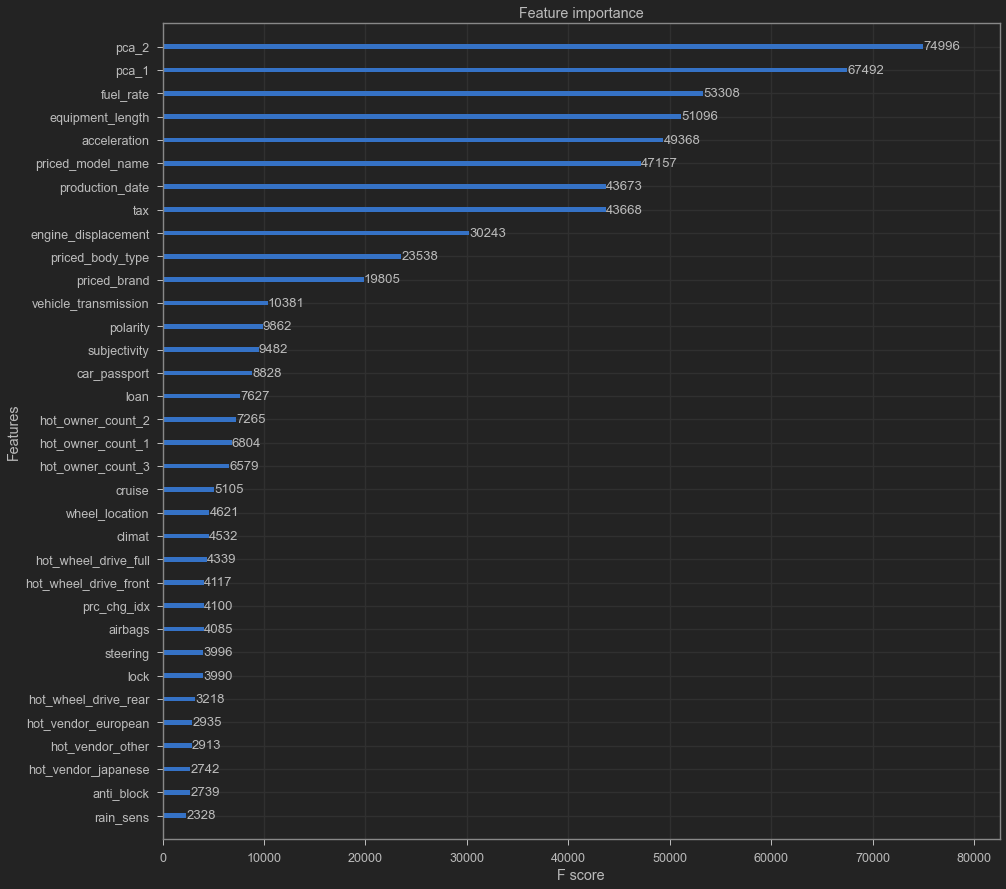

In [128]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(xg_reg,ax=ax);

Weel, pca_1 and pca_2 is a combination of 'mileage', 'model_date', 'production_date' columns. And it has stronger importance than other columsn.

We also can confirm our hypothesis that equipment lenght (i.e how many different equipment each car has) is impact on the price.

Tax also has significant impact on the final price. 


<a id="sec7.5"></a>
## [7.5 LightGBM](#sec7.5)
[(INDEX)](#sec1)

Personally I like the Light GBM class because it gives us always predicteble good results with low time consumption. Let's try it.

First, define params by our selves (underhood made lot's of attempts to find the best)

In [130]:
# Defining lightgbm hyper-parameters
hyper_params = {
                'task': 'train',
                'boosting_type': 'gbdt',
                'objective': 'regression',
                'metric': ['mape'],
                'learning_rate': 0.05,
                'feature_fraction': 0.9,
                'bagging_fraction': 0.7,
                'bagging_freq': 10,
                'verbose': 0,
                "max_depth": 12,
                "num_leaves": 128,  
                "max_bin": 512,
                "num_iterations": 1000,
                "n_estimators": 1000
            }

# Training lightgbm model
lgbm = lgb.LGBMRegressor(**hyper_params)
lgbm.fit(X_train, y_train,
         eval_set=[(X_val, y_val)],
         eval_metric='l1',
         early_stopping_rounds=100)

[1]	valid_0's l1: 0.906766	valid_0's mape: 0.0679415
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 0.863762	valid_0's mape: 0.064732
[3]	valid_0's l1: 0.823189	valid_0's mape: 0.0617044
[4]	valid_0's l1: 0.784542	valid_0's mape: 0.0588197
[5]	valid_0's l1: 0.7478	valid_0's mape: 0.0560771
[6]	valid_0's l1: 0.713089	valid_0's mape: 0.0534864
[7]	valid_0's l1: 0.680183	valid_0's mape: 0.0510302
[8]	valid_0's l1: 0.649084	valid_0's mape: 0.0487093
[9]	valid_0's l1: 0.619594	valid_0's mape: 0.0465081
[10]	valid_0's l1: 0.59175	valid_0's mape: 0.0444297
[11]	valid_0's l1: 0.565254	valid_0's mape: 0.0424524
[12]	valid_0's l1: 0.540291	valid_0's mape: 0.04059
[13]	valid_0's l1: 0.516792	valid_0's mape: 0.0388365
[14]	valid_0's l1: 0.494538	valid_0's mape: 0.0371761
[15]	valid_0's l1: 0.473374	valid_0's mape: 0.0355969
[16]	valid_0's l1: 0.453407	valid_0's mape: 0.0341072
[17]	valid_0's l1: 0.434522	valid_0's mape: 0.0326986
[18]	valid_0's l1: 0.416782	valid_0

[178]	valid_0's l1: 0.150189	valid_0's mape: 0.0116896
[179]	valid_0's l1: 0.150175	valid_0's mape: 0.0116886
[180]	valid_0's l1: 0.150186	valid_0's mape: 0.0116896
[181]	valid_0's l1: 0.150163	valid_0's mape: 0.011688
[182]	valid_0's l1: 0.150136	valid_0's mape: 0.0116863
[183]	valid_0's l1: 0.150061	valid_0's mape: 0.0116812
[184]	valid_0's l1: 0.150024	valid_0's mape: 0.0116787
[185]	valid_0's l1: 0.149977	valid_0's mape: 0.0116756
[186]	valid_0's l1: 0.149957	valid_0's mape: 0.0116744
[187]	valid_0's l1: 0.149853	valid_0's mape: 0.0116672
[188]	valid_0's l1: 0.149824	valid_0's mape: 0.0116651
[189]	valid_0's l1: 0.149807	valid_0's mape: 0.0116639
[190]	valid_0's l1: 0.149781	valid_0's mape: 0.0116621
[191]	valid_0's l1: 0.14978	valid_0's mape: 0.011662
[192]	valid_0's l1: 0.149787	valid_0's mape: 0.0116627
[193]	valid_0's l1: 0.149776	valid_0's mape: 0.0116619
[194]	valid_0's l1: 0.149779	valid_0's mape: 0.0116621
[195]	valid_0's l1: 0.149752	valid_0's mape: 0.0116601
[196]	valid_0

[328]	valid_0's l1: 0.148044	valid_0's mape: 0.0115433
[329]	valid_0's l1: 0.148068	valid_0's mape: 0.0115452
[330]	valid_0's l1: 0.148042	valid_0's mape: 0.0115434
[331]	valid_0's l1: 0.148012	valid_0's mape: 0.0115415
[332]	valid_0's l1: 0.147947	valid_0's mape: 0.011537
[333]	valid_0's l1: 0.147933	valid_0's mape: 0.0115359
[334]	valid_0's l1: 0.147918	valid_0's mape: 0.0115349
[335]	valid_0's l1: 0.147908	valid_0's mape: 0.0115343
[336]	valid_0's l1: 0.14786	valid_0's mape: 0.0115312
[337]	valid_0's l1: 0.147856	valid_0's mape: 0.011531
[338]	valid_0's l1: 0.14786	valid_0's mape: 0.0115314
[339]	valid_0's l1: 0.147819	valid_0's mape: 0.0115286
[340]	valid_0's l1: 0.147821	valid_0's mape: 0.0115288
[341]	valid_0's l1: 0.147834	valid_0's mape: 0.0115299
[342]	valid_0's l1: 0.147828	valid_0's mape: 0.0115295
[343]	valid_0's l1: 0.147817	valid_0's mape: 0.0115287
[344]	valid_0's l1: 0.147811	valid_0's mape: 0.0115281
[345]	valid_0's l1: 0.147809	valid_0's mape: 0.011528
[346]	valid_0's

[506]	valid_0's l1: 0.146446	valid_0's mape: 0.0114372
[507]	valid_0's l1: 0.146423	valid_0's mape: 0.0114355
[508]	valid_0's l1: 0.146422	valid_0's mape: 0.0114354
[509]	valid_0's l1: 0.146426	valid_0's mape: 0.0114357
[510]	valid_0's l1: 0.14642	valid_0's mape: 0.0114352
[511]	valid_0's l1: 0.146443	valid_0's mape: 0.0114371
[512]	valid_0's l1: 0.146457	valid_0's mape: 0.0114384
[513]	valid_0's l1: 0.146464	valid_0's mape: 0.011439
[514]	valid_0's l1: 0.146468	valid_0's mape: 0.0114394
[515]	valid_0's l1: 0.146473	valid_0's mape: 0.0114397
[516]	valid_0's l1: 0.146473	valid_0's mape: 0.0114398
[517]	valid_0's l1: 0.14648	valid_0's mape: 0.0114404
[518]	valid_0's l1: 0.146493	valid_0's mape: 0.0114415
[519]	valid_0's l1: 0.146496	valid_0's mape: 0.0114418
[520]	valid_0's l1: 0.146493	valid_0's mape: 0.0114416
[521]	valid_0's l1: 0.146476	valid_0's mape: 0.0114404
[522]	valid_0's l1: 0.146473	valid_0's mape: 0.0114402
[523]	valid_0's l1: 0.14646	valid_0's mape: 0.0114394
[524]	valid_0'

[671]	valid_0's l1: 0.146114	valid_0's mape: 0.0114214
[672]	valid_0's l1: 0.146122	valid_0's mape: 0.011422
[673]	valid_0's l1: 0.146125	valid_0's mape: 0.0114223
[674]	valid_0's l1: 0.146125	valid_0's mape: 0.0114223
[675]	valid_0's l1: 0.146141	valid_0's mape: 0.0114236
[676]	valid_0's l1: 0.146121	valid_0's mape: 0.0114223
[677]	valid_0's l1: 0.146113	valid_0's mape: 0.0114217
[678]	valid_0's l1: 0.146118	valid_0's mape: 0.0114221
[679]	valid_0's l1: 0.146124	valid_0's mape: 0.0114226
[680]	valid_0's l1: 0.146099	valid_0's mape: 0.0114209
[681]	valid_0's l1: 0.146093	valid_0's mape: 0.0114203
[682]	valid_0's l1: 0.146094	valid_0's mape: 0.0114204
[683]	valid_0's l1: 0.146096	valid_0's mape: 0.0114205
[684]	valid_0's l1: 0.146109	valid_0's mape: 0.0114216
[685]	valid_0's l1: 0.146102	valid_0's mape: 0.0114209
[686]	valid_0's l1: 0.146105	valid_0's mape: 0.0114211
[687]	valid_0's l1: 0.146103	valid_0's mape: 0.011421
[688]	valid_0's l1: 0.146112	valid_0's mape: 0.0114218
[689]	valid_

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.05, max_bin=512, max_depth=12, metric=['mape'],
              n_estimators=1000, num_iterations=1000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [131]:
lgb_pred = lgbm.predict(X_val)

In [132]:
df_report = get_regression_metrics(df_report,y_val,lgb_pred, 'LGB_manual')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.55 119093.37  93611997994.11 305960.78
ExtraTree_GS    15.24 117090.84  93107715302.92 305135.57
ExtraTree_WO_GS 15.29 117273.33  93615412908.43 305966.36
CatBoost        15.62 134399.82 112767862071.98 335809.26
XGBoost_1       15.19 118230.77  87105200107.92 295135.90
LGB_manual      15.75 132589.20 104822658970.18 323763.28

Oi....

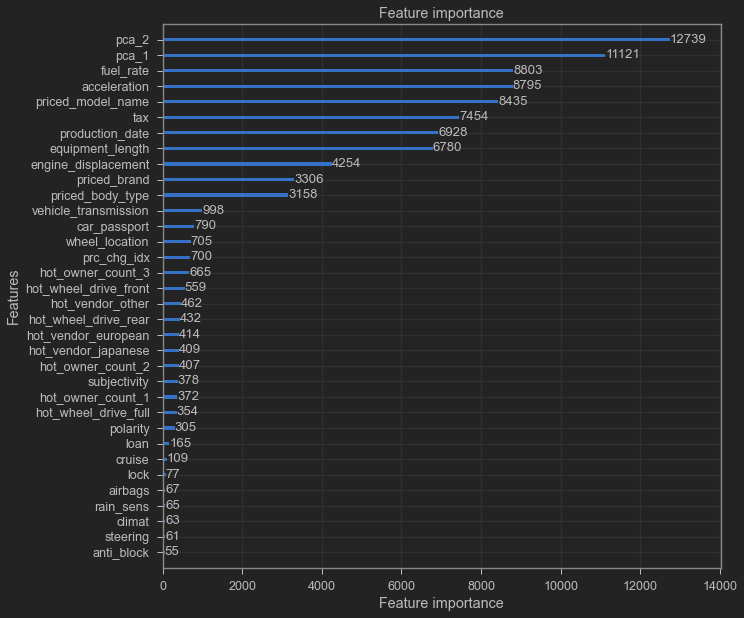

In [133]:
# Check permutation
lightgbm.plot_importance(lgbm, ax=None, height=0.2, xlim=None, ylim=None,
                         title='Feature importance', xlabel='Feature importance', 
                         ylabel='Features', importance_type='split', max_num_features=None,
                         ignore_zero=True, figsize=(10,10), dpi=None, grid=True, precision=3);

Feature importance is more or less similar with importance to XGboost

<a id="sec7.6"></a>
## [7.6 LightGBM+OPTUNA](#sec7.6)
[(INDEX)](#sec1)

But it was manual insertion of parameters. Let's try something more advanced. OPTUNA.

In [134]:
# Defining MAPE function since it was removed from sklearn
def mape_11(y_pred,y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)

In [135]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
        'metric': 'mape', 
        'random_state': 42,
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100,500,700]),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model = lgb.LGBMRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    mape = mape_11(np.expm1(test_y), np.expm1(preds))
    
    return mape

In [136]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2021-06-02 19:41:21,197] A new study created in memory with name: no-name-53f86e99-74f5-4234-aec5-6945a2c3cc5d
[I 2021-06-02 19:41:21,715] Trial 0 finished with value: 58.00784408688245 and parameters: {'n_estimators': 50, 'reg_alpha': 0.0893731978489485, 'reg_lambda': 6.8809603984475345, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 102, 'min_child_samples': 179, 'min_data_per_groups': 15}. Best is trial 0 with value: 58.00784408688245.
[I 2021-06-02 19:41:25,381] Trial 1 finished with value: 16.115142673671542 and parameters: {'n_estimators': 700, 'reg_alpha': 0.13076741898490682, 'reg_lambda': 9.637443287906166, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 73, 'min_child_samples': 297, 'min_data_per_groups': 90}. Best is trial 1 with value: 16.115142673671542.
[I 2021-06-02 19:41:33,562] Trial 2 finished with value: 15.600270959571535 and parameters: {'n_estimators': 700, 're

[I 2021-06-02 19:43:23,427] Trial 21 finished with value: 14.864791303112522 and parameters: {'n_estimators': 500, 'reg_alpha': 0.0026227597415589303, 'reg_lambda': 0.004598678055212999, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 542, 'min_child_samples': 25, 'min_data_per_groups': 28}. Best is trial 21 with value: 14.864791303112522.
[I 2021-06-02 19:43:31,423] Trial 22 finished with value: 14.839038607967312 and parameters: {'n_estimators': 500, 'reg_alpha': 0.004941353623692821, 'reg_lambda': 0.0104289689734544, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 610, 'min_child_samples': 27, 'min_data_per_groups': 20}. Best is trial 22 with value: 14.839038607967312.
[I 2021-06-02 19:43:40,454] Trial 23 finished with value: 14.7968086441771 and parameters: {'n_estimators': 500, 'reg_alpha': 0.001542824212816057, 'reg_lambda': 0.15384920827957496, 'colsample_bytree': 0.6, 'subsample': 

[I 2021-06-02 19:46:07,413] Trial 42 finished with value: 14.818208608154352 and parameters: {'n_estimators': 500, 'reg_alpha': 0.10151372635459836, 'reg_lambda': 0.13843554267172153, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 782, 'min_child_samples': 20, 'min_data_per_groups': 58}. Best is trial 23 with value: 14.7968086441771.
[I 2021-06-02 19:46:17,954] Trial 43 finished with value: 14.925350988716264 and parameters: {'n_estimators': 500, 'reg_alpha': 0.1086567004157818, 'reg_lambda': 0.8230951086843461, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 685, 'min_child_samples': 1, 'min_data_per_groups': 59}. Best is trial 23 with value: 14.7968086441771.
[I 2021-06-02 19:46:30,025] Trial 44 finished with value: 15.17626672487908 and parameters: {'n_estimators': 500, 'reg_alpha': 0.061743661332996164, 'reg_lambda': 0.37200826311097124, 'colsample_bytree': 0.5, 'subsample': 0.6, 'lea

In [137]:
# plot_optimization_histor: shows the scores from all trials as 
# well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

Most of trials were found minimum of error func

In [138]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

For this dataset the most important parameter is n_estimators.

In [139]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study)

Let's feed all of this to the model and check metrics

In [140]:
param_lgb = study.best_params

In [141]:
lgb_opt = lgb.LGBMRegressor(**param_lgb)
lgb_opt.fit(X_train, y_train,)

LGBMRegressor(colsample_bytree=0.6, learning_rate=0.02, max_depth=20,
              min_child_samples=36, min_data_per_groups=37, n_estimators=500,
              num_leaves=810, reg_alpha=0.001542824212816057,
              reg_lambda=0.15384920827957496, subsample=0.8)

In [142]:
lgb_opt_pred = lgb_opt.predict(X_val)

In [143]:
df_report = get_regression_metrics(df_report,y_val,lgb_opt_pred, 'LGB+optuna')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.55 119093.37  93611997994.11 305960.78
ExtraTree_GS    15.24 117090.84  93107715302.92 305135.57
ExtraTree_WO_GS 15.29 117273.33  93615412908.43 305966.36
CatBoost        15.62 134399.82 112767862071.98 335809.26
XGBoost_1       15.19 118230.77  87105200107.92 295135.90
LGB_manual      15.75 132589.20 104822658970.18 323763.28
LGB+optuna      15.14 122344.44 102608582495.32 320325.74

Aha, I told you. LGB is the best one. But RMSE not so good as in XGboost. But we need MAPE for this competition... Our model make an error about 300K RUB in average.

<a id="sec7.7"></a>
## [7.7 SKLEARN BOOSTER](#sec7.7)
[(INDEX)](#sec1)

Try some booster from sklearn

In [144]:
params = {'n_estimators': 800,
          'max_depth': 8,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [145]:
gboost = GradientBoostingRegressor(**params)
gboost.fit(X_train, y_train)
gboost_pred = gboost.predict(X_val)

In [146]:
df_report = get_regression_metrics(df_report,y_val,gboost_pred, 'GBOOST')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.55 119093.37  93611997994.11 305960.78
ExtraTree_GS    15.24 117090.84  93107715302.92 305135.57
ExtraTree_WO_GS 15.29 117273.33  93615412908.43 305966.36
CatBoost        15.62 134399.82 112767862071.98 335809.26
XGBoost_1       15.19 118230.77  87105200107.92 295135.90
LGB_manual      15.75 132589.20 104822658970.18 323763.28
LGB+optuna      15.14 122344.44 102608582495.32 320325.74
GBOOST          15.89 137309.41 112526394970.71 335449.54

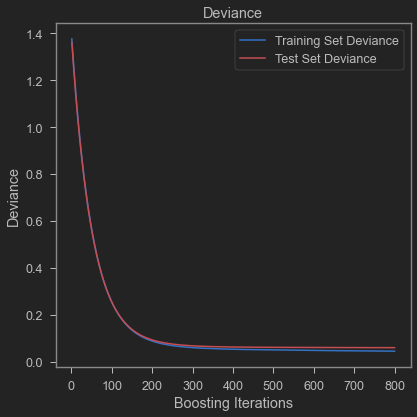

In [147]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, gboost_pred in enumerate(gboost.staged_predict(X_val)):
    test_score[i] = gboost.loss_(y_val, gboost_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gboost.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Here in a plot we can see, that the deviance between train and test sets is not significant. Means, our model is not overfitted.

GBOOST gave not good results. Ignore it

<a id="sec7.8"></a>
## [7.8 STACKING](#sec7.8)
[(INDEX)](#sec1)

In [161]:
ENet = ElasticNet()

In [152]:

lr = LinearRegression()

Let's try stacking. Take 3 best models and simple linear regression

In [153]:
stck_regrs = StackingRegressor(regressors=[etr_reg_gs,xg_reg,lgb_opt],
                               meta_regressor=lr)

In [154]:
stck_regrs.fit(X_train,y_train)

[20:11:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




StackingRegressor(meta_regressor=LinearRegression(),
                  regressors=[GridSearchCV(cv=5,
                                           estimator=ExtraTreesRegressor(random_state=42),
                                           n_jobs=-1,
                                           param_grid={'bootstrap': [True],
                                                       'max_depth': [10, 30],
                                                       'n_estimators': [100,
                                                                        200,
                                                                        300,
                                                                        400]},
                                           scoring='neg_mean_absolute_error'),
                              XGBRegressor(alpha=1, base_score=0.5,
                                           booster='gbtree',
                                           colsample_bylevel=1,
                 

In [155]:
y_pred_stck_regrs = stck_regrs.predict(X_val)

In [156]:
df_report = get_regression_metrics(df_report,y_val,y_pred_stck_regrs, 'Stack')
df_report

MAPE       MAE             MSE      RMSE
RandomForest    15.55 119093.37  93611997994.11 305960.78
ExtraTree_GS    15.24 117090.84  93107715302.92 305135.57
ExtraTree_WO_GS 15.29 117273.33  93615412908.43 305966.36
CatBoost        15.62 134399.82 112767862071.98 335809.26
XGBoost_1       15.19 118230.77  87105200107.92 295135.90
LGB_manual      15.75 132589.20 104822658970.18 323763.28
LGB+optuna      15.14 122344.44 102608582495.32 320325.74
GBOOST          15.89 137309.41 112526394970.71 335449.54
Stack           15.88 124341.97  96061737263.02 309938.28

That's I don't understand why? Why we gathered best models together, but in the out we have a shit...

<a id="sec8"></a>
# [8 SUBMISSION](#sec8)
[(INDEX)](#sec1)

Re-fit our models with full set of data

In [166]:
etr_reg_gs.fit(X,y)
xg_reg.fit(X,y)
lgb_opt.fit(X,y)
reg_rf_gs.fit(X,y)

[21:06:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [167]:
extra_pred = etr_reg_gs.predict(X_test)
#cbr_pred = cbr.predict(X_test)
xgboost_pred = xg_reg.predict(X_test)
lgb_opt_pred = lgb_opt.predict(X_test)
rand_for_pred = reg_rf_gs.predict(X_test)

Make an ensemble of models. Weights selected by following logic:

    If model obtained high score then its weigh will be higher as well

In [168]:
ensemble = (xgboost_pred*.1 + extra_pred*.1 + rand_for_pred*.1 + lgb_opt_pred* .7)

In [170]:
sell_id = pd.read_csv('test.csv')['sell_id']

In [169]:
submission_stack = pd.DataFrame({'sell_id': sell_id,
                           'price': np.exp(ensemble)*.92})

submission_stack.to_csv('submission_test.csv', index=False)

Coofficient 0.92 is taking by consideration of currency change. Test data has been scraped in 2020 year. Train data scraped in 2021. There is some currency change (RUB to USD). Also this coefficient considers an inflation.

<a id="sec10"></a>
# [9 CONCLUSION](#sec9)
[(INDEX)](#sec1)

During the scraping of the dataset there were no critical issues. All was fine (almost)

Scraped dataset has a shitload of missing values. It was a headache to clear them.
In addition, columns like ‘SuperGen’, ‘equipment dict’ had implicit data gaps. There was a single symbol, as a result pandas’ instruments were not allowed to detect them.

It was decided to use Robust Scaler as it is more resistant to outliers.

Target has outliers, however, during experiments, if we drop those outliers then our main Metric MAPE also drops. It is decided to keep outliers.

***CONCLUSION ABOUT MODELS:***

Extra Tree Regressors showed best results among trees. But the time of computing and resourses consumption....takes a lot.

GradientBoost(Sklearn) regressor showed worst results among boosters. Best one is LightGBM. Moreover it is fast as a light.

With some reason, stacking of the best models did not give good results. The situation: candy-input -> garbage out. Srtrange(

Neural networks have not given significant improvment. Vice verca, they given terrible result. They were excluded from this notebook.

Best results in the competition was obtained by using the manual ensembling of the models (13% errors)

***What has been done but not reflected in the notebook.***

Tried to apply deep learning models. Failed. The MAPE was about 300%. Due to the lack of knowledge of how to tune the neural networks, it was decided to not include it in the report.
Tried to break the dataset into clusters, teach models in the different clusters. During the EDA it was observed that BMW, MERCEDES has old cars with extremely high prices. So it was decided to put these cars into a different group and feed to the model. The results were good but not significant. It was decided to keep this idea and improve this way in future. 
From EDA we know that the price for some cars (in years X axis) dropping not linearly. We tried to make polynomial features, but without significant improvement of the MAPE. Due to the lack of time it was not observed carefully. Also, keep it for the future.

***What to do or how to improve:***

Try to use advanced methods for detecting outliers in the next projects.( foe ex. DB scan)

Try to use picewise linear regression. I think this only one way to improve the score, because our price changing not linearly. For some period of time it is dropping (from 2021 to 1970) and then start to grow again.

